### 1.Data Precessing

In [41]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import datetime
from datetime import timedelta
import time
import os

matplotlib.rcParams['font.sans-serif'] = ['SimSun']
matplotlib.rcParams['axes.unicode_minus']= False
%matplotlib inline

In [42]:
root_dir =r'D:/BaiduSyncdisk/gis-sus/recover'
os.chdir(root_dir)
os.getcwd()

'D:\\BaiduSyncdisk\\gis-sus\\recover'

In [43]:
lockdown = pd.read_excel('lockdown0.xlsx')
mobi = pd.read_excel('urbanmobility.xlsx')

In [44]:
lockdown['last'] = lockdown['end']-lockdown['start']
lockdown['day'] = lockdown['last'].apply(lambda x:x.days)

In [45]:
lockdown

cityname      start        end    last  day
0      防城港市 2020-02-02 2020-02-08  6 days    6
1       温州市 2020-02-02 2020-02-08  6 days    6
2       玉林市 2020-02-02 2020-02-09  7 days    7
3       滨州市 2020-02-03 2020-02-09  6 days    6
4      景德镇市 2020-02-04 2020-02-06  2 days    2
..      ...        ...        ...     ...  ...
64      东莞市 2022-03-14 2022-03-20  6 days    6
65      深圳市 2022-03-14 2022-03-20  6 days    6
66      吉林市 2022-03-21 2022-04-28 38 days   38
67      上海市 2022-03-28 2022-06-01 65 days   65
68      白城市 2022-04-03 2022-05-13 40 days   40

[69 rows x 5 columns]

In [46]:
mobi.head()

城市代码    城市   20190112  20190113  20190114  20190115  20190116  20190117  \
0  110000   北京市  11.216815  7.707733  7.903915  7.789057  8.292100  8.493012   
1  120000   天津市   3.524990  3.100939  3.676720  3.268577  3.376177  3.530531   
2  130100  石家庄市   2.422742  1.986476  2.494314  2.491106  2.541586  2.471310   
3  130200   唐山市   1.381342  1.284530  1.590516  1.341587  1.348682  1.381536   
4  130300  秦皇岛市   0.673175  0.611647  0.673175  0.583200  0.598072  0.578340   

   20190118   20190119  ...  20230124  20230125  20230126  20230127  20230128  \
0  9.471816  12.126834  ...  8.184564  7.242307  6.761491  7.289125  6.464059   
1  3.712684   4.099864  ...  4.577278  4.364118  4.027871  4.436532  3.739997   
2  2.471731   2.591222  ...  3.507559  3.744986  3.321421  4.183261  3.573688   
3  1.436130   1.423429  ...  2.325478  2.595856  2.664414  3.190946  2.318900   
4  0.588611   0.624607  ...  1.034370  1.113782  1.263406  1.535436  1.202170   

   20230129  20230130  20230131  20230201  20230202  
0  6.235153  6.429359  6.676052  7.364747  7.488904  
1  3.378445  3.364513  3.402194  3.413437  3.340861  
2  3.195839  3.086521  3.006558  2.966771  2.786011  
3  2.027236  1.891966  1.862676  1.717621  1.658459  
4  1.013828  0.950357  0.942775  0.819752  0.765320  

[5 rows x 875 columns]

In [47]:
mobi.columns

Index([  '城市代码',     '城市', 20190112, 20190113, 20190114, 20190115, 20190116,
       20190117, 20190118, 20190119,
       ...
       20230124, 20230125, 20230126, 20230127, 20230128, 20230129, 20230130,
       20230131, 20230201, 20230202],
      dtype='object', length=875)

In [48]:
dic={}
dic[city] = {}

In [49]:
dic={}
for i in range(len(lockdown)):
    city = lockdown['cityname'][i]
    x= mobi[mobi['城市']==city]
    t0 = lockdown['start'][i]-timedelta(days = 1) 
    t0 = int(t0.strftime('%Y%m%d'))
    t1 = lockdown['end'][i]
    t1 = int(t1.strftime('%Y%m%d'))
    t2 = lockdown['end'][i] +timedelta(days =6)
    t2 = int(t2.strftime('%Y%m%d'))
    dic[city] = {} 
    if t0 in mobi.columns:
        if t1 in mobi.columns:
            if t2 in mobi.columns:
                dic[city][t0] = pd.DataFrame(x[t0]).iloc[0,0]
                dic[city][t1] = pd.DataFrame(x[t1]).iloc[0,0]
                dic[city][t2] = pd.DataFrame(x[t2]).iloc[0,0]

In [50]:
dic

{'防城港市': {20200201: 0.1364364, 20200208: 0.062856, 20200214: 0.065448},
 '温州市': {20200201: 0.5505084, 20200208: 0.0528768, 20200214: 0.0861516},
 '玉林市': {20200201: 0.7415712, 20200209: 0.8235756, 20200215: 0.44469},
 '滨州市': {20200202: 0.2928636, 20200209: 0.3614868, 20200215: 0.185166},
 '景德镇市': {20200203: 0.1126224, 20200206: 0.0520992, 20200212: 0.0541728},
 '徐州市': {20200203: 0.7018812, 20200208: 0.6103512, 20200214: 0.4444632},
 '阜阳市': {20200204: 0.6466068, 20200208: 0.5798304, 20200214: 0.4684716},
 '保定市': {20210126: 0.4982796, 20210209: 0.7202844, 20210215: 1.0711116},
 '合肥市': {20210513: 2.3293332, 20210528: 2.0916792, 20210603: 2.3293008},
 '六安市': {20210513: 0.7062876, 20210606: 0.6773544, 20210612: 0.973458},
 '营口市': {20210513: 0.5079672, 20210531: 0.2942892, 20210606: 0.4280688},
 '沈阳市': {20210514: 2.4479172, 20210531: 1.9483416, 20210606: 2.232522},
 '广州市': {20210521: 8.0700624, 20210626: 5.471388, 20210702: 6.6051288},
 '佛山市': {20210528: 4.0646124, 20210702: 3.9394836, 202107

## 2.RI Calculation


---

## Intercity Travel Resilience Evaluation Indicators

The evaluation indicators for intercity travel resilience primarily encompass fluctuation ratio, recovery ratio, recovery elasticity, and recovery index. These concepts and their corresponding formulas are standardized and organized below.

### 1. Fluctuation Ratio (FR) and Recovery Ratio (RR)

#### **Fluctuation Ratio (FR)**
The Fluctuation Ratio (FR) is defined as the proportion of the difference between the baseline value of the population migration index before the pandemic outbreak and its minimum value during the pandemic (i.e., fluctuation amount) to the baseline value. This ratio reflects the city's level of impact due to the pandemic.

#### **Recovery Ratio (RR)**
The Recovery Ratio (RR) refers to the proportion of the difference between the migration index from its minimum value during the pandemic to its value at a specific post-pandemic time (i.e., recovery amount) to the baseline value. This ratio measures the extent of the city's post-pandemic recovery.

**Formulas:**

$$FR_i = \frac{Trav_{i,t_1} - Trav_{i,t_m}}{Trav_{i,t_1}} \times 100\%$$

$$RR_i = \frac{Trav_{i,t_2} - Trav_{i,t_m}}{Trav_{i,t_1}} \times 100\%$$

Where:
- \(FR_i\) represents the fluctuation ratio of the ith city.
- \(RR_i\) represents the recovery ratio of the ith city.
- \(Trav_{i,t}\) denotes the population migration index of the ith city at time \(t\).
- \(t_1\), \(t_2\), and \(t_m\) respectively signify the times corresponding to seven days before high-risk area designation, seven days after the lifting of high-risk areas, and the lowest point of the migration index during the pandemic.

### 2. City Recovery Elasticity (CRE)

#### **City Recovery Elasticity (CRE)**
CRE is used to describe the ratio of the city's recovery amount relative to the fluctuation amount, equivalent to the ratio of the recovery ratio to the fluctuation ratio. A higher CRE indicates that the city can recover more quickly and to a greater extent under the same fluctuation ratio, demonstrating stronger resilience.

**Formula:**

$$CRE_{i,t} = \frac{Trav_{i,t_2} - Trav_{i,t_m}}{Trav_{i,t_1} - Trav_{i,t_m}} \times 100\% = \frac{RR_i}{FR_i} \times 100\%$$

### 3. City Recovery Index (CRI)

#### **City Recovery Index (CRI)**
The CRI reflects the recovery level of the city at a specific post-pandemic time relative to the baseline value, characterized by the change in the population migration index. Values closer to 100% indicate a better recovery effect of the city.

**Formula:**

$$CRI_{i,t} = \frac{Trav_{i,t_2}}{Trav_{i,t_1}} \times 100\%$$

Here, \(CRI_{i,t}\) represents the recovery index of the ith city at time \(t\). Other variables are defined as before.

---


In [51]:
def get_time(x, time):
    # Start time shifted back by 7 days
    t0 = lockdown['start'][i] - timedelta(days=7)
    t0 = int(t0.strftime('%Y%m%d'))
    
    # End time extended by 6 days
    te = lockdown['end'][i] + timedelta(days=6)
    
    # Variable t used to obtain data over the entire period
    t = lockdown['start'][i] + timedelta(days=time)
    
    # Condition to ensure t is before te
    if t <= te:
        t = int(t.strftime('%Y%m%d'))
        te = int(te.strftime('%Y%m%d'))
        
        # Check if the dates are in the mobi columns
        if t0 in mobi.columns:
            if t in mobi.columns:
                if te in mobi.columns:
                    dic[city][t] = pd.DataFrame(x[t]).iloc[0,0]
                else:
                    pass
    else:
        info = 'error'


In [52]:
dic = {}
for i in range(len(lockdown)):
    city = lockdown['cityname'][i]
    x = mobi[mobi['城市'] == city]
    dic[city] = {}
    info = 'correct'
    for time in range(-7, 100):  # Start point is -7, end point is found within the function
        if info == 'correct':  # Loop stops when the get_time function reaches its termination condition
            get_time(x, time)
            time += 1

In [53]:
lockdown.head()

cityname      start        end   last  day
0     防城港市 2020-02-02 2020-02-08 6 days    6
1      温州市 2020-02-02 2020-02-08 6 days    6
2      玉林市 2020-02-02 2020-02-09 7 days    7
3      滨州市 2020-02-03 2020-02-09 6 days    6
4     景德镇市 2020-02-04 2020-02-06 2 days    2

In [54]:
mean_lst = []  # Average value of the seven days before the start
start_lst = []  # Value at the start of the lockdown
end_lst = []  # Value at the end of the lockdown
end_7_lst = []  # Value 7 days after the end of the lockdown
o_lst = []  # Value at the beginning of the seven days before the start
min_lst = []  # Minimum value during the lockdown period
for item in list(dic.values()):
    if item != {}:  # Condition to prevent the case of empty values
        lst = list(item.values())
        mean = np.mean(lst[0:7])
        mean_lst.append(mean)
        start = lst[7]
        start_lst.append(start)
        end = lst[-7]
        end_lst.append(end)
        end_7 = lst[-1]
        end_7_lst.append(end_7)
        o = lst[1]
        o_lst.append(lst)
        min_ = min(lst[7:-7])  # Note the spelling
        min_lst.append(min_)
    else:  # To ensure every city has a value, use NAN as a placeholder
        mean_lst.append(np.nan)
        start_lst.append(np.nan)
        end_lst.append(np.nan)
        end_7_lst.append(np.nan)
        o_lst.append(np.nan)
        min_lst.append(np.nan)

In [55]:
df = pd.concat([pd.DataFrame(list(dic.keys())),pd.DataFrame(mean_lst),pd.DataFrame(start_lst),pd.DataFrame(end_lst),pd.DataFrame(end_7_lst),pd.DataFrame(min_lst)],axis = 1)
df = pd.concat([pd.DataFrame(list(dic.keys())),pd.DataFrame(mean_lst),pd.DataFrame(start_lst),pd.DataFrame(end_lst),pd.DataFrame(end_7_lst),pd.DataFrame(min_lst)],axis = 1)
df.columns = ['city','mean','start','end','end_7','min']
df.head()

city      mean     start       end     end_7       min
0  防城港市  0.230114  0.138510  0.062856  0.065448  0.060880
1   温州市  0.659733  0.555336  0.052877  0.086152  0.067748
2   玉林市  0.958244  0.792698  0.823576  0.444690  0.353160
3   滨州市  0.401205  0.230429  0.361487  0.185166  0.173858
4  景德镇市  0.166254  0.070600  0.052099  0.054173  0.057866

In [56]:
df['CRI'] = df['end']/df['mean']  # Recovery Index
df['FR'] = (df['start']-df['min'])/df['start']  # Fluctuation Ratio
df['RR'] = (df['end']-df['min'])/df['end']  # Recovery Ratio
df['CRE'] = df['RR']/df['FR']  # Recovery Elasticity

In [57]:
df.to_excel('index.xlsx')
df.head()

city      mean     start       end     end_7       min       CRI        FR  \
0  防城港市  0.230114  0.138510  0.062856  0.065448  0.060880  0.273152  0.560468   
1   温州市  0.659733  0.555336  0.052877  0.086152  0.067748  0.080149  0.878005   
2   玉林市  0.958244  0.792698  0.823576  0.444690  0.353160  0.859463  0.554484   
3   滨州市  0.401205  0.230429  0.361487  0.185166  0.173858  0.901004  0.245501   
4  景德镇市  0.166254  0.070600  0.052099  0.054173  0.057866  0.313372  0.180358   

         RR       CRE  
0  0.031443  0.056102  
1 -0.281250 -0.320329  
2  0.571187  1.030124  
3  0.519046  2.114237  
4 -0.110697 -0.613760

## 3. shanghai visualiztion

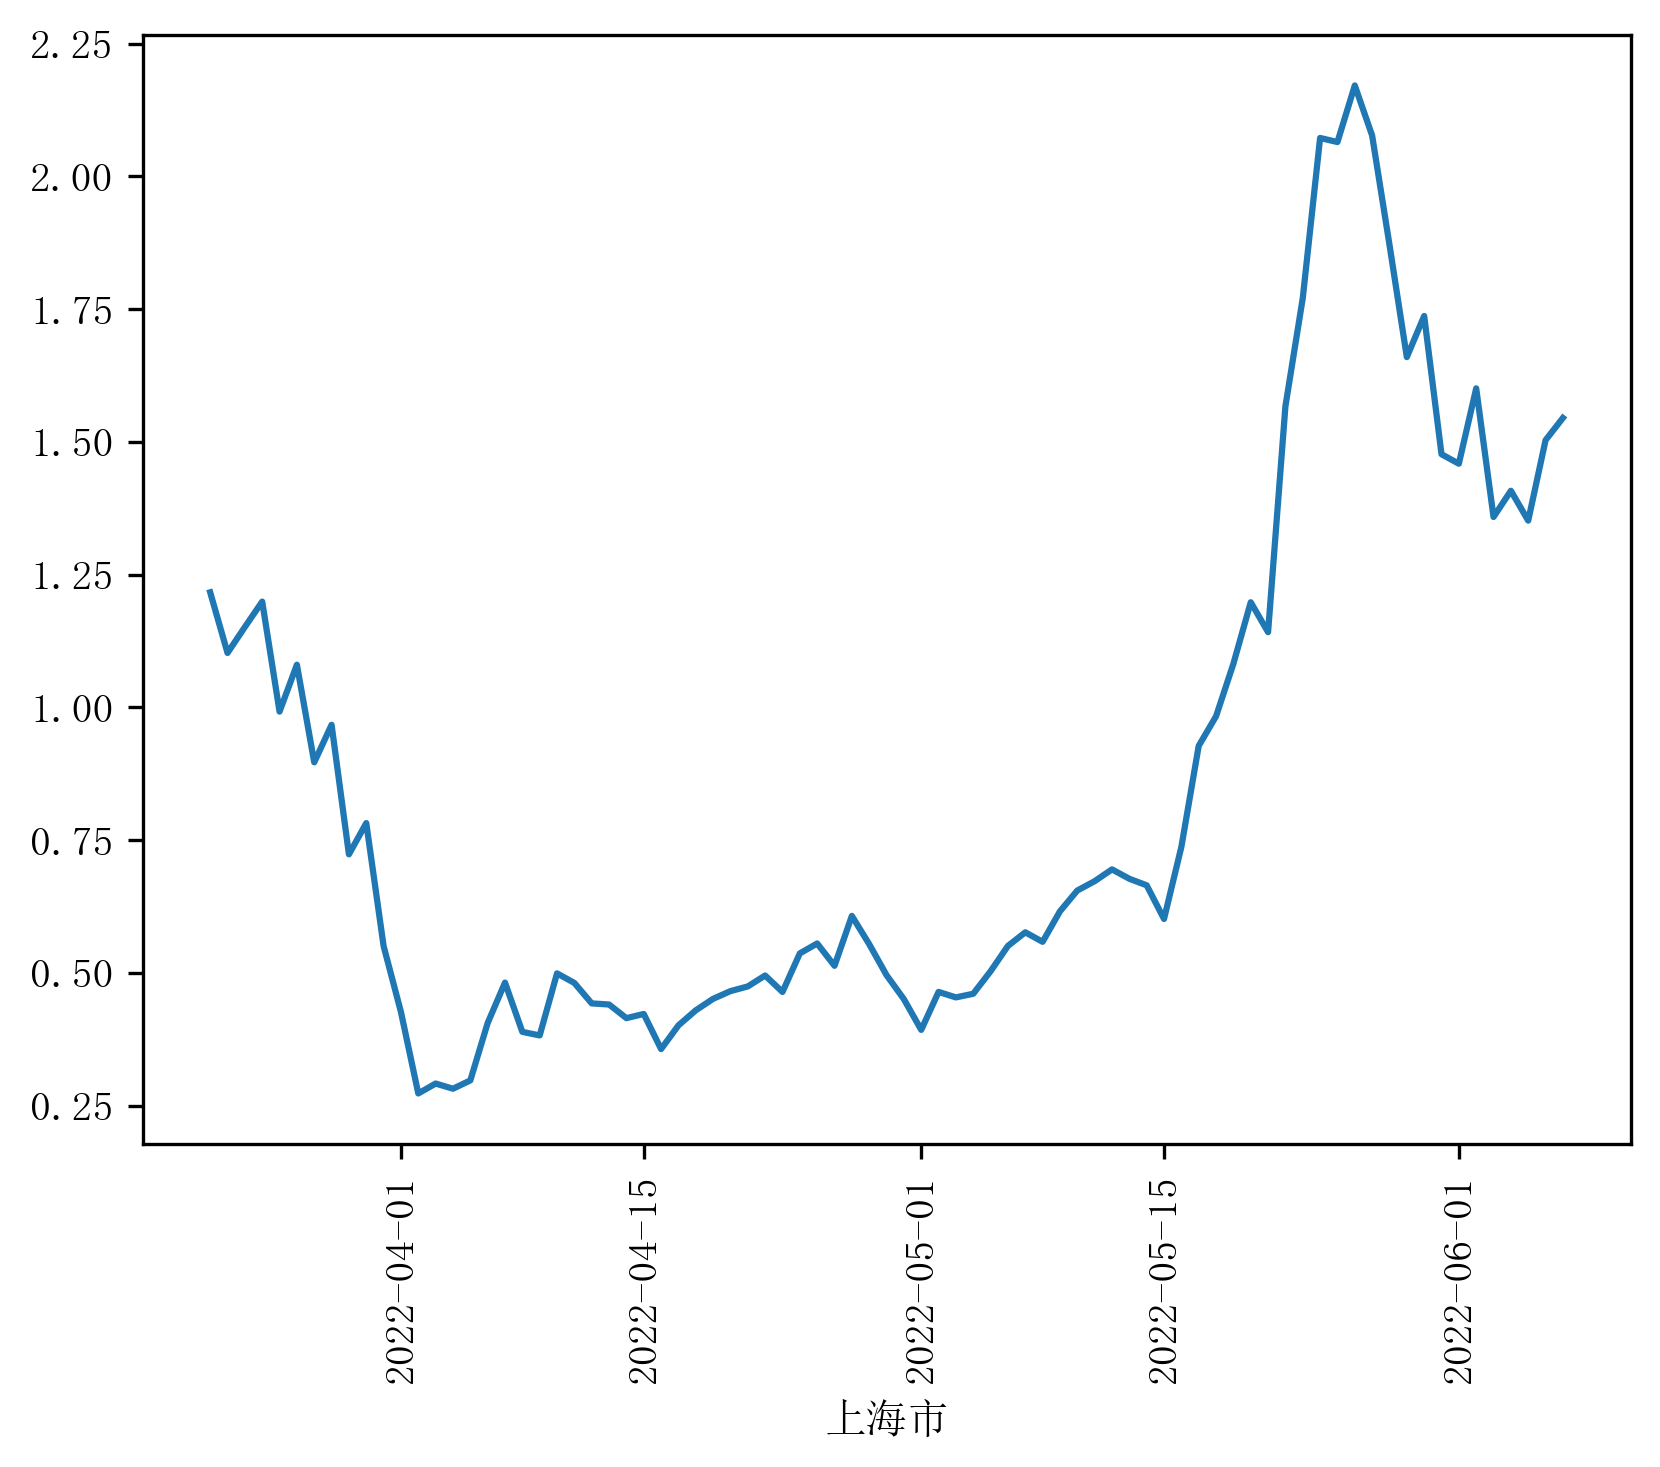

In [58]:
df = pd.DataFrame(dic['上海市'],index=['上海市'])
df = df.T.reset_index()
df.columns = ['time','上海市']
df['time'] = df['time'].apply(lambda x : pd.to_datetime(str(x)))
fig,ax = plt.subplots(dpi=300)
ax.plot(df['time'],df['上海市'])
ax.set_xticks = [df['time']]
ax.tick_params(axis='x', labelrotation= 90)
ax.set_xlabel ('上海市')
fig.savefig('test.jpg')

C:\Users\minir\AppData\Local\Temp\ipykernel_49896\3134580470.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(dpi=300)


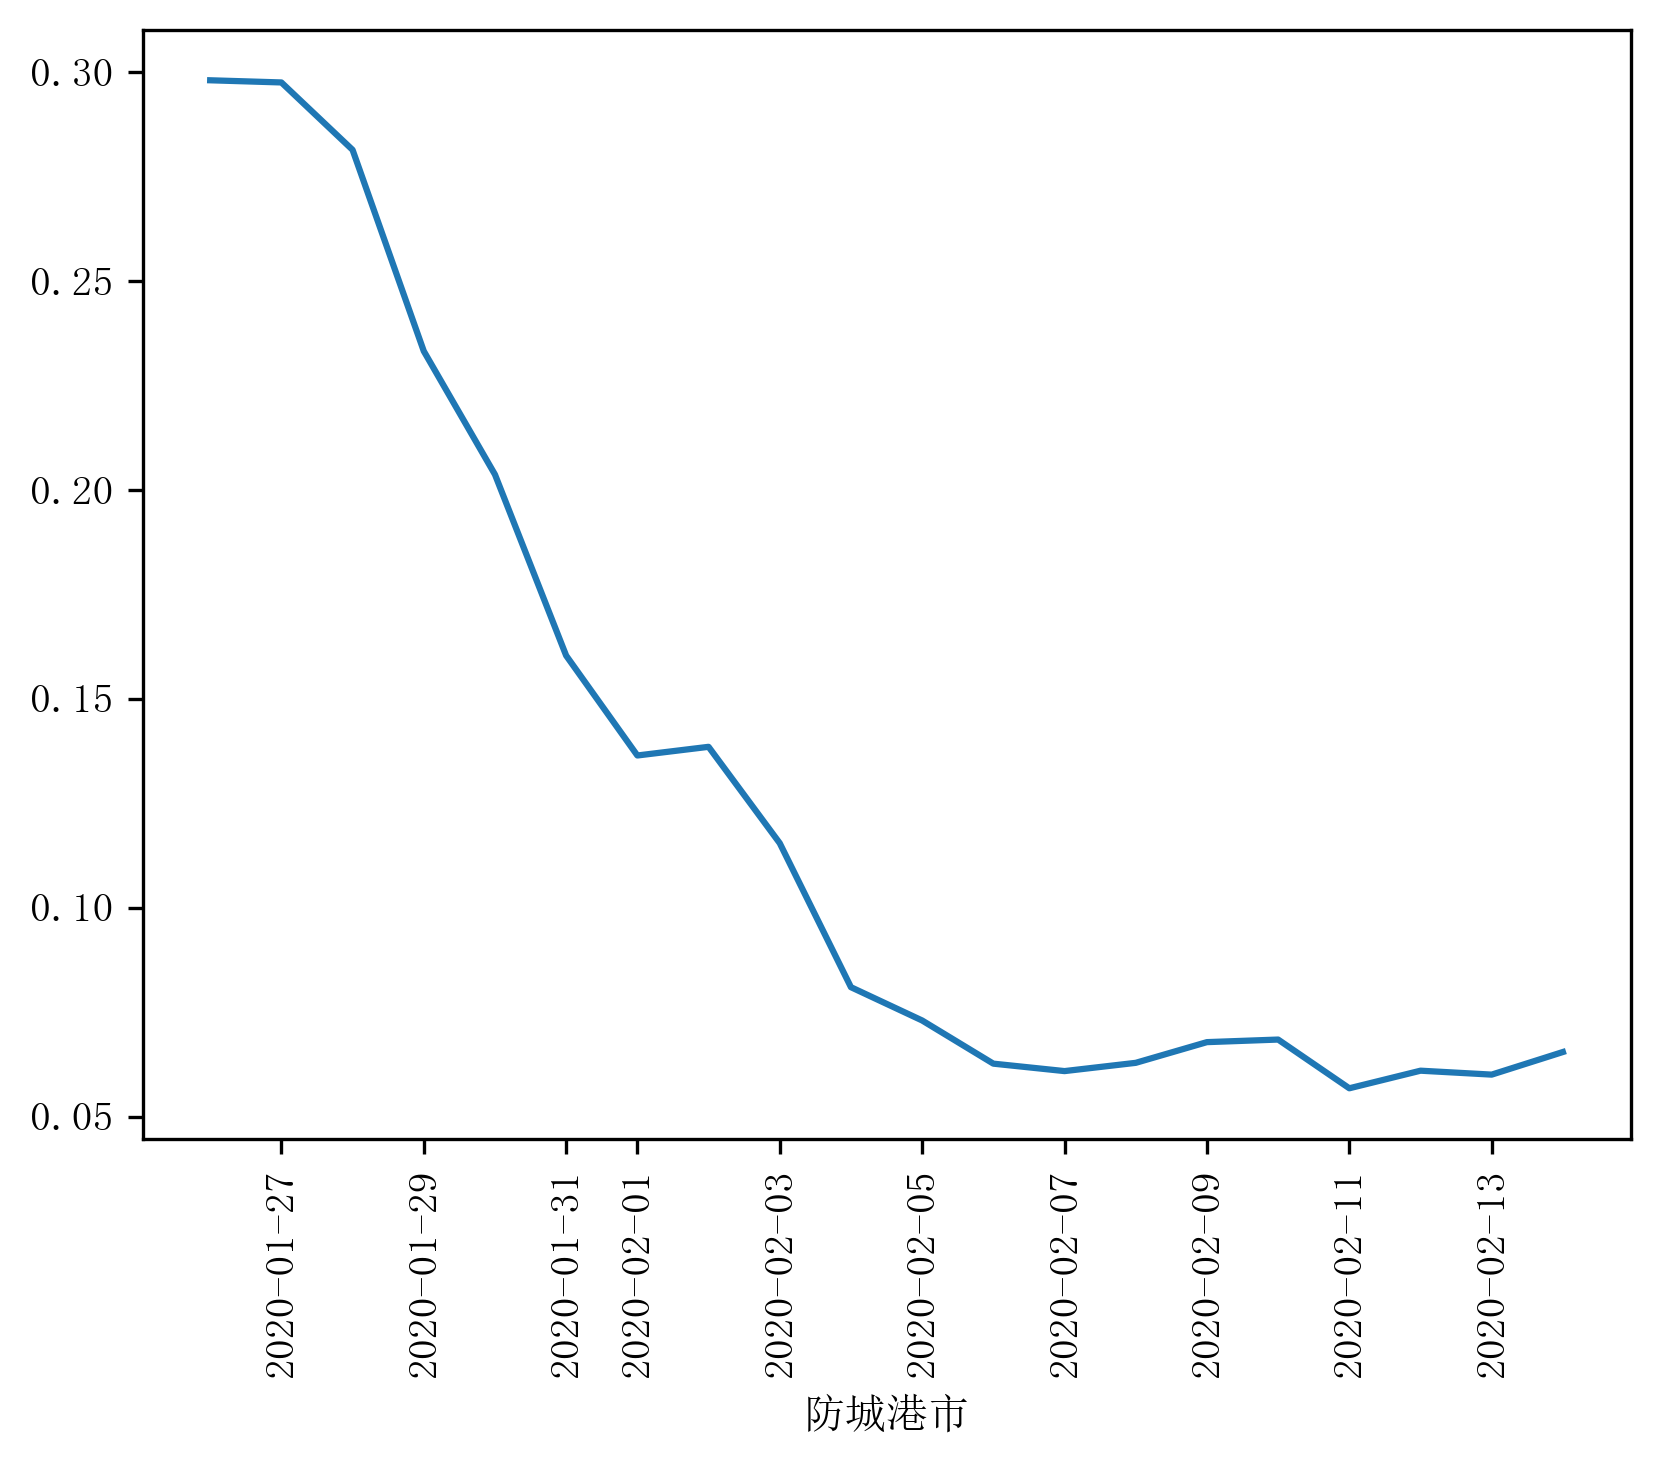

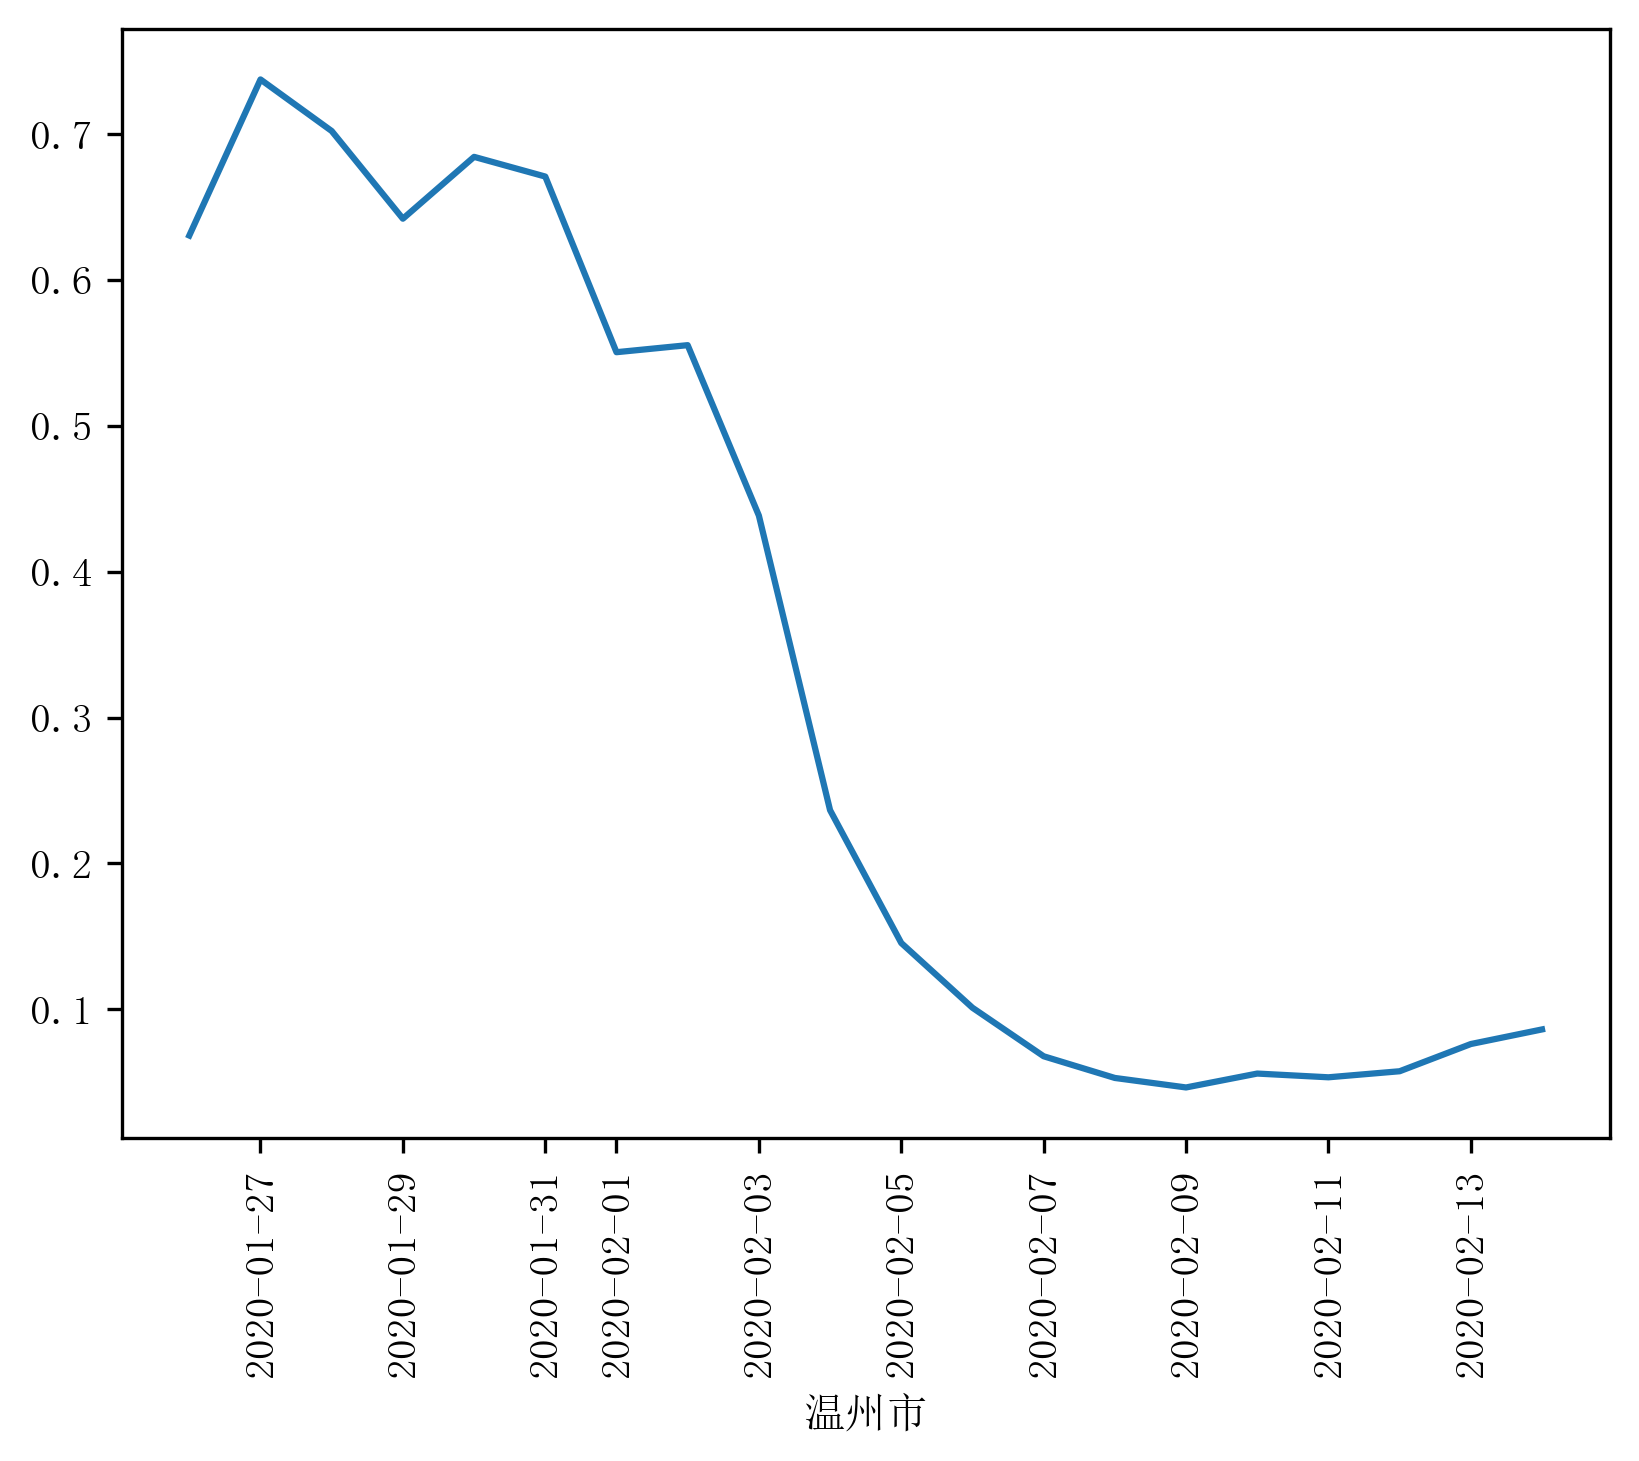

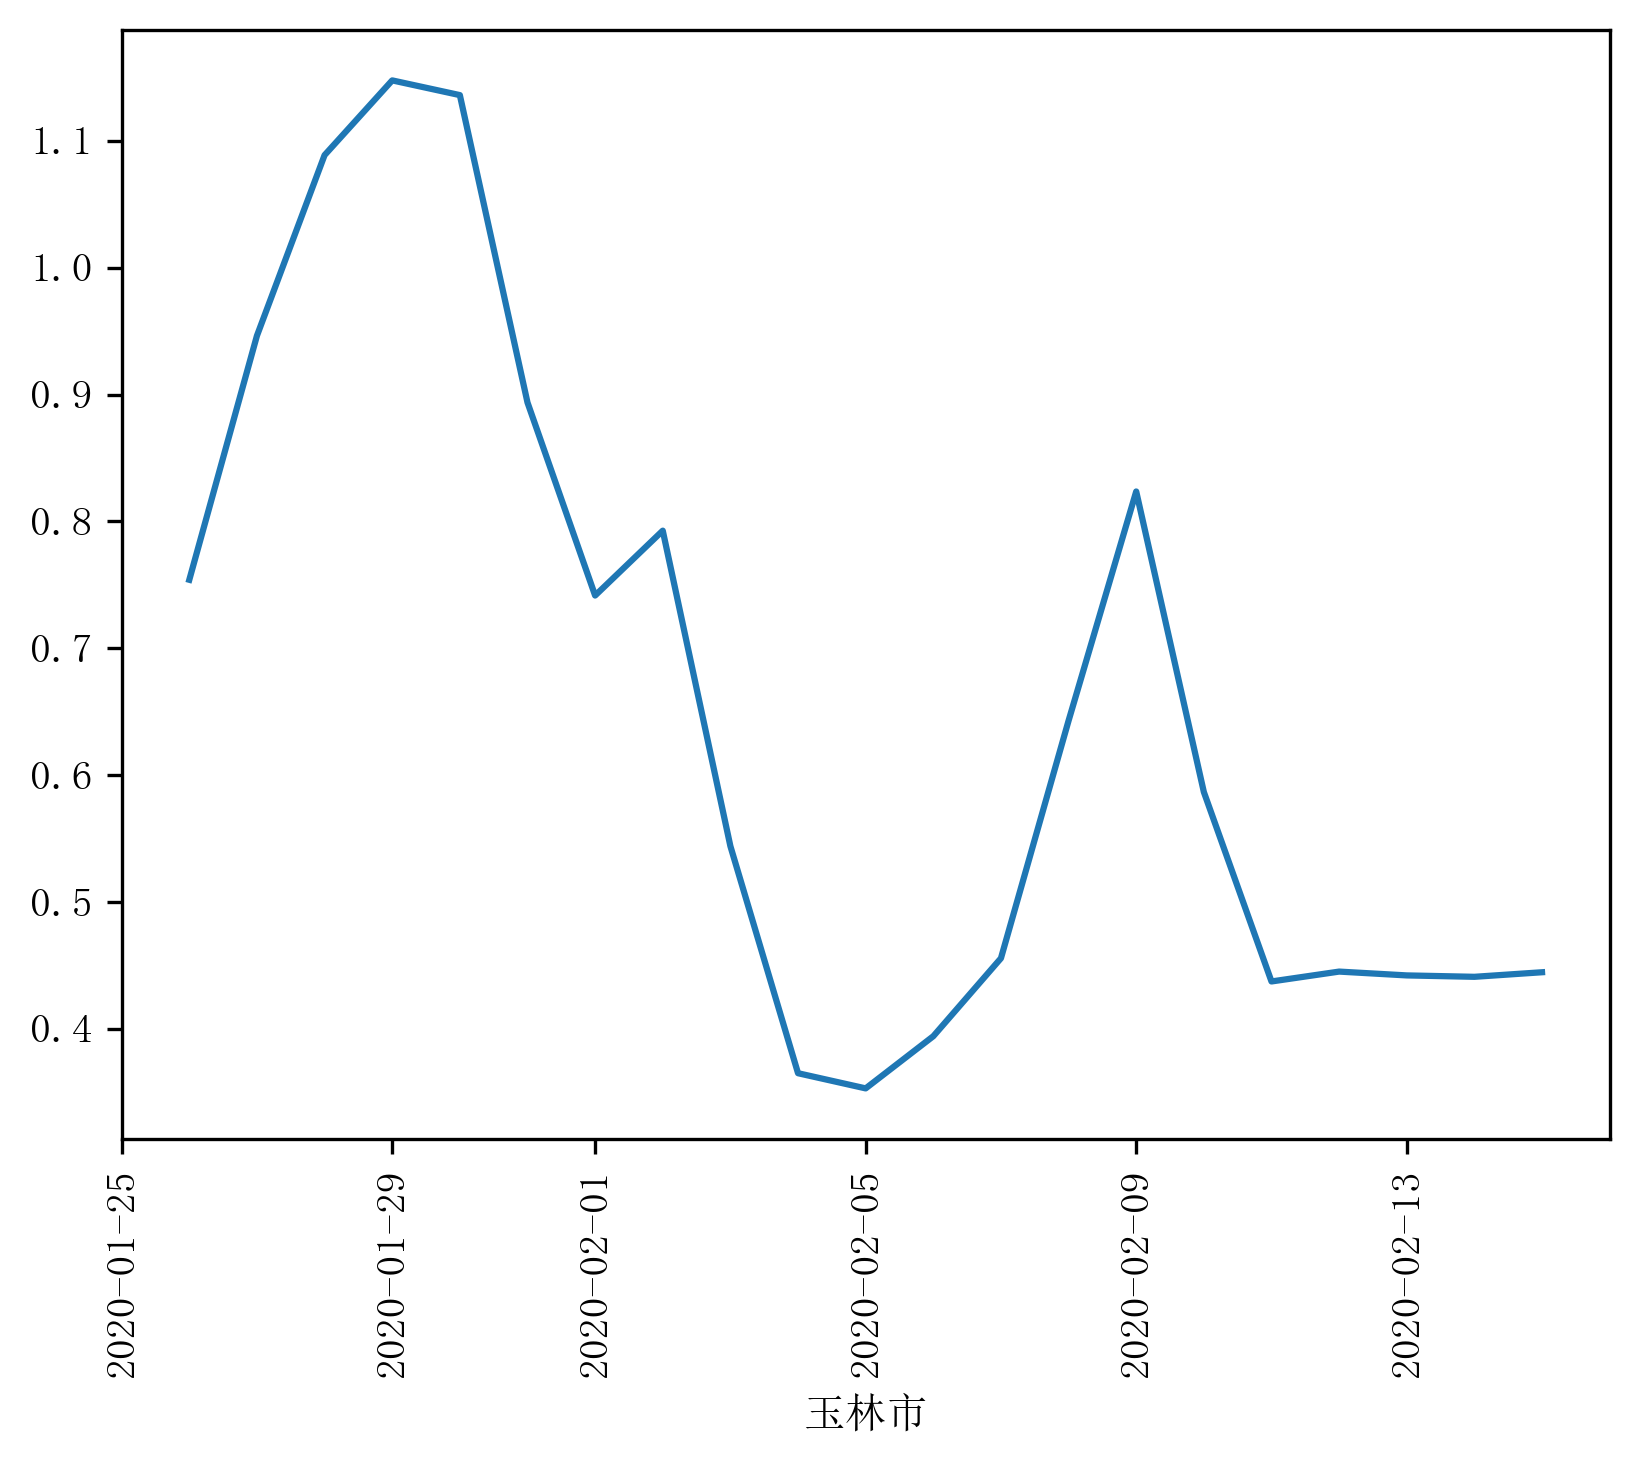

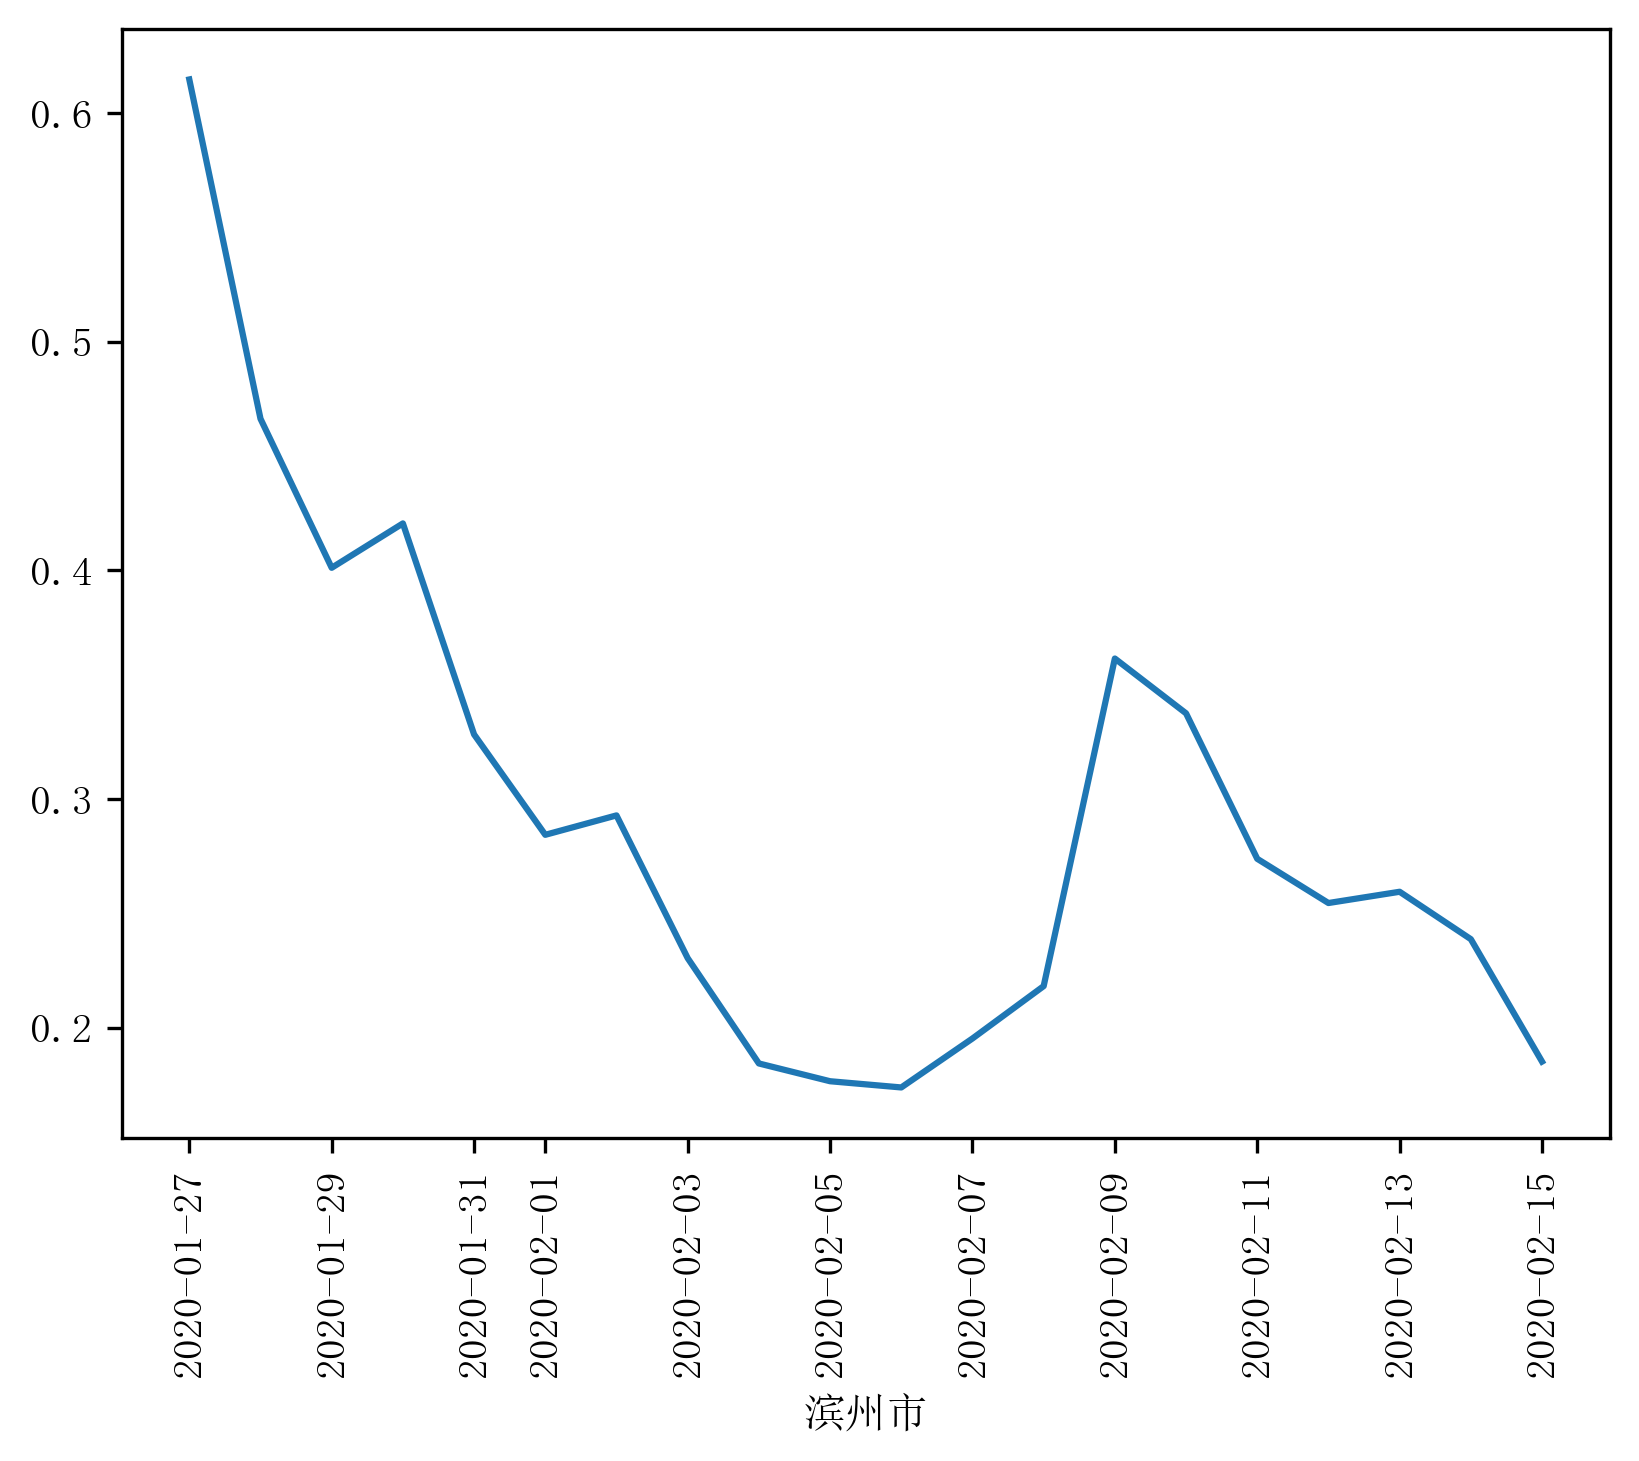

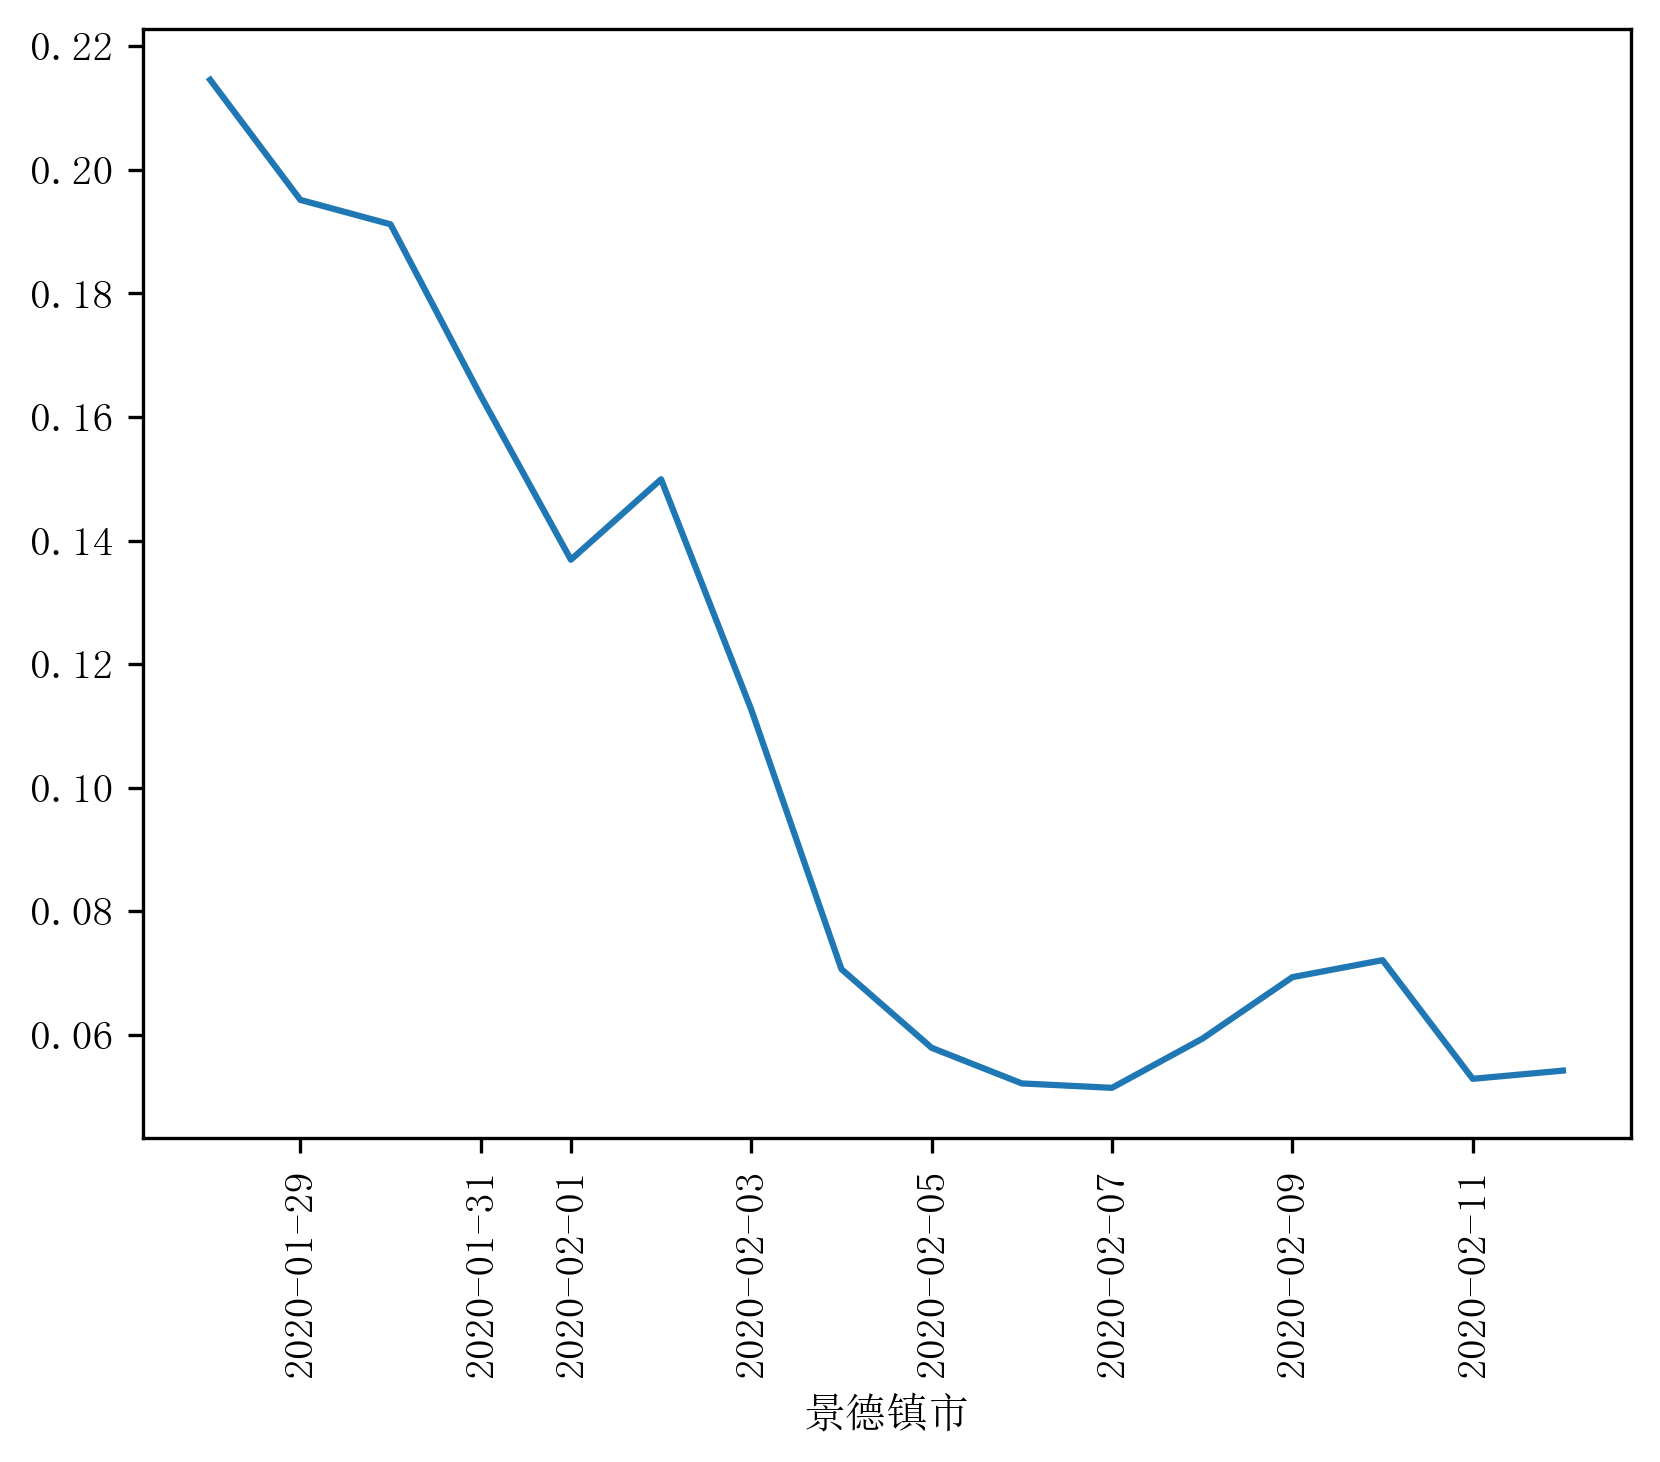

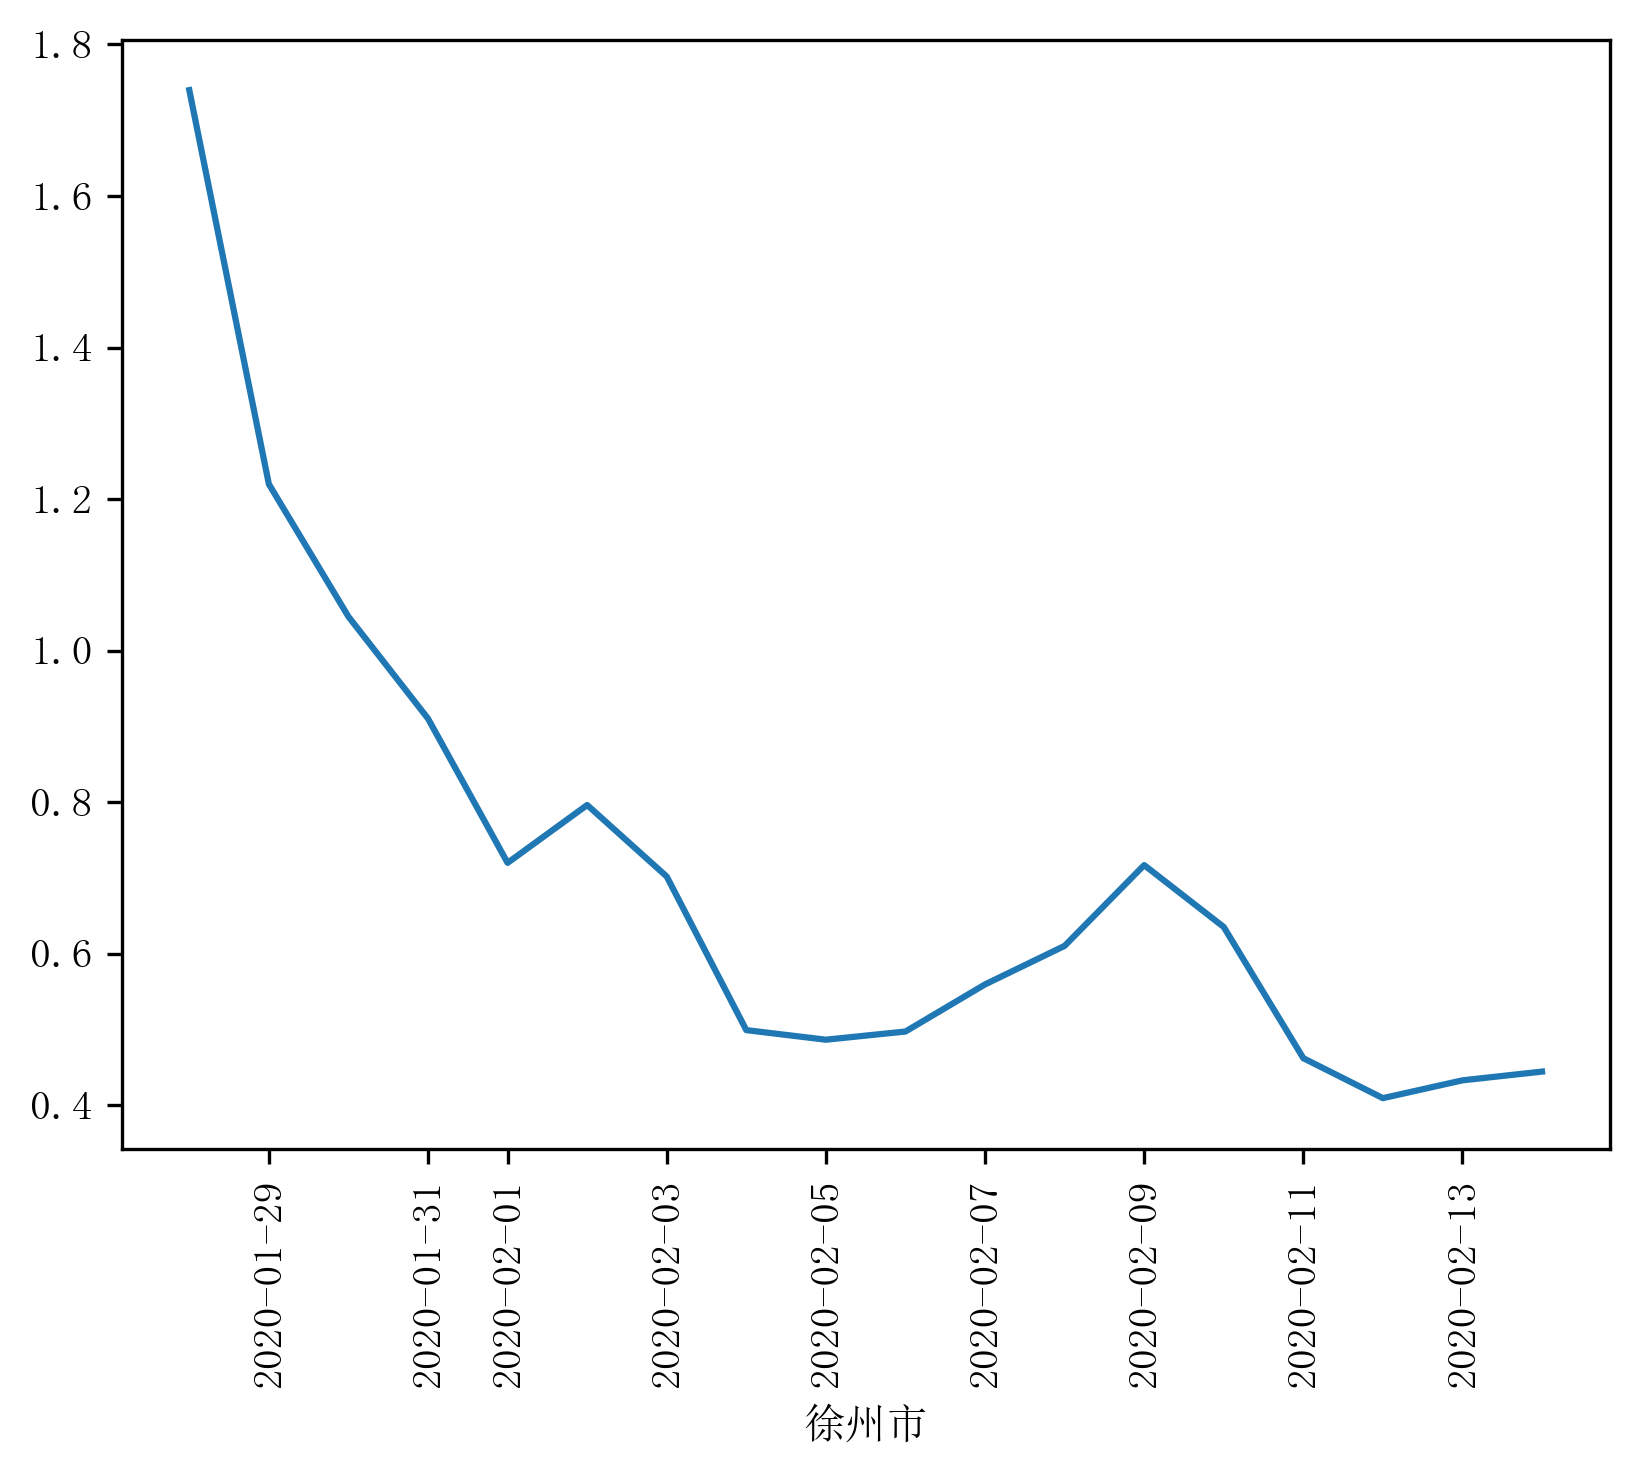

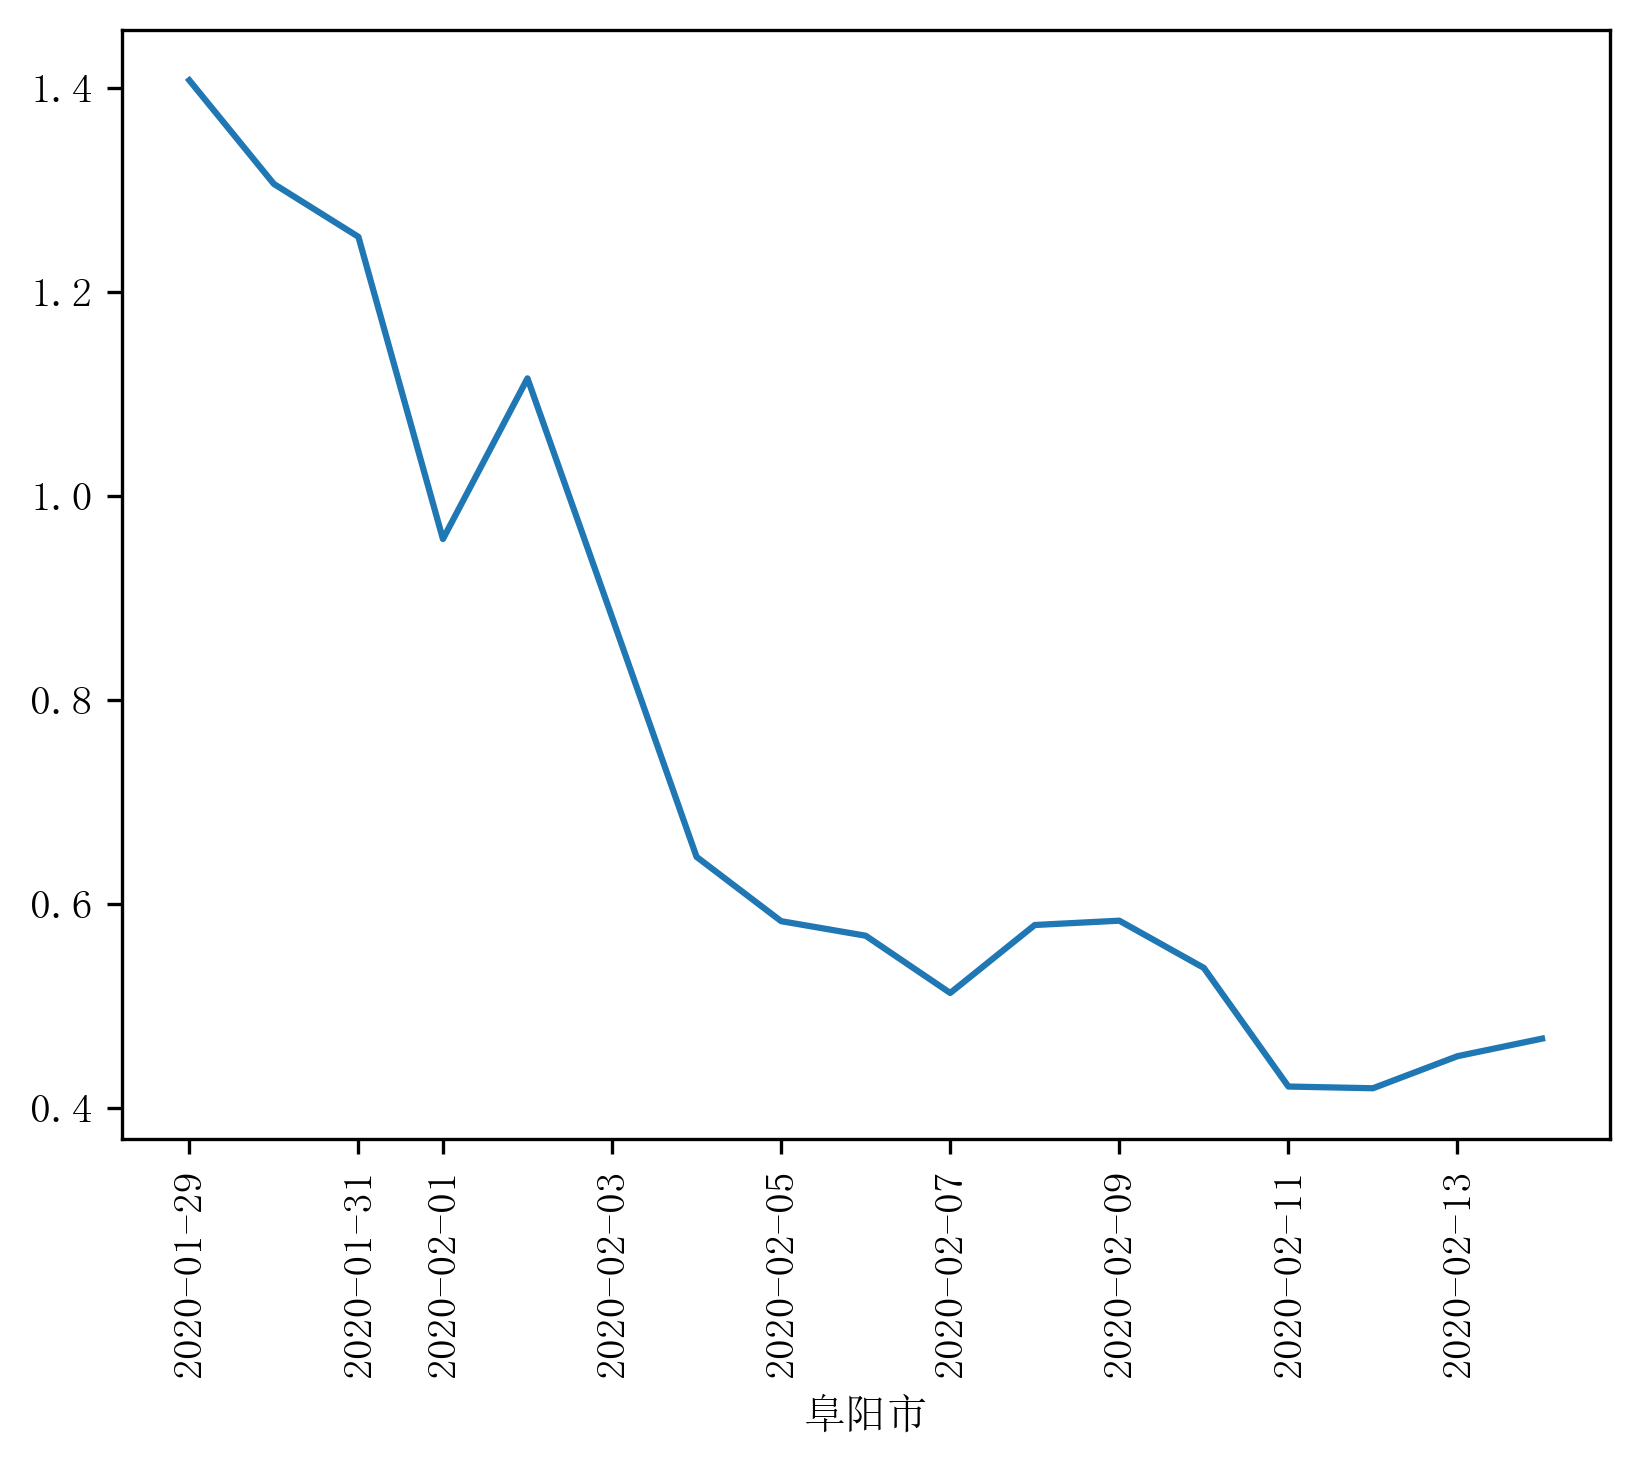

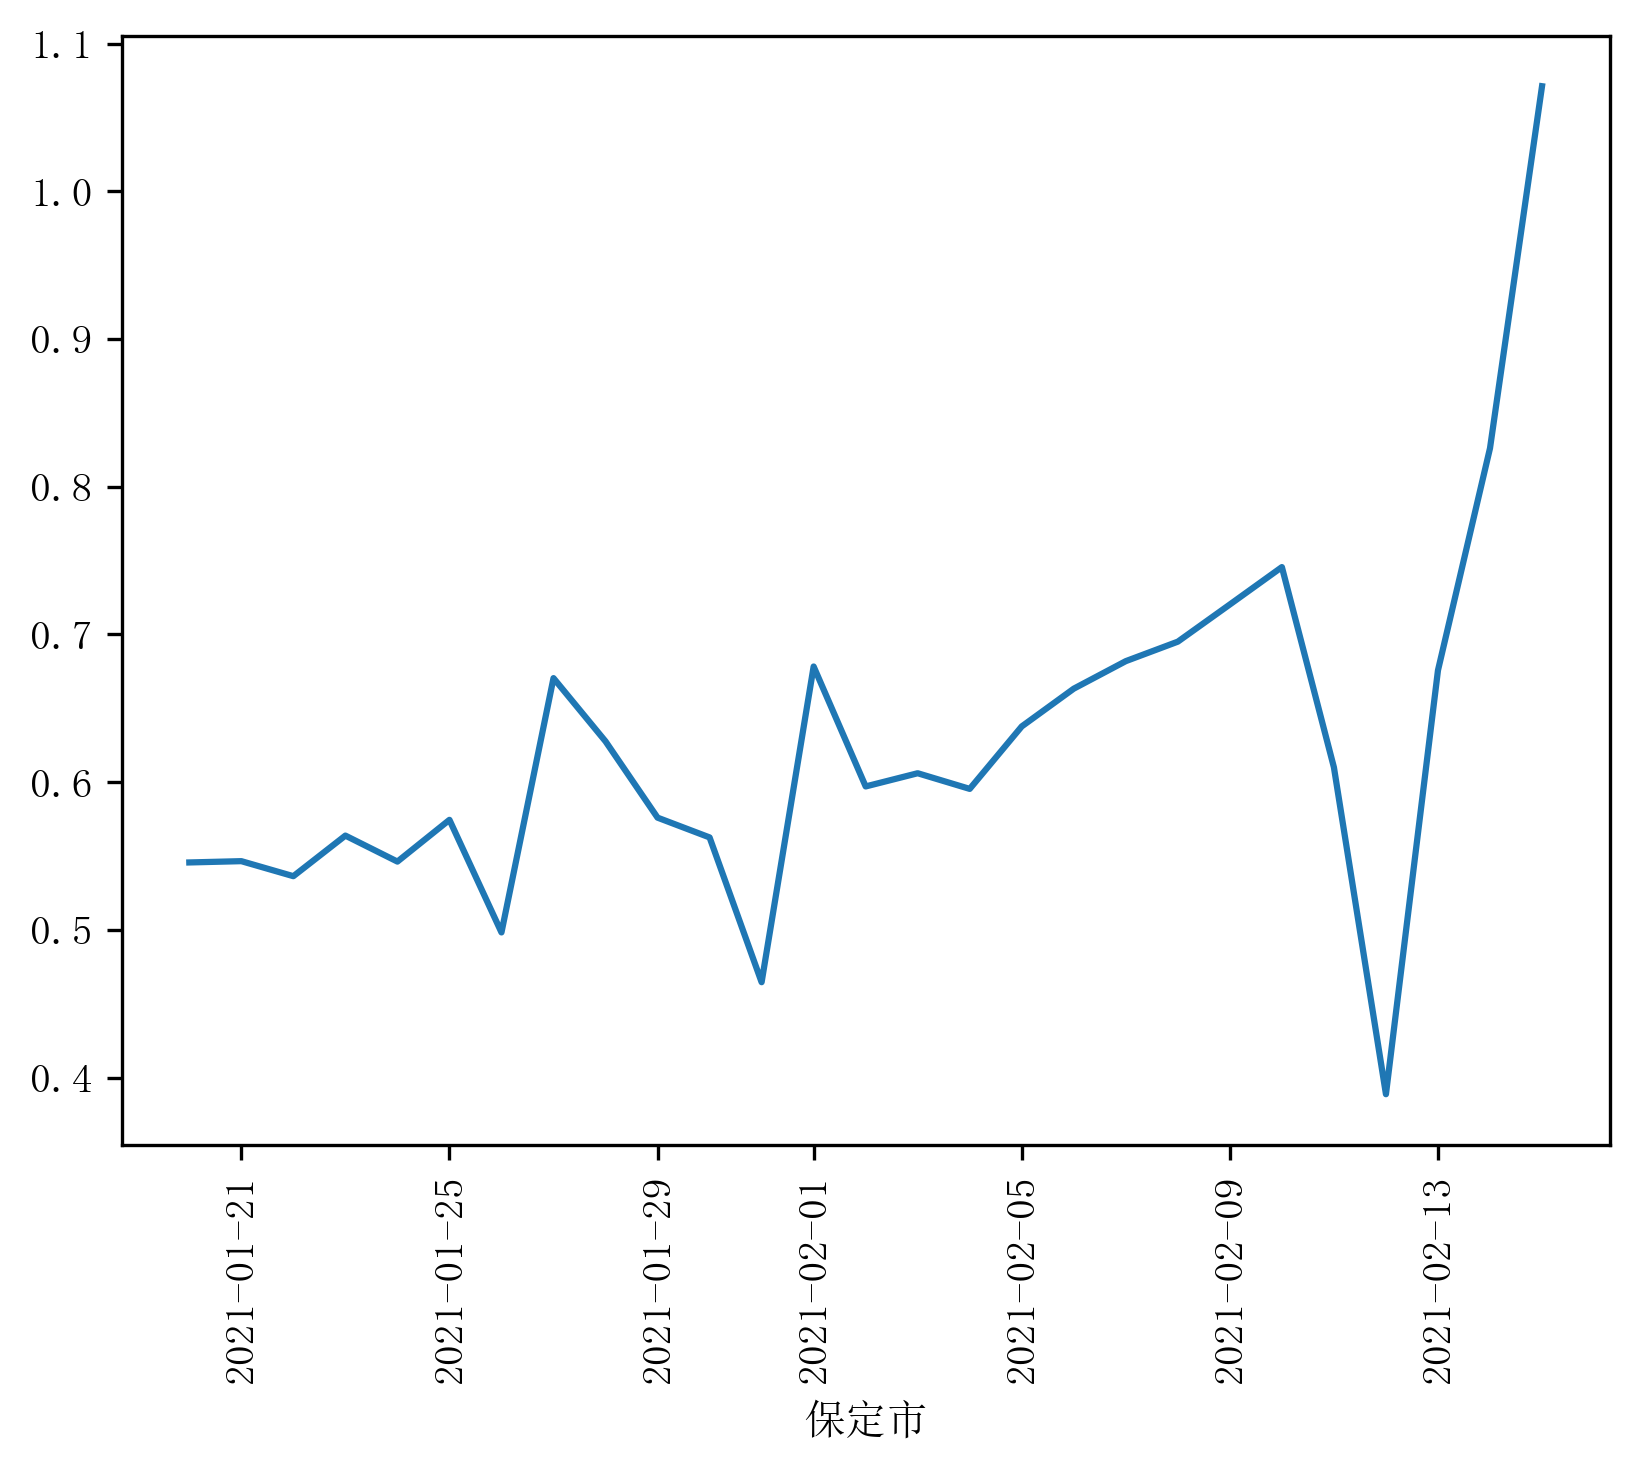

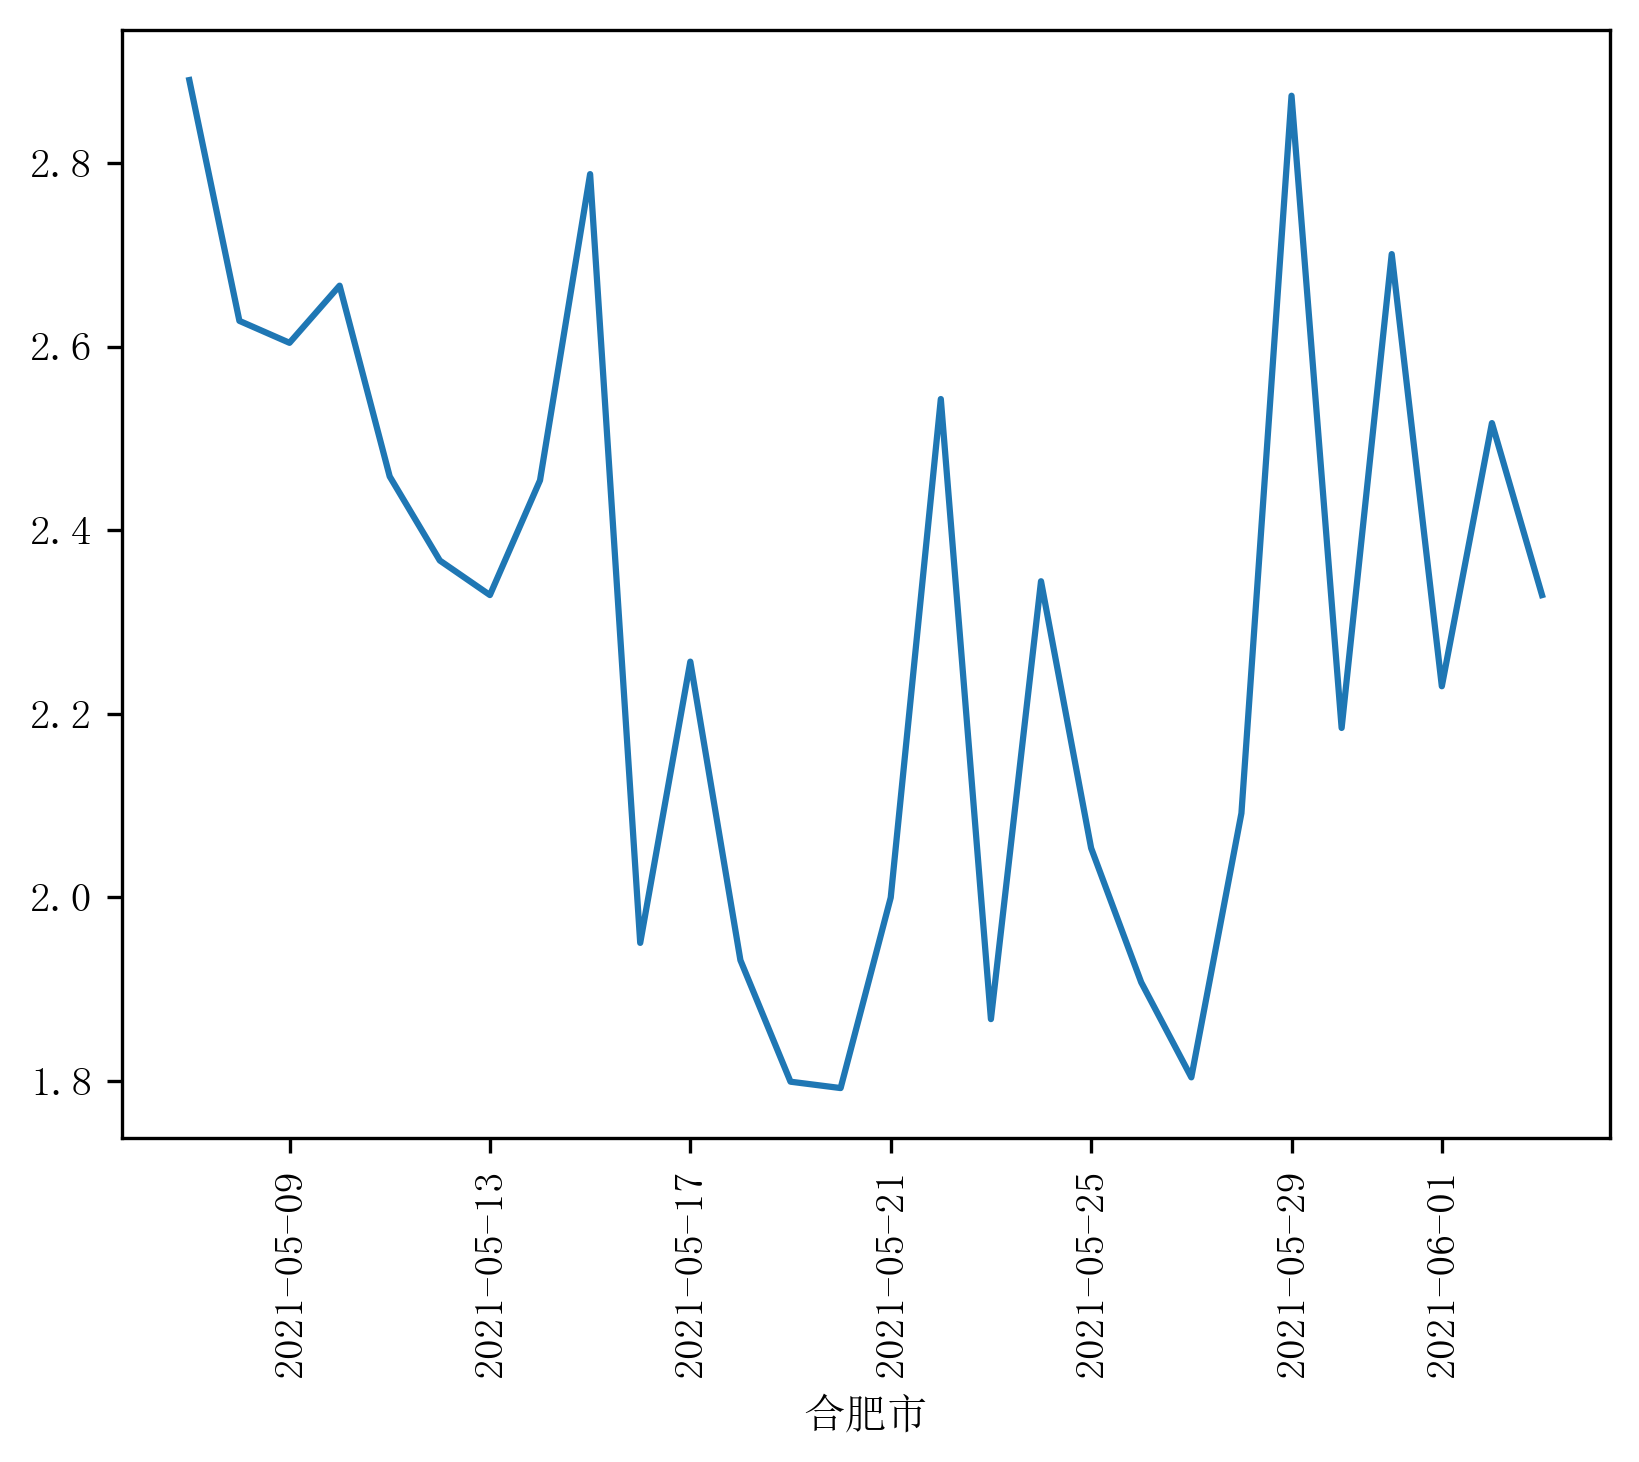

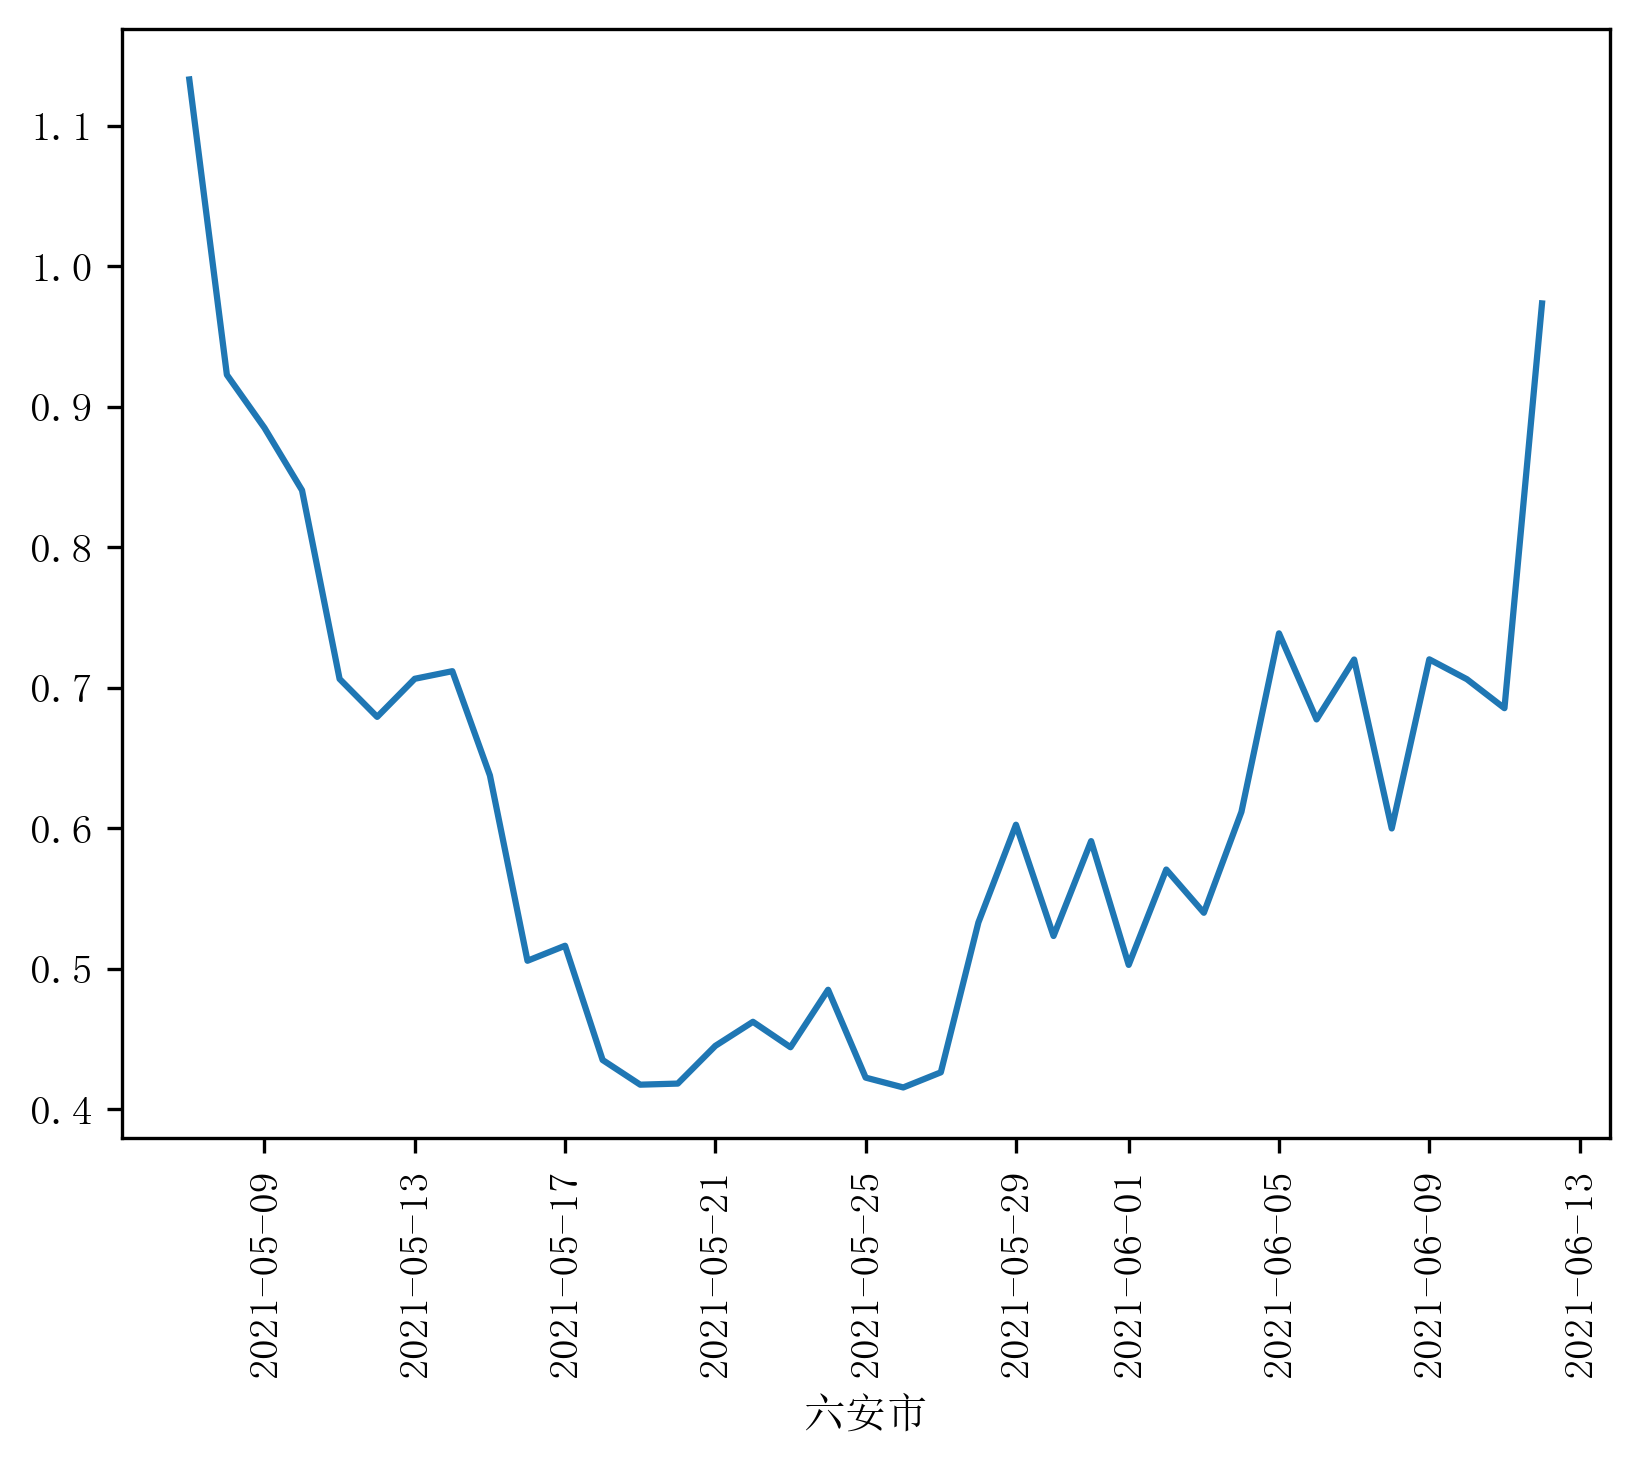

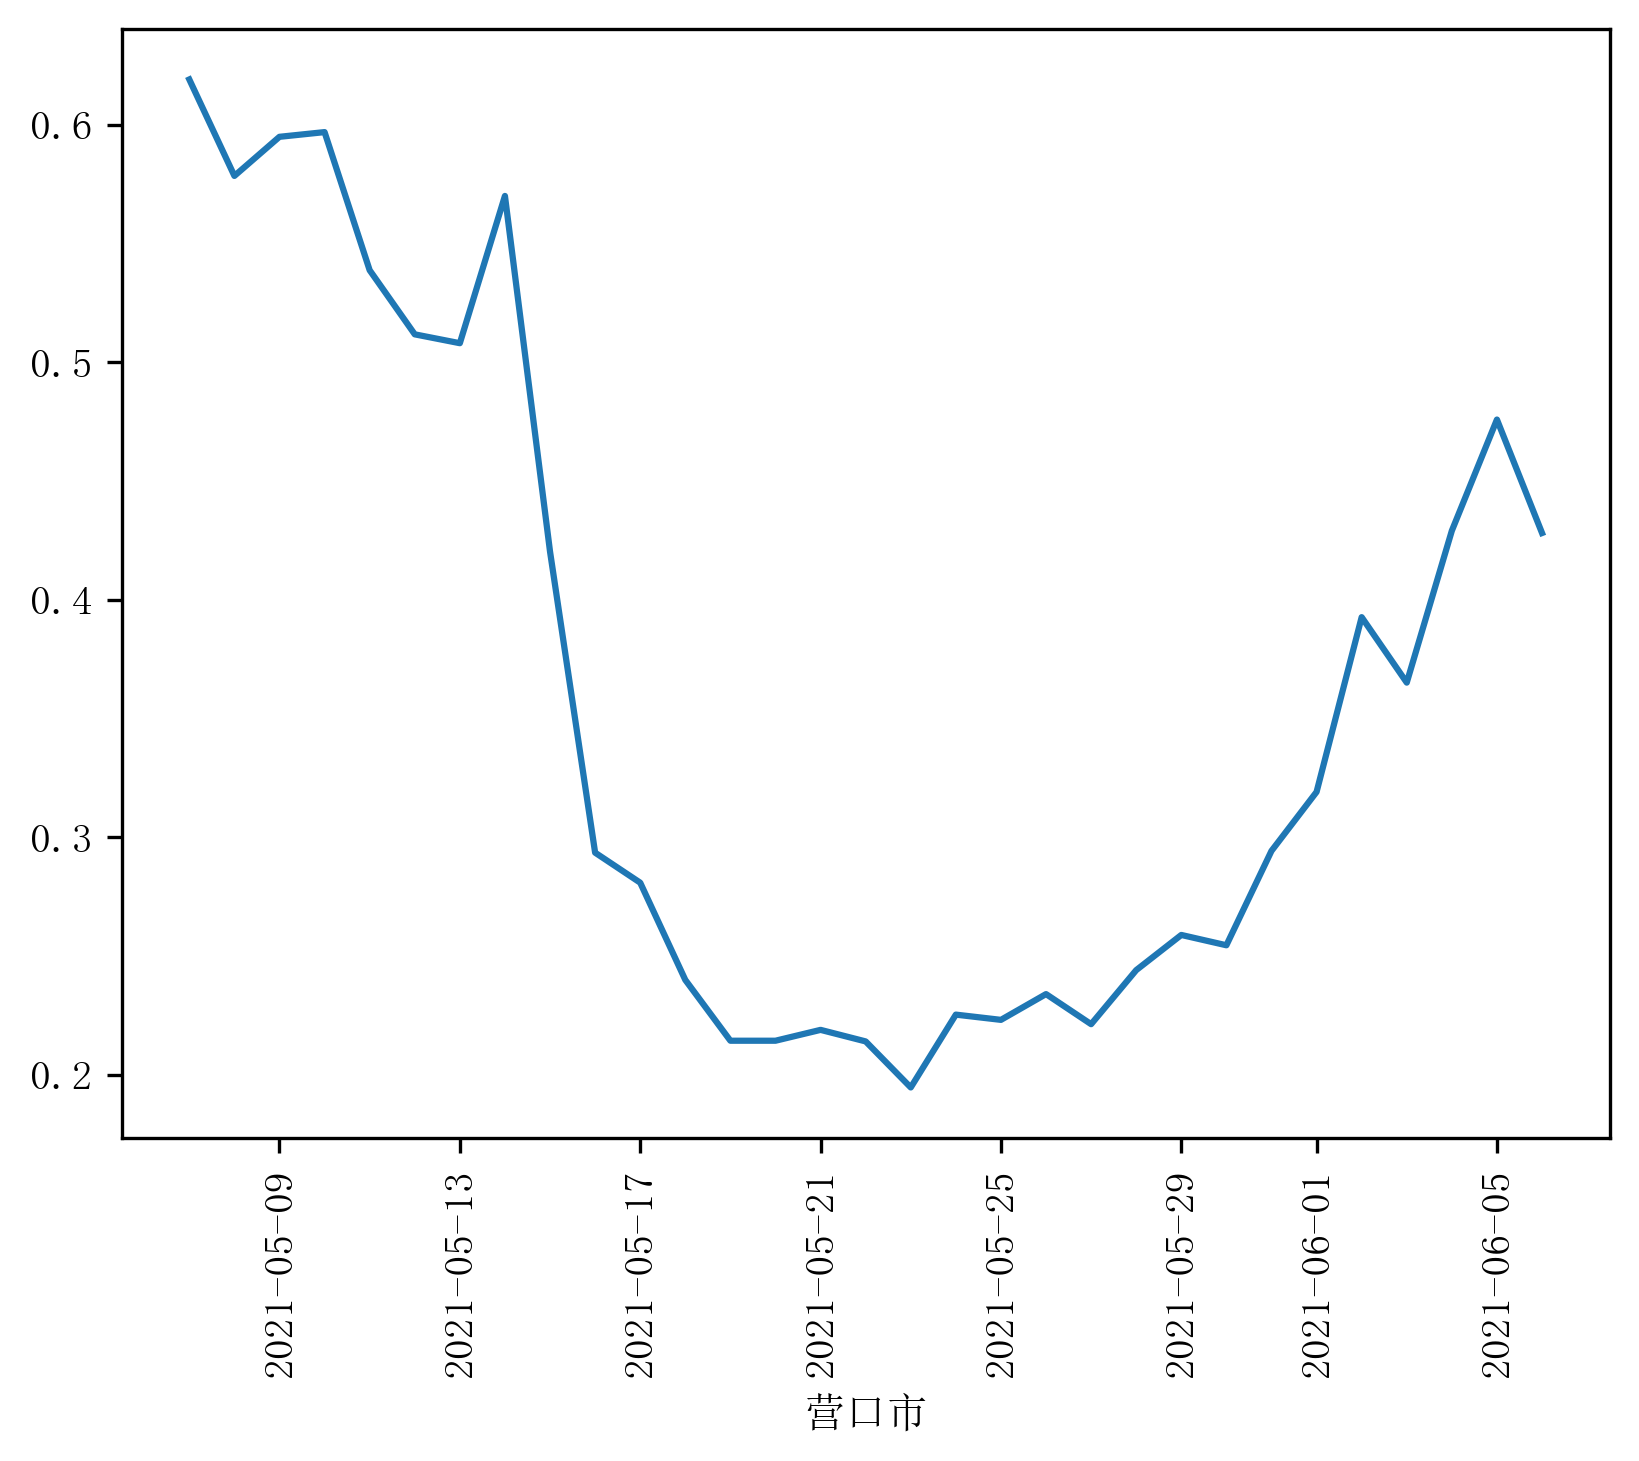

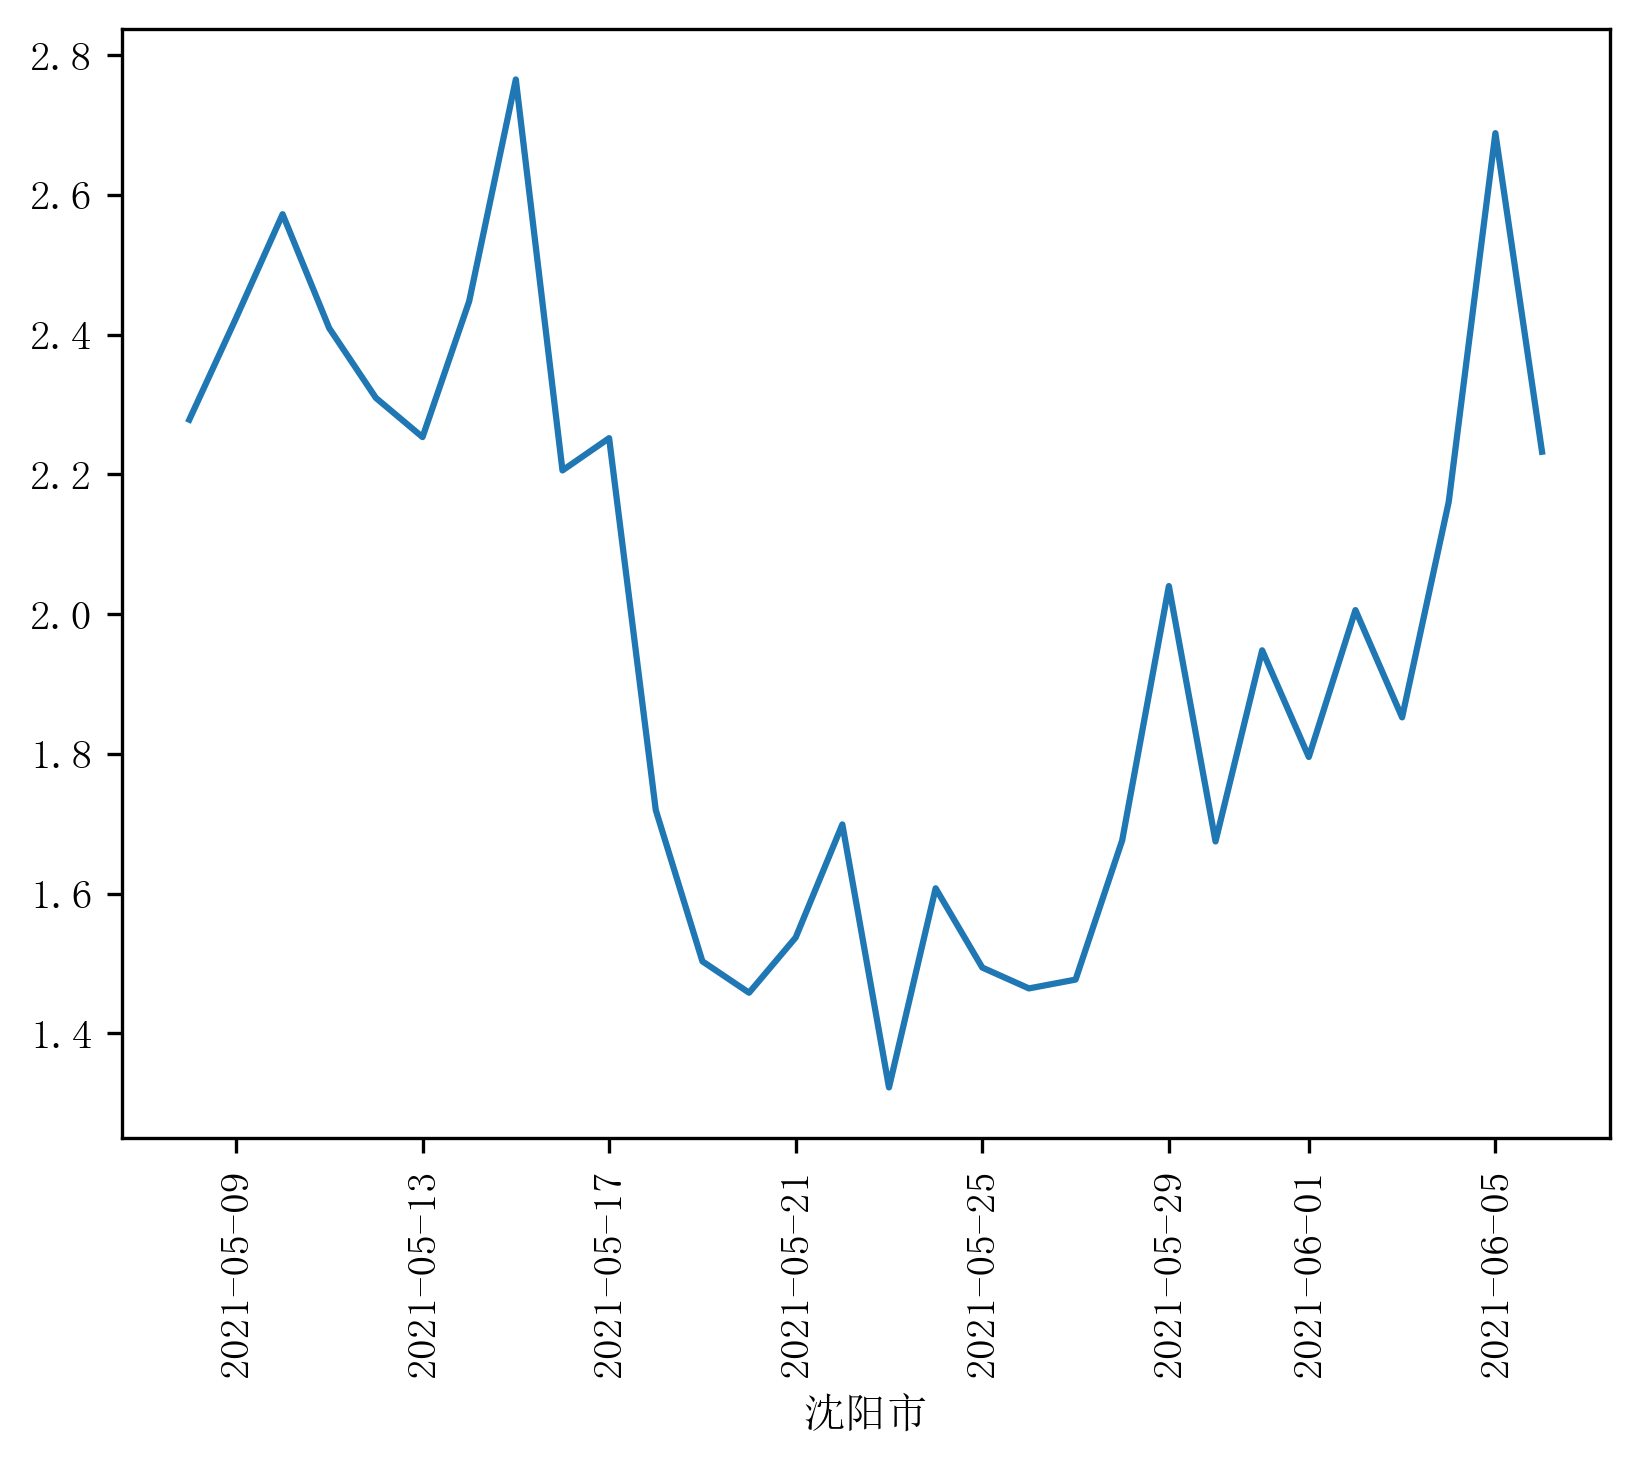

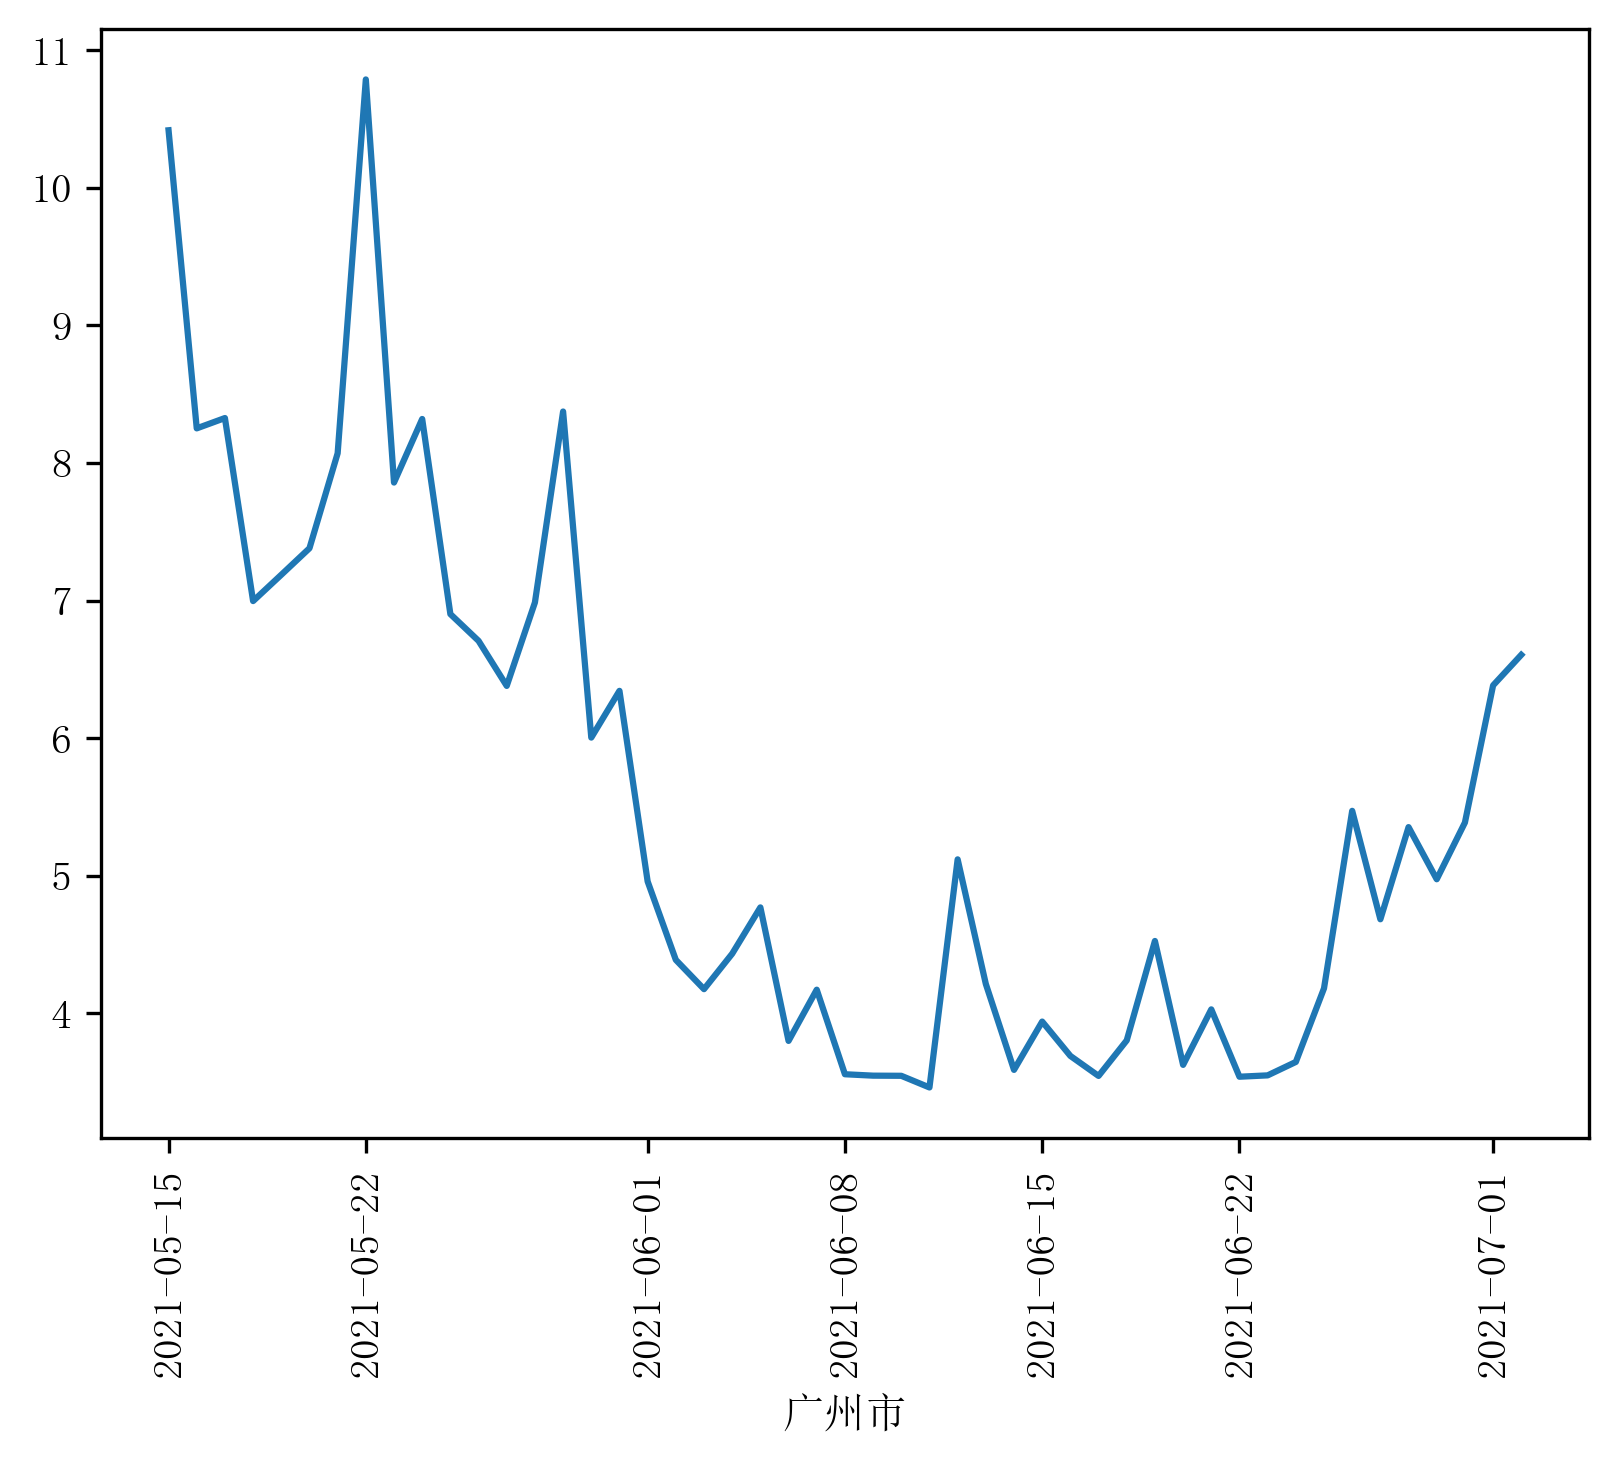

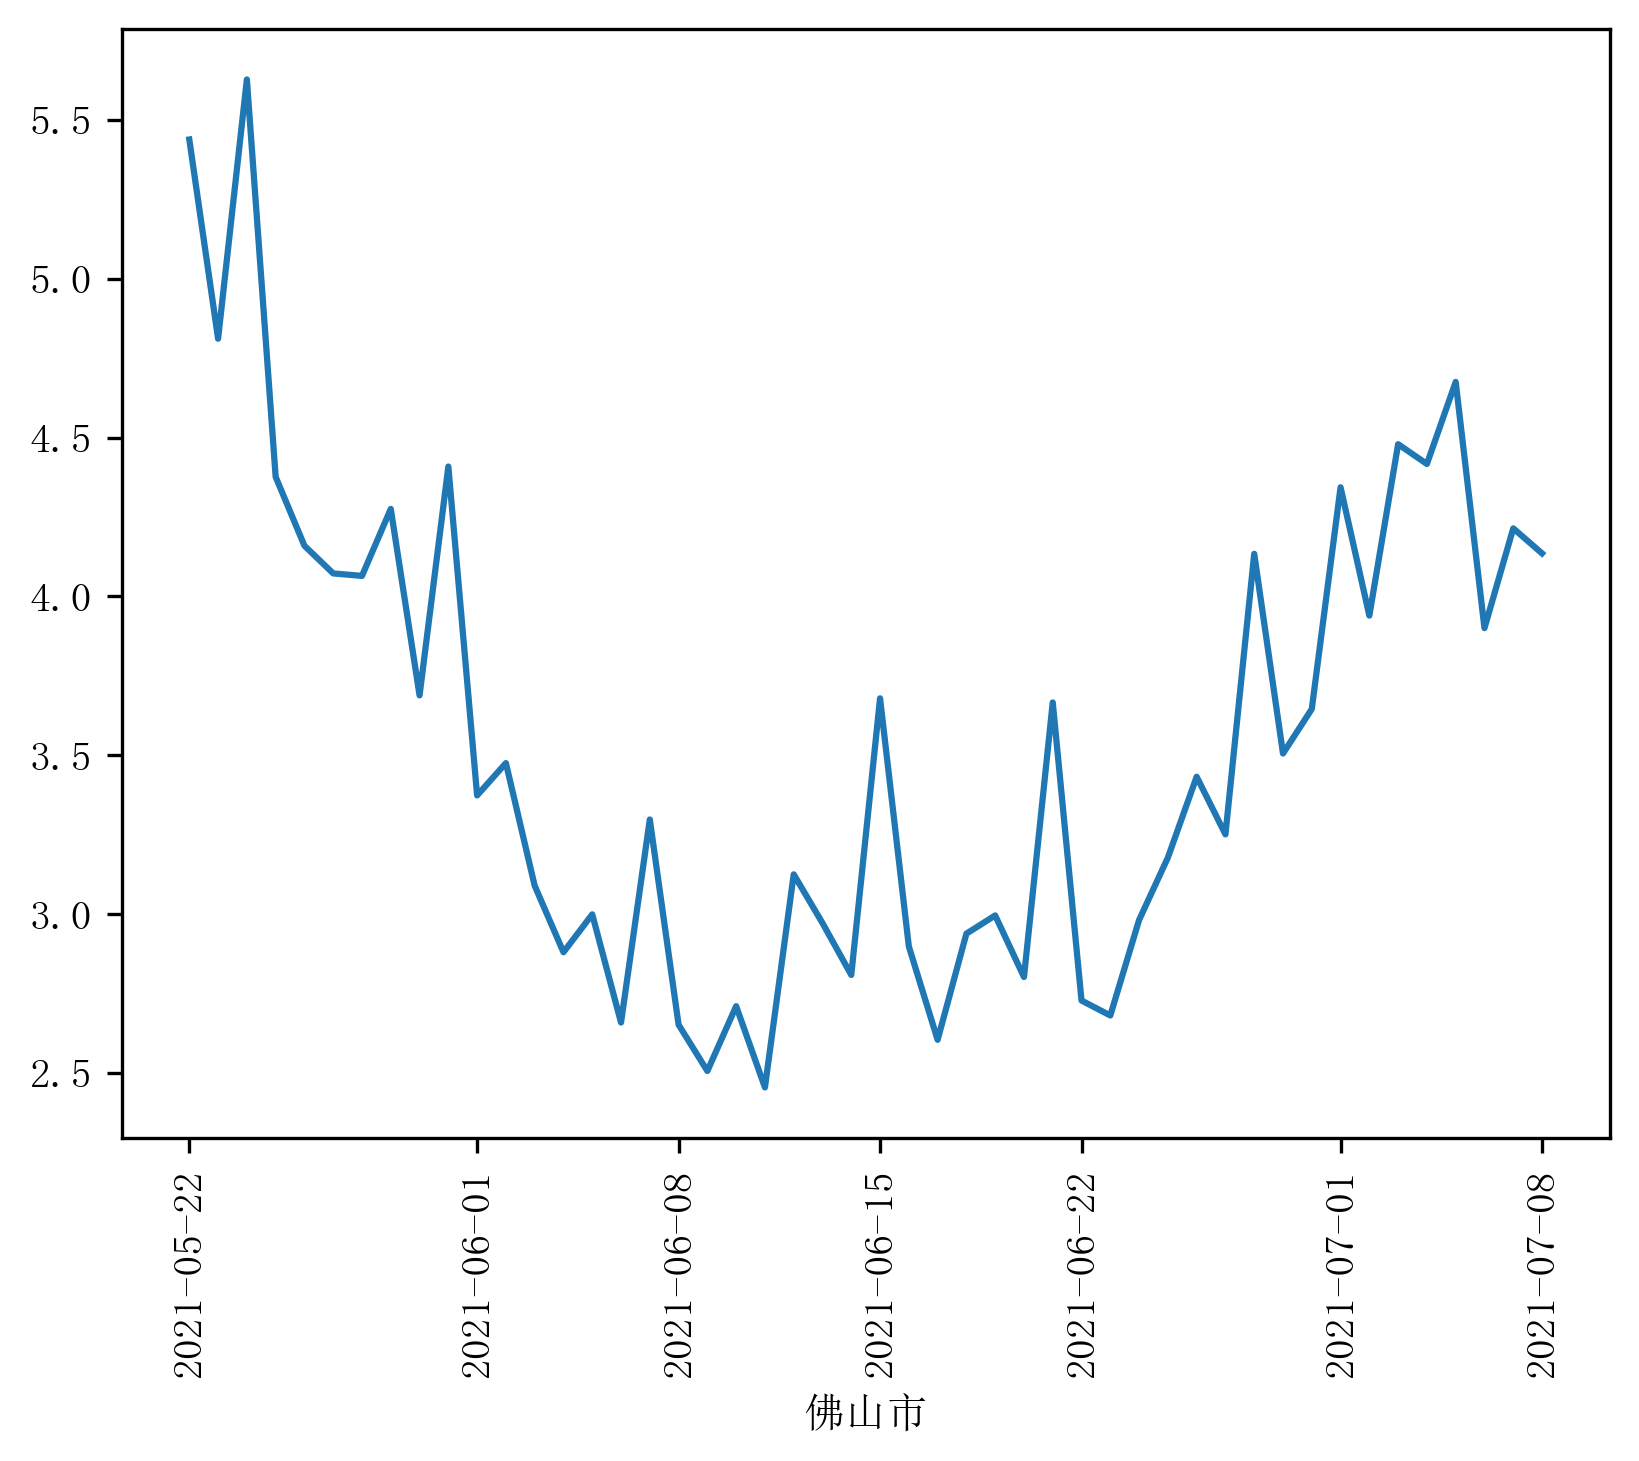

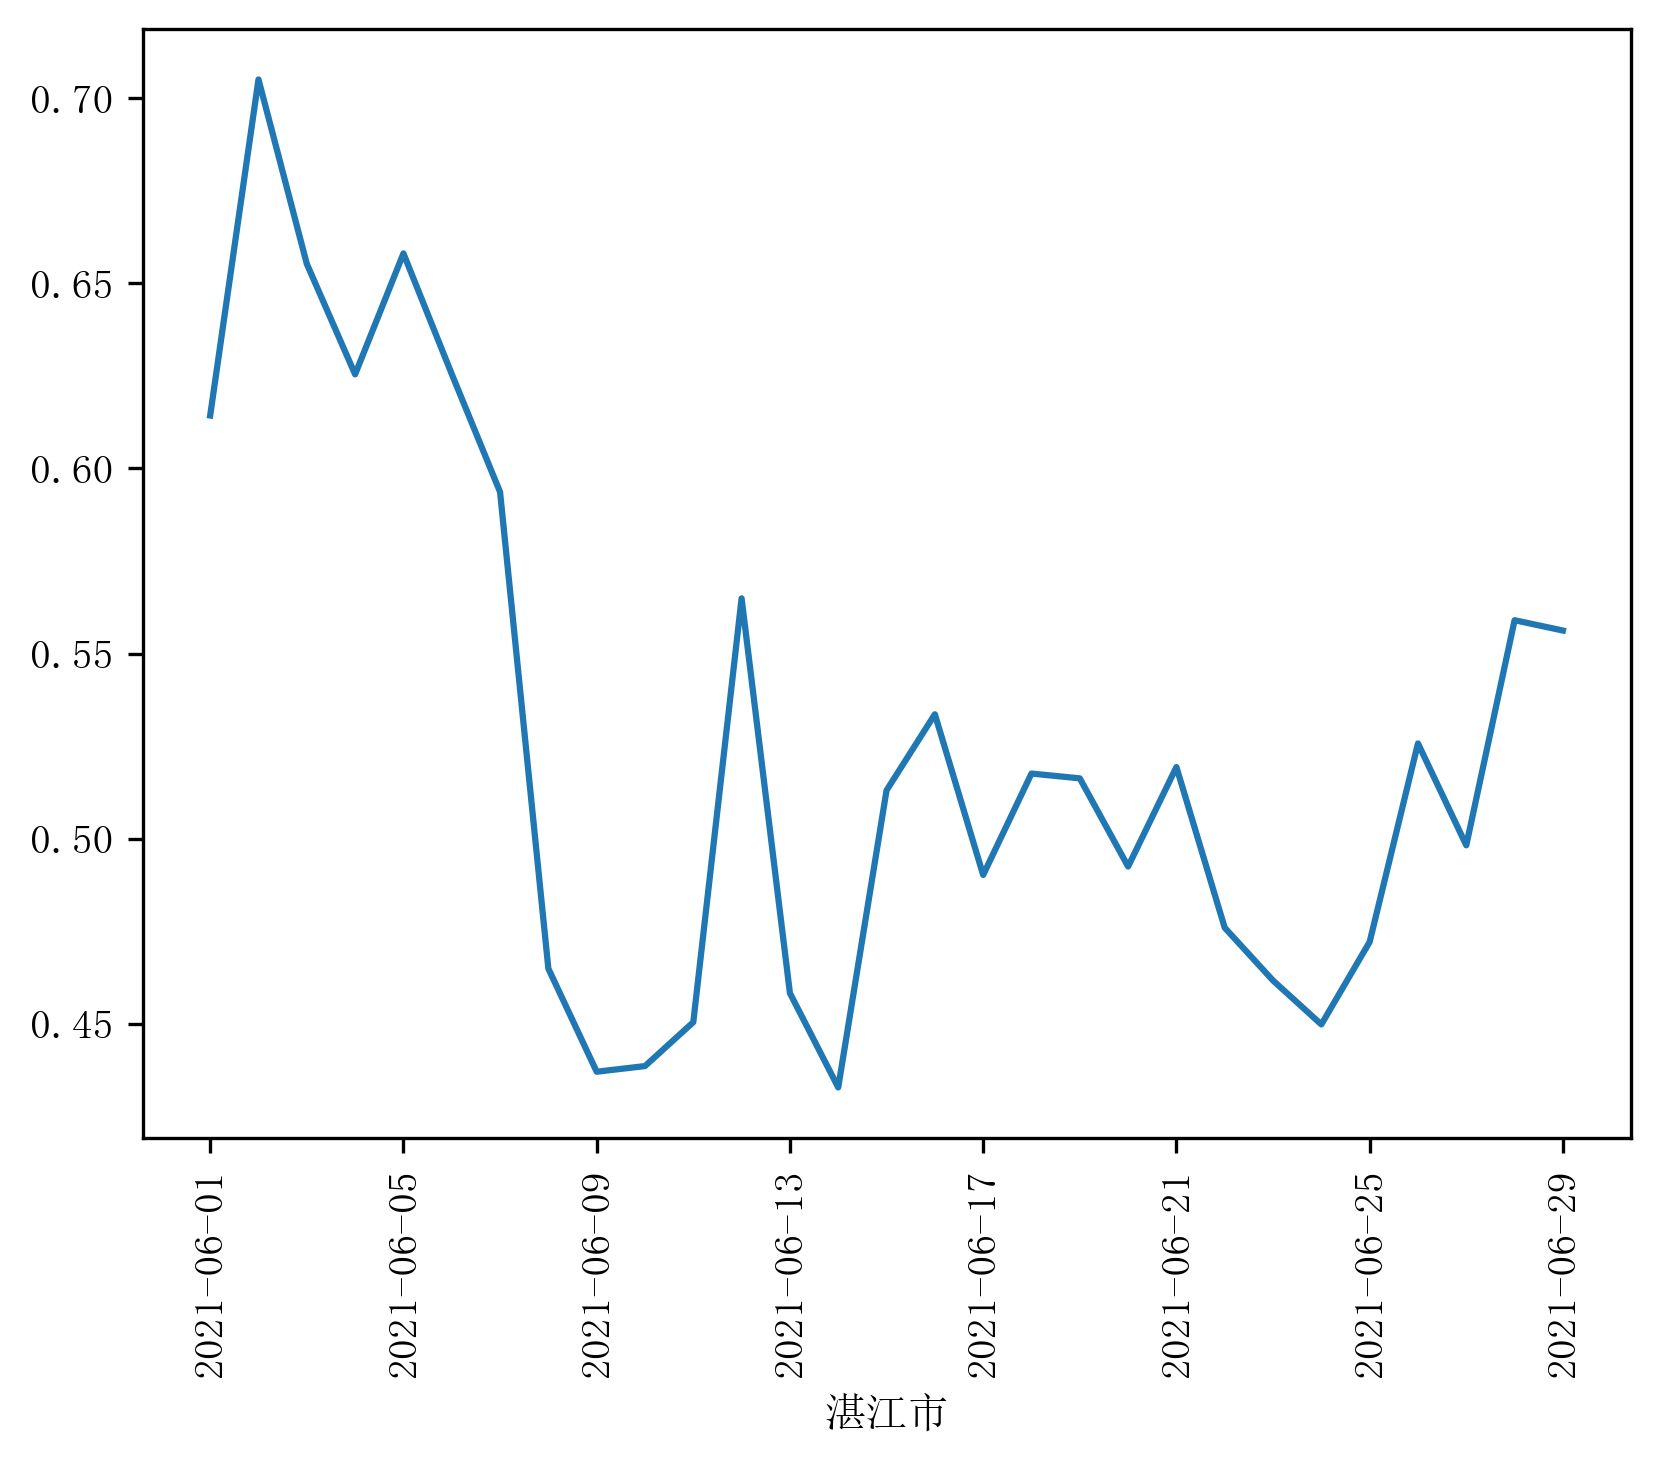

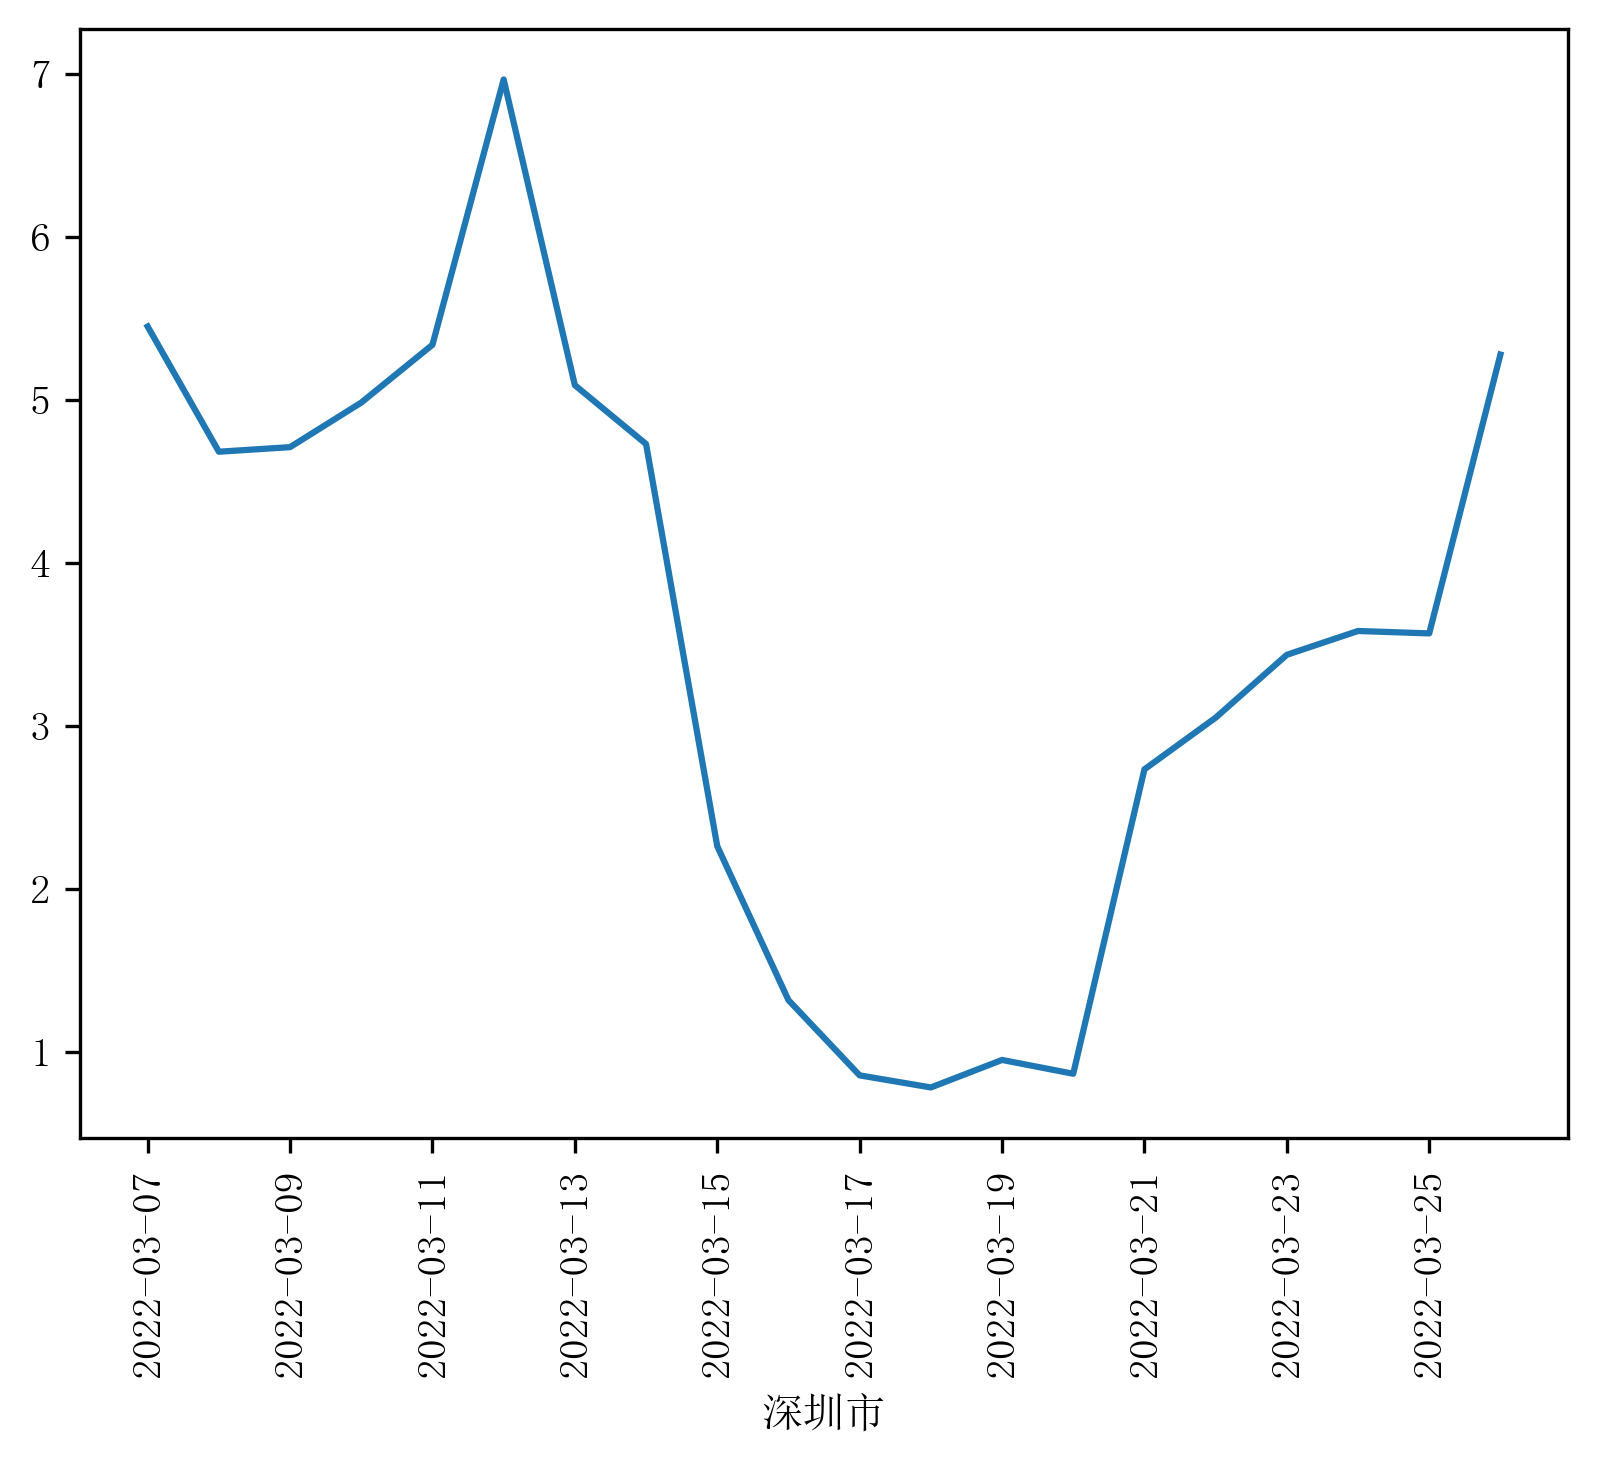

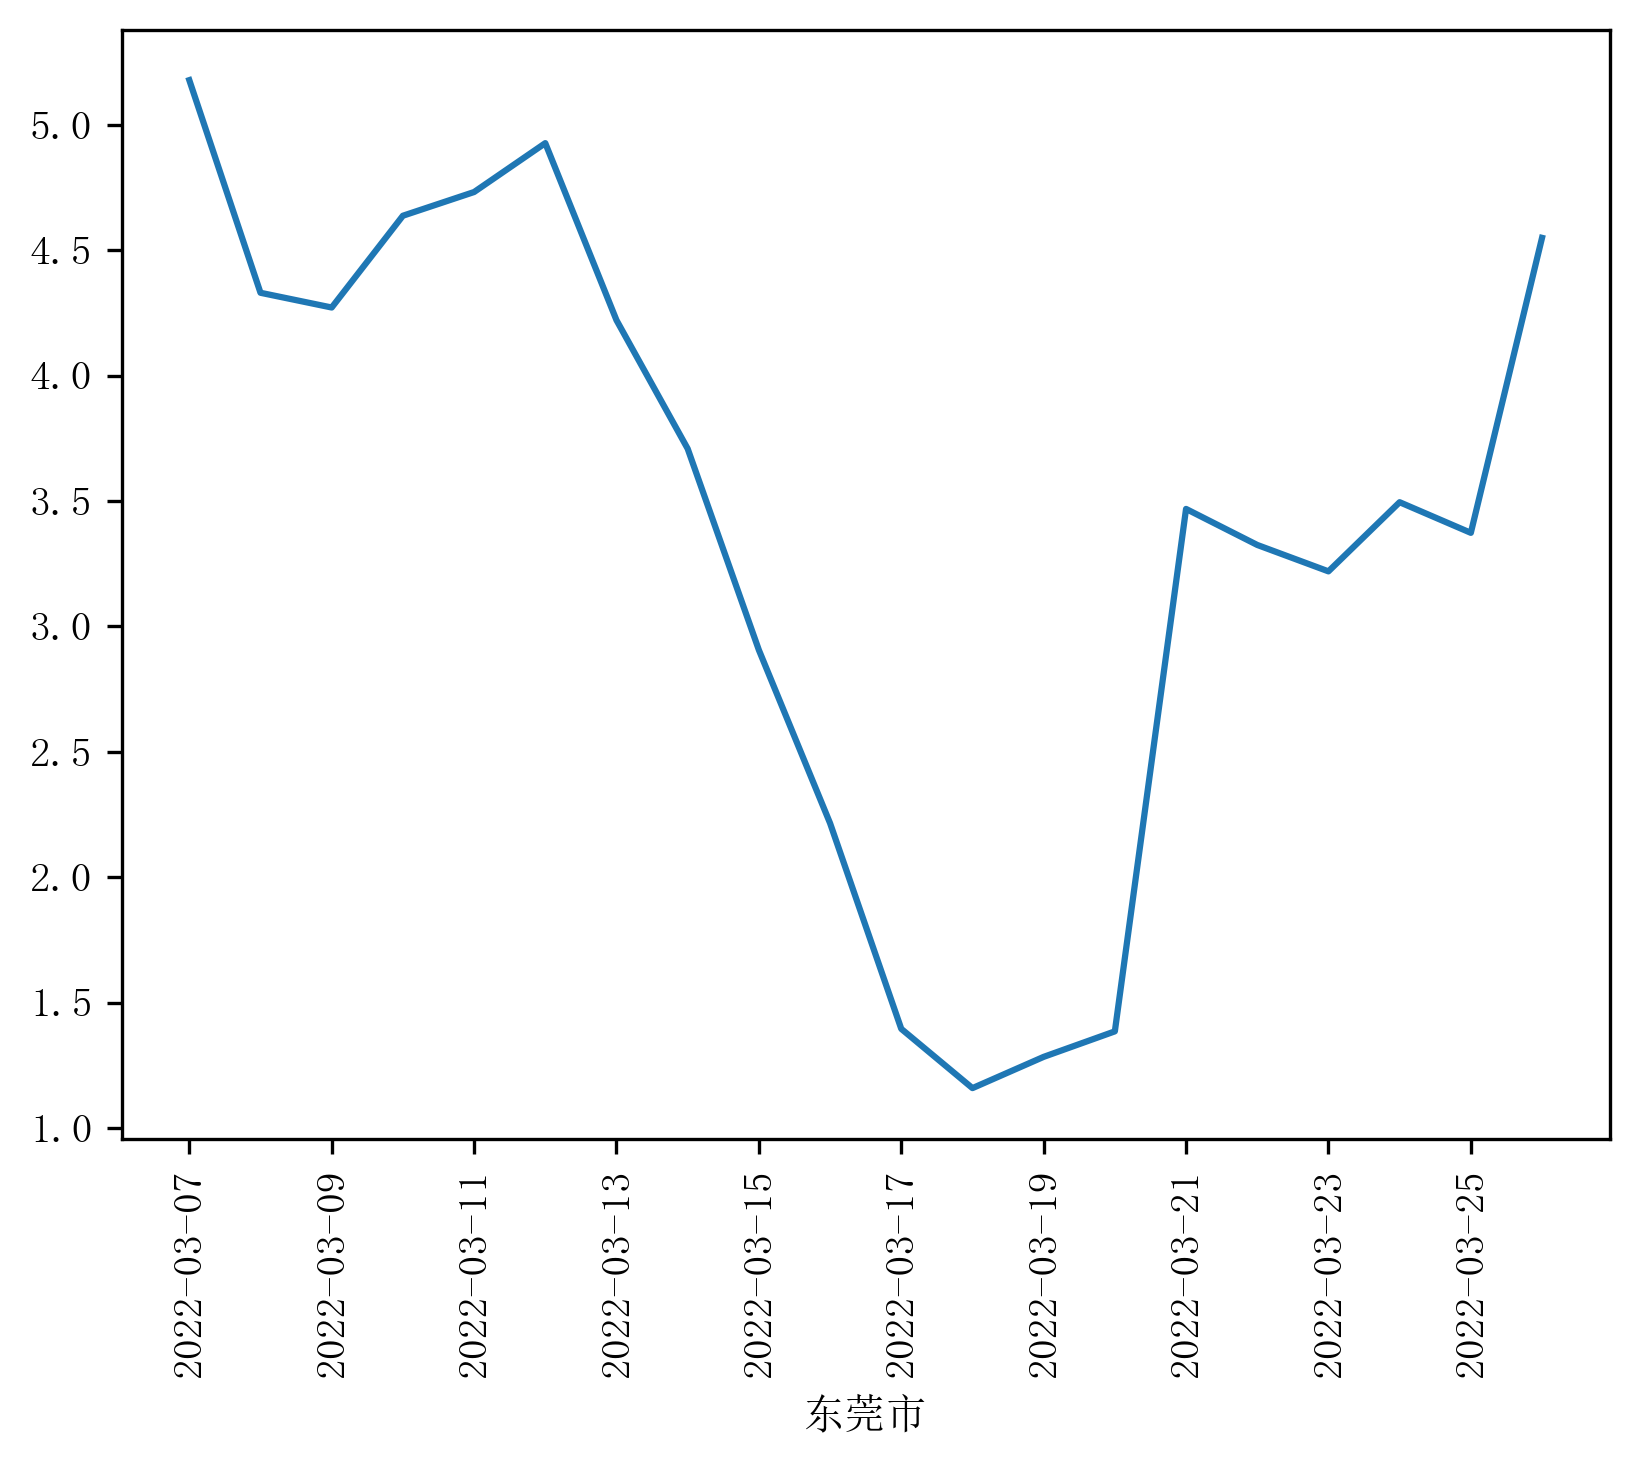

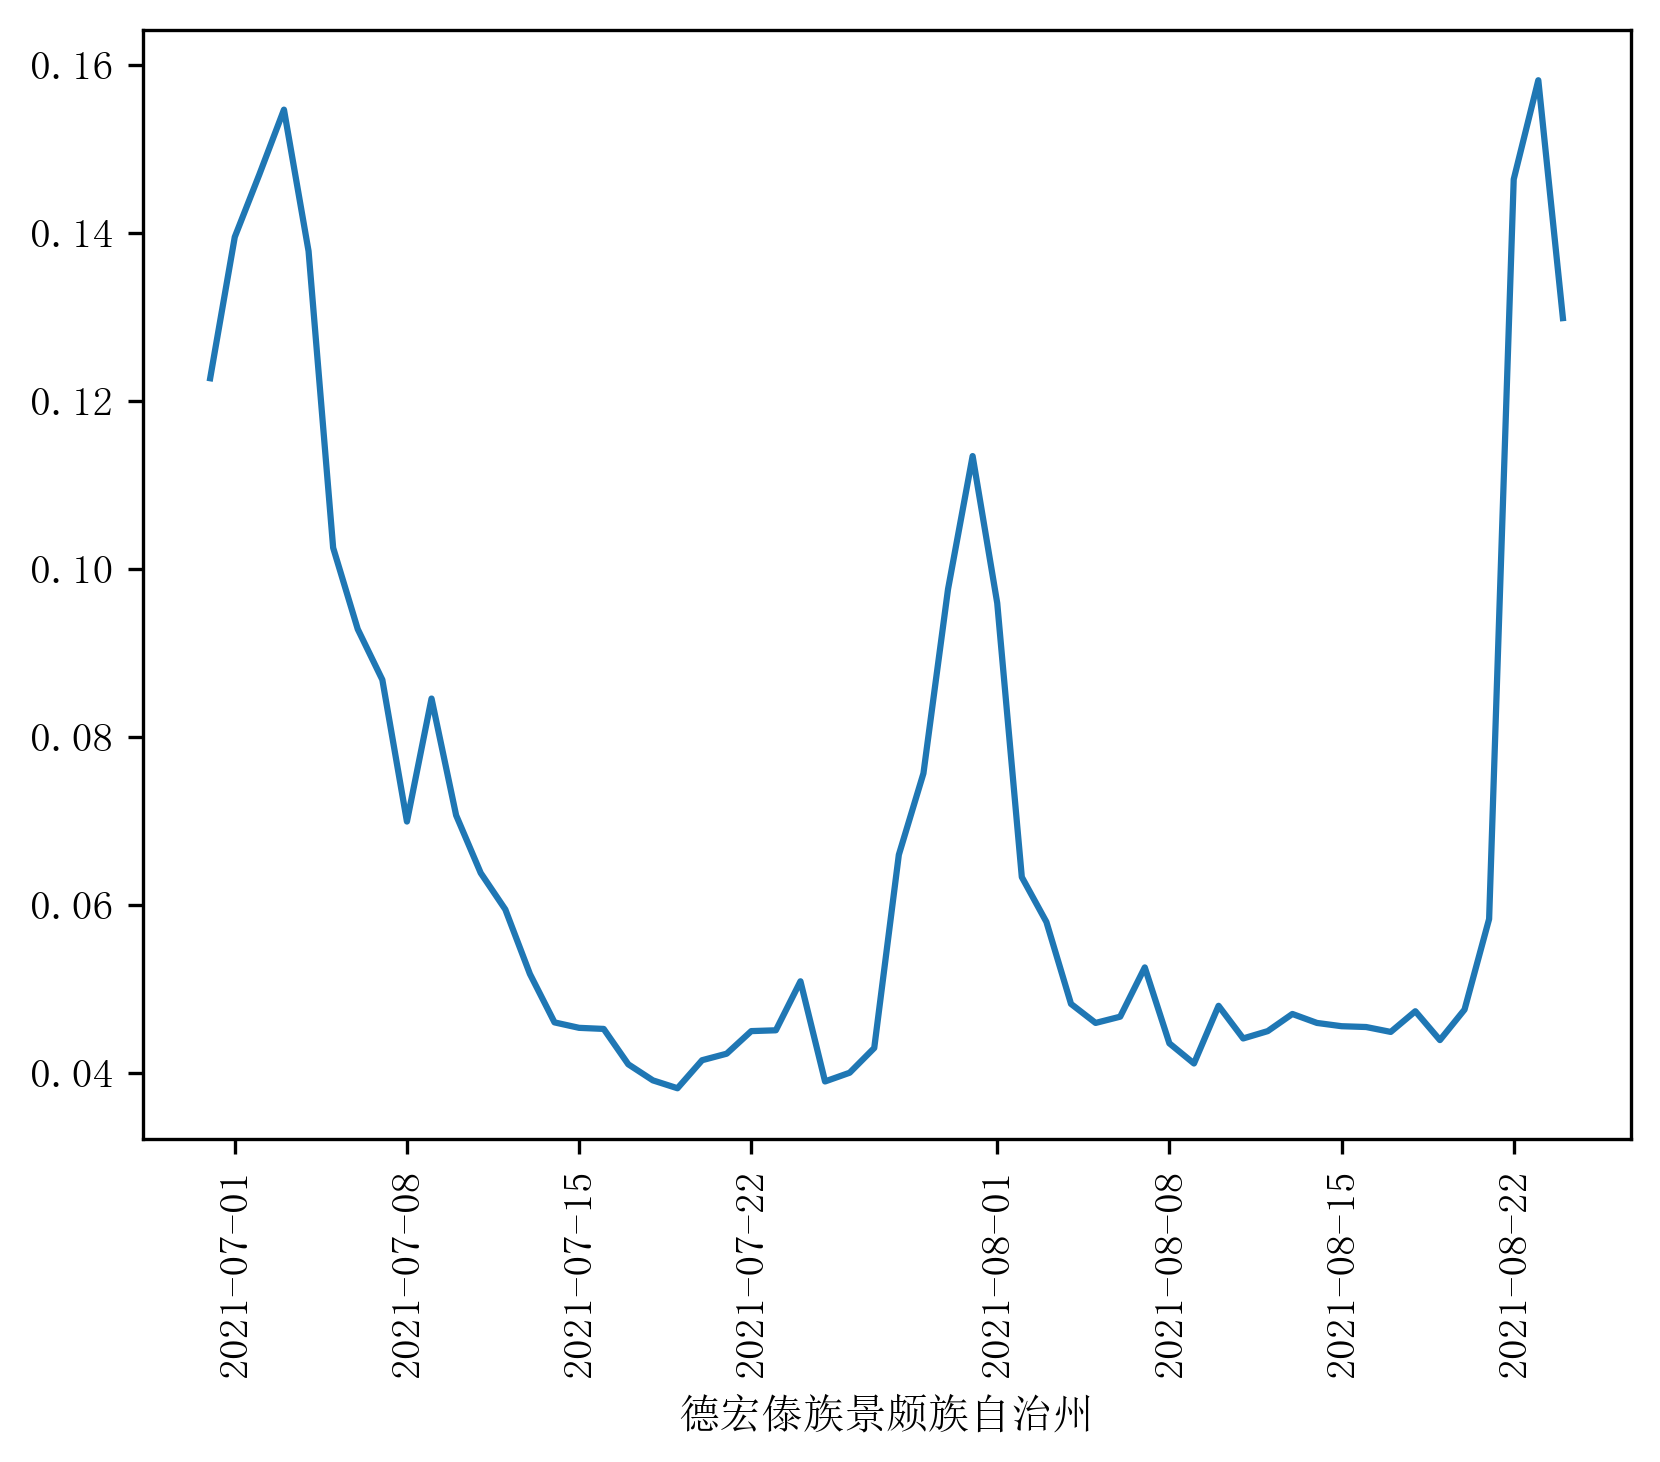

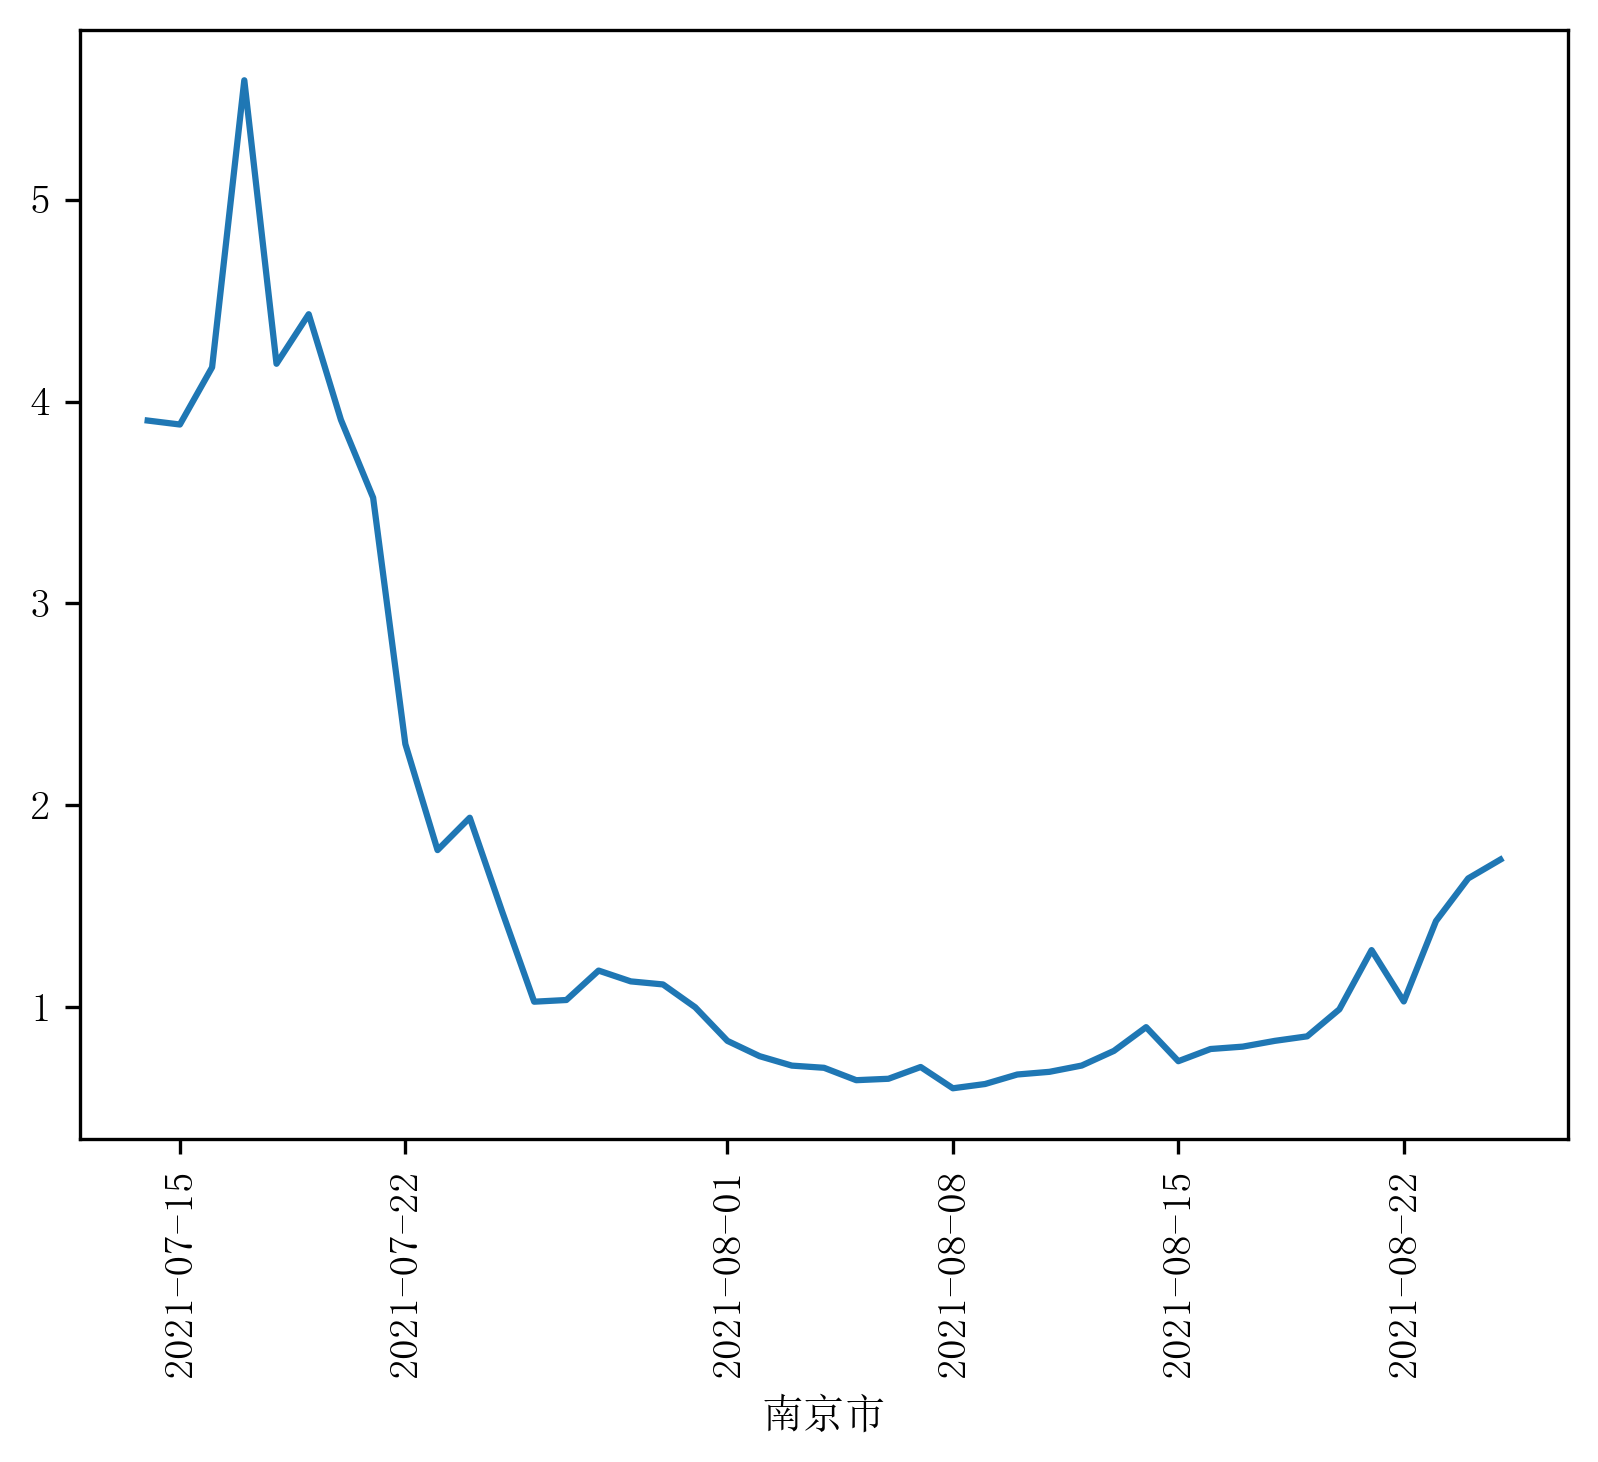

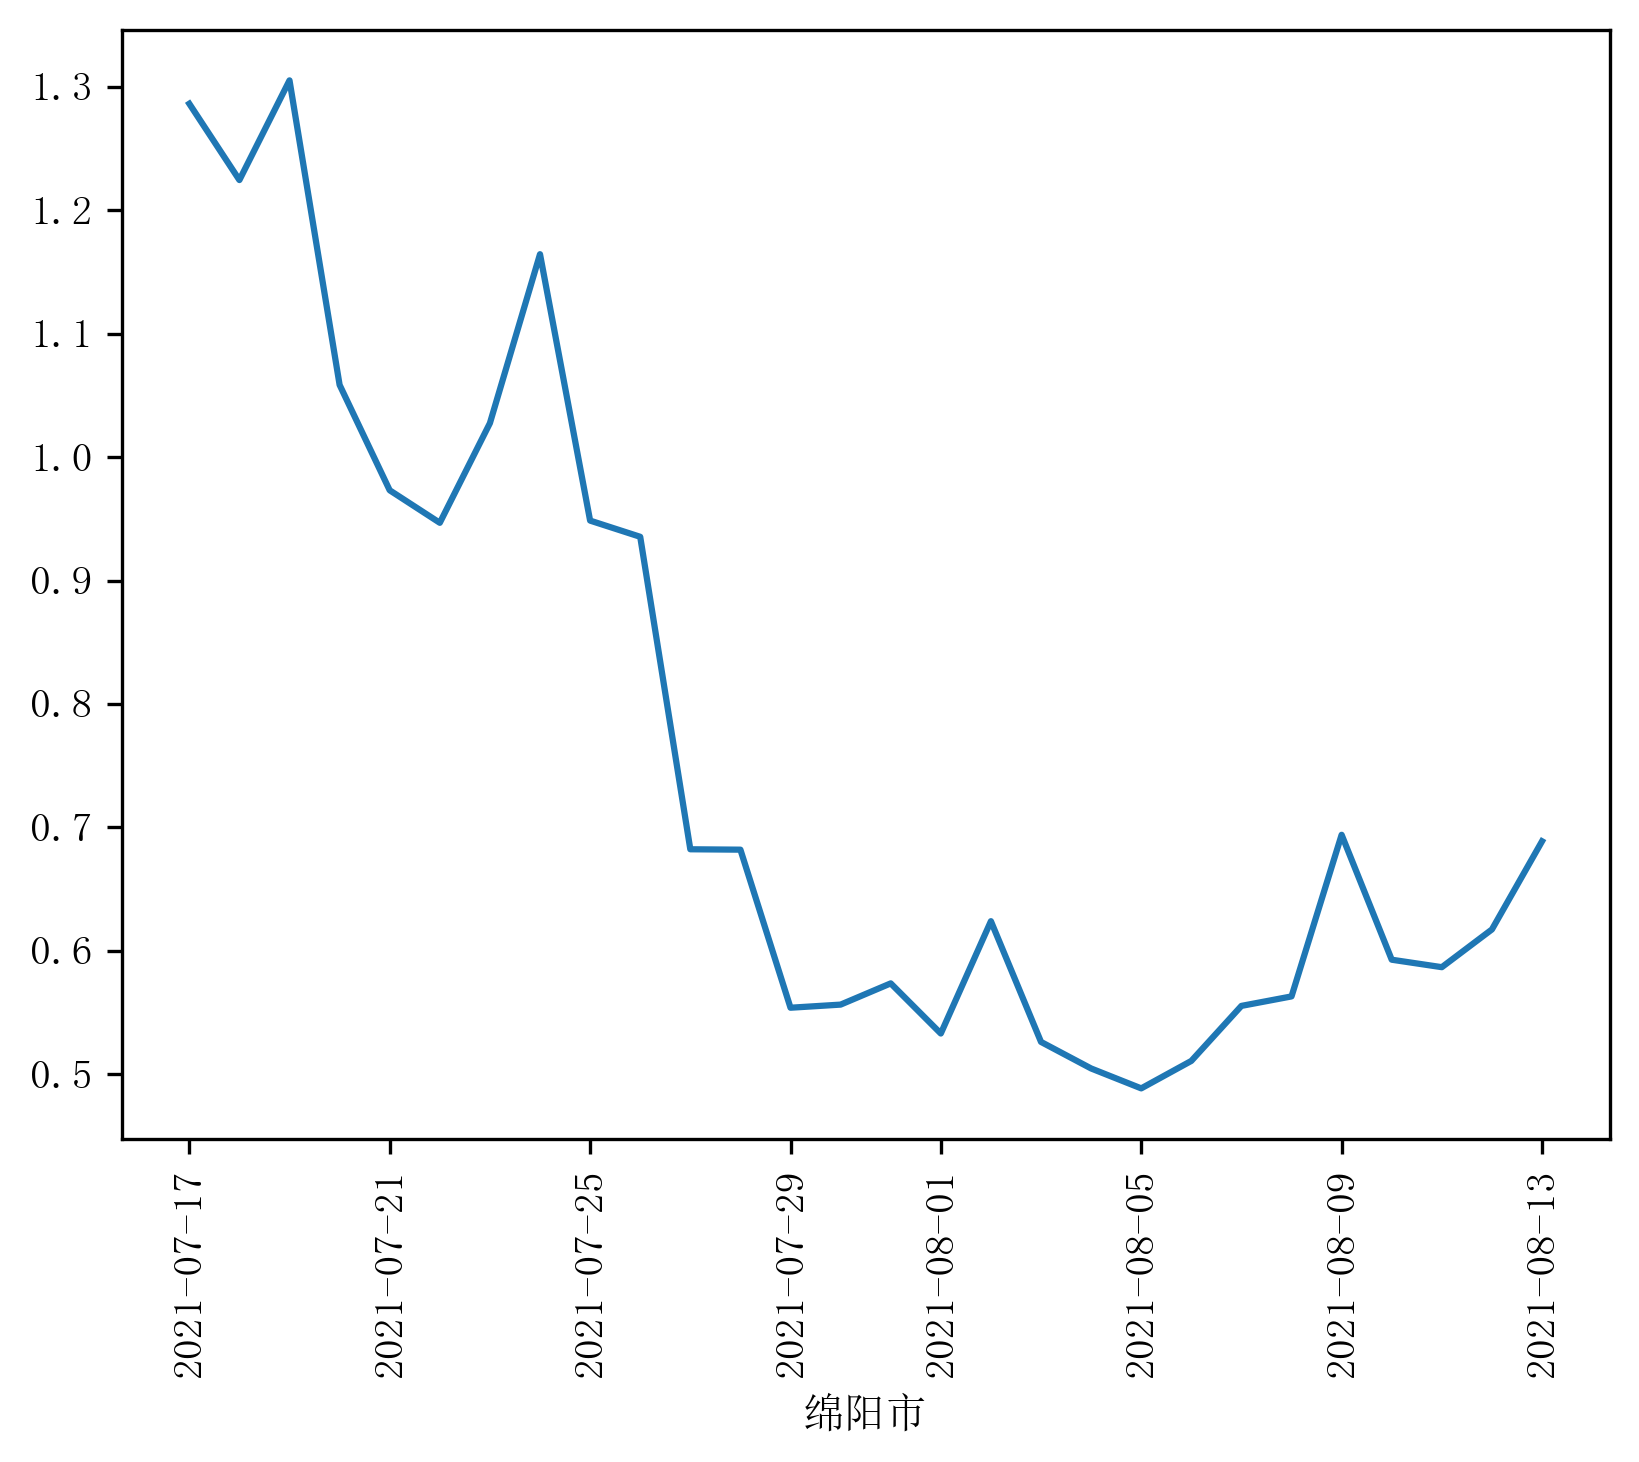

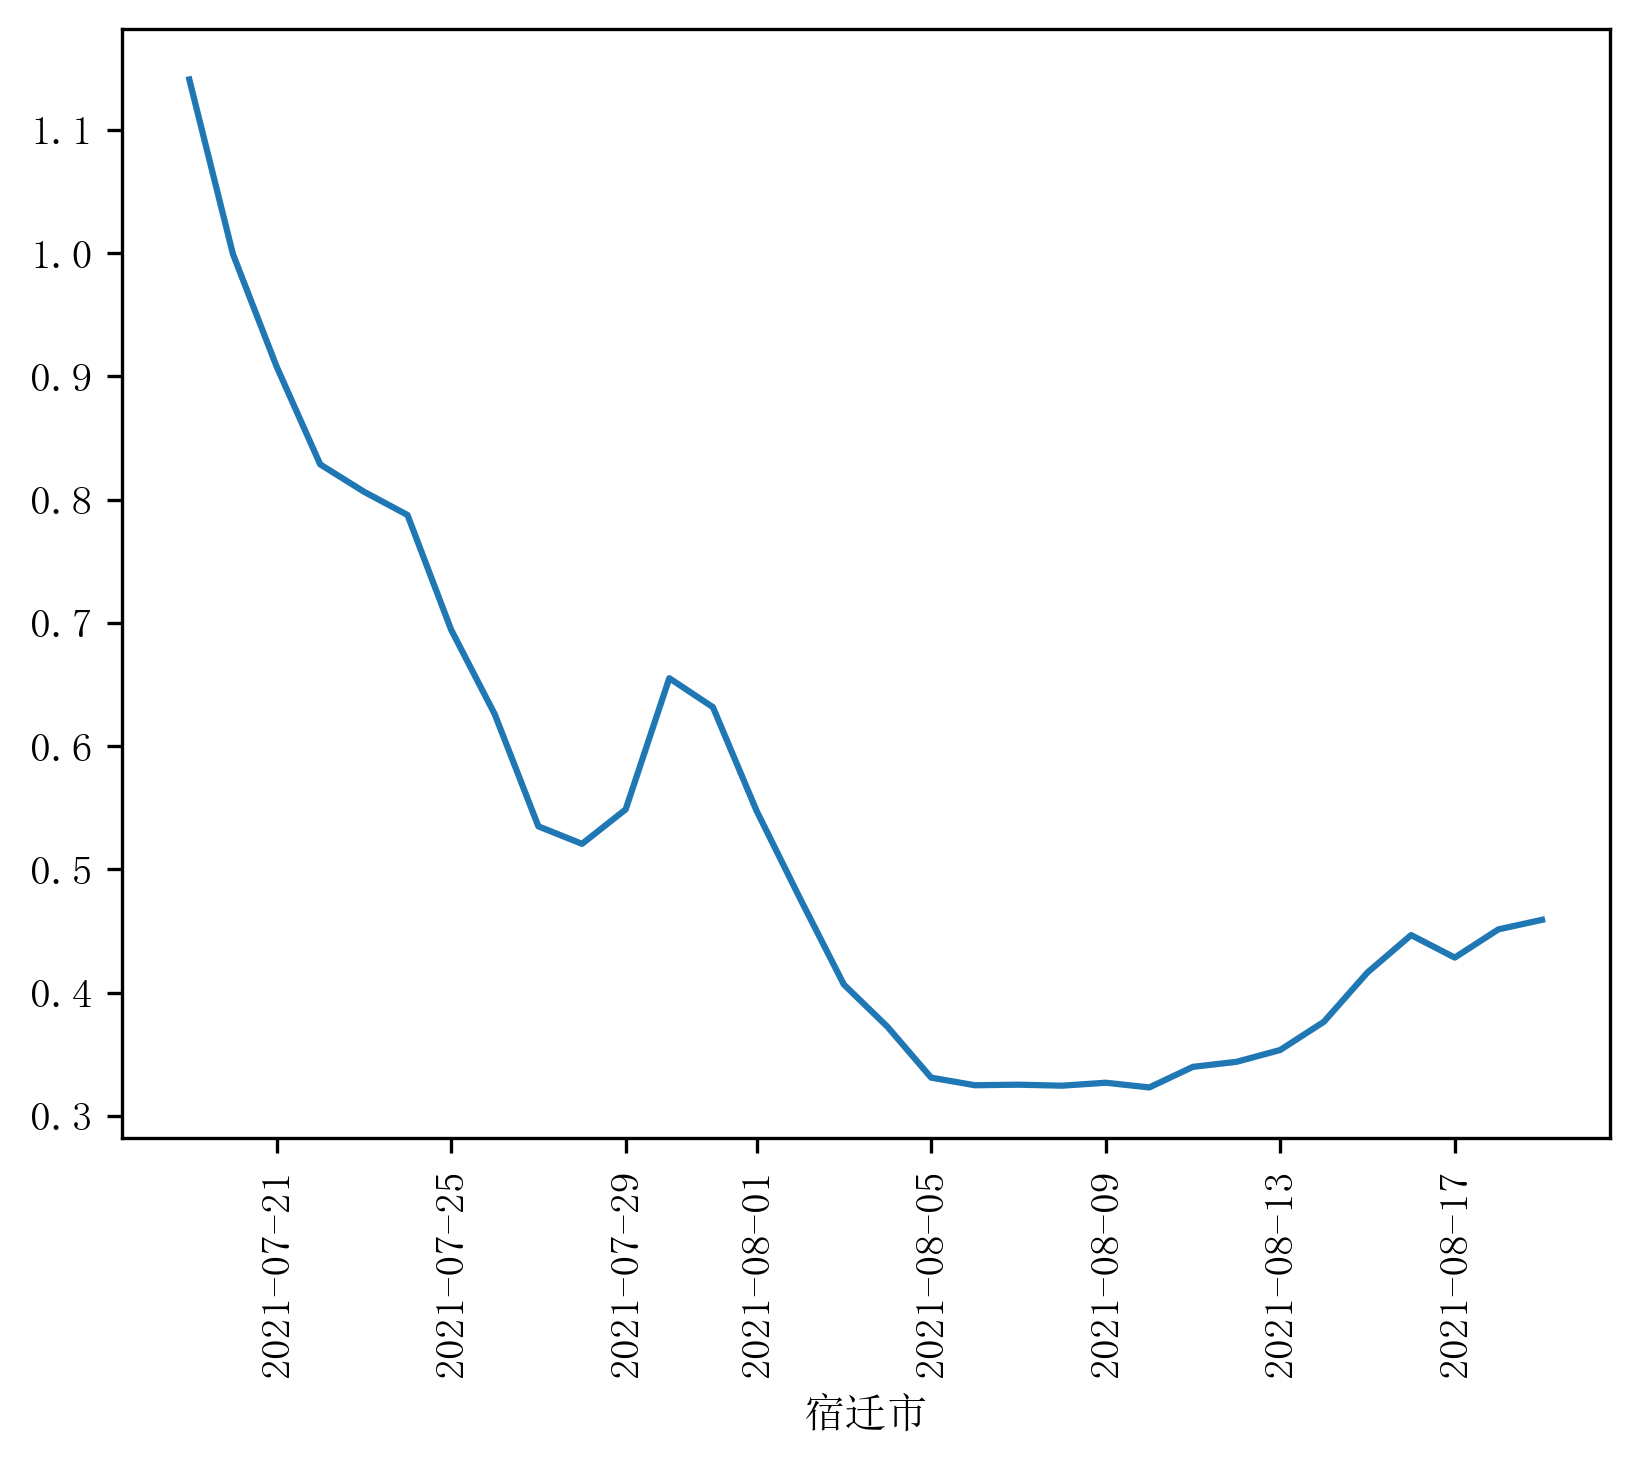

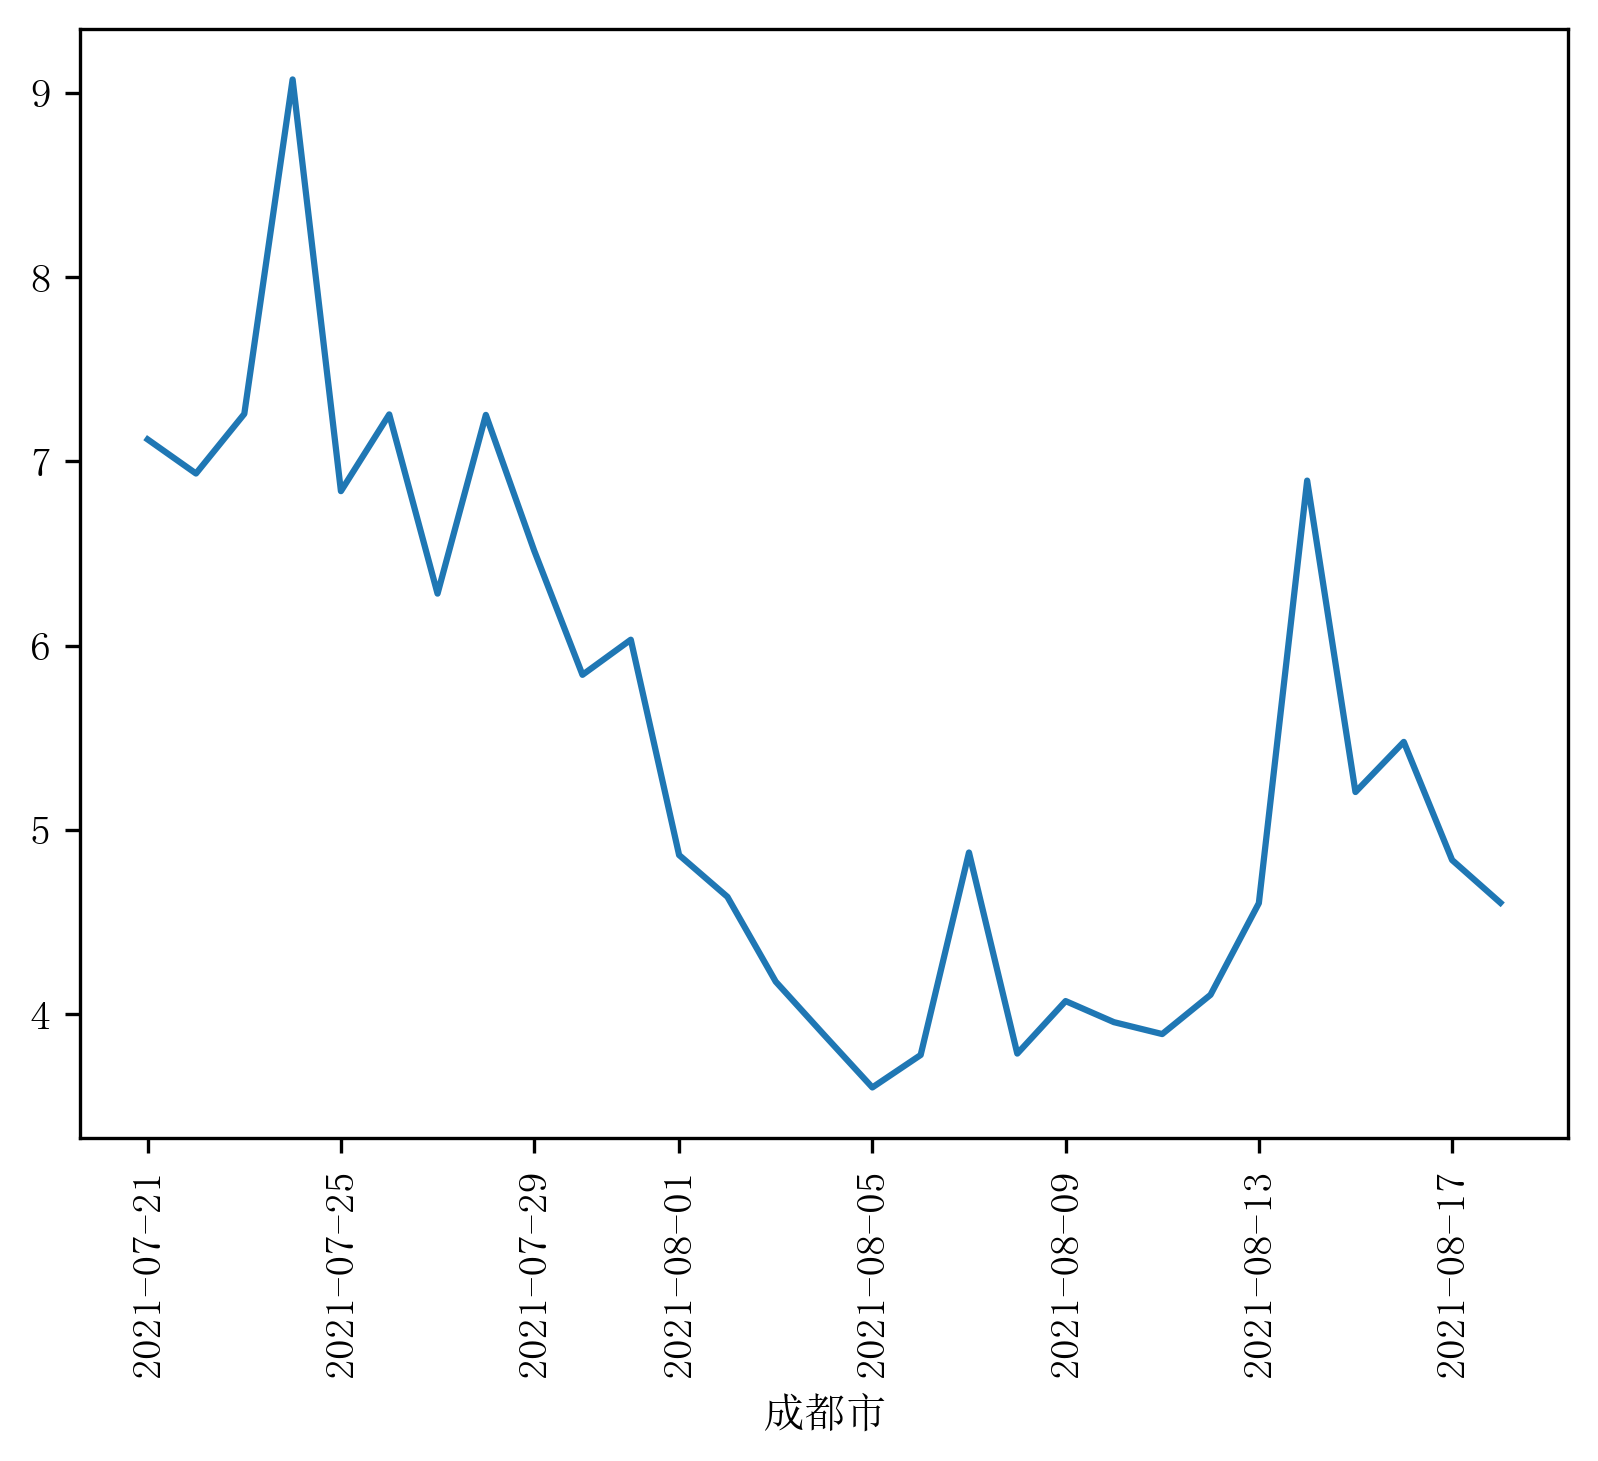

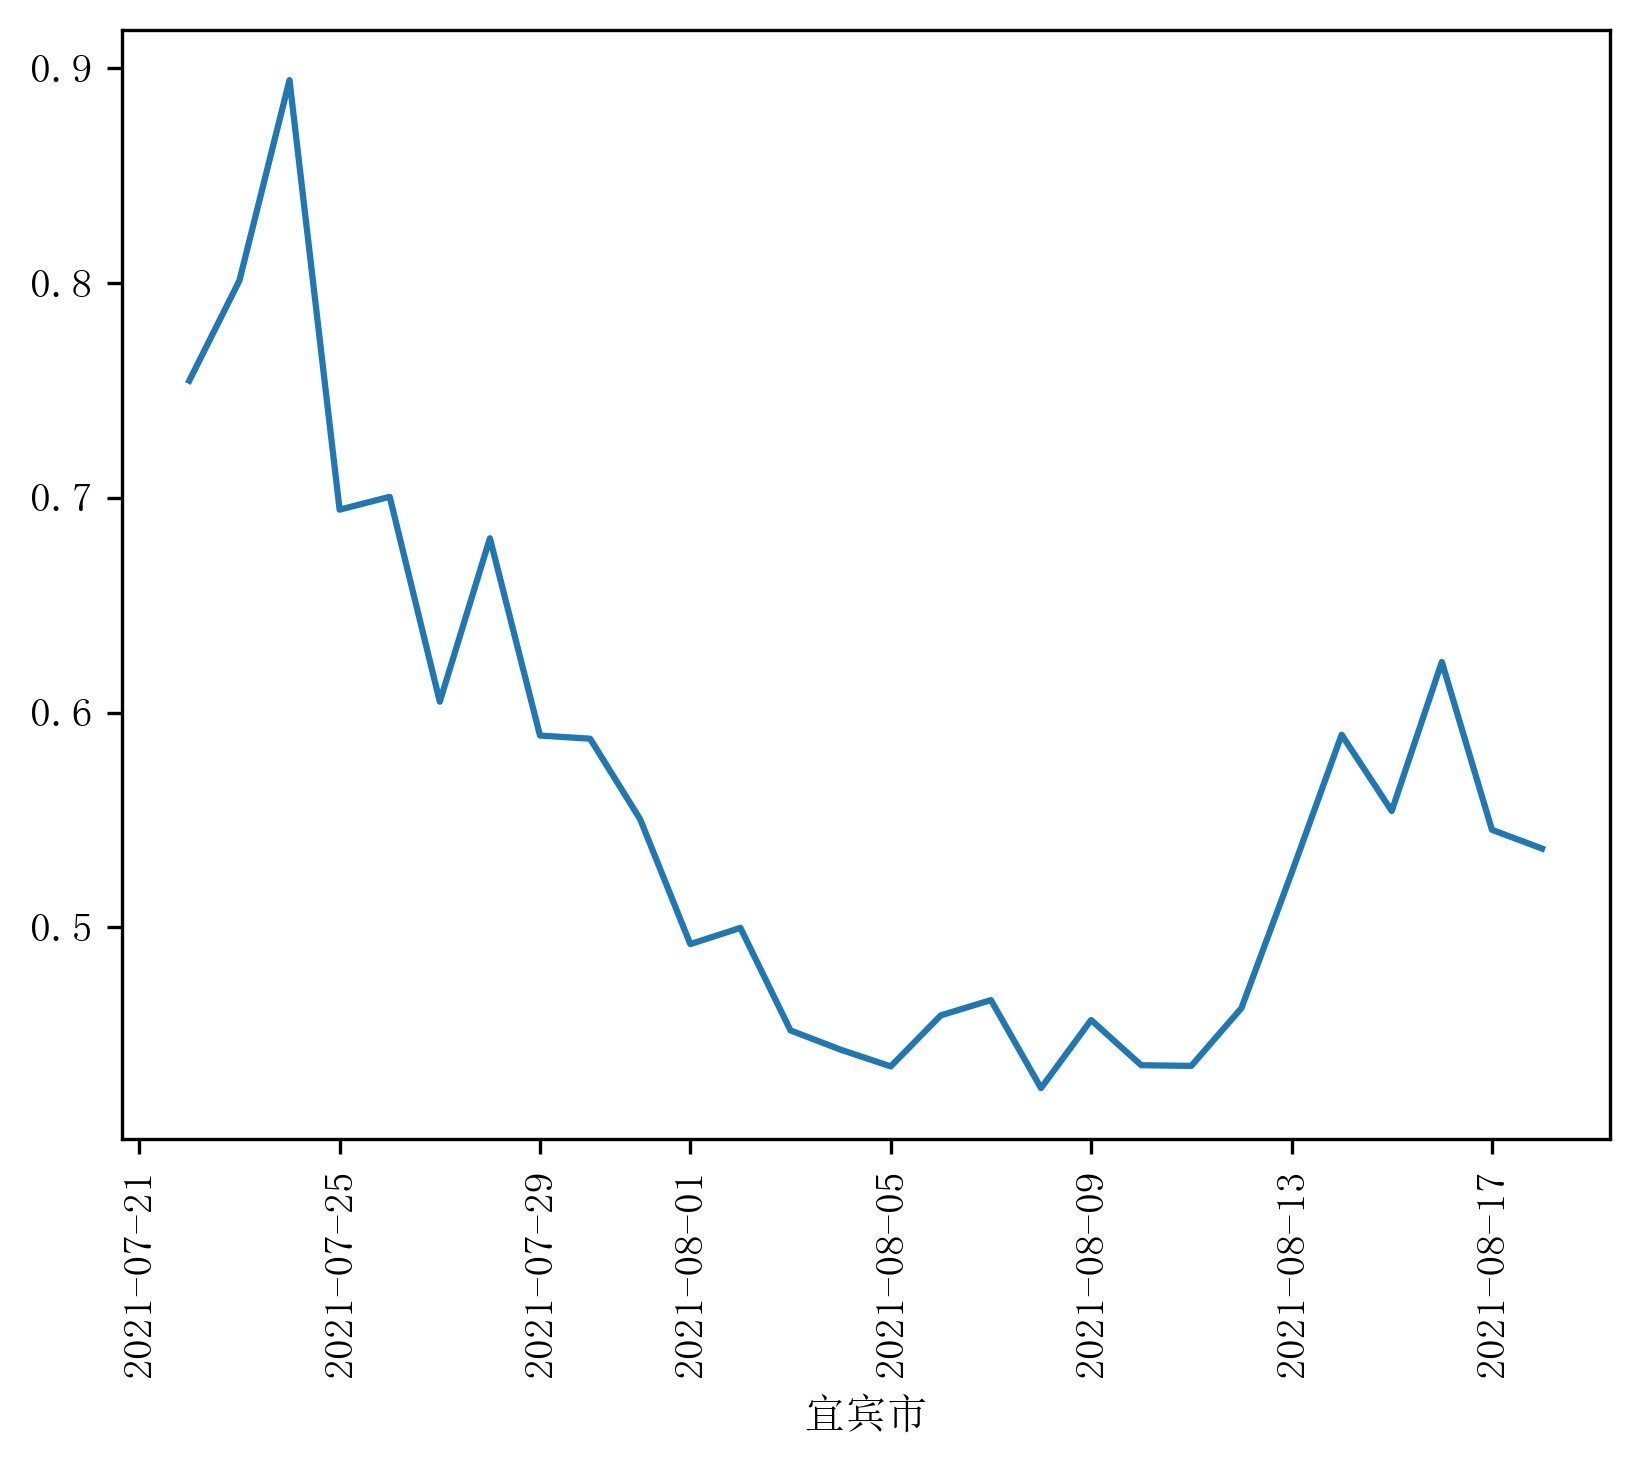

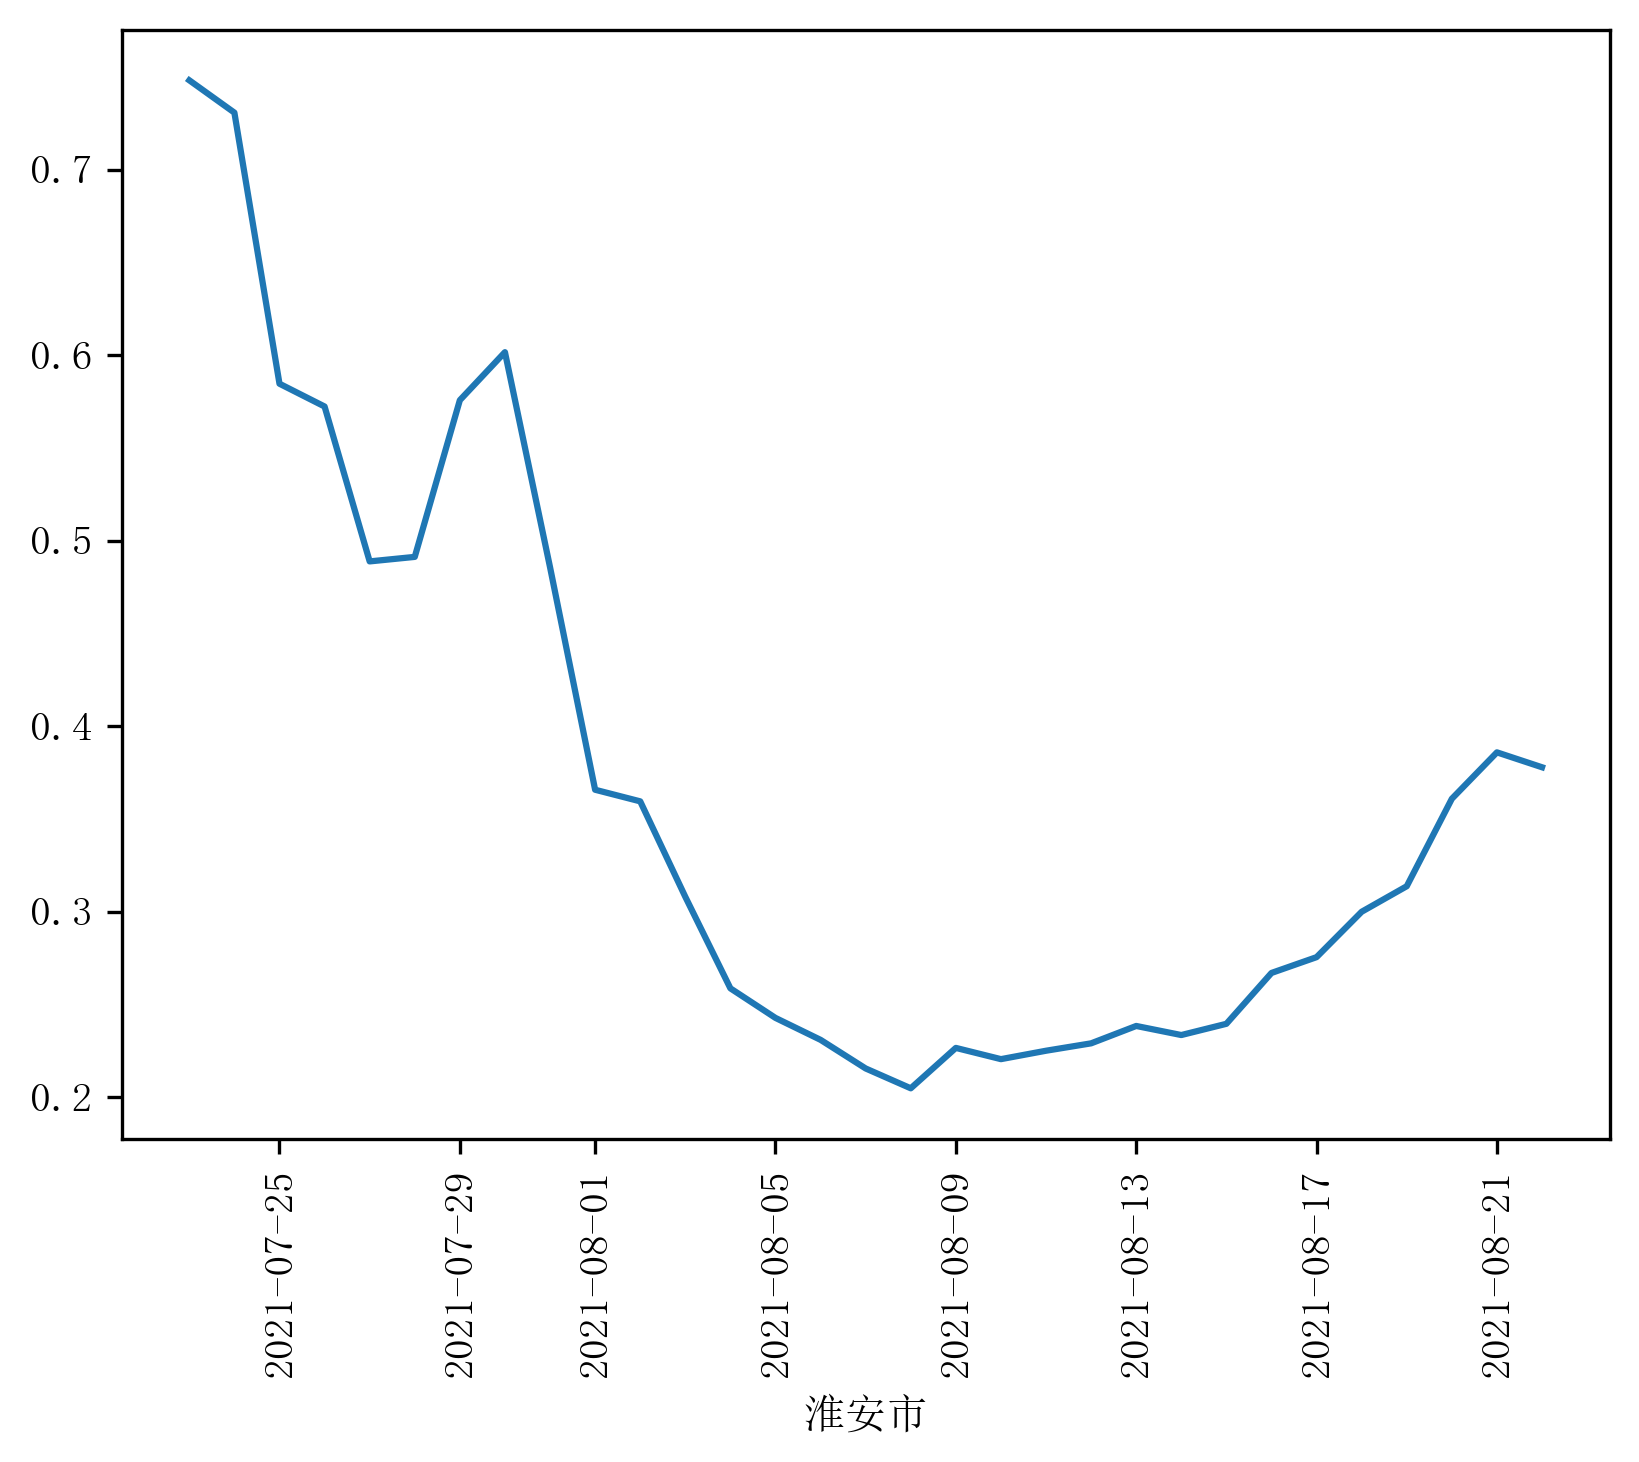

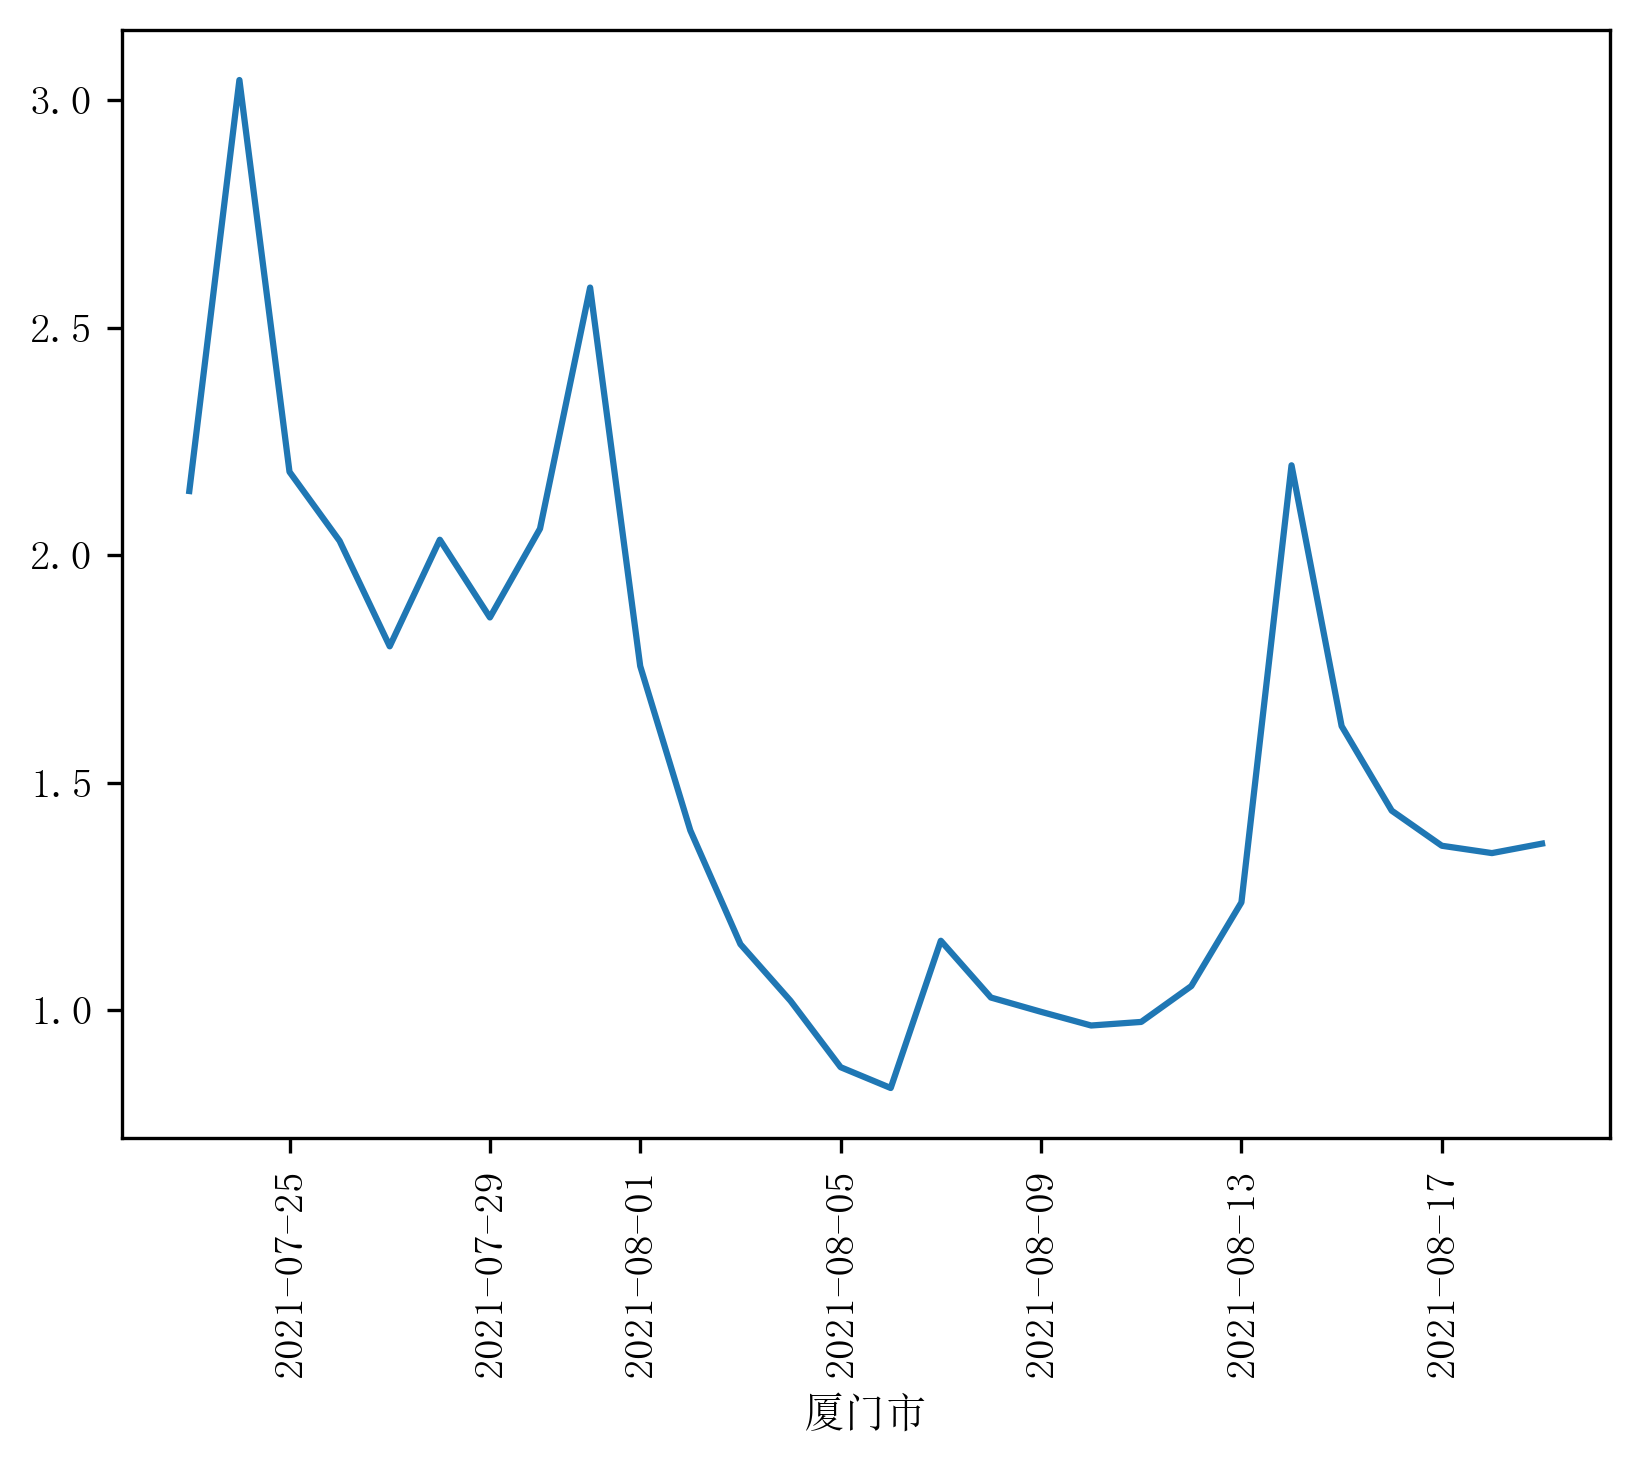

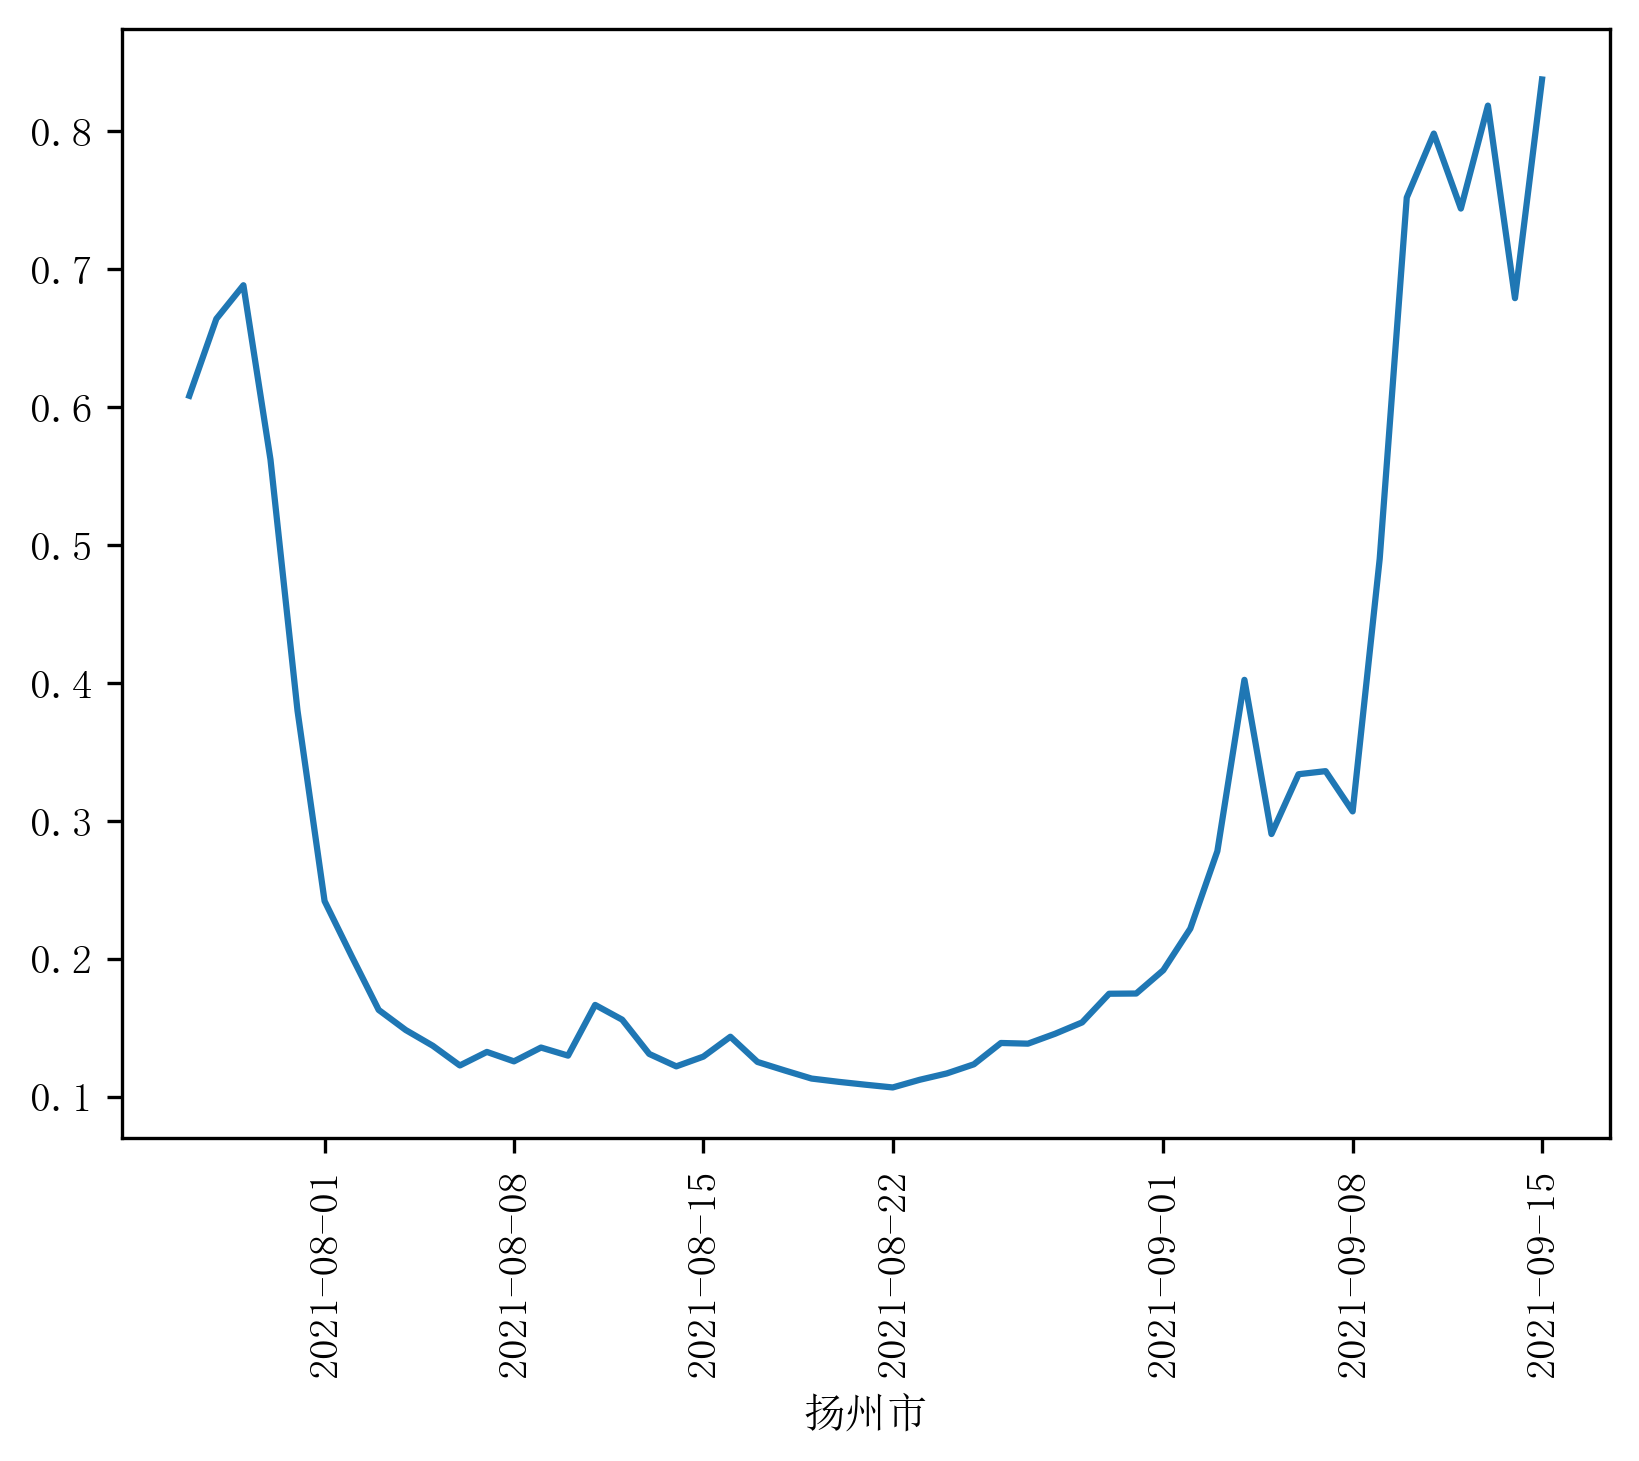

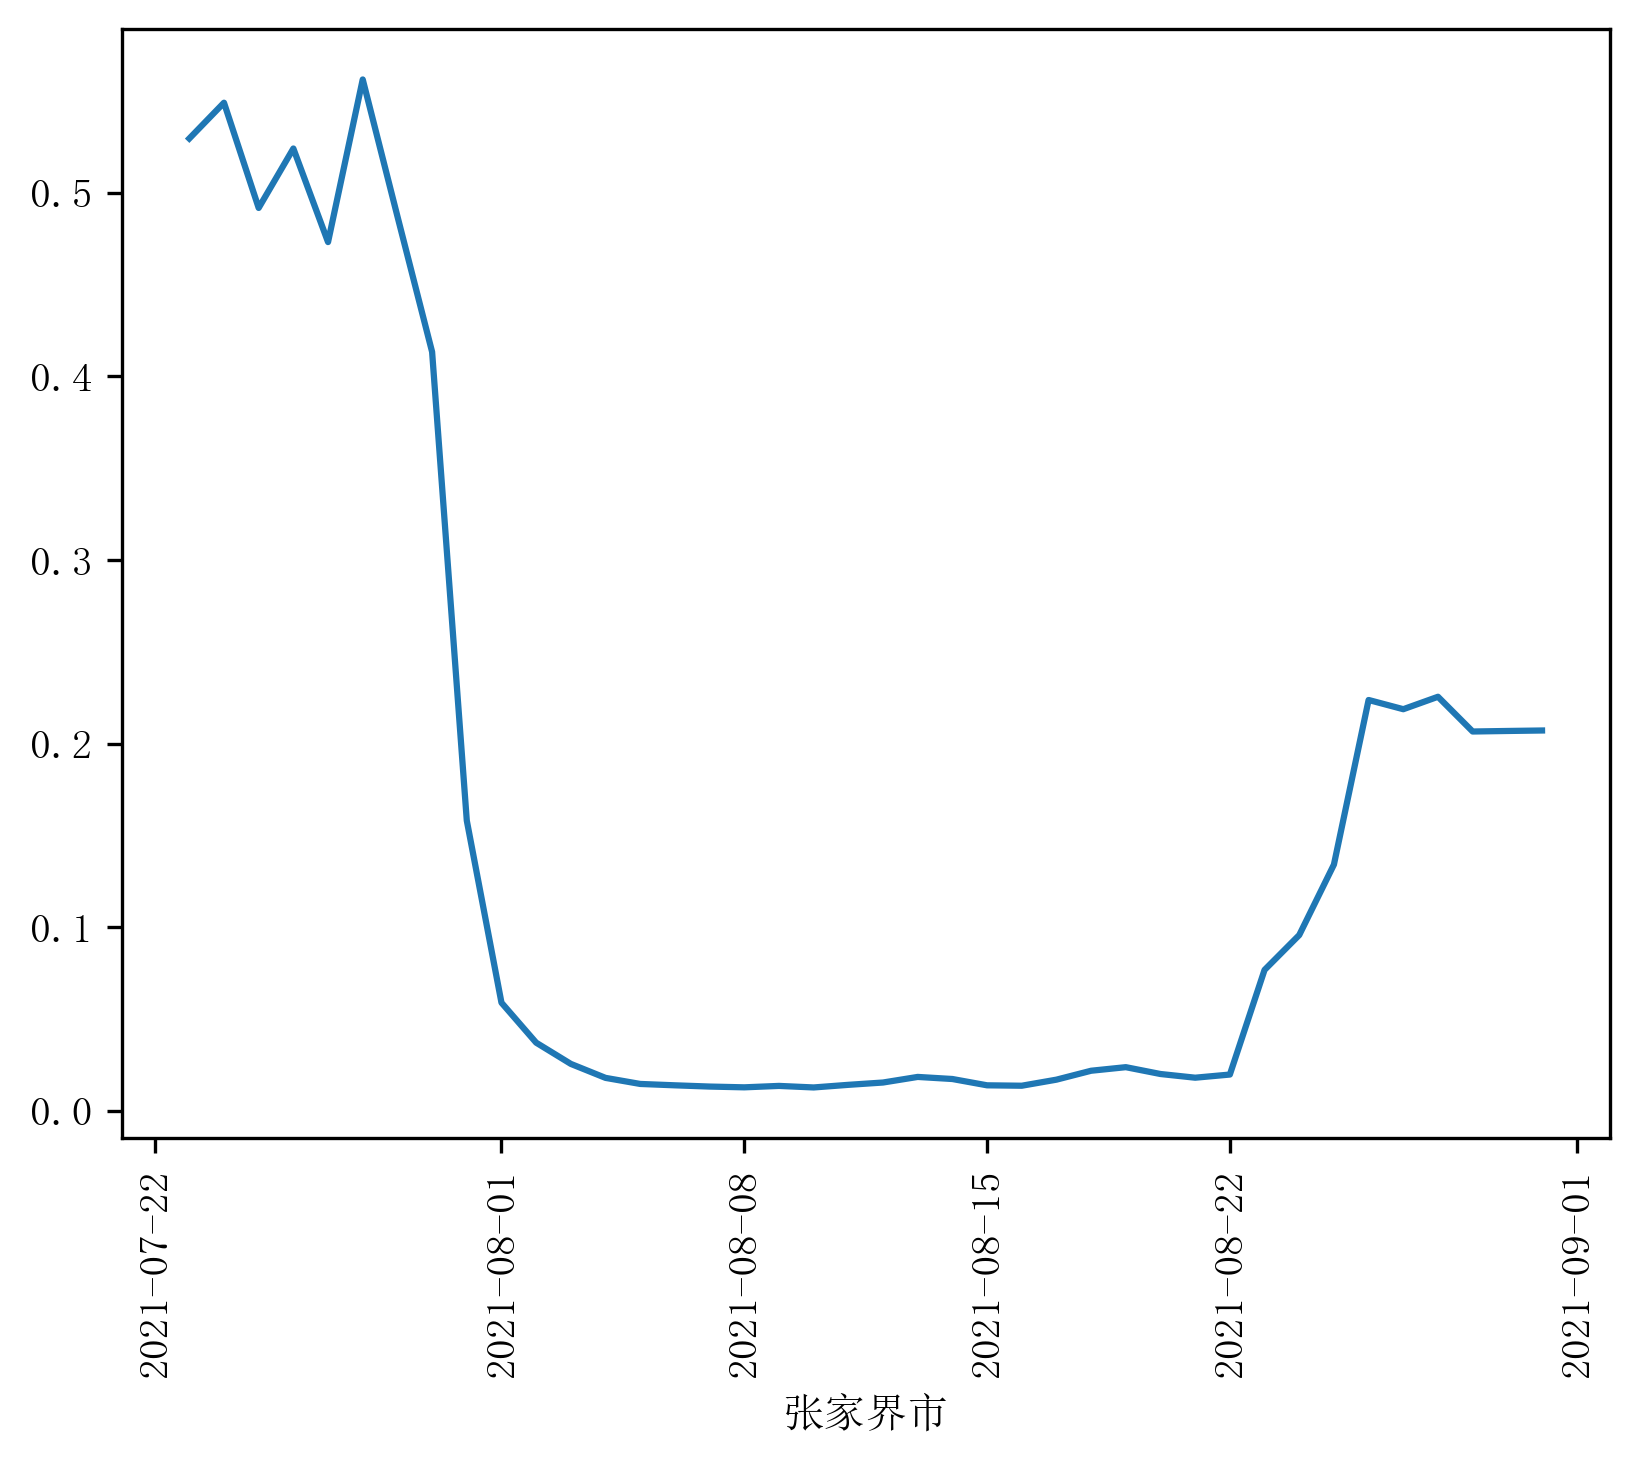

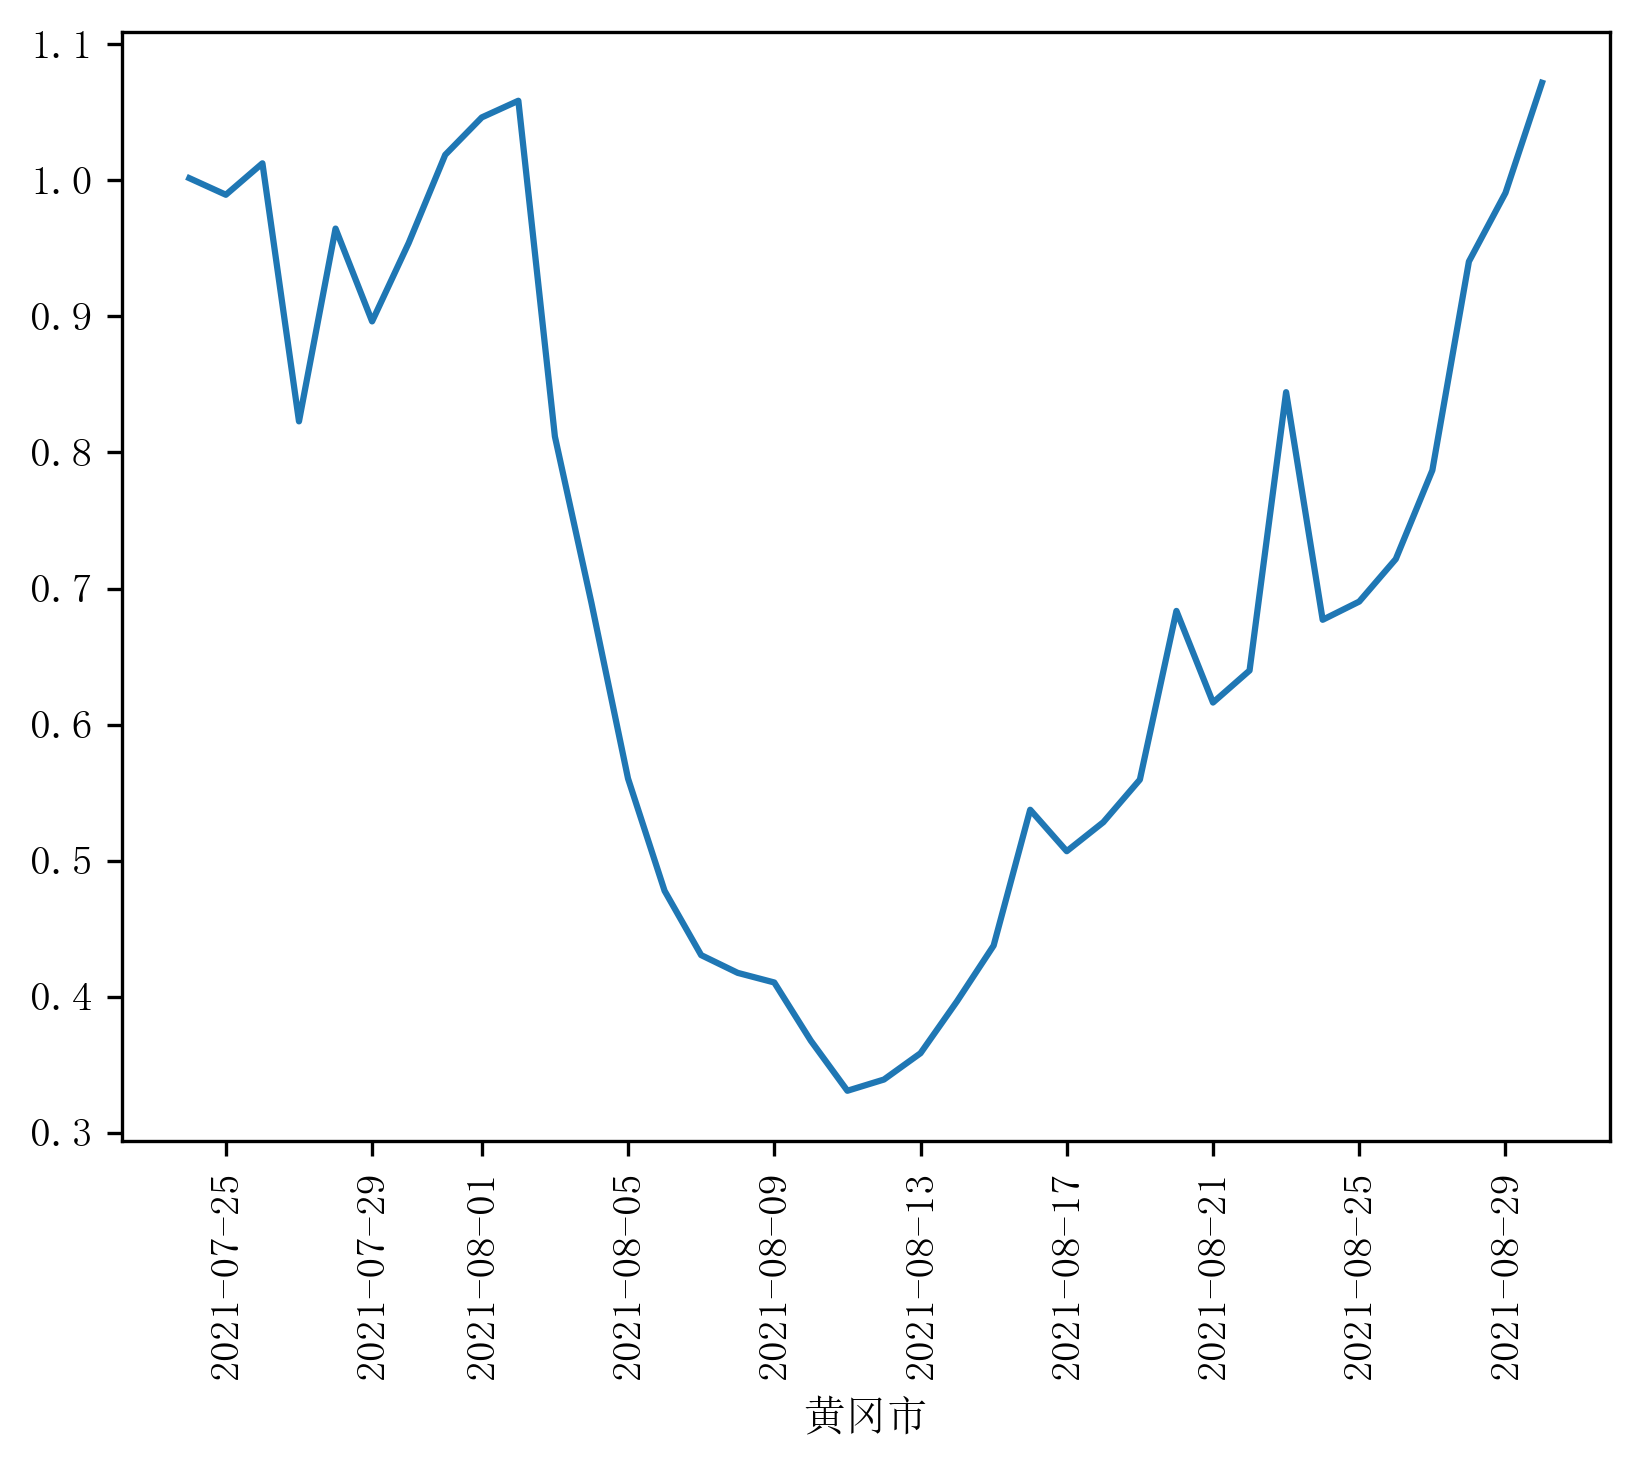

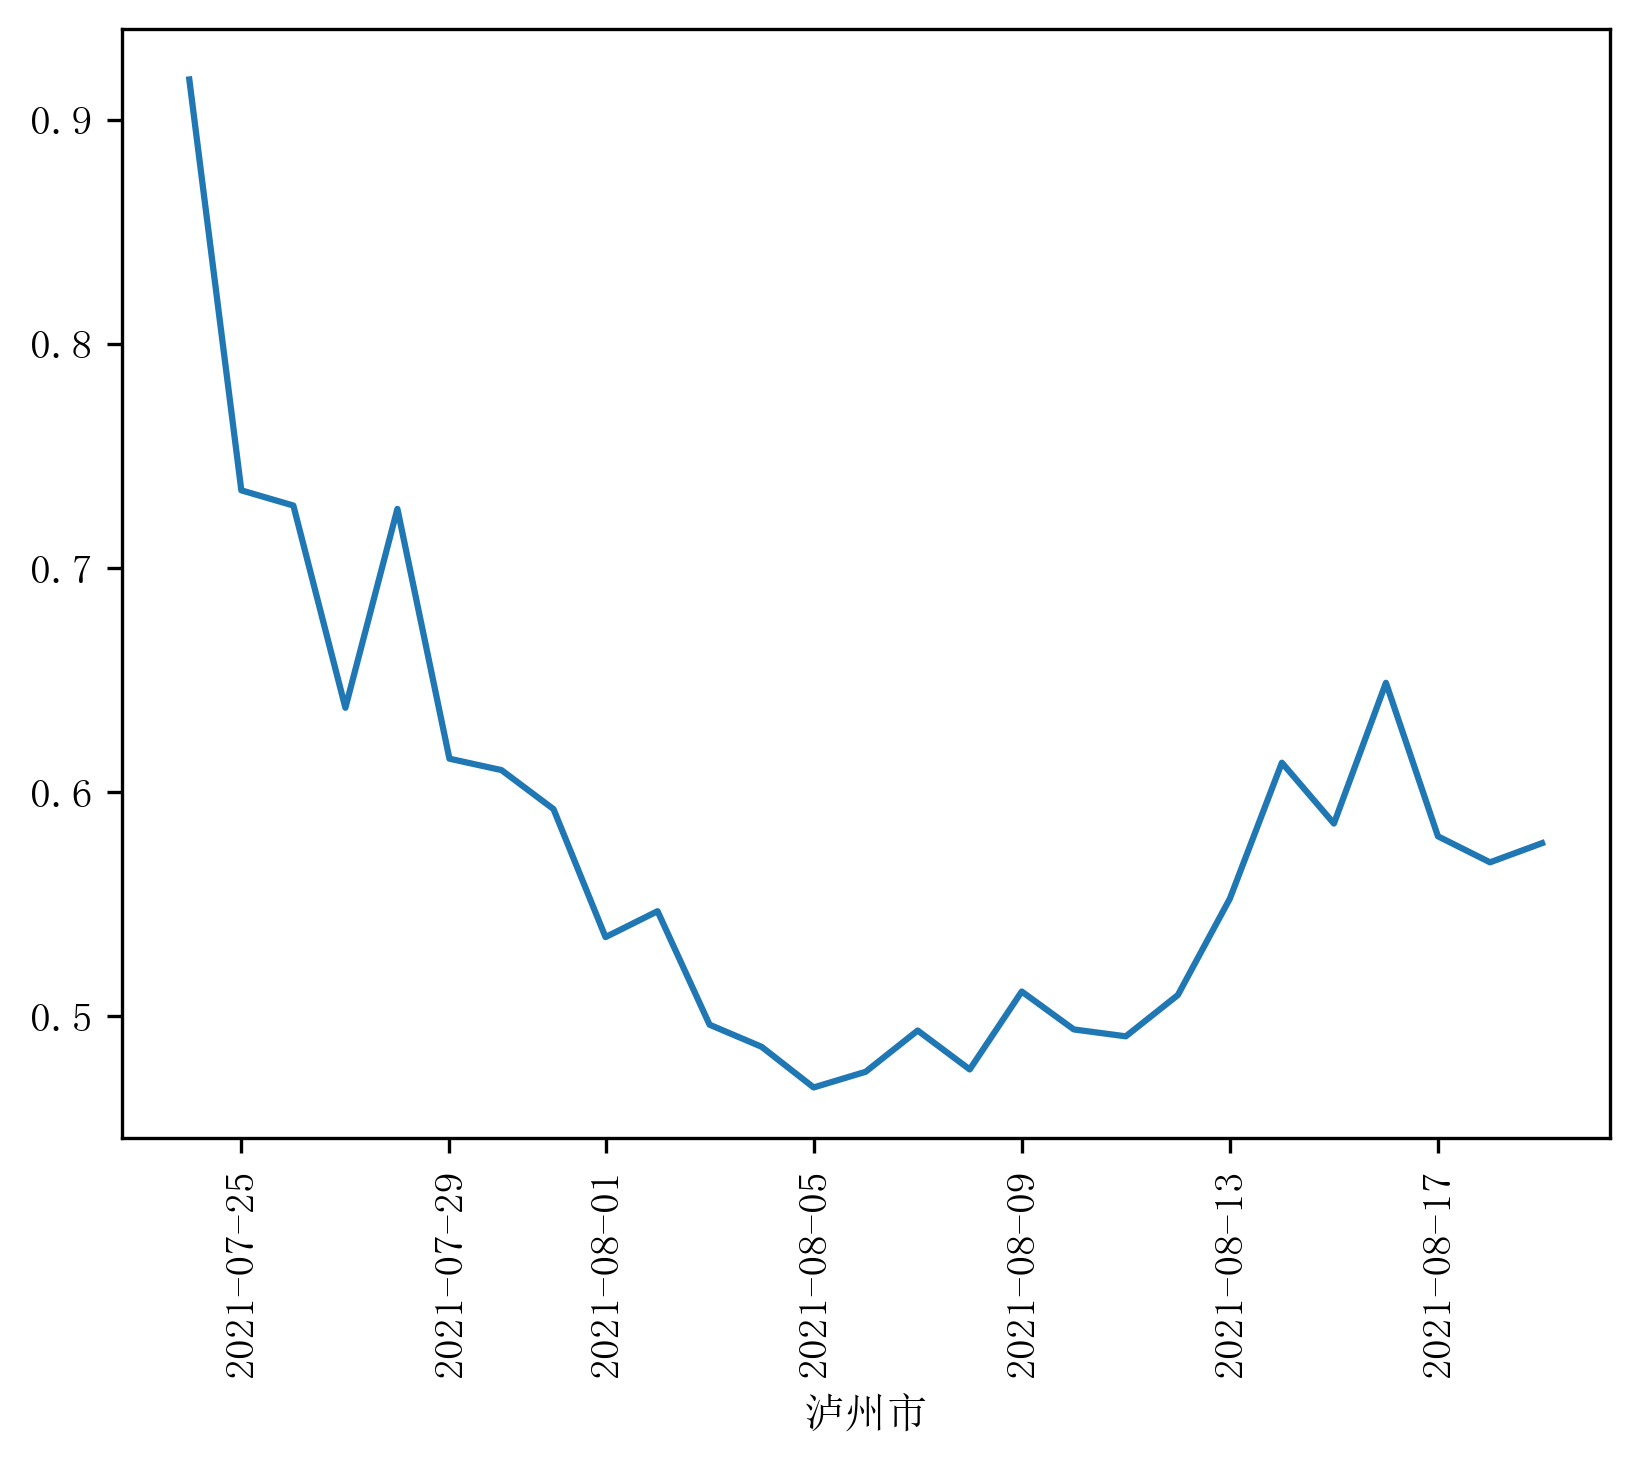

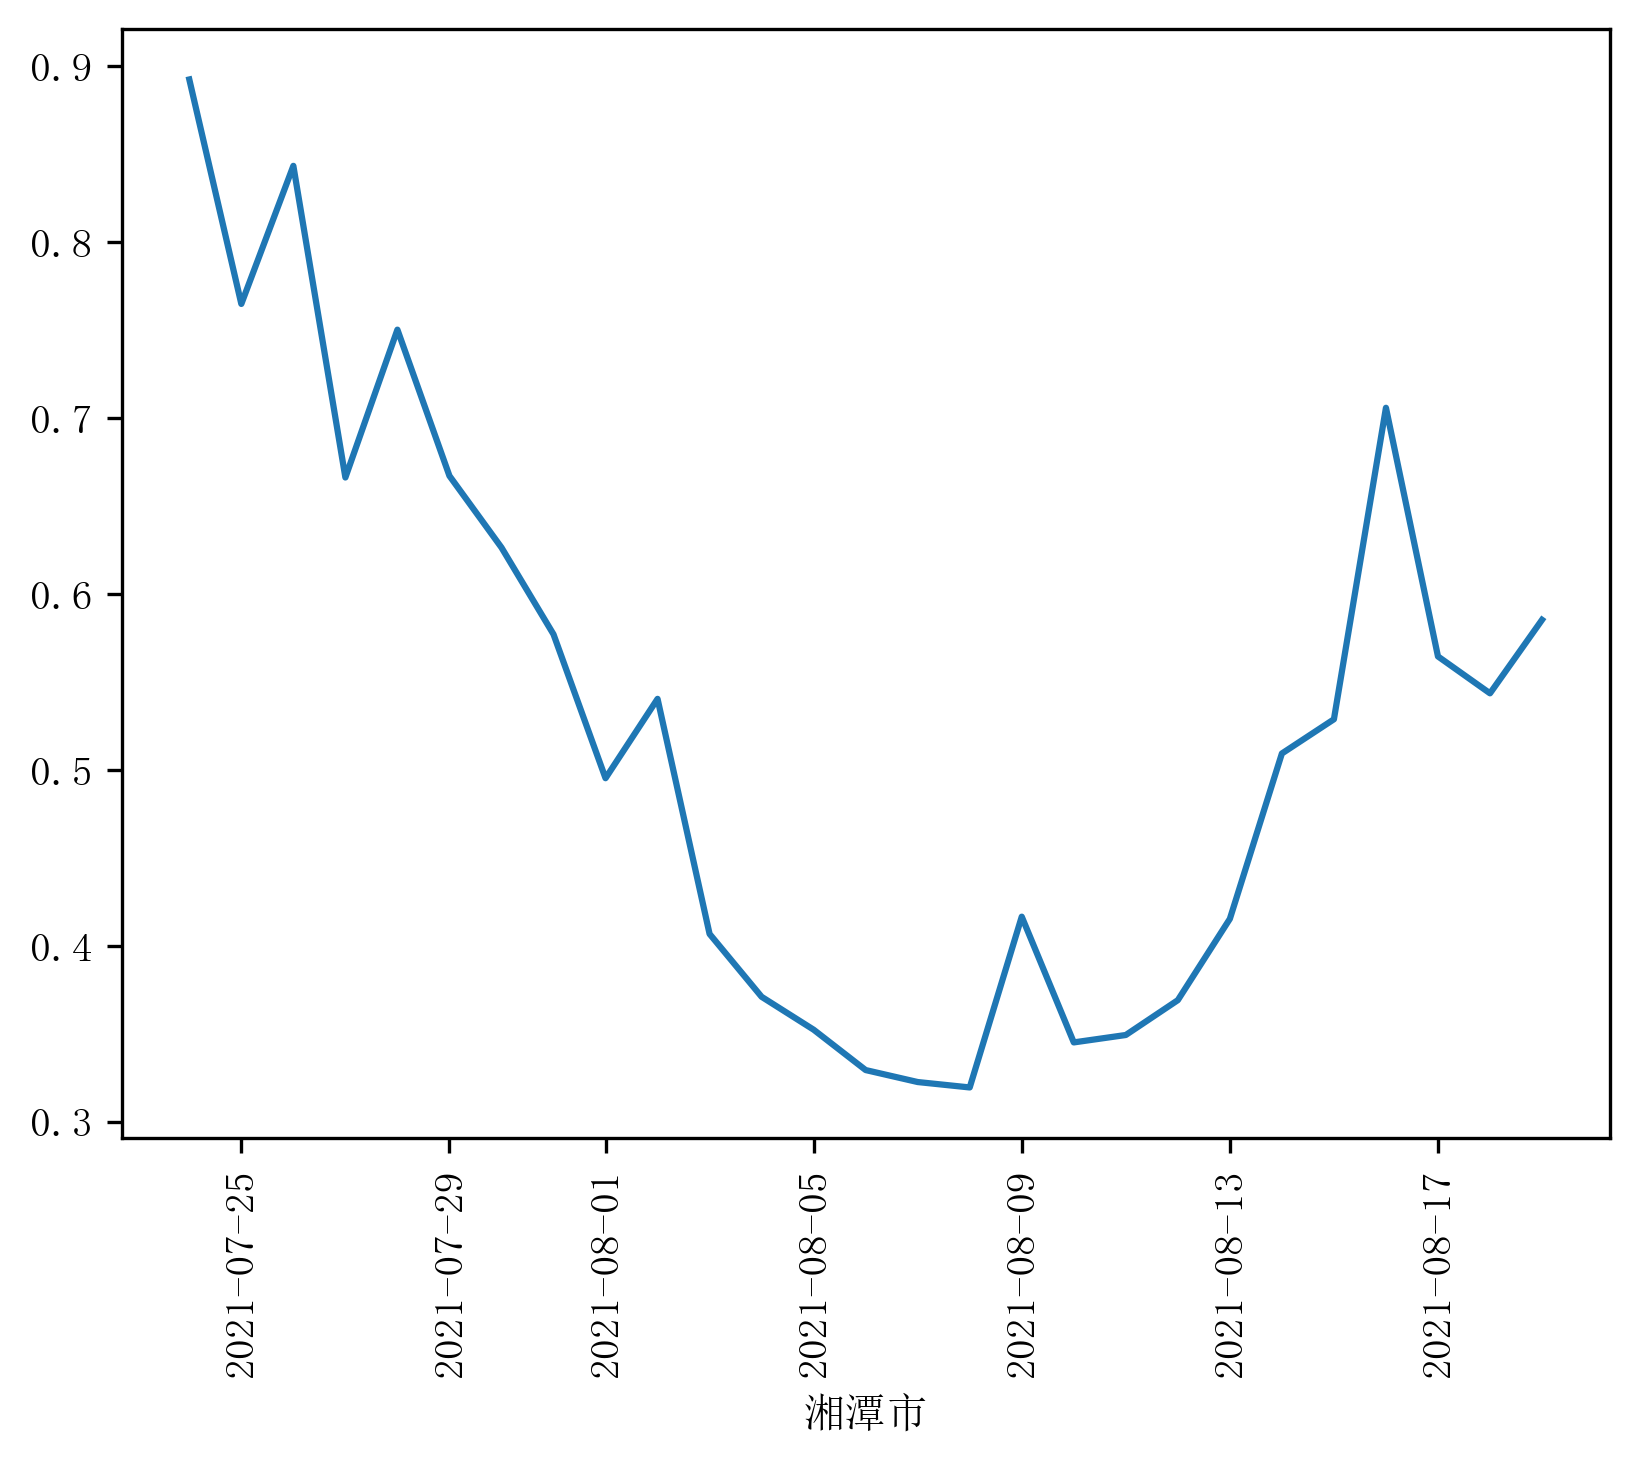

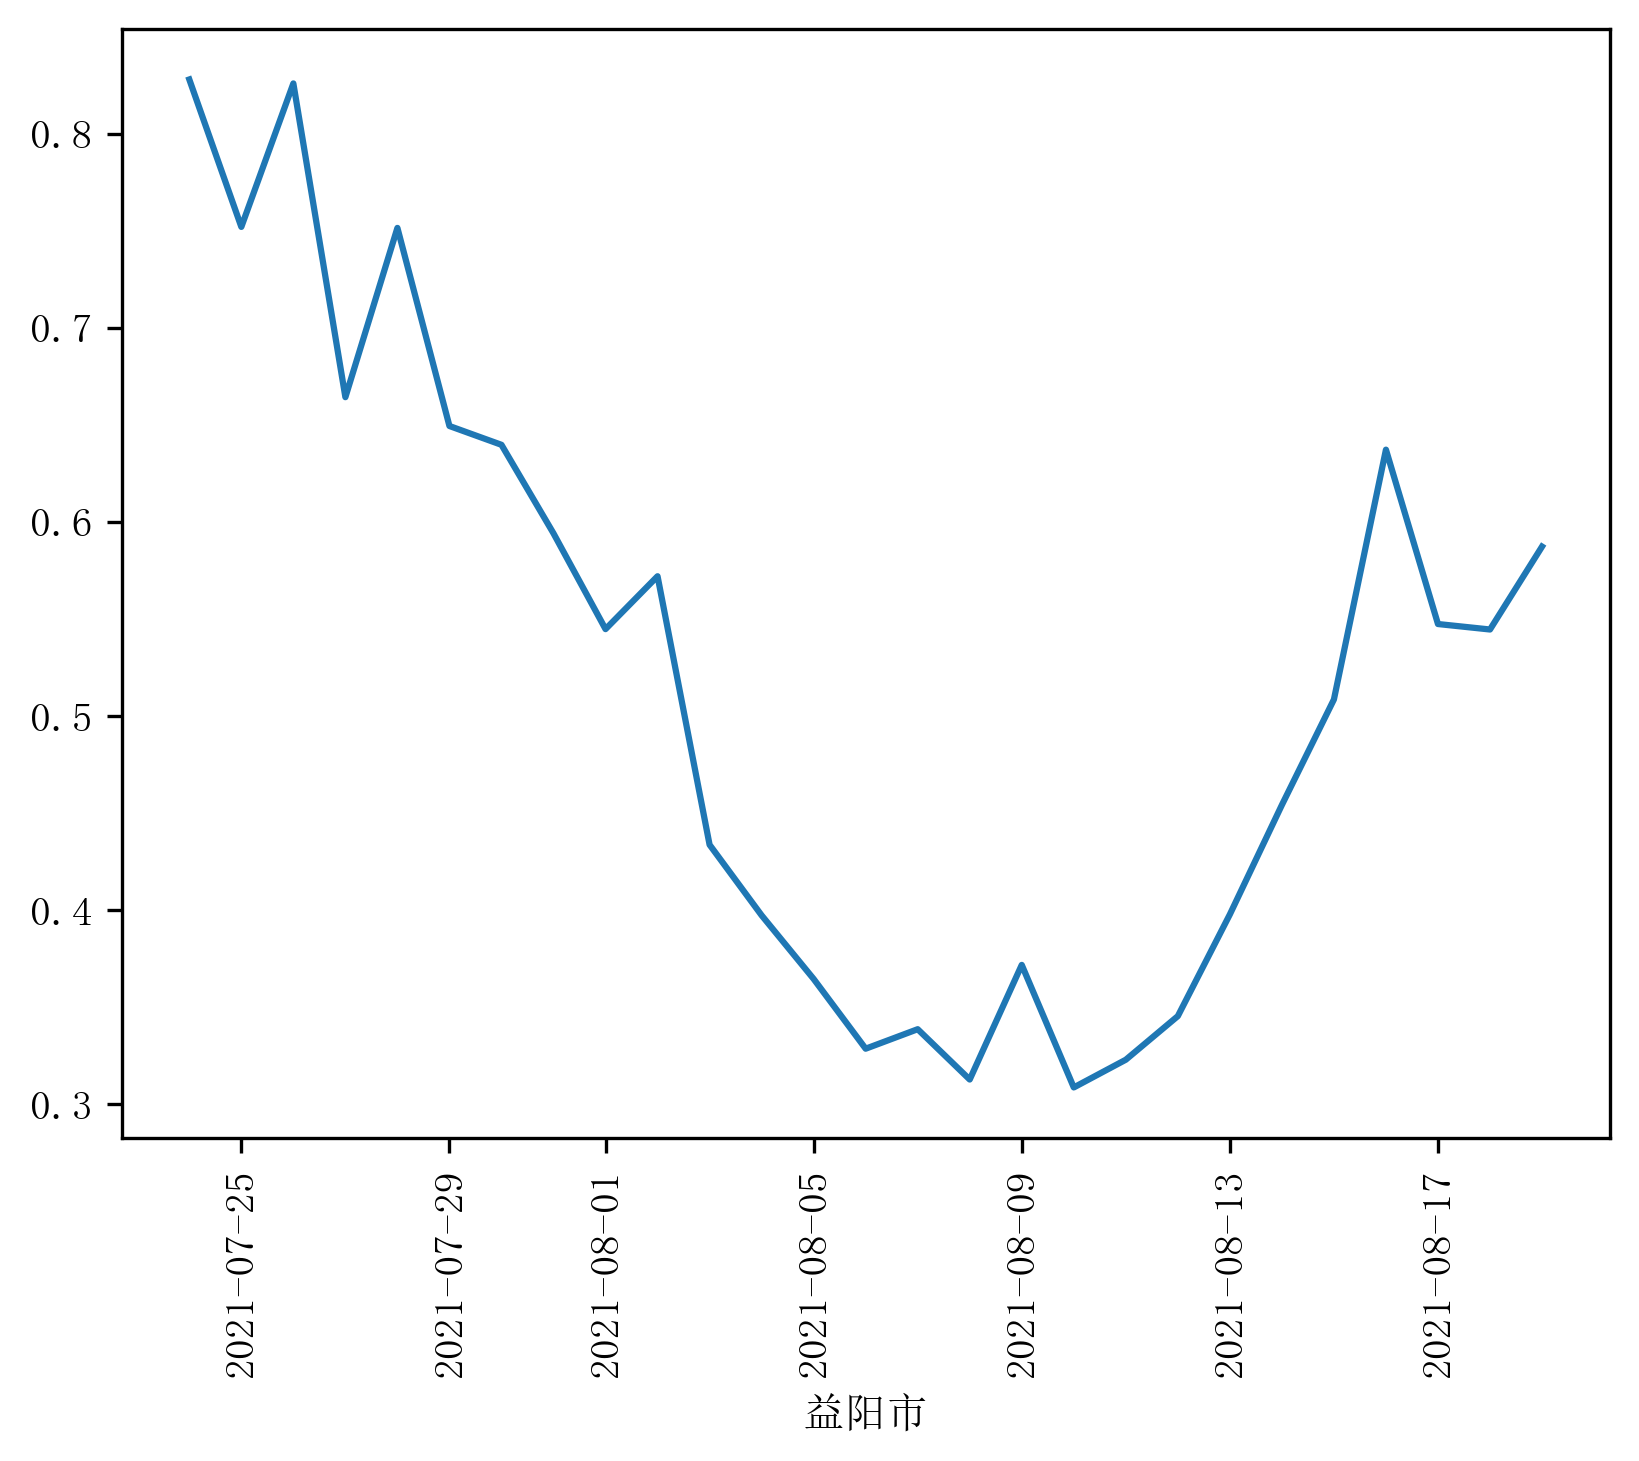

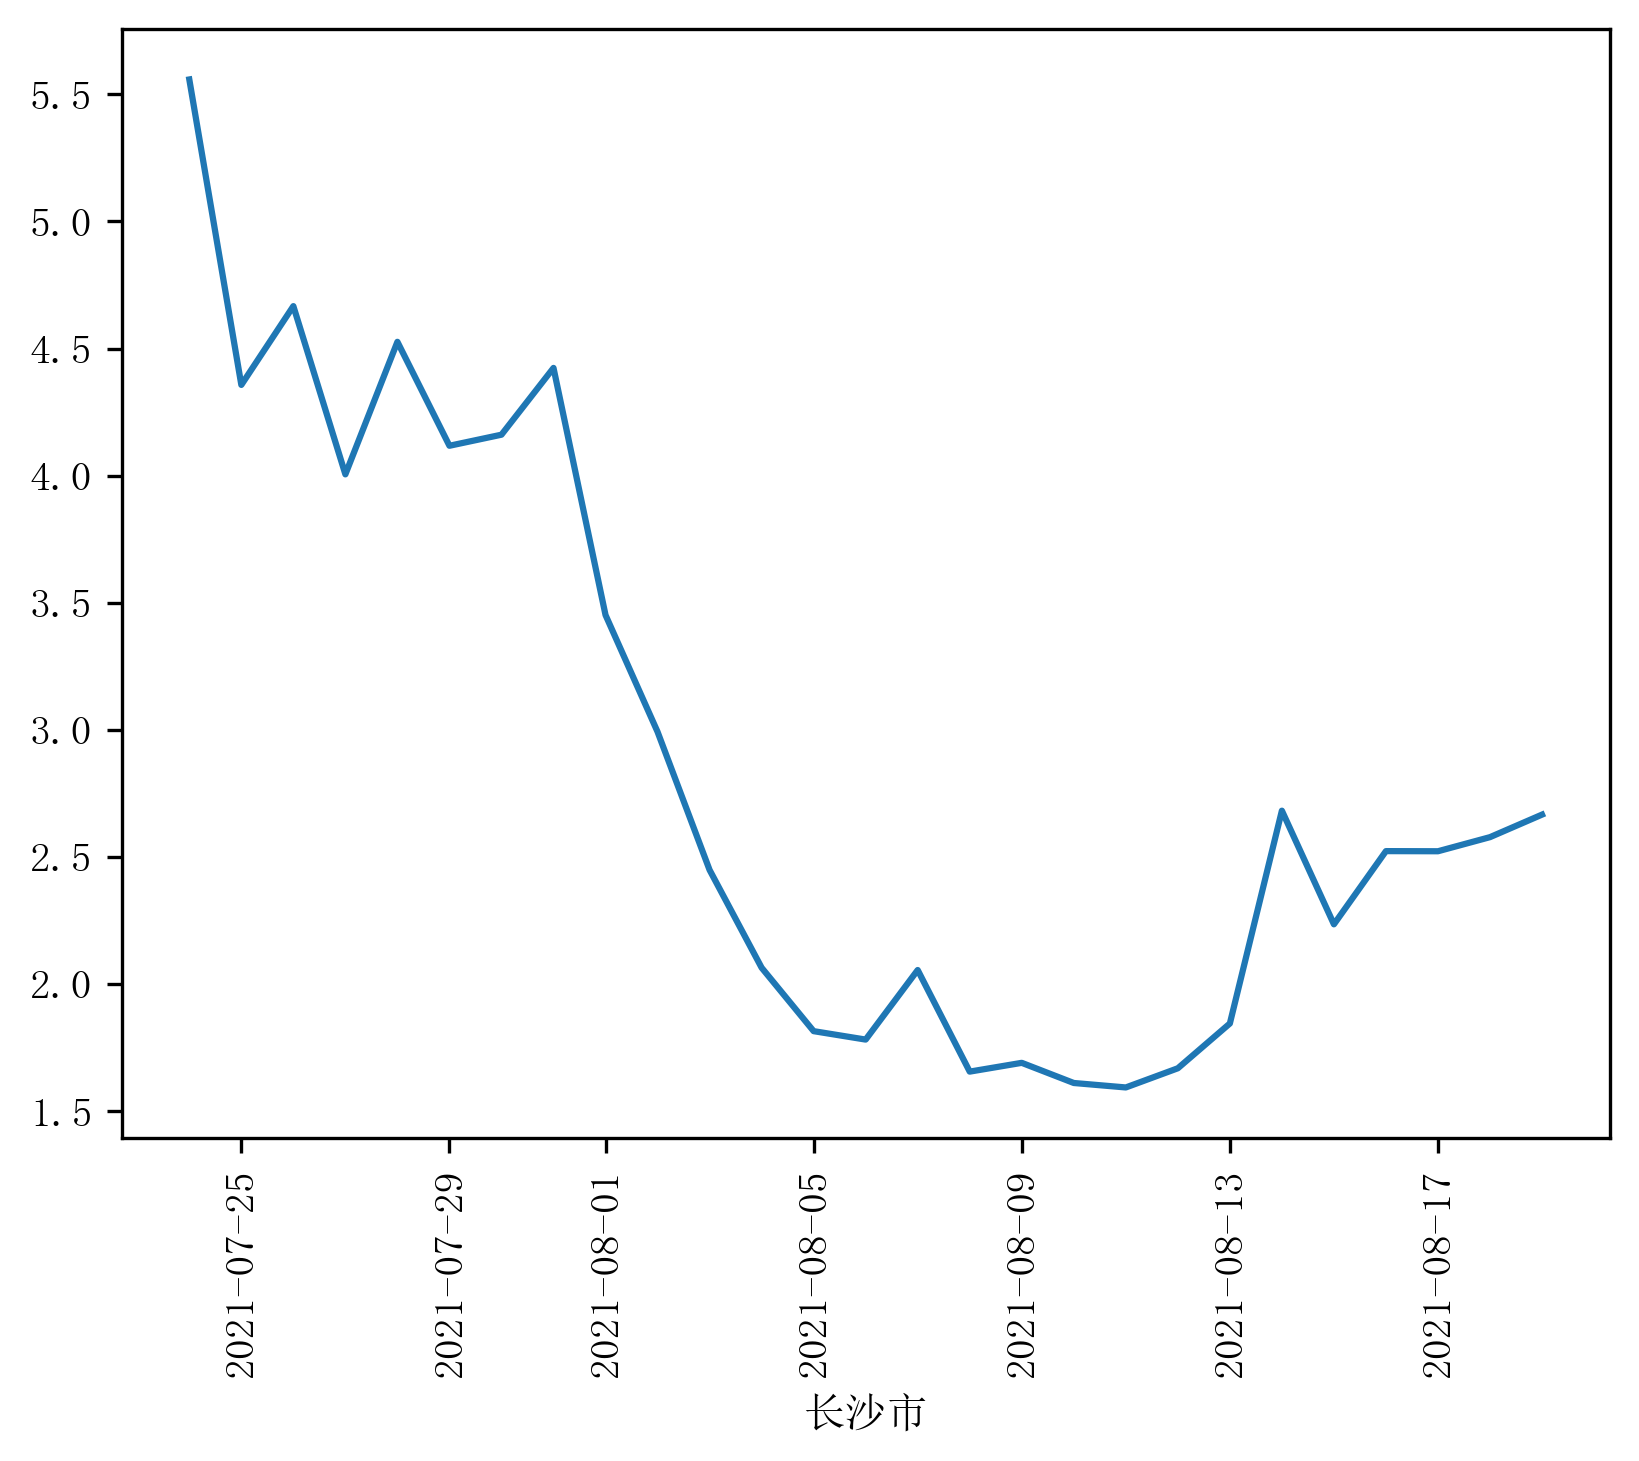

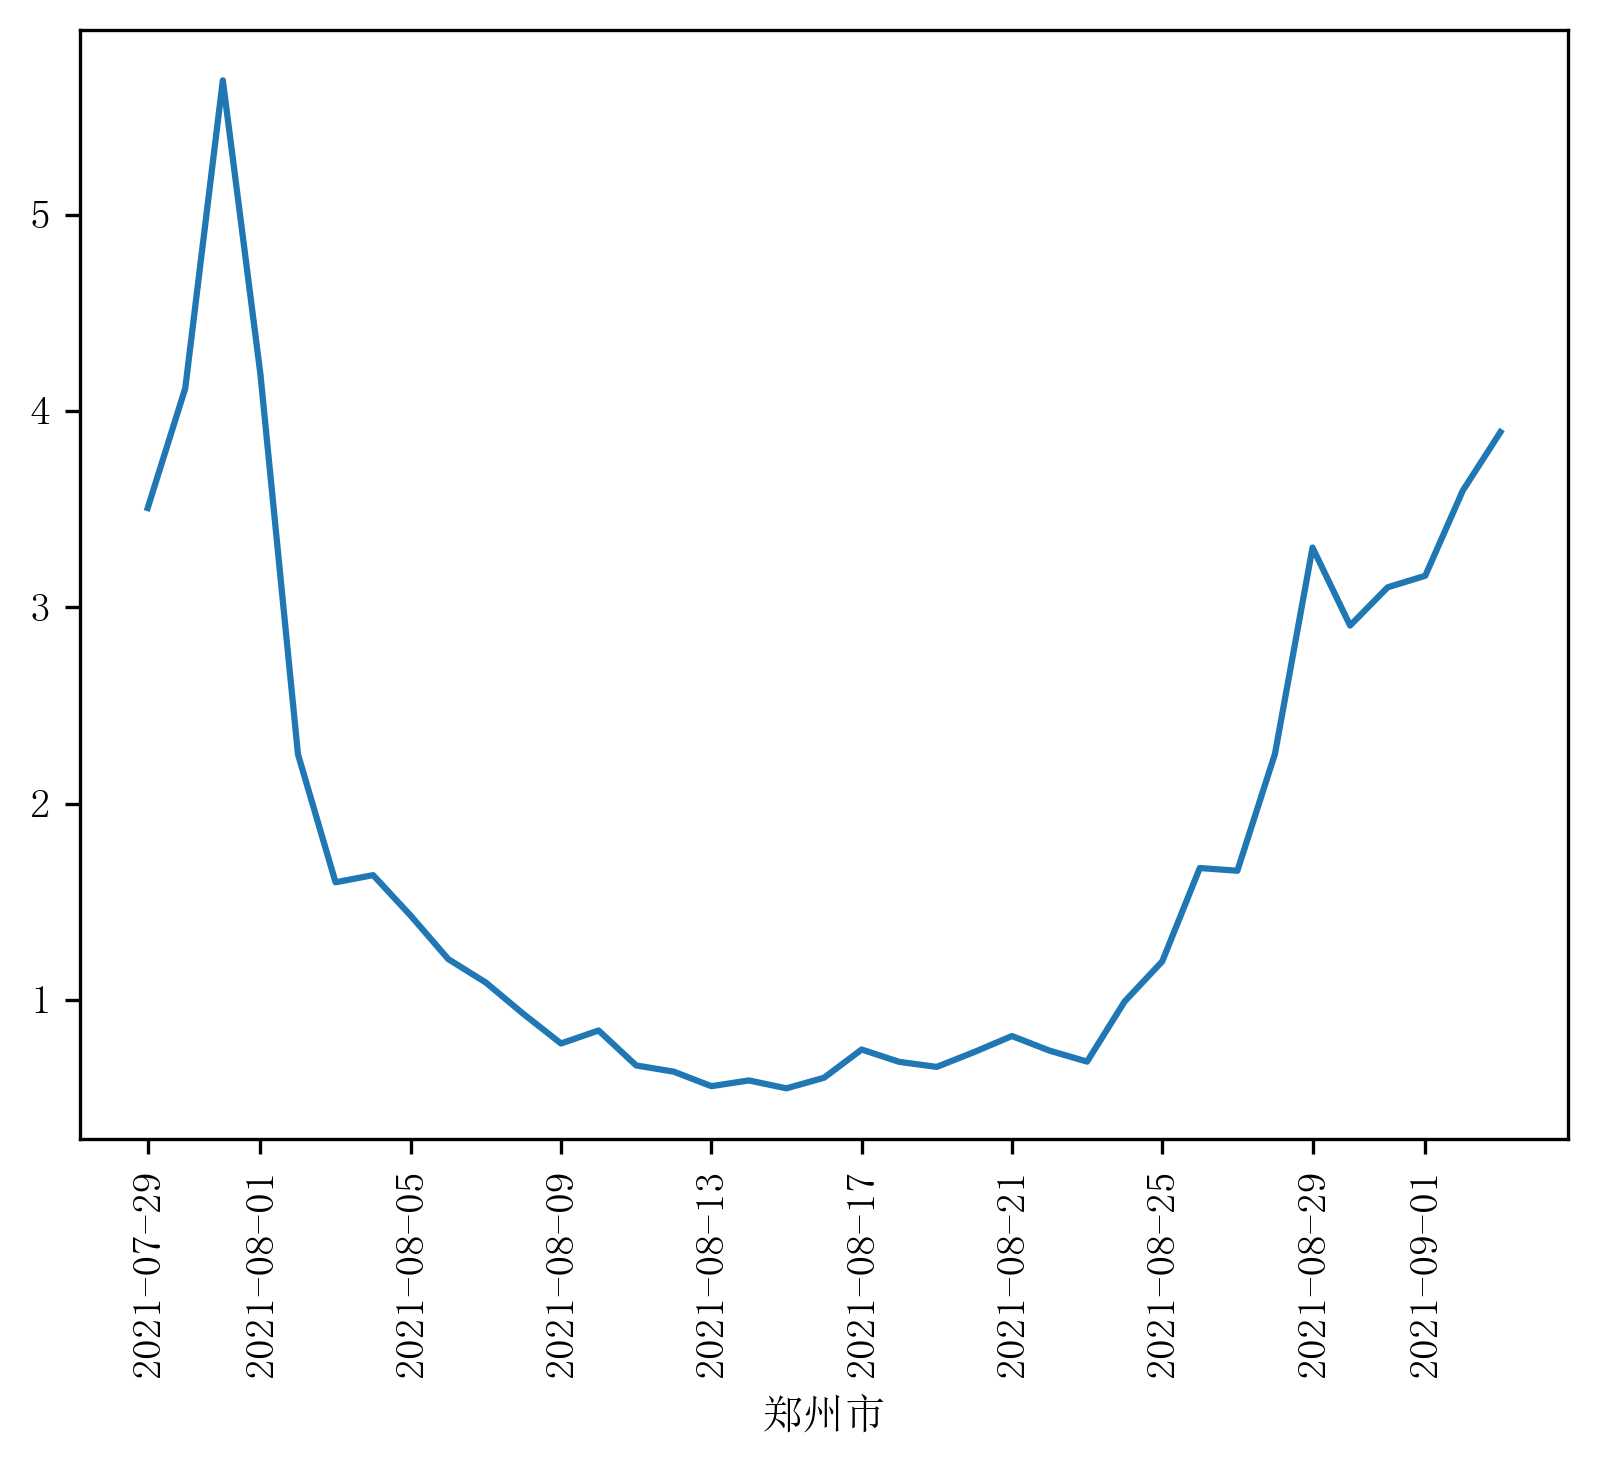

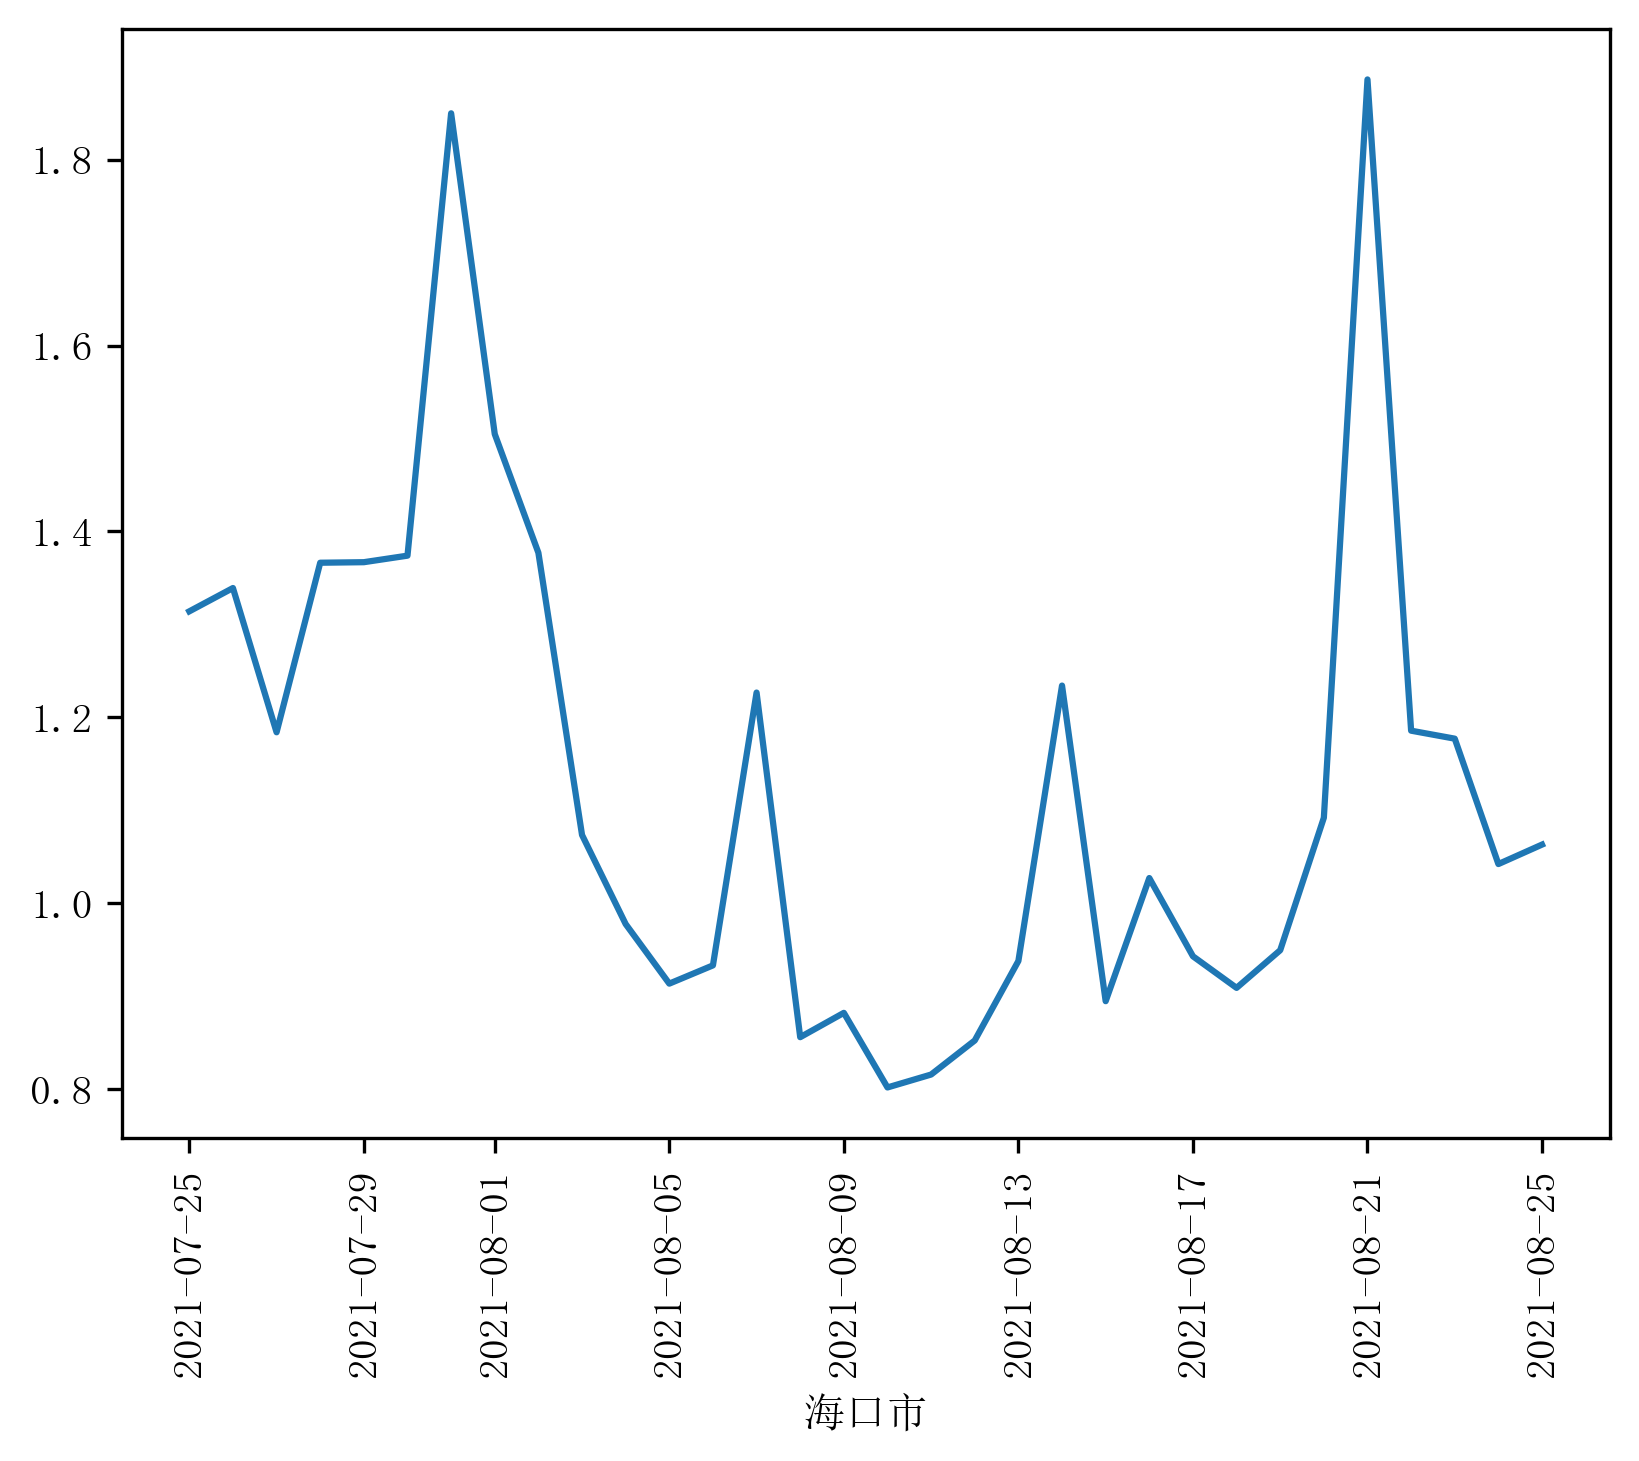

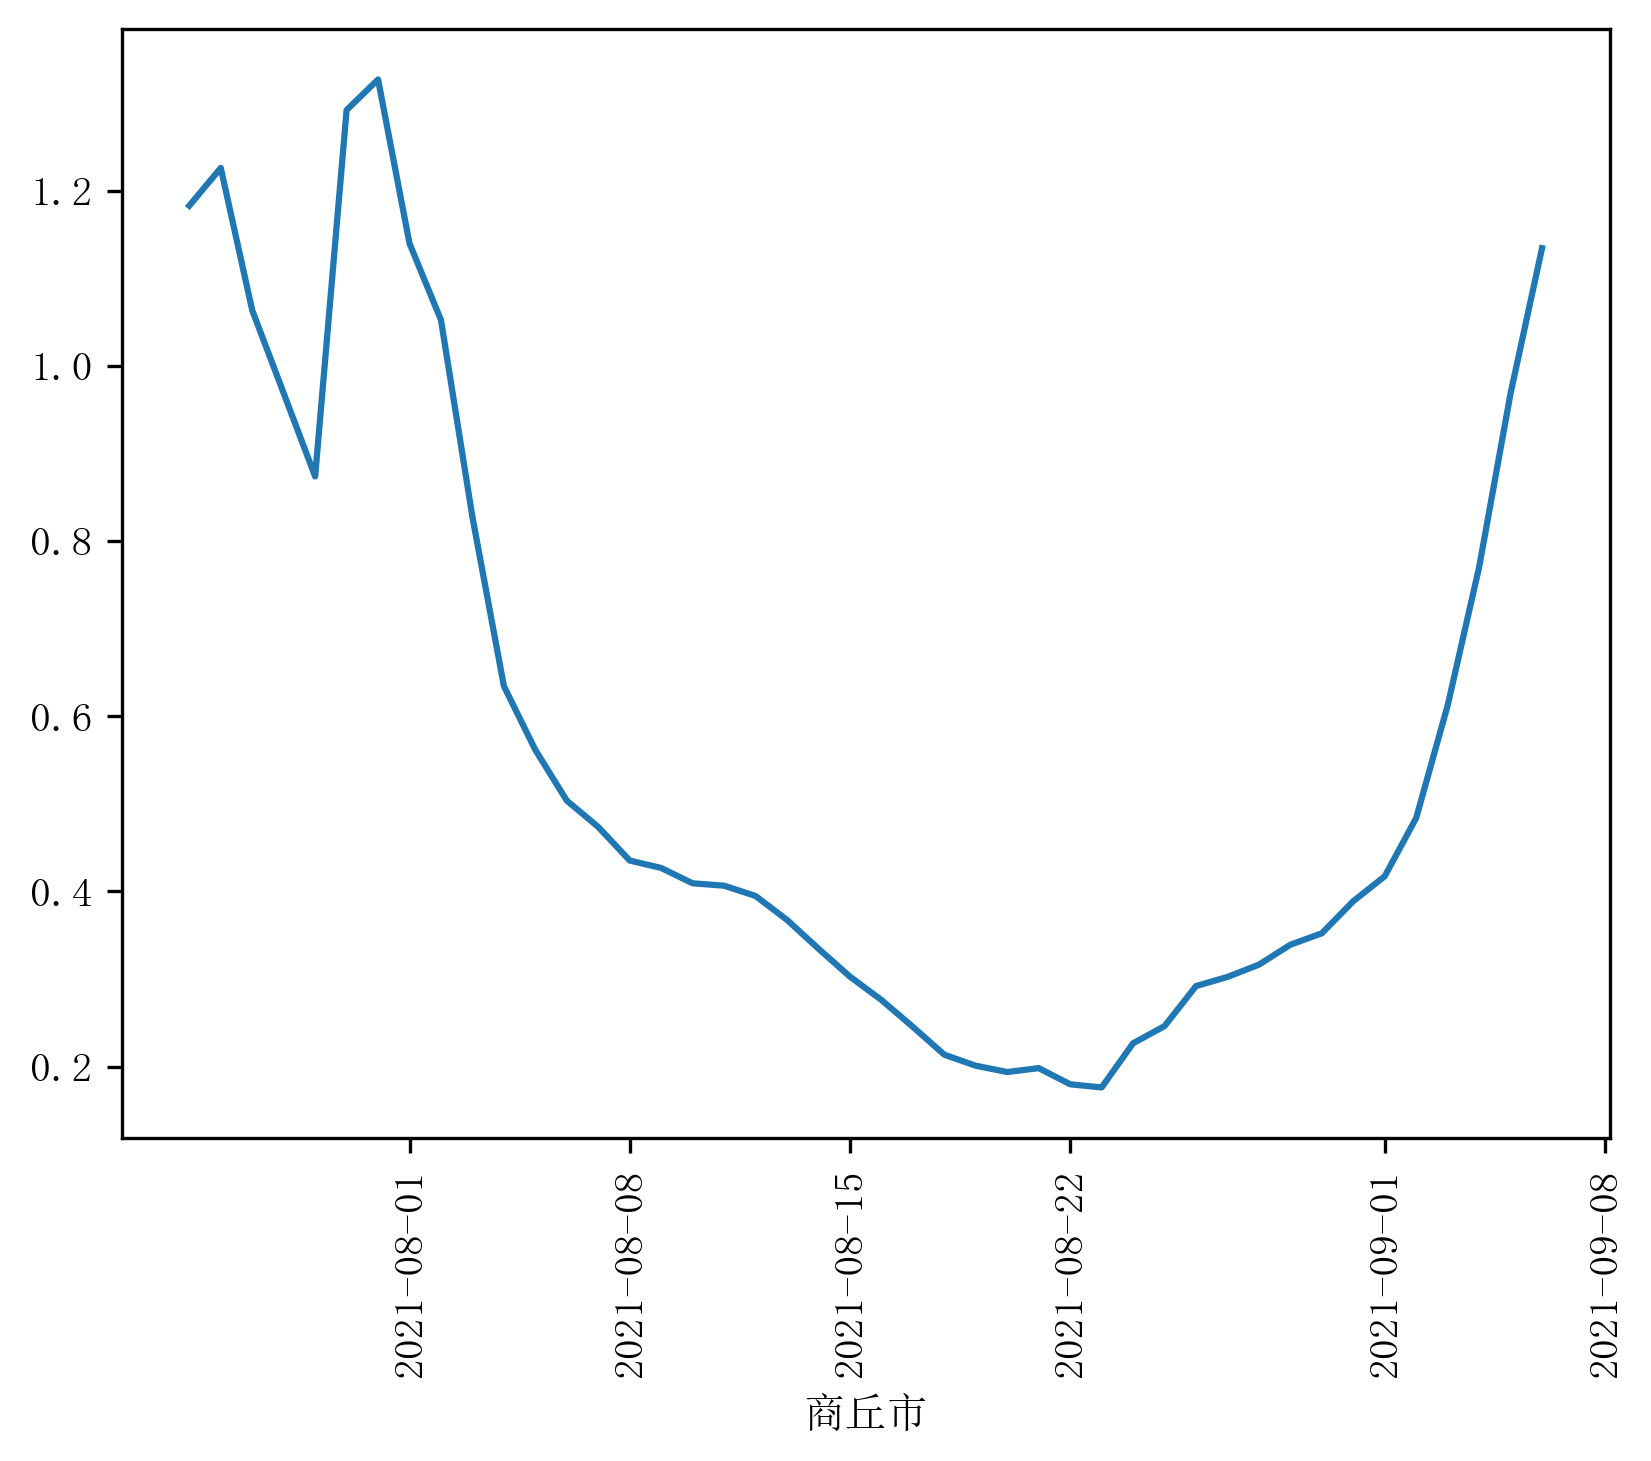

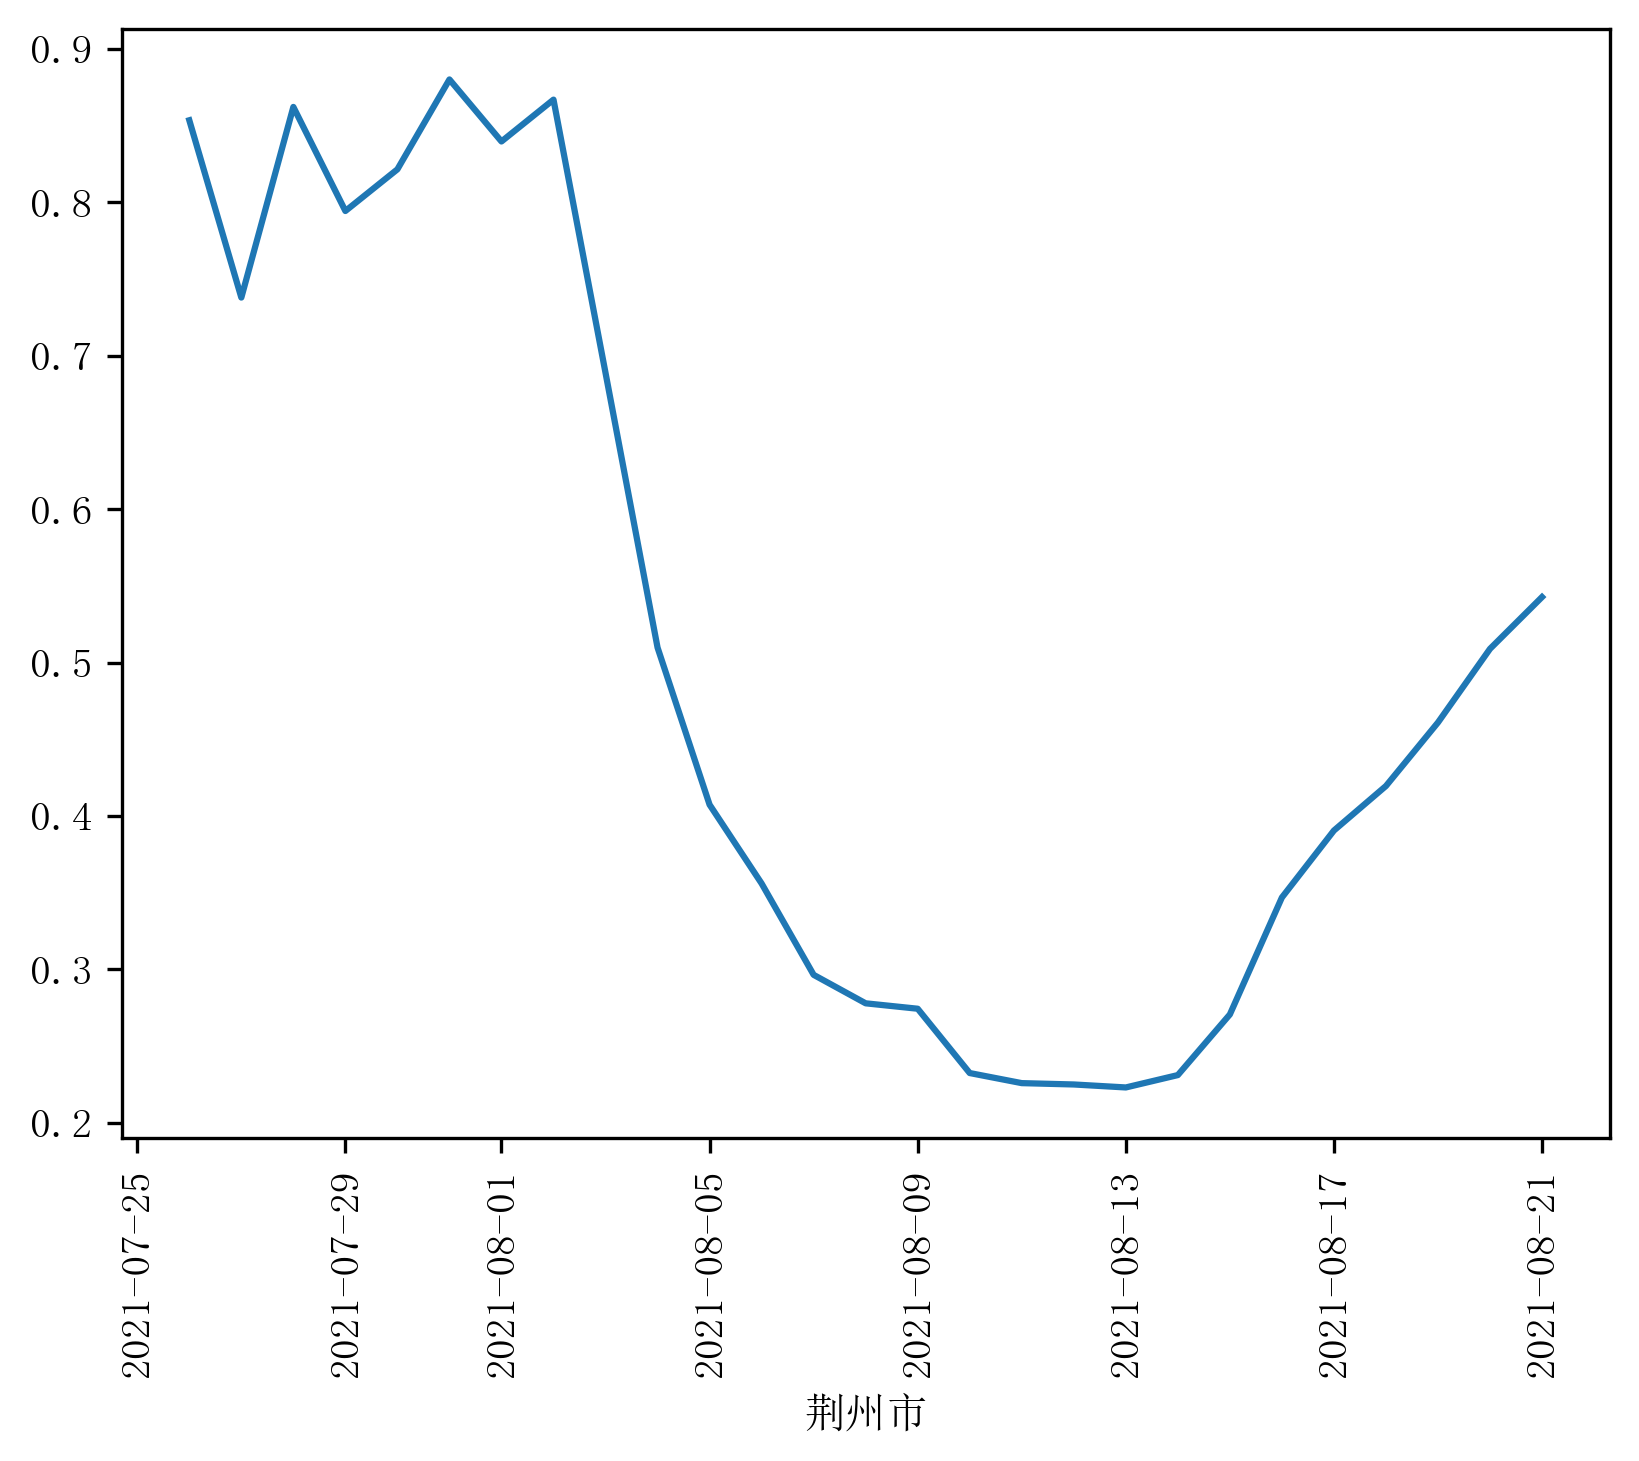

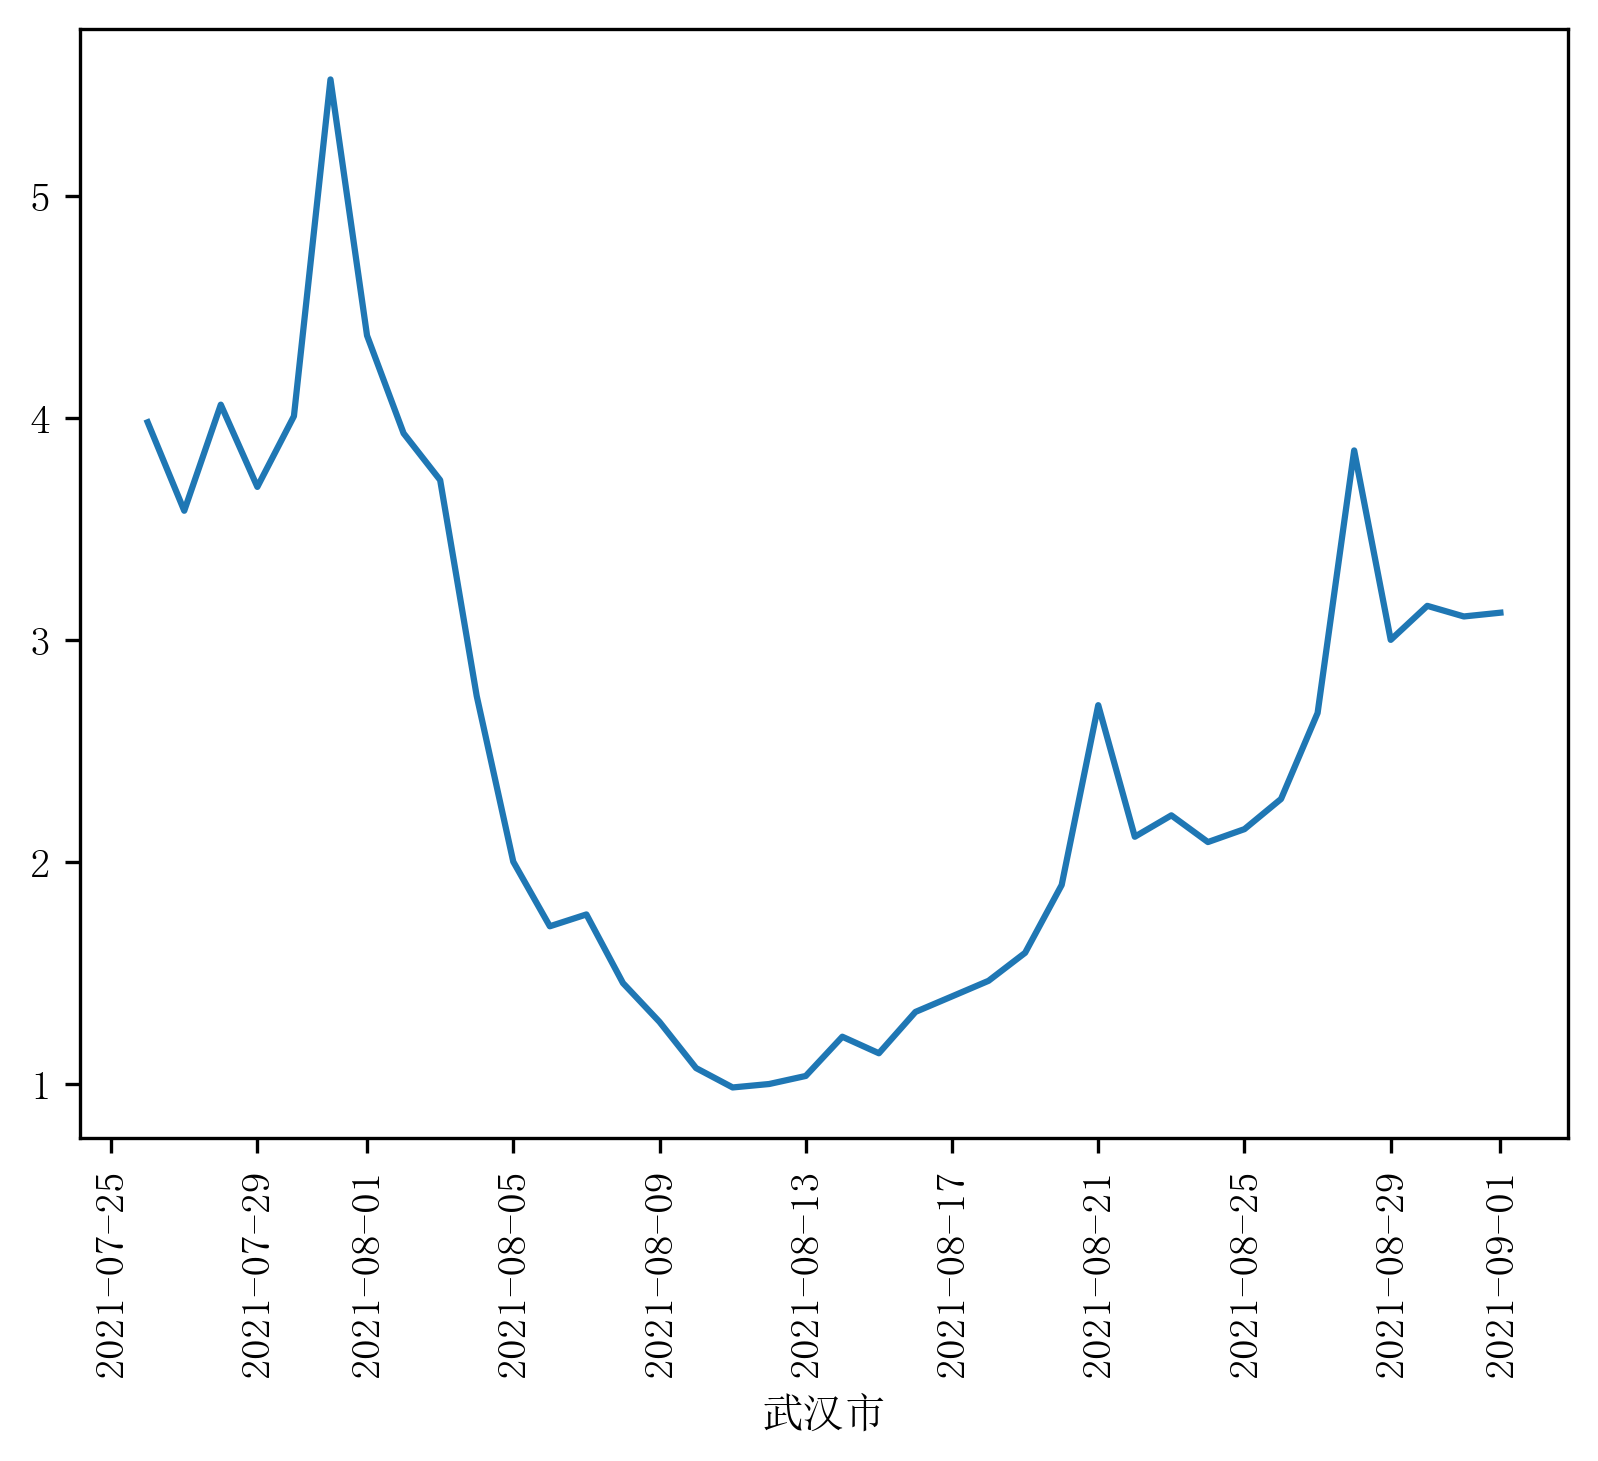

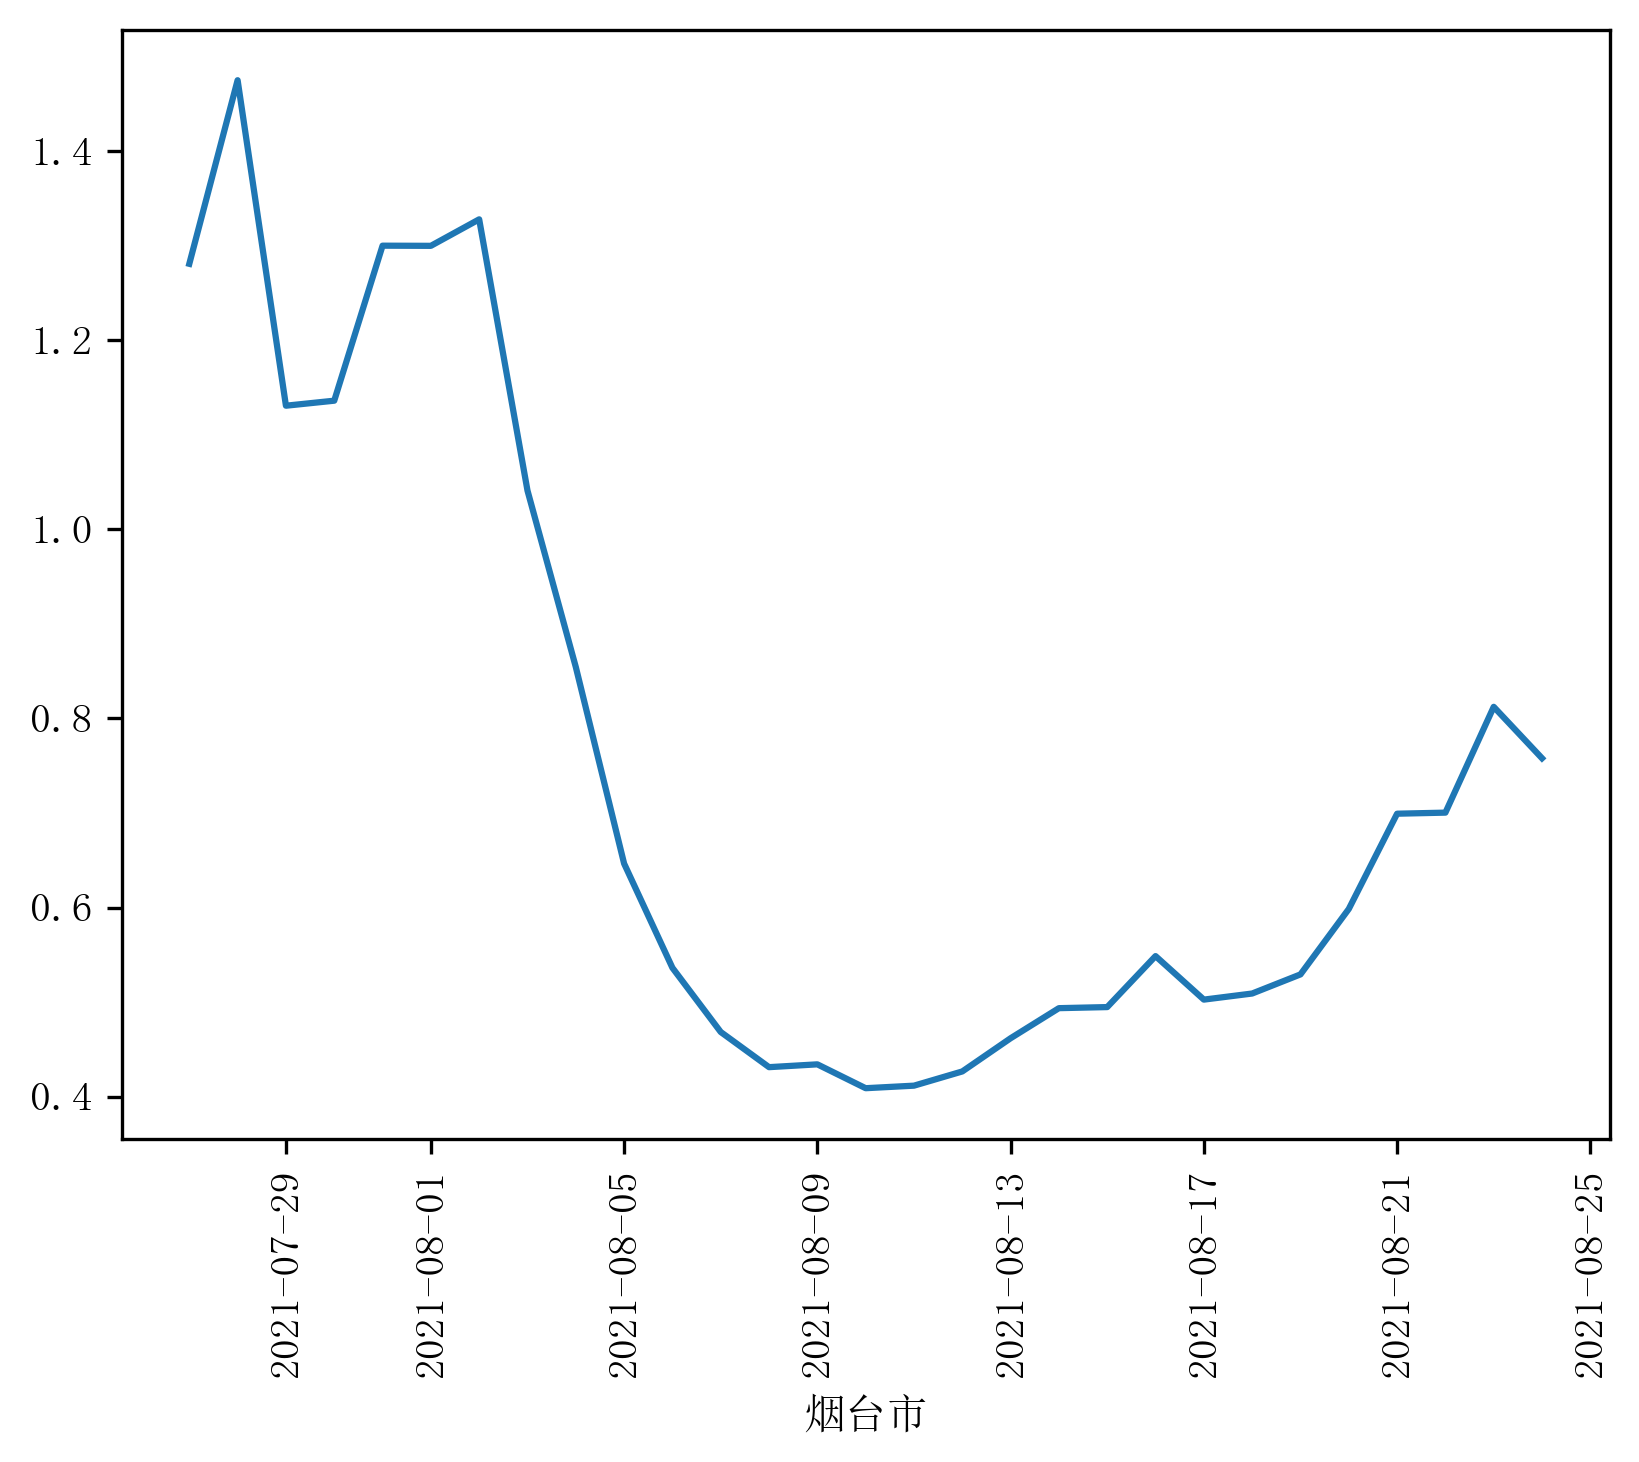

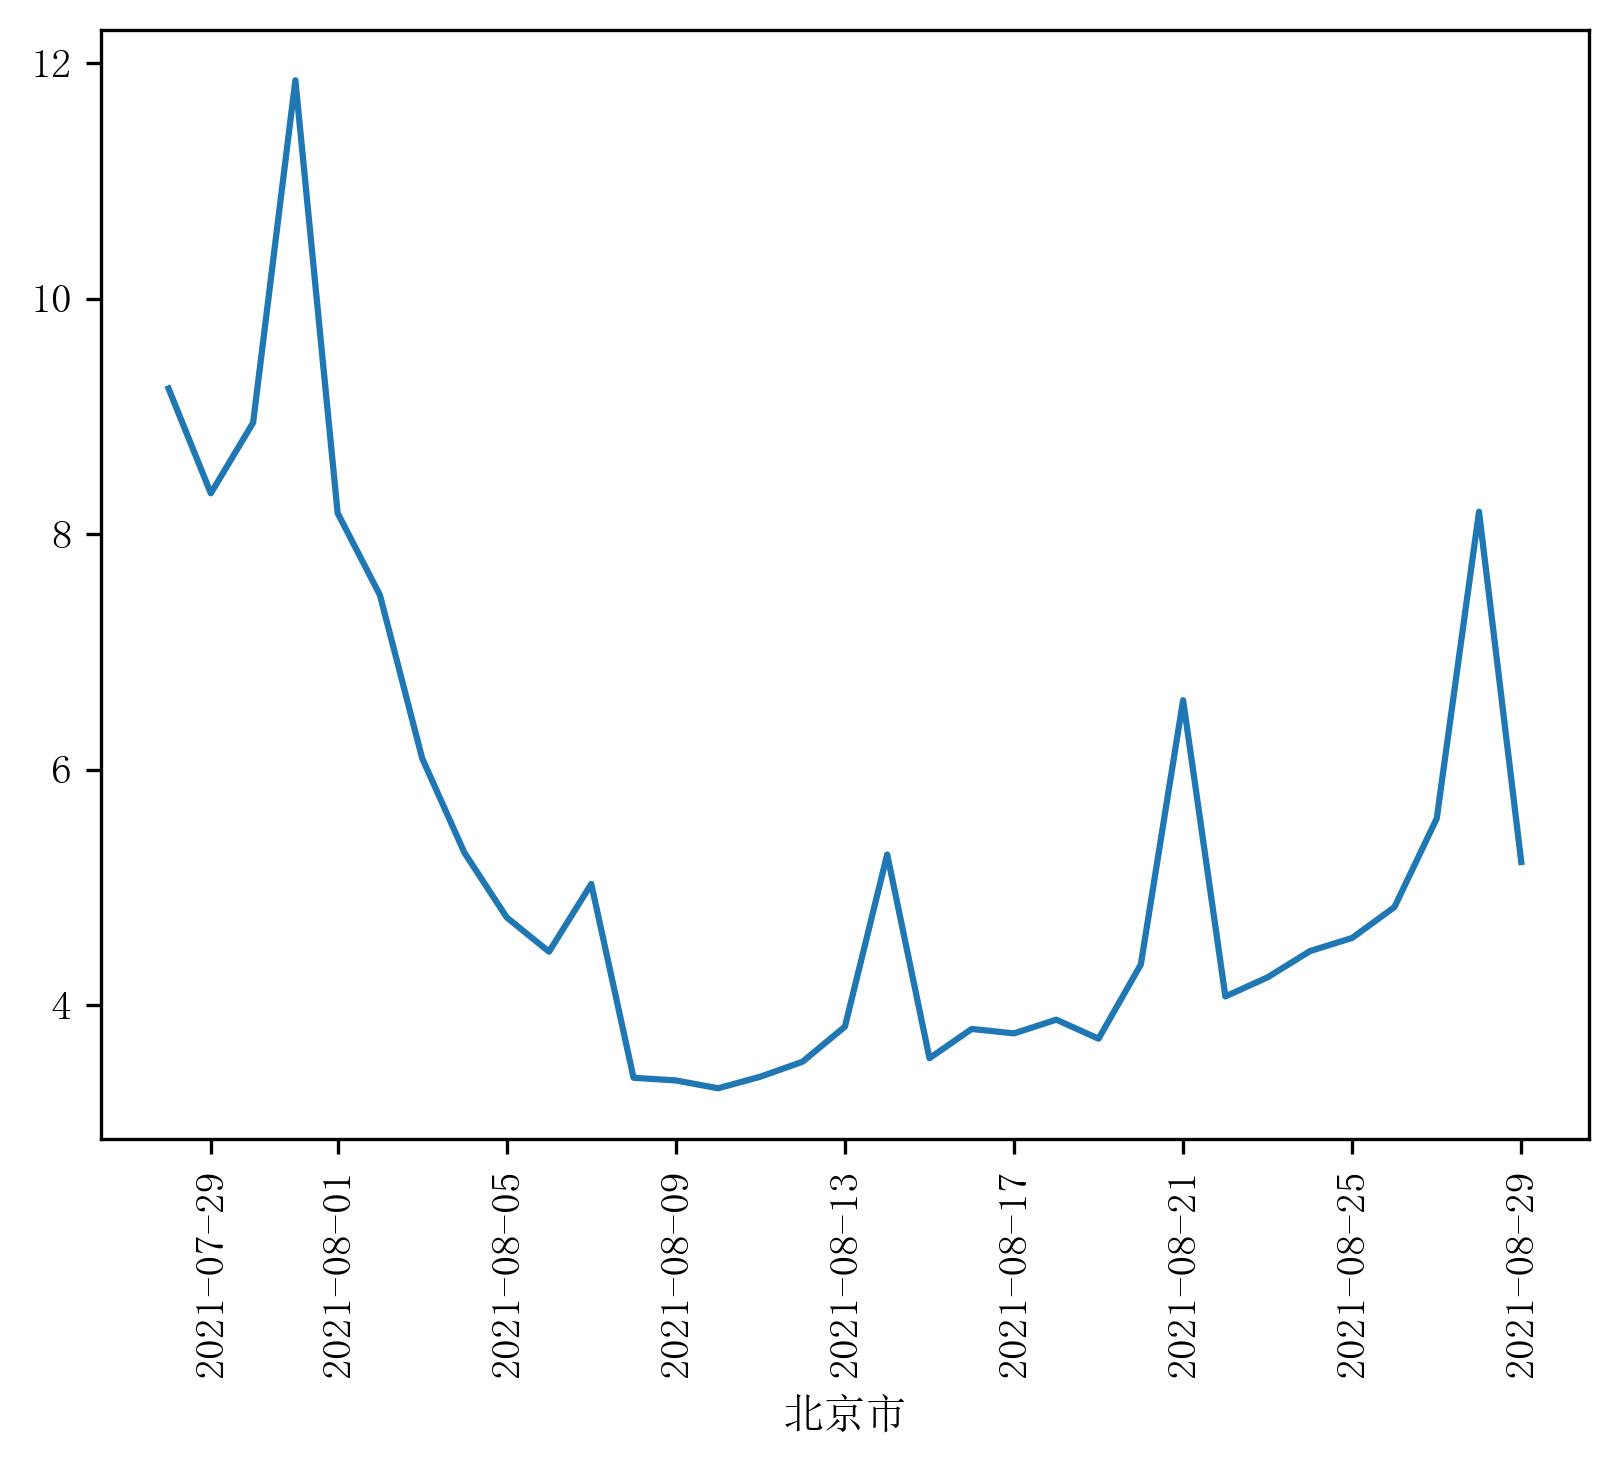

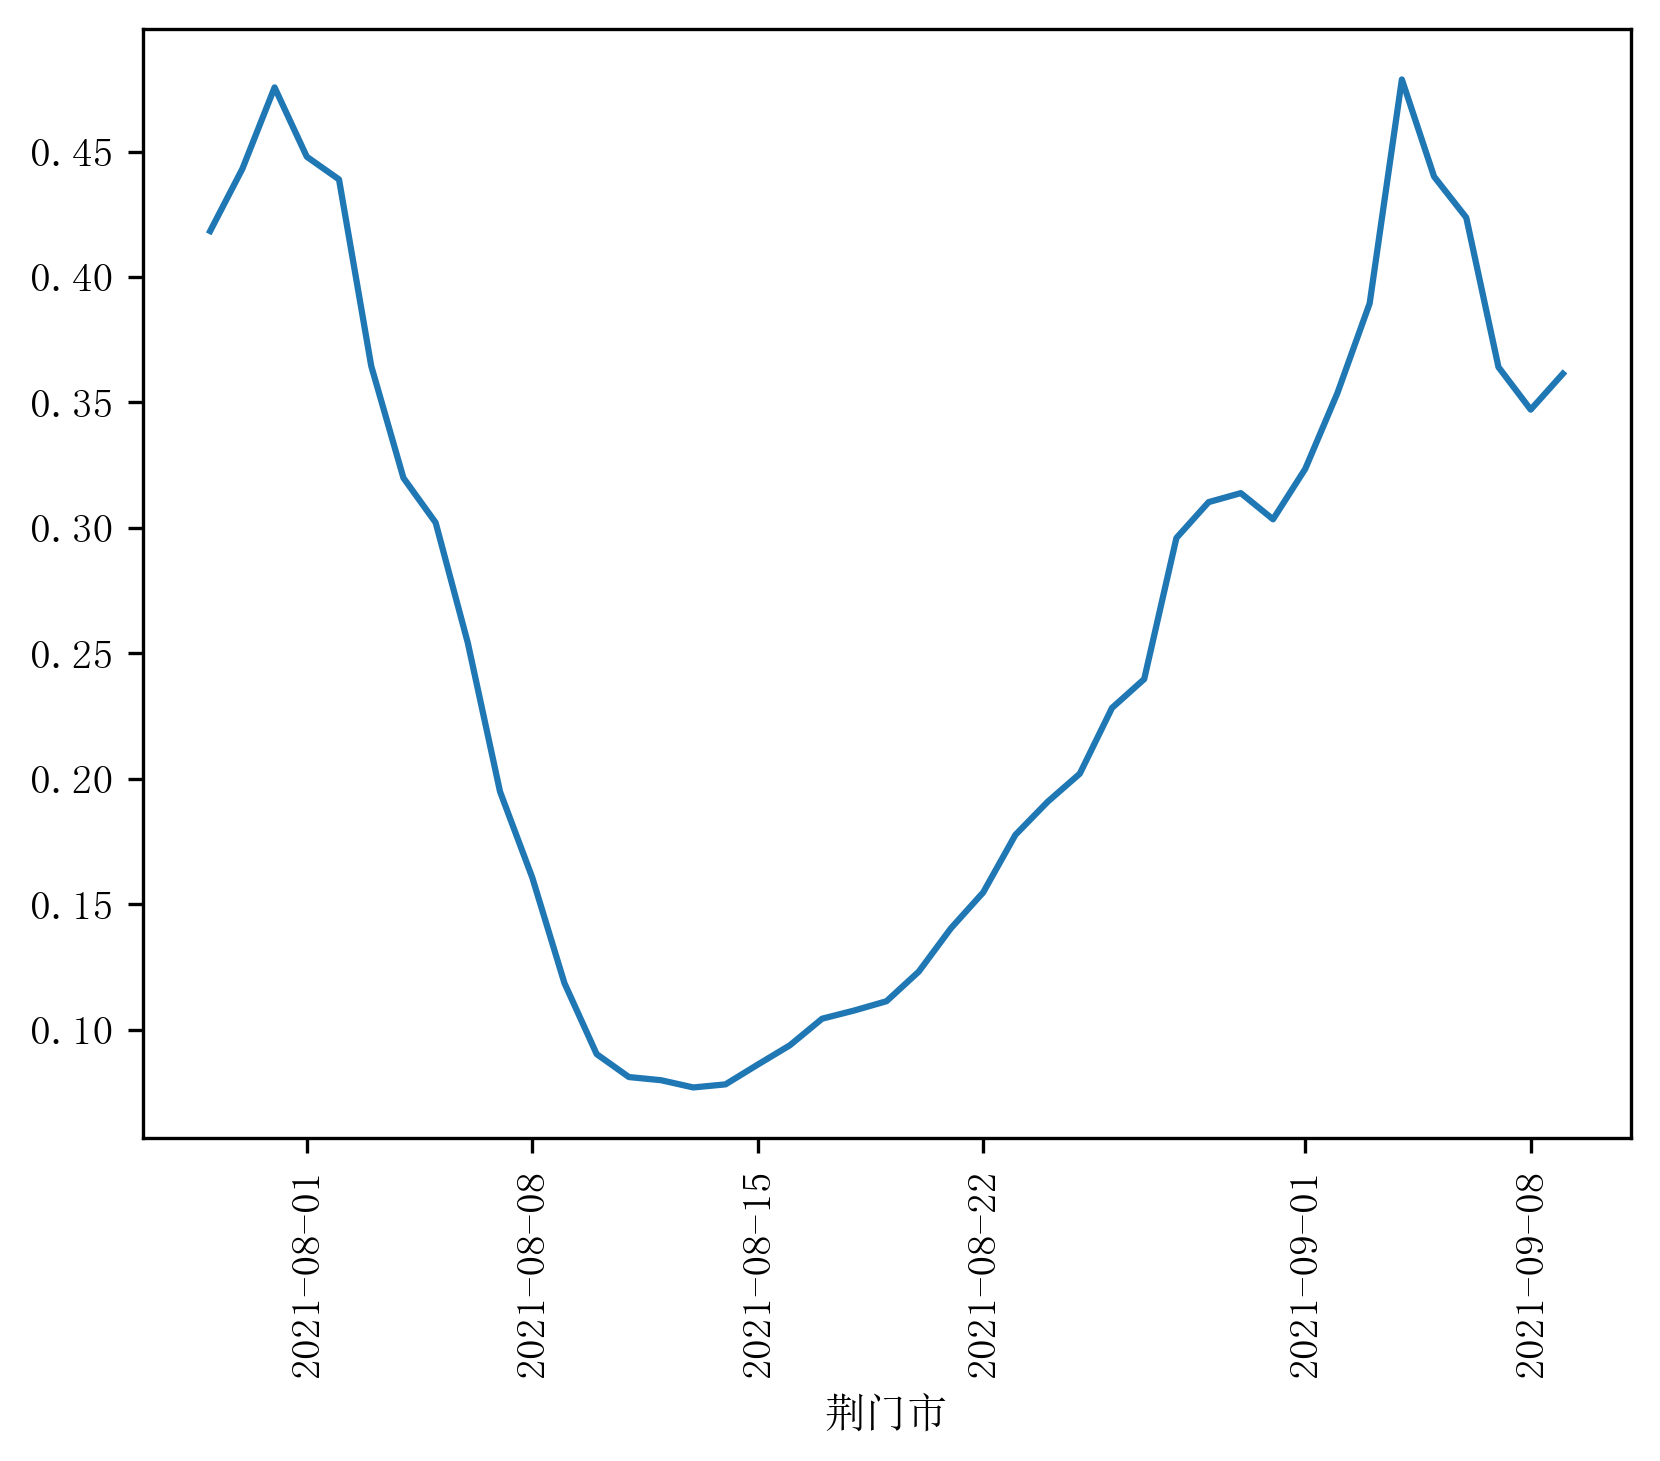

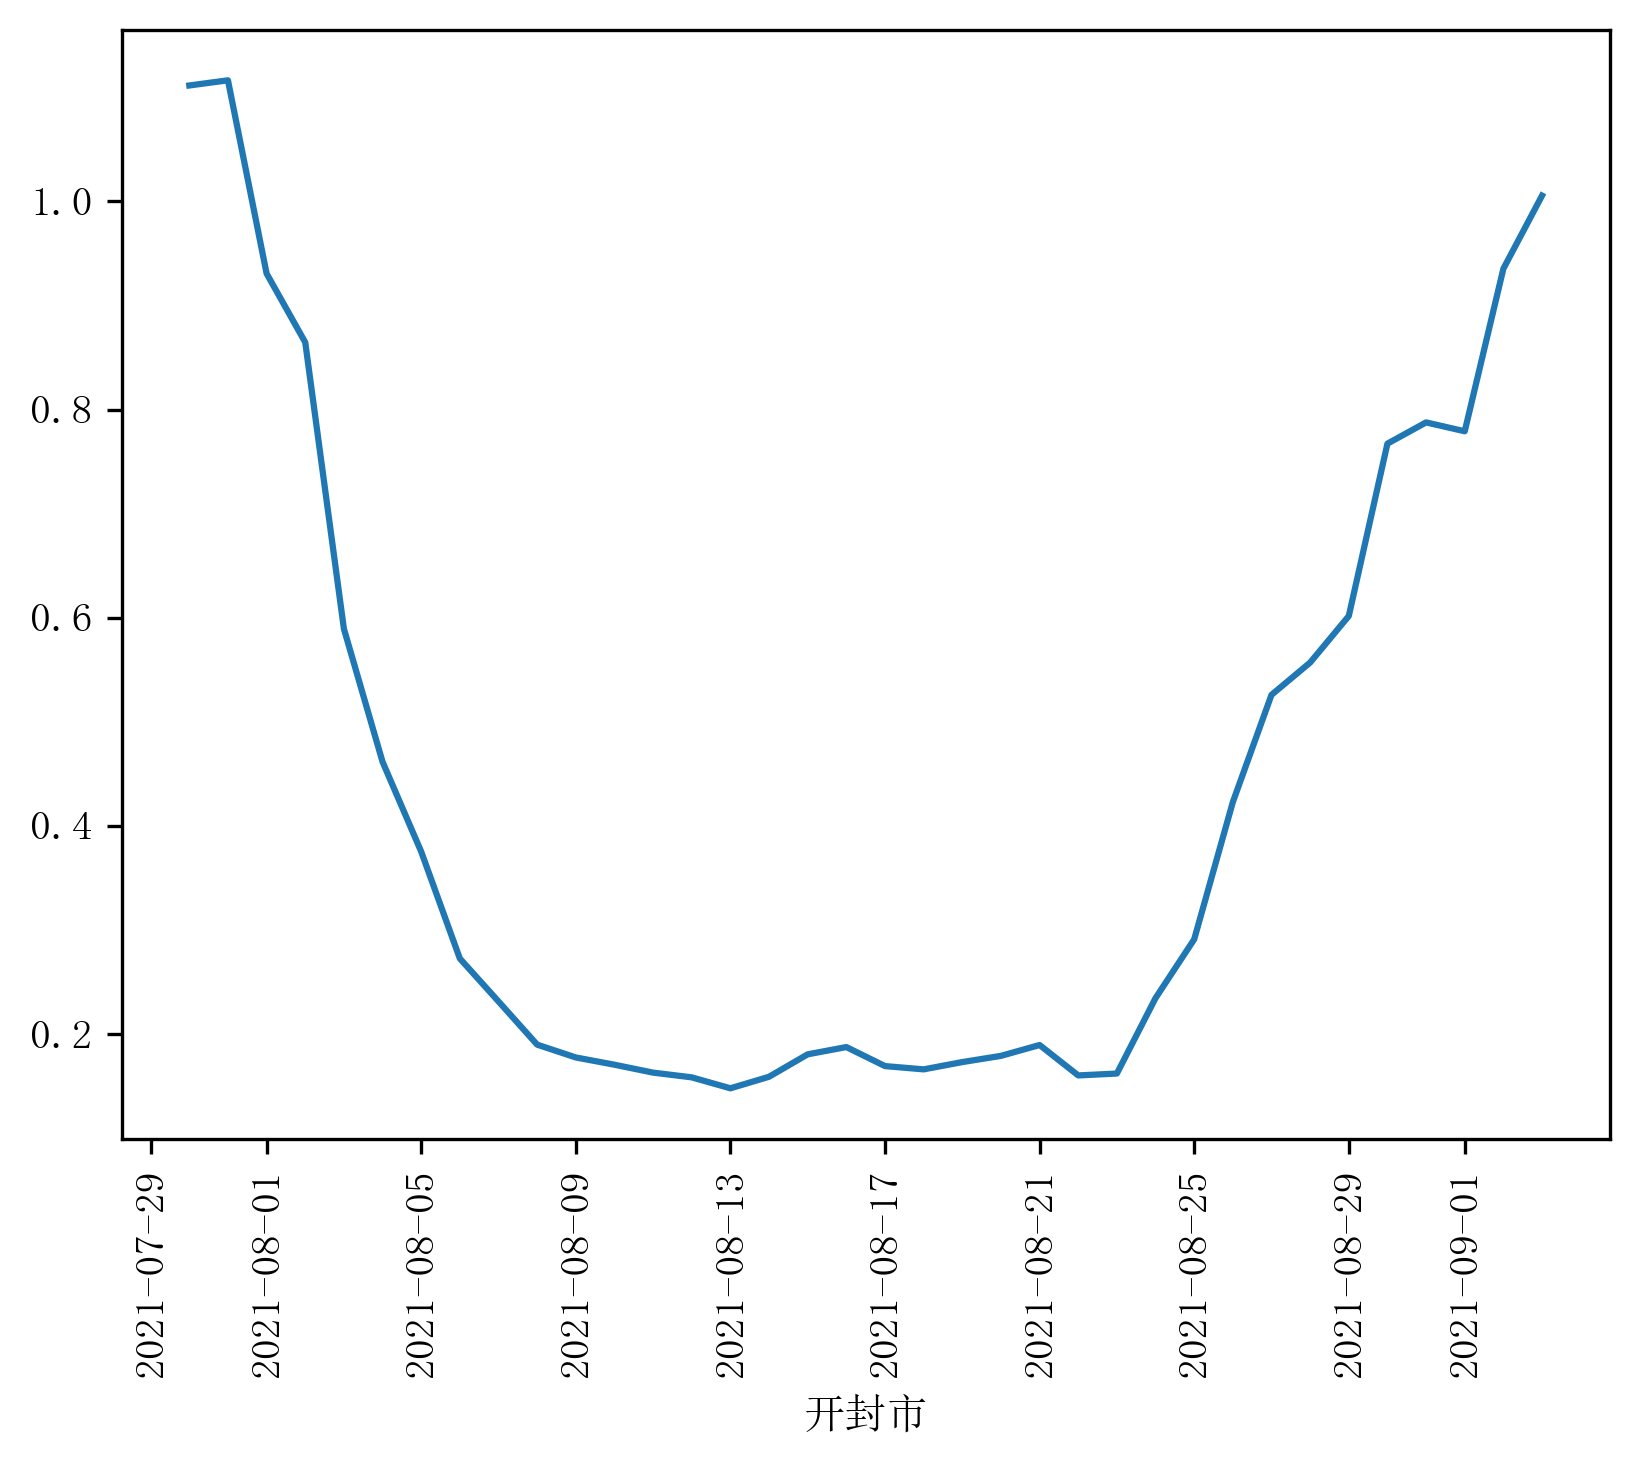

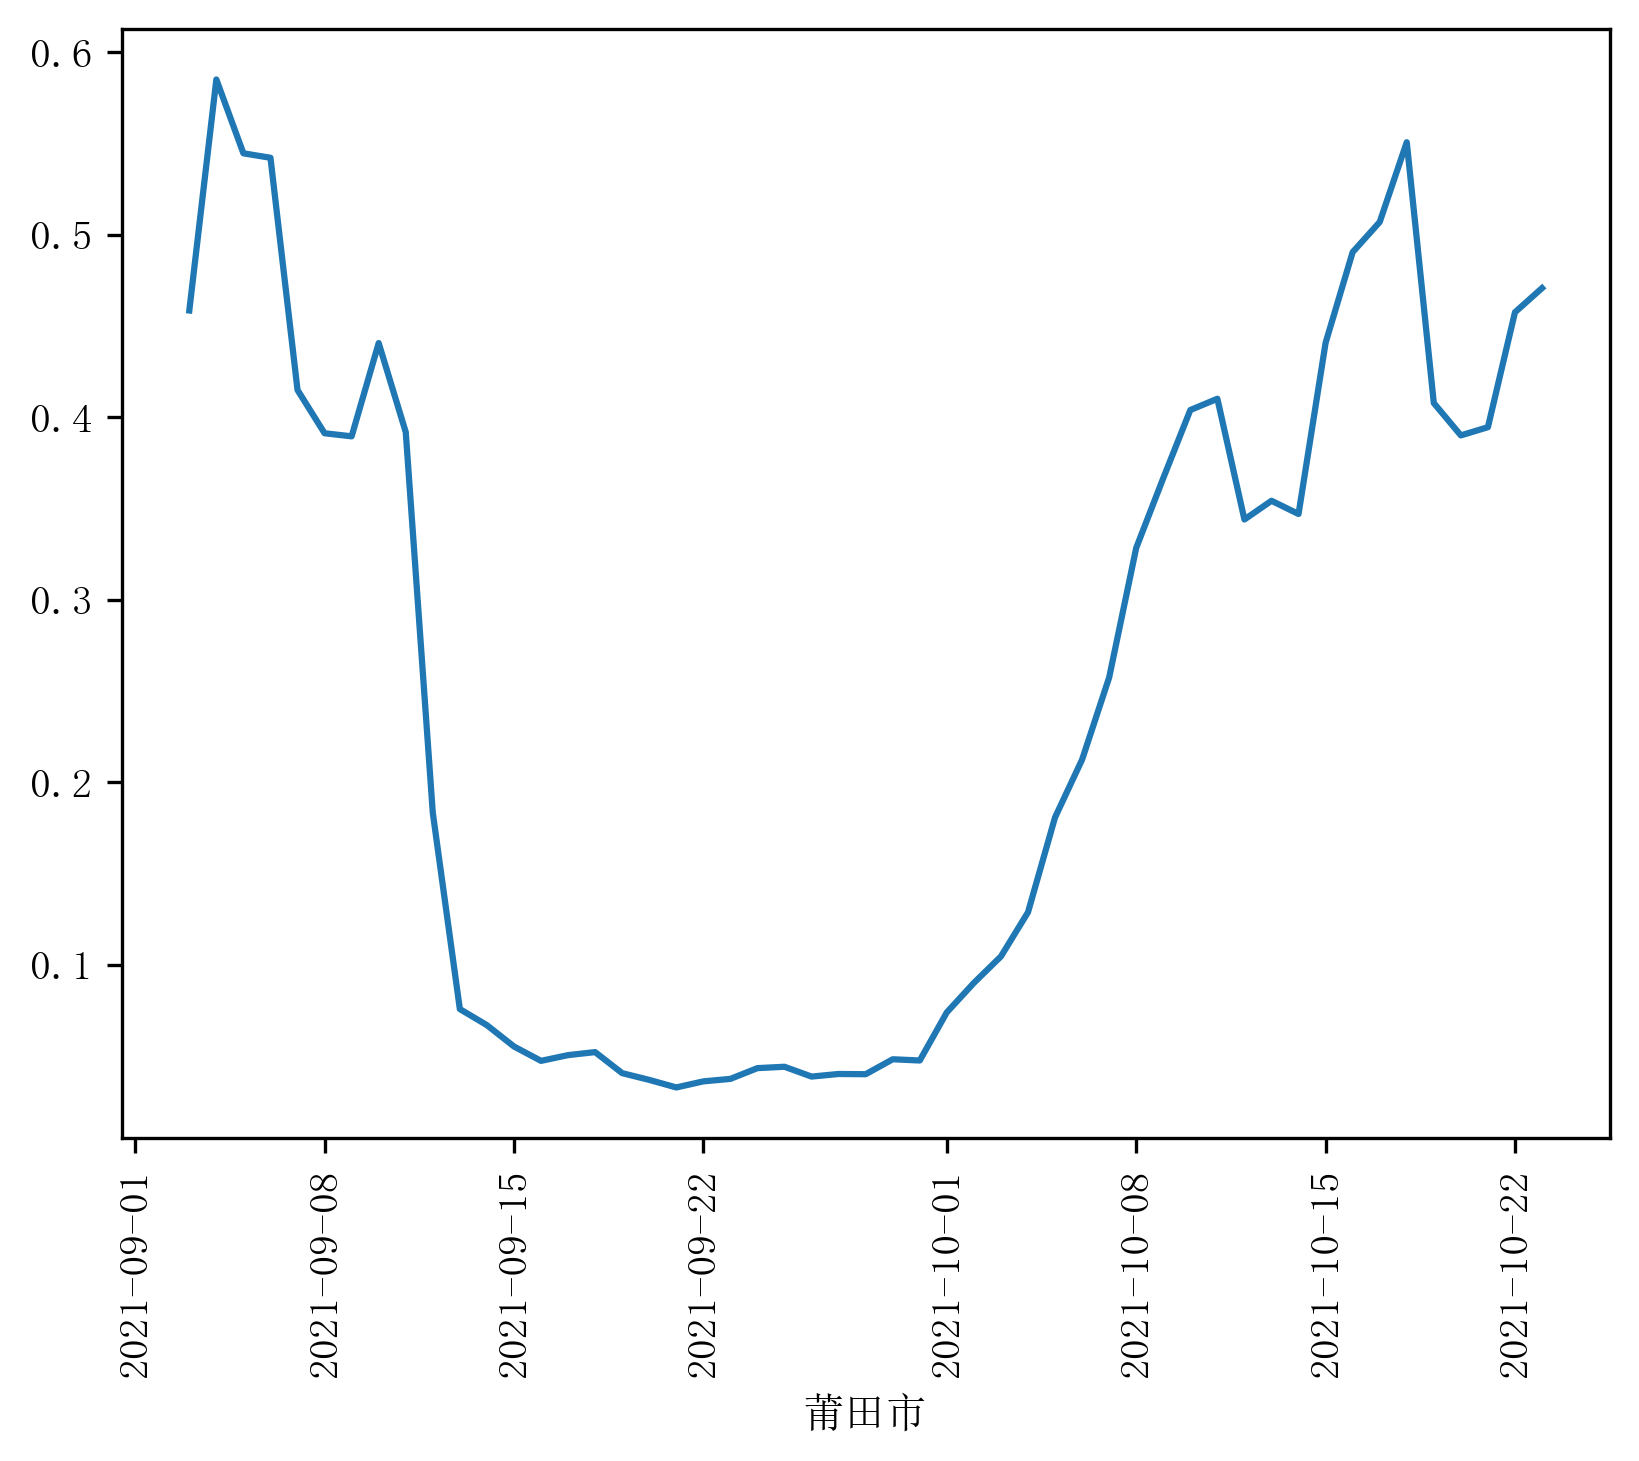

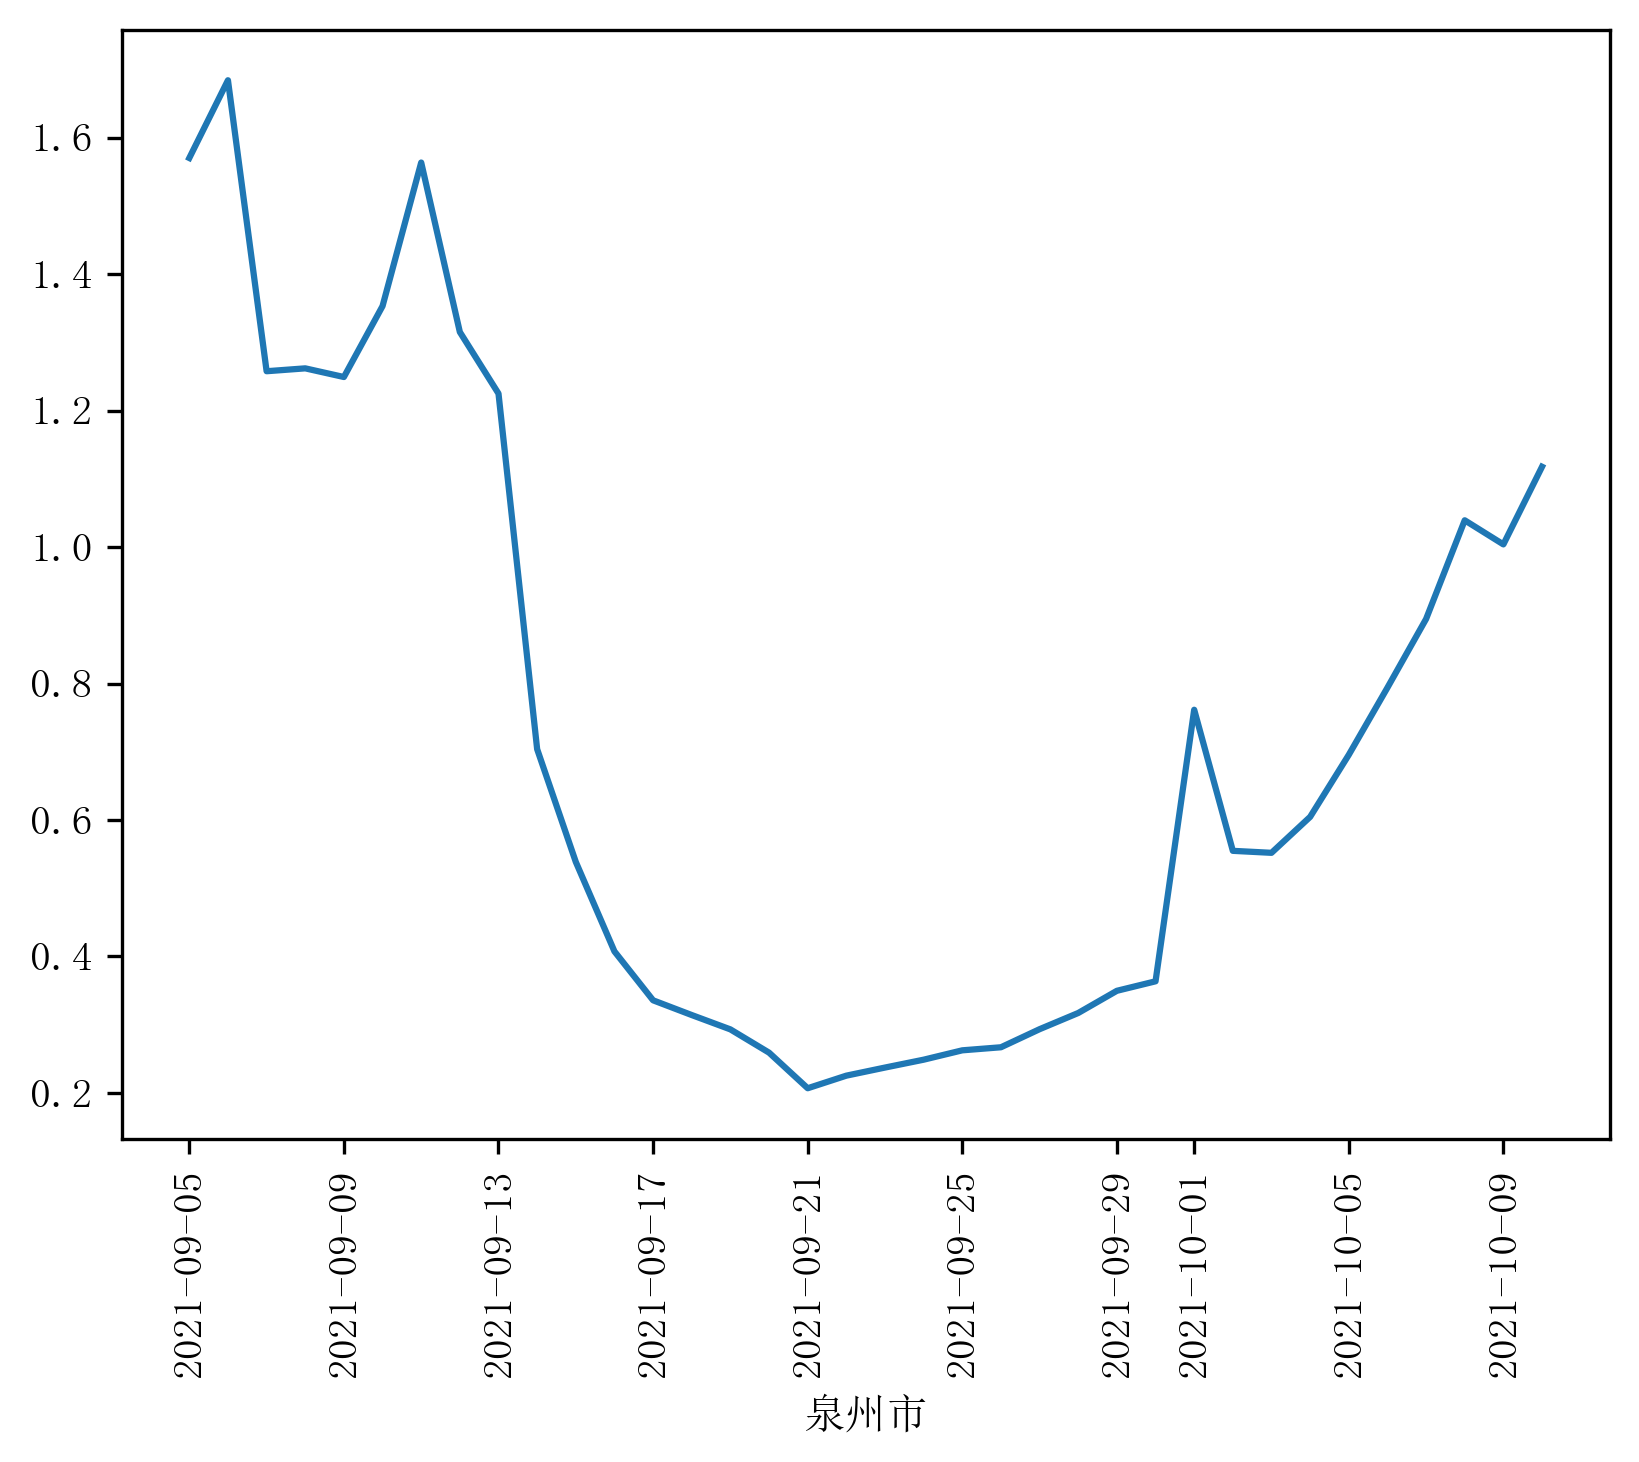

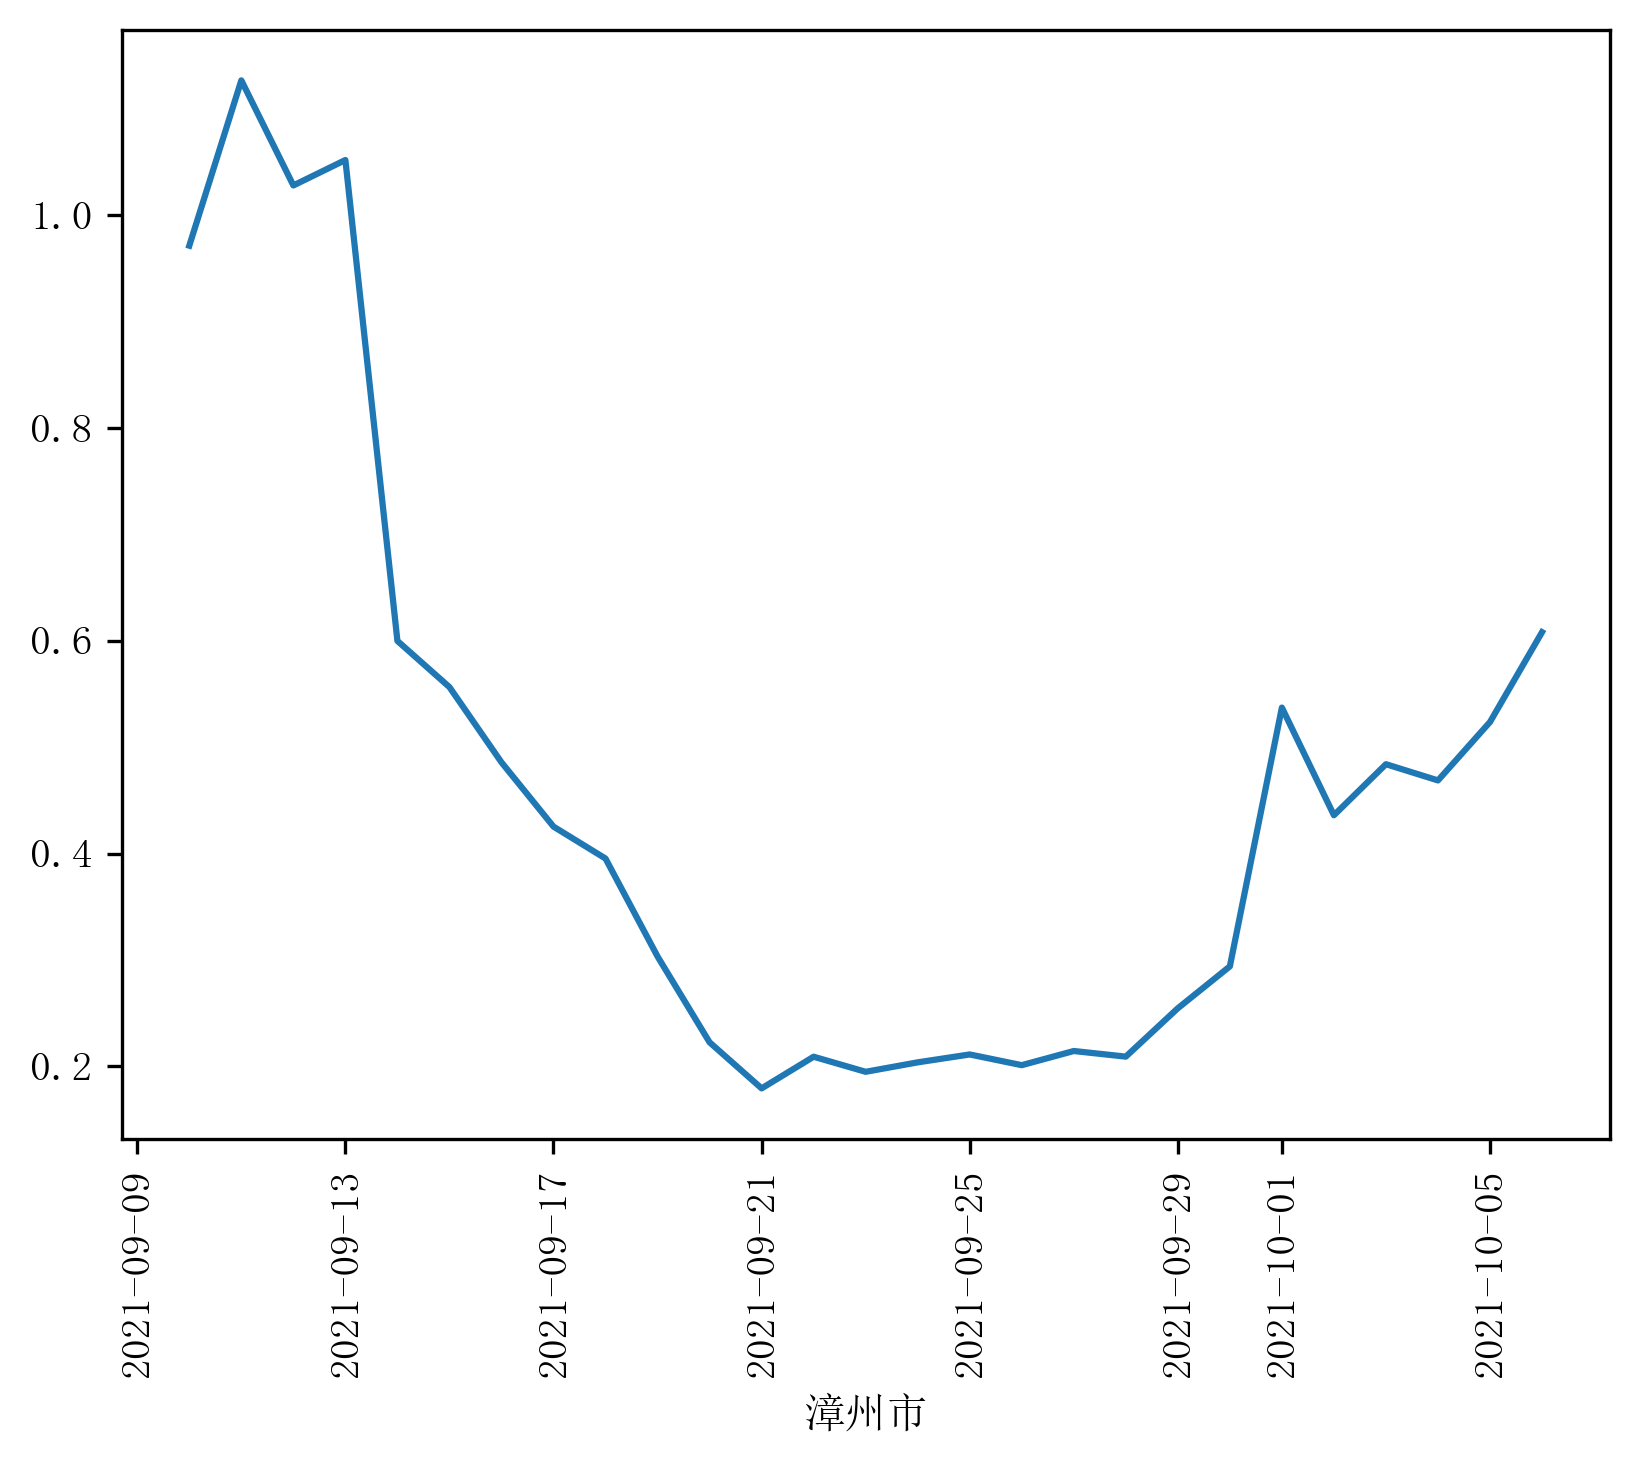

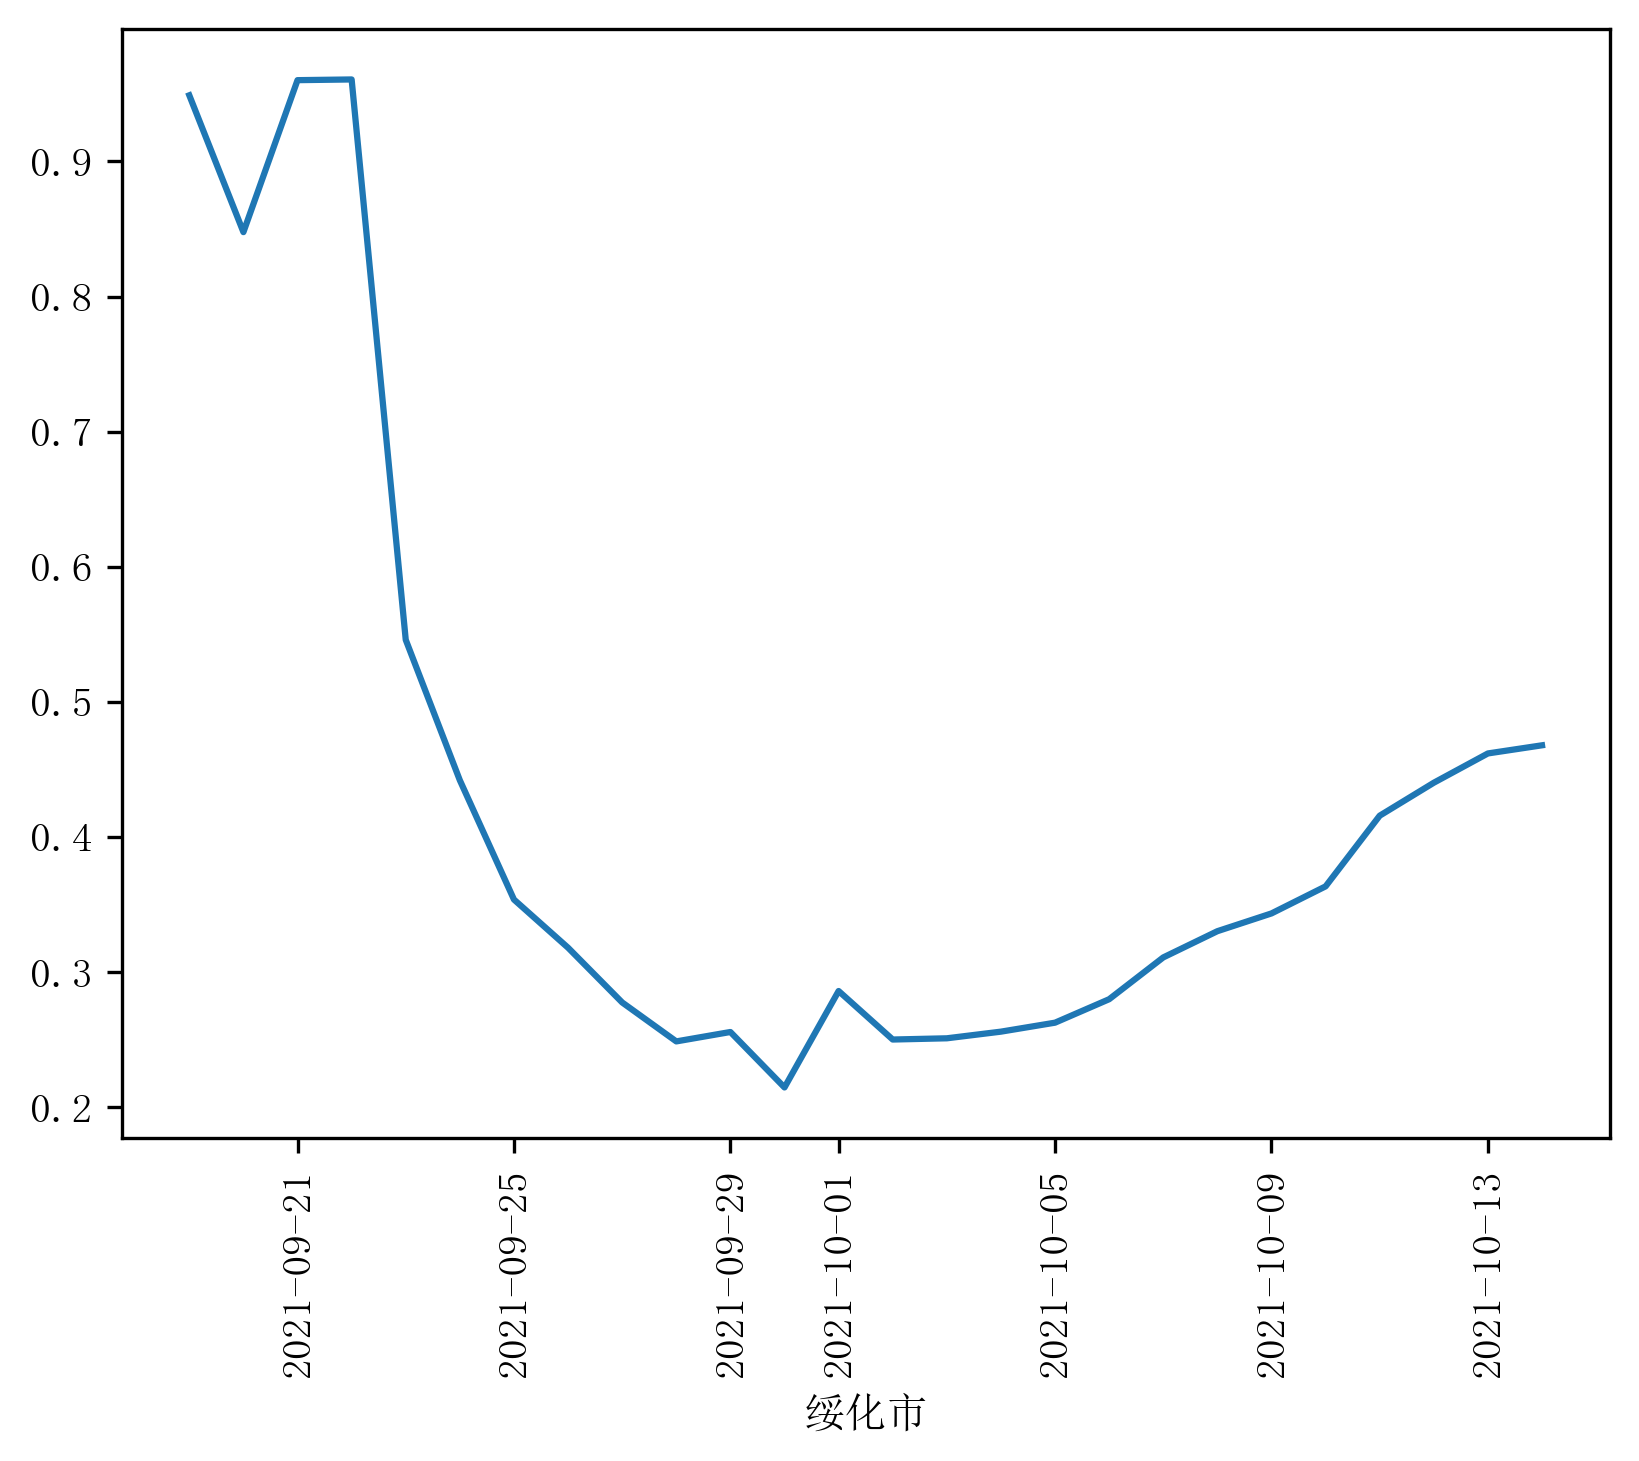

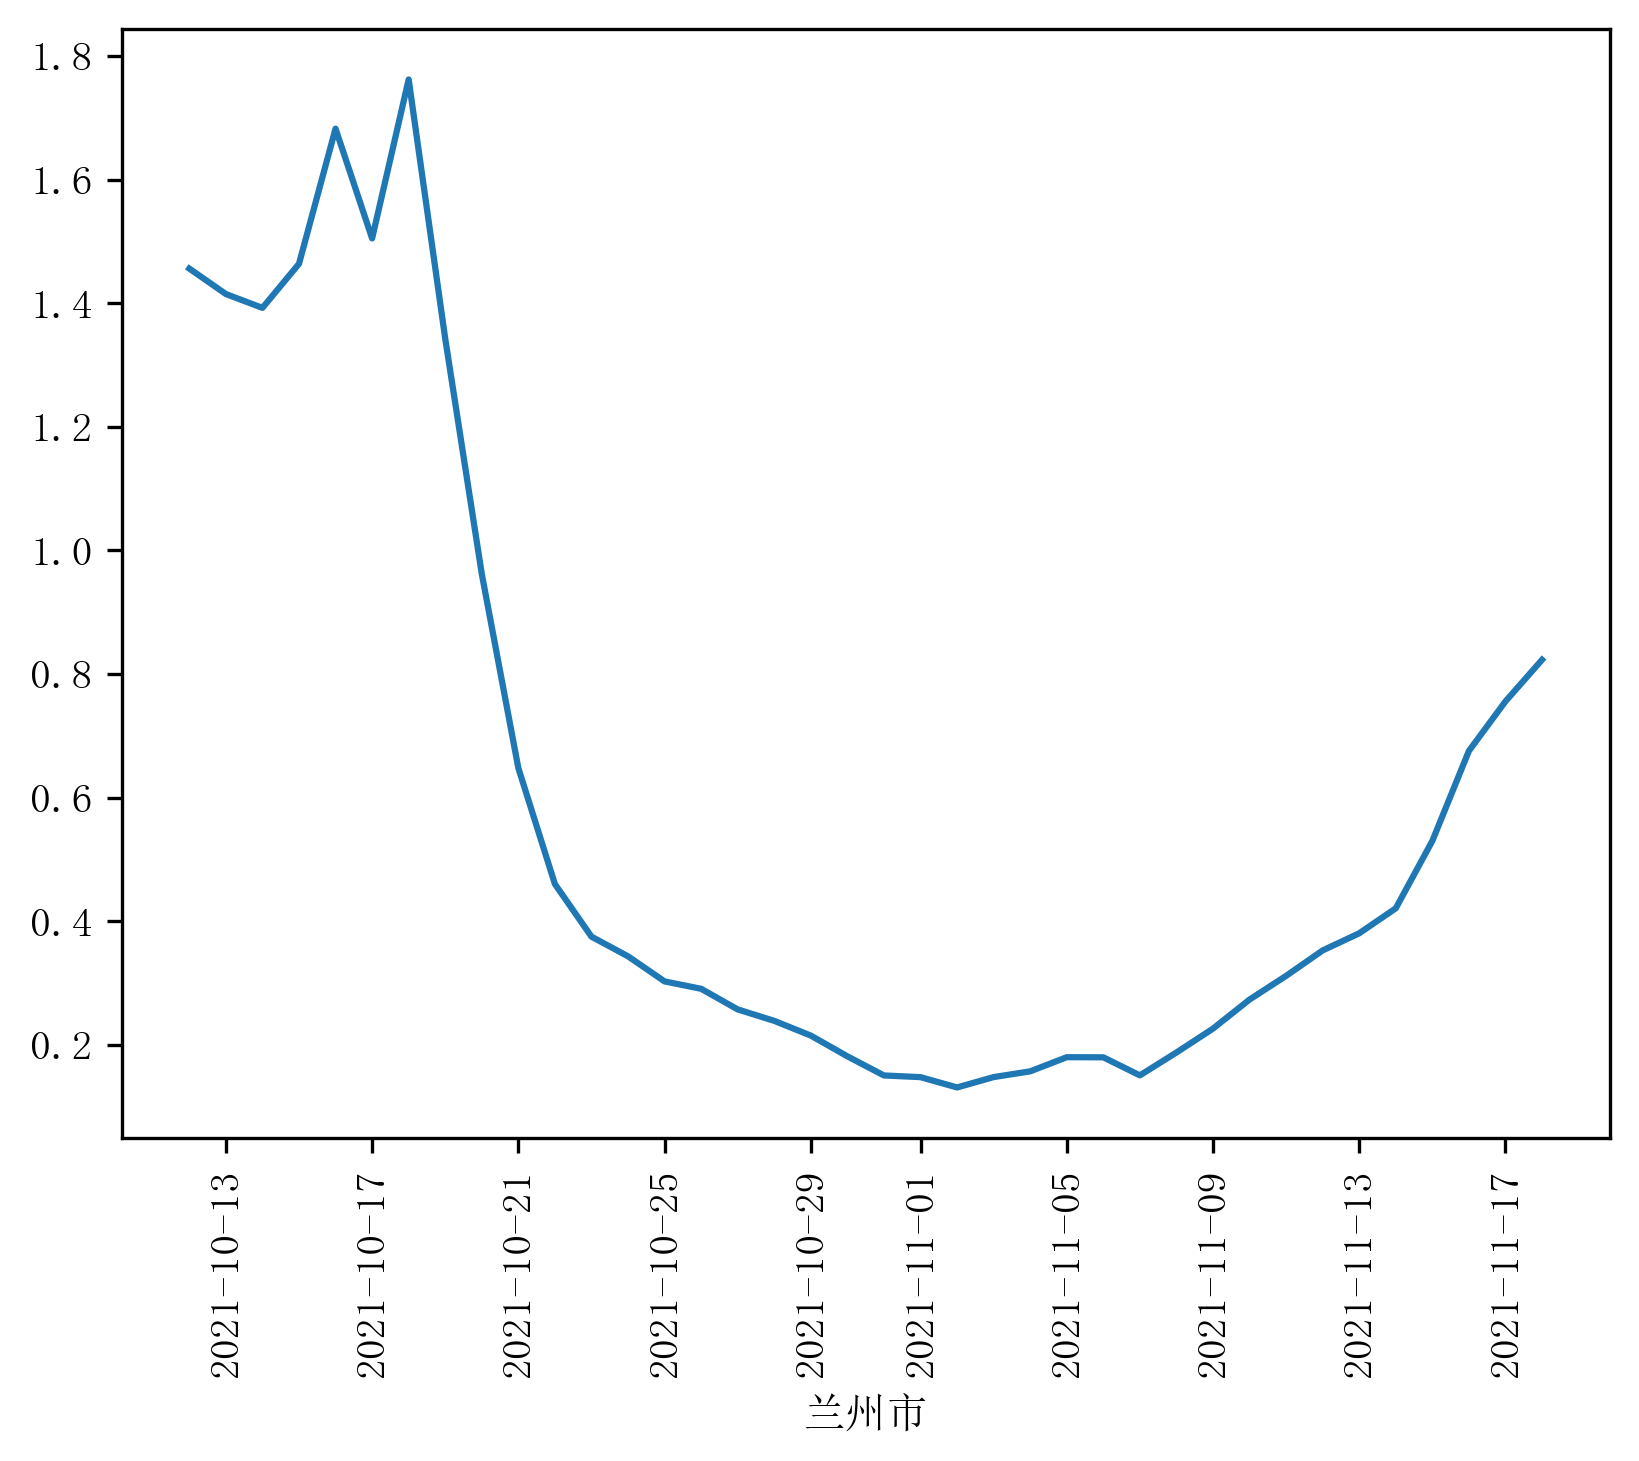

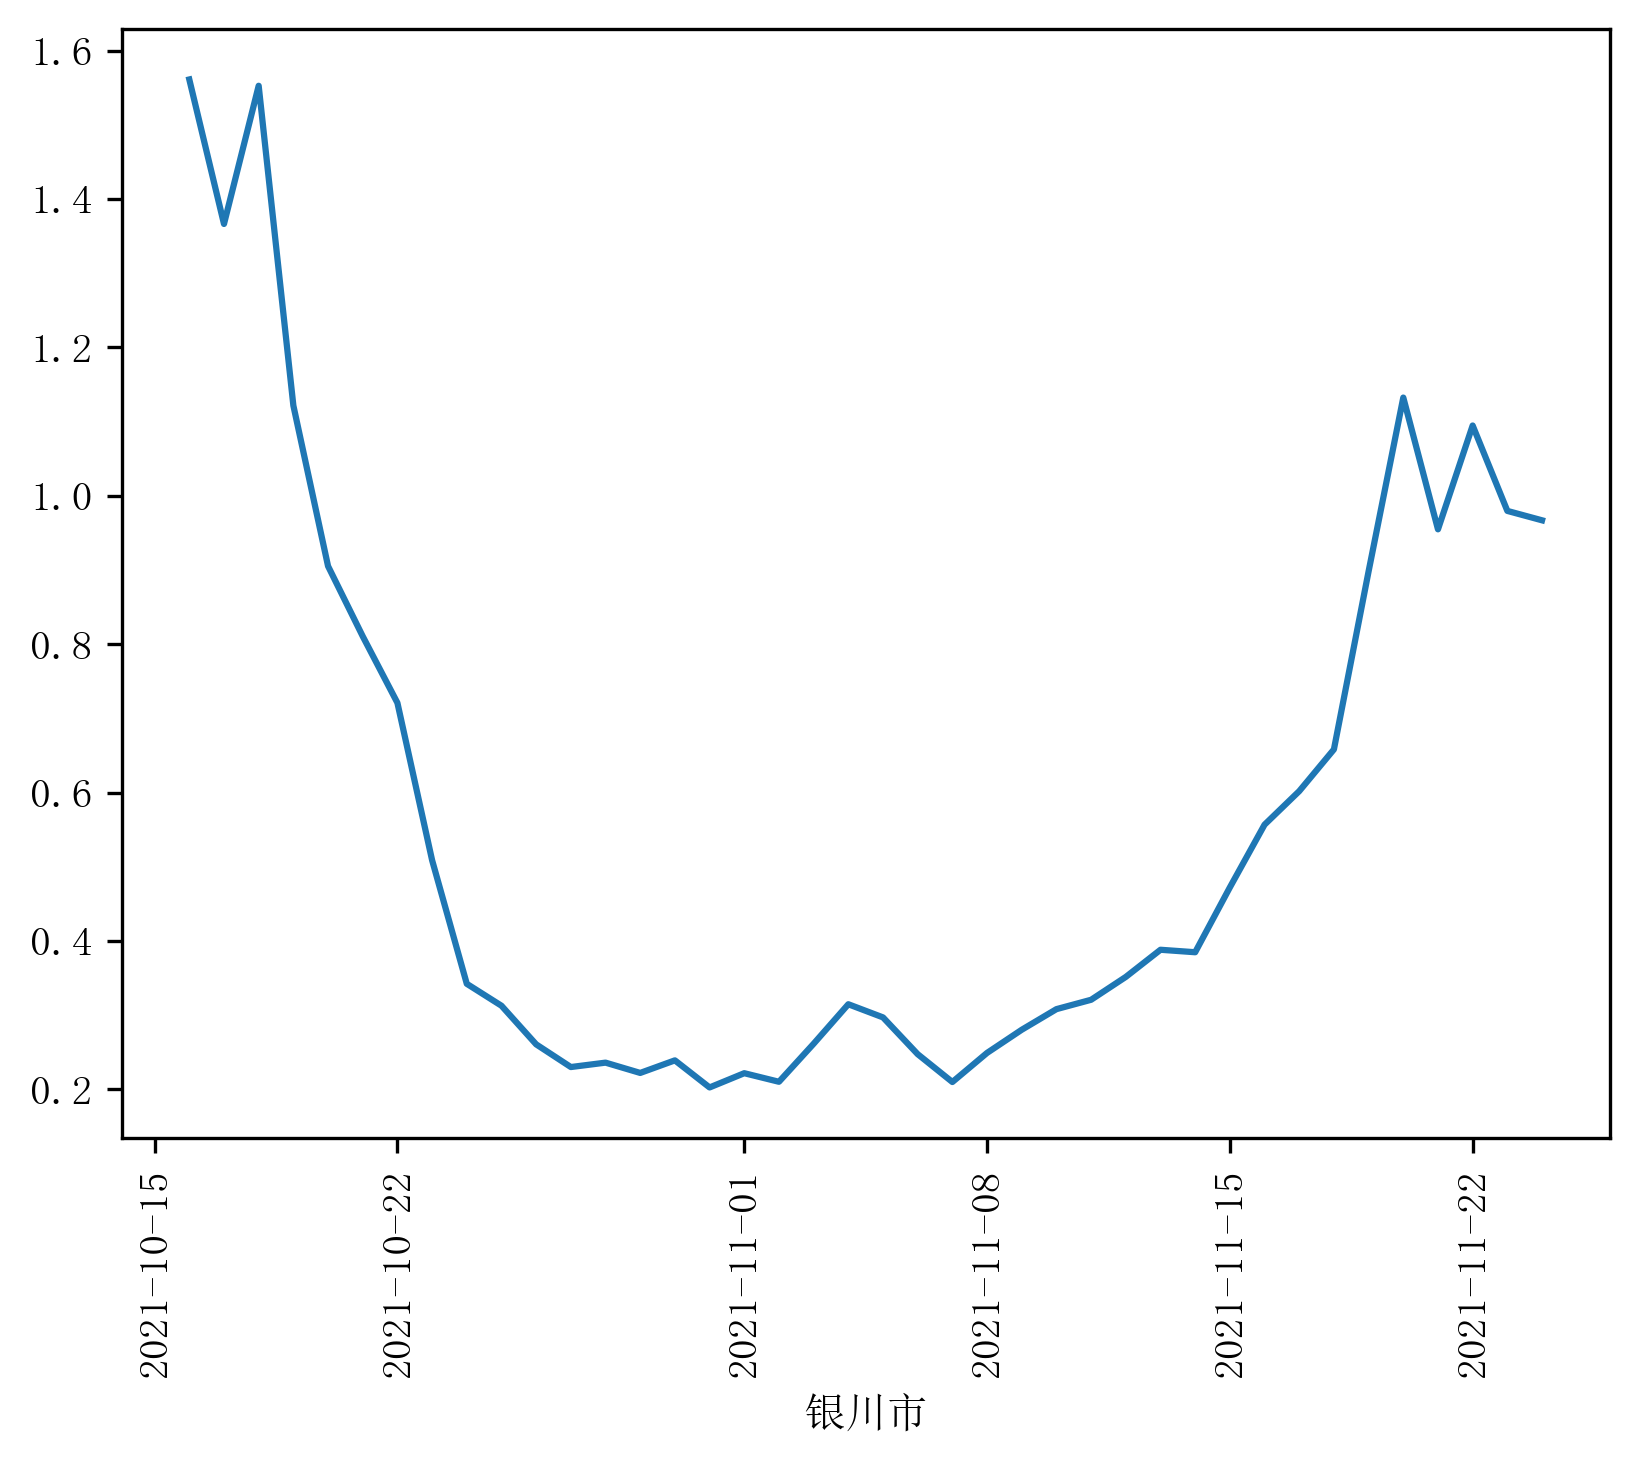

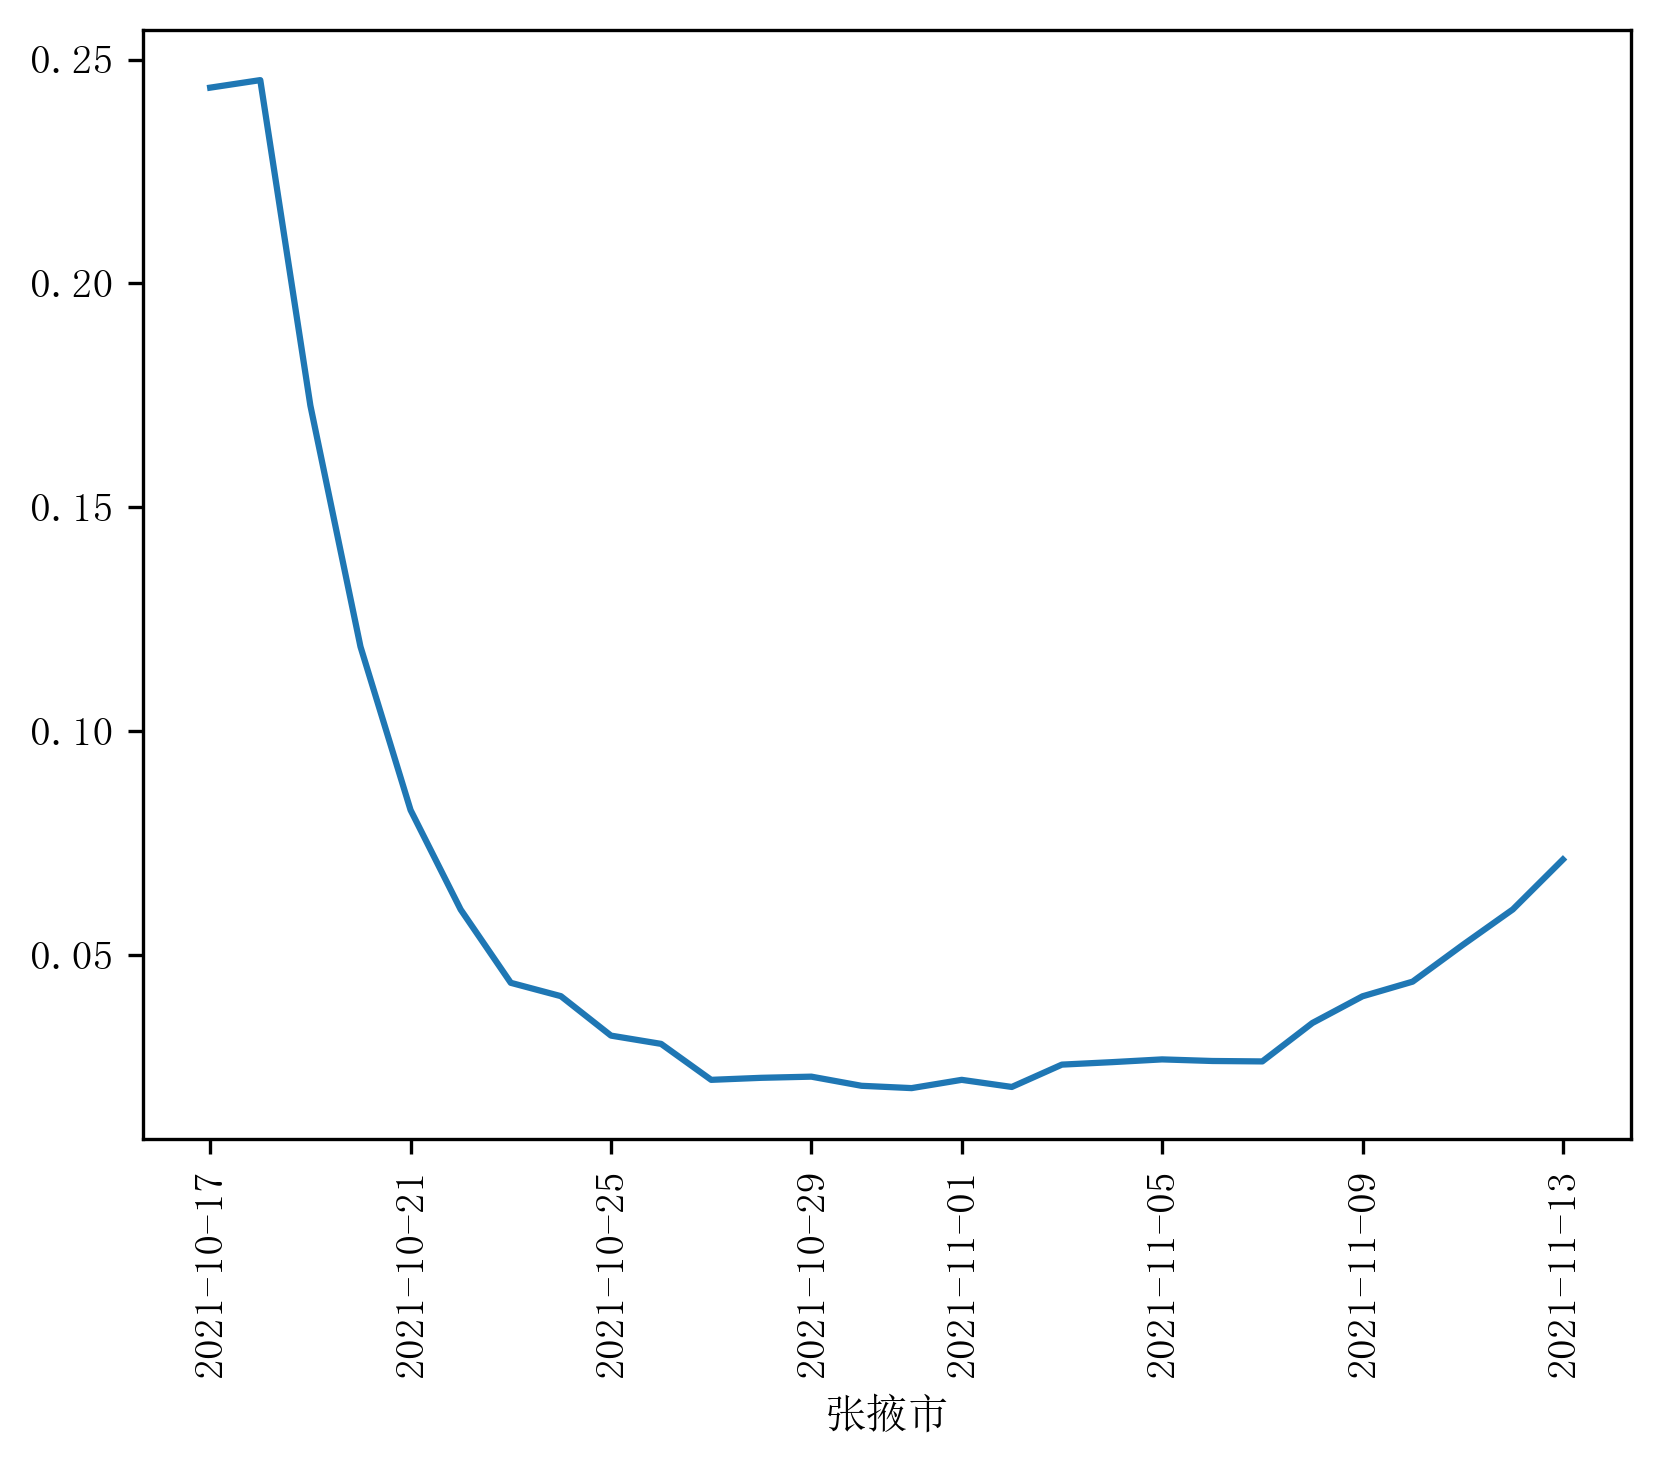

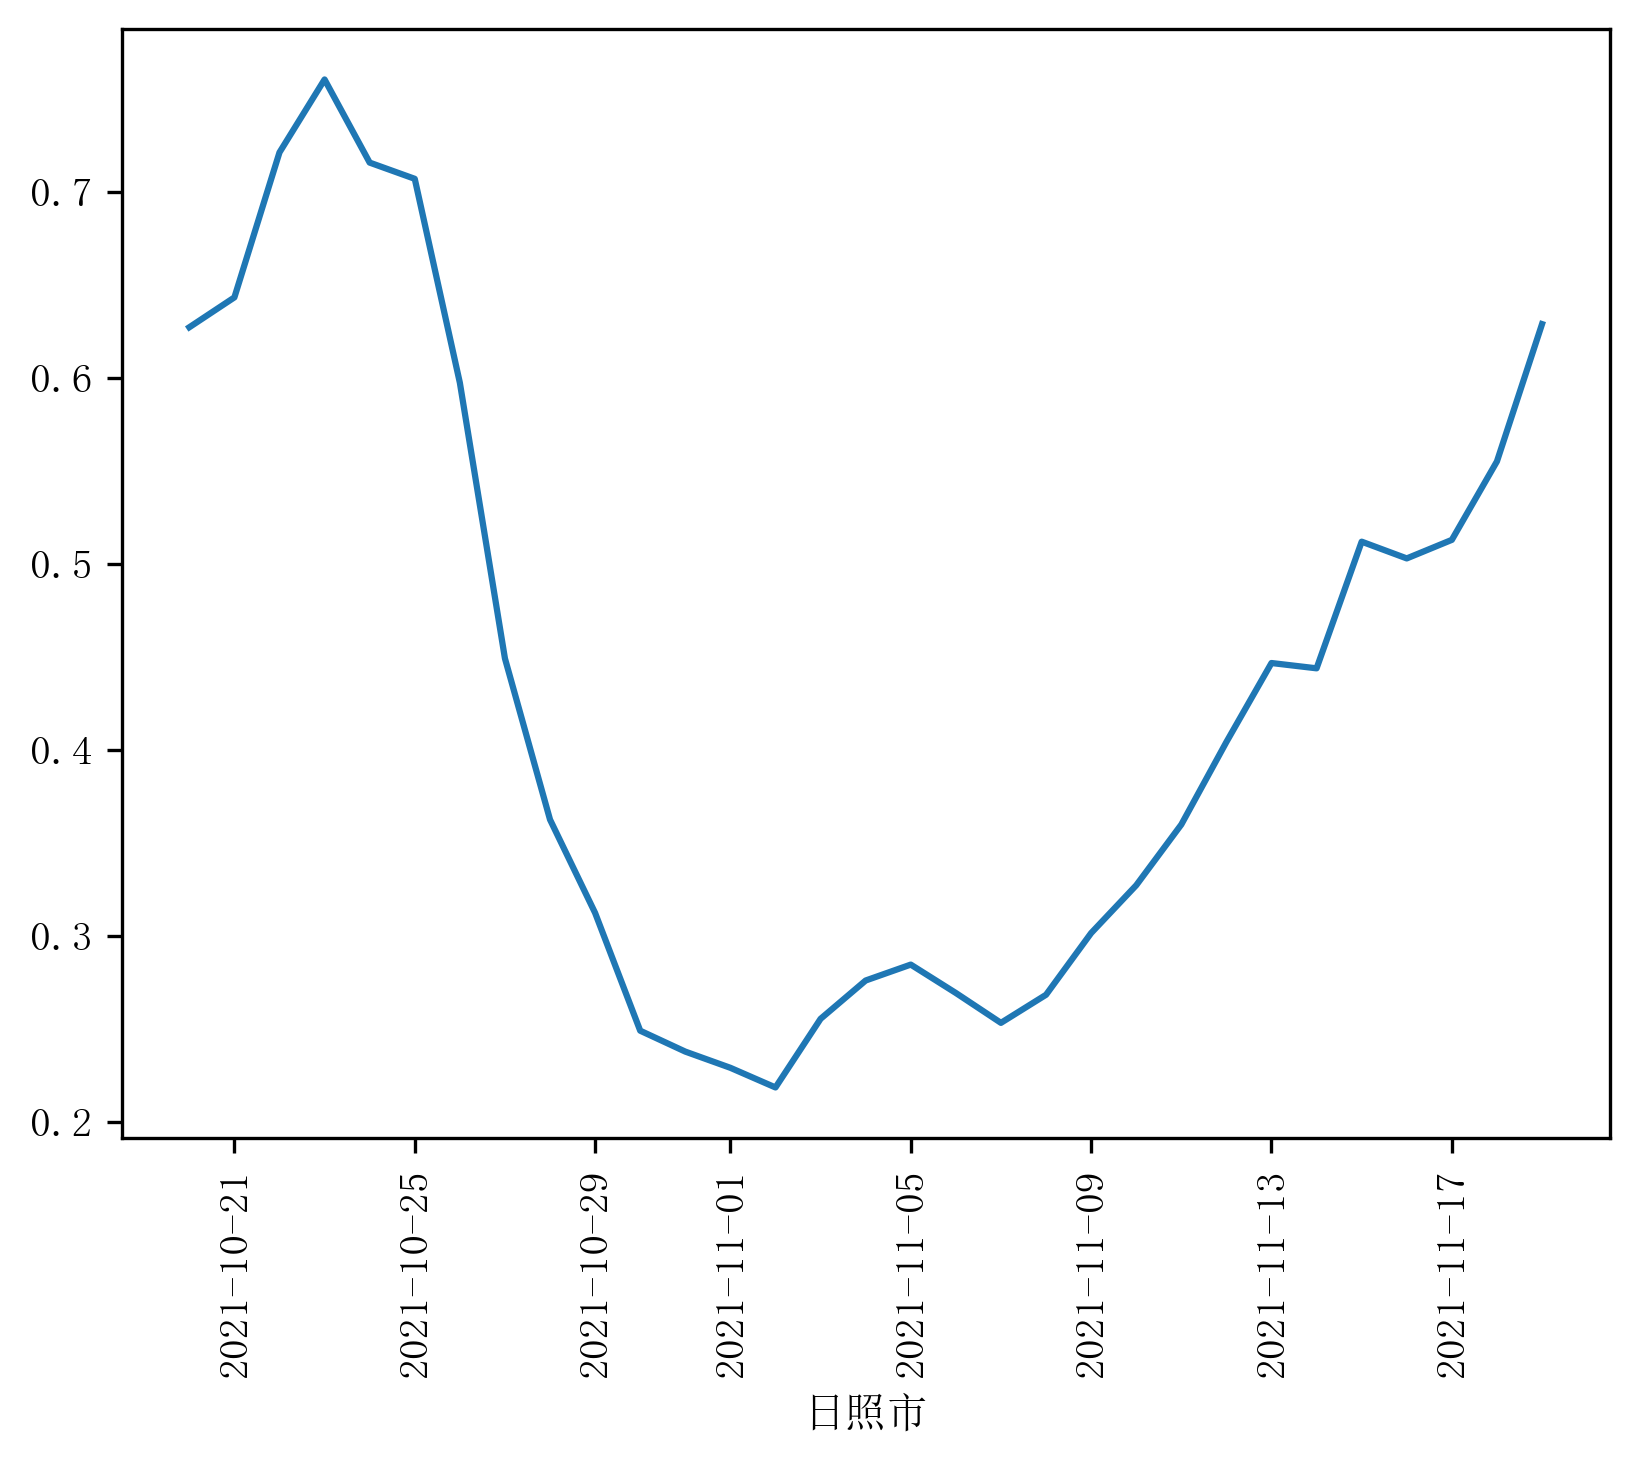

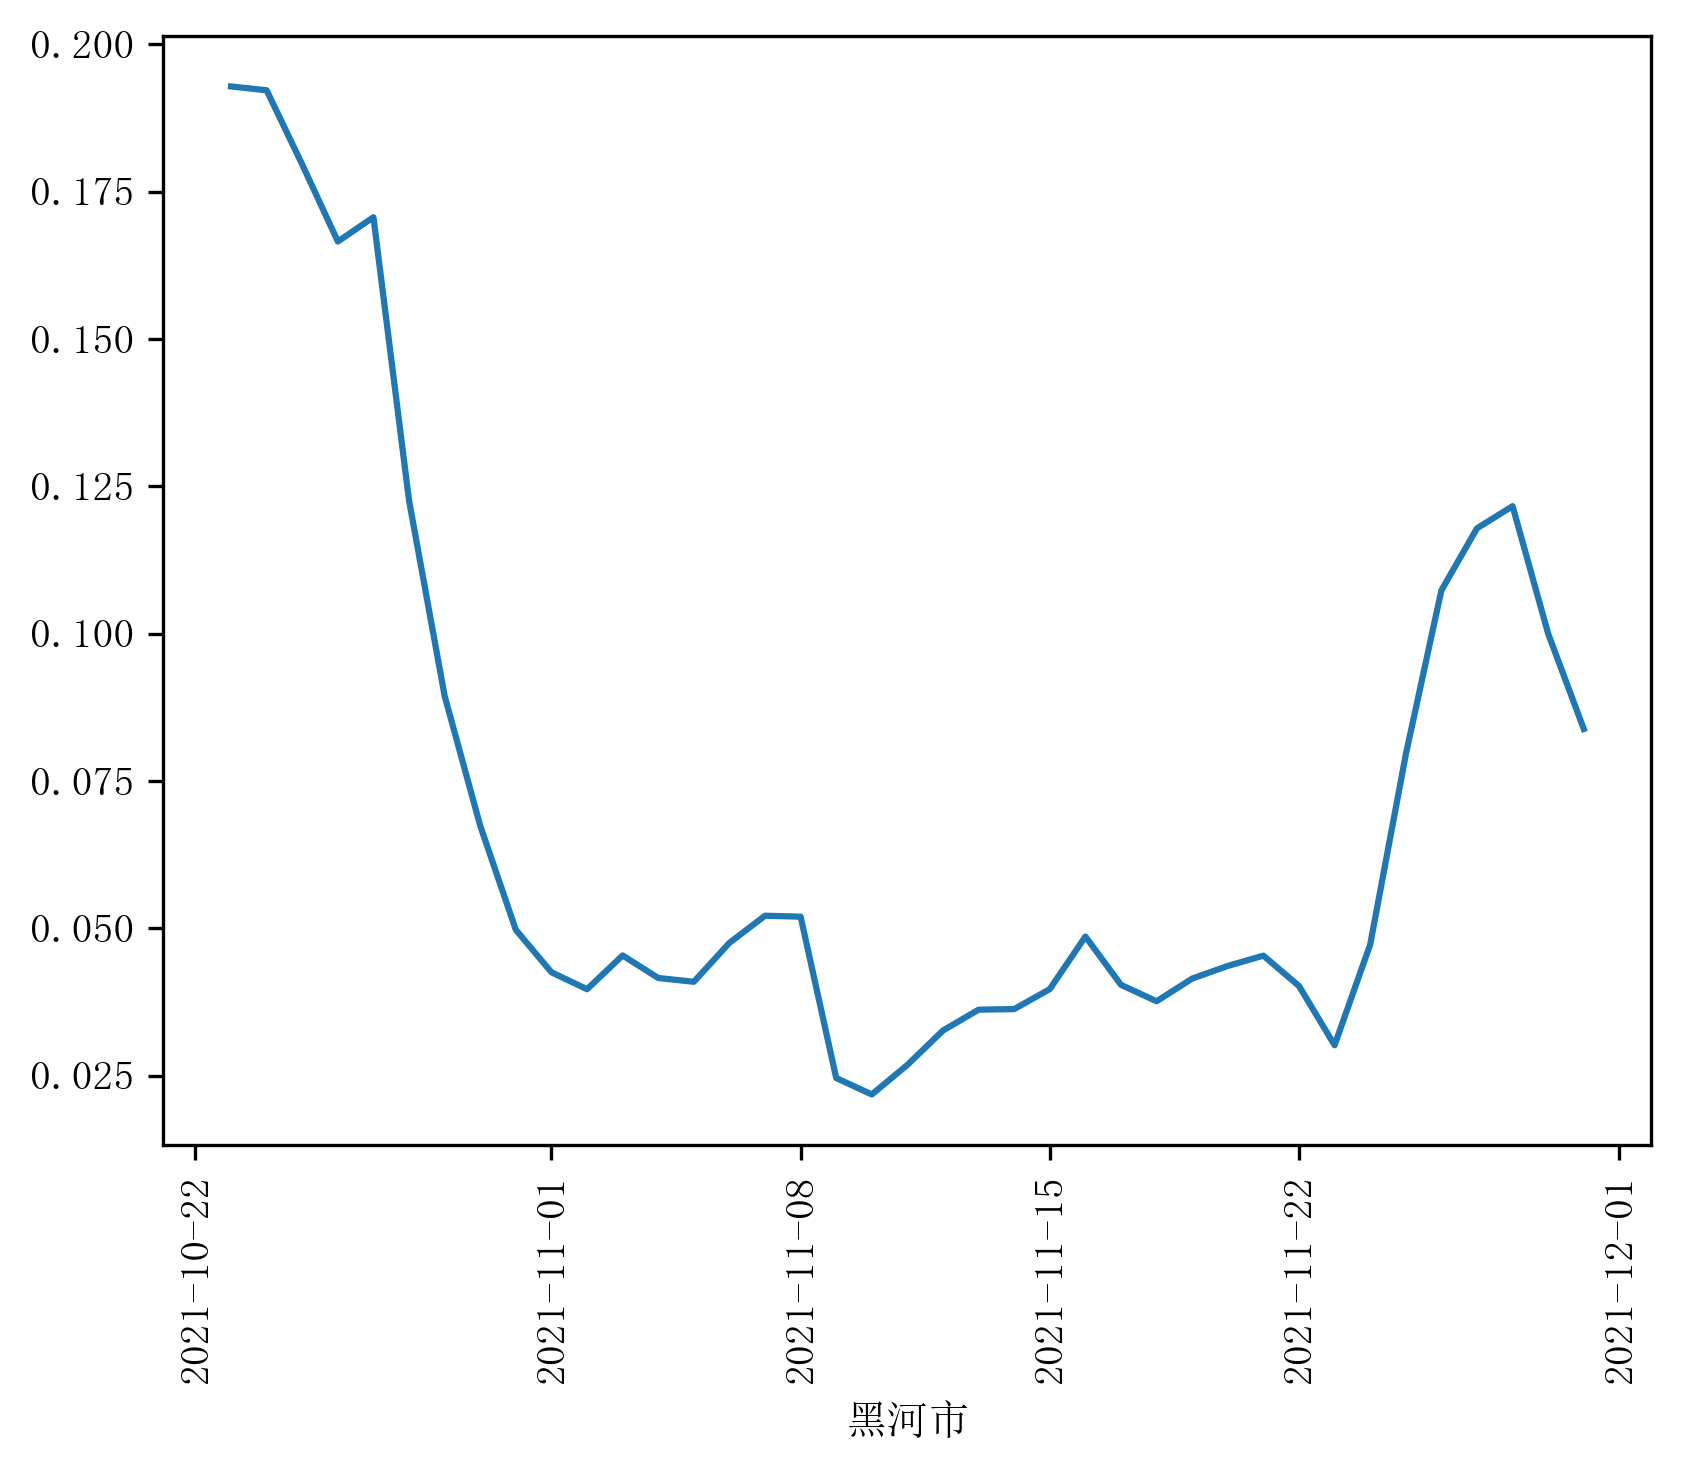

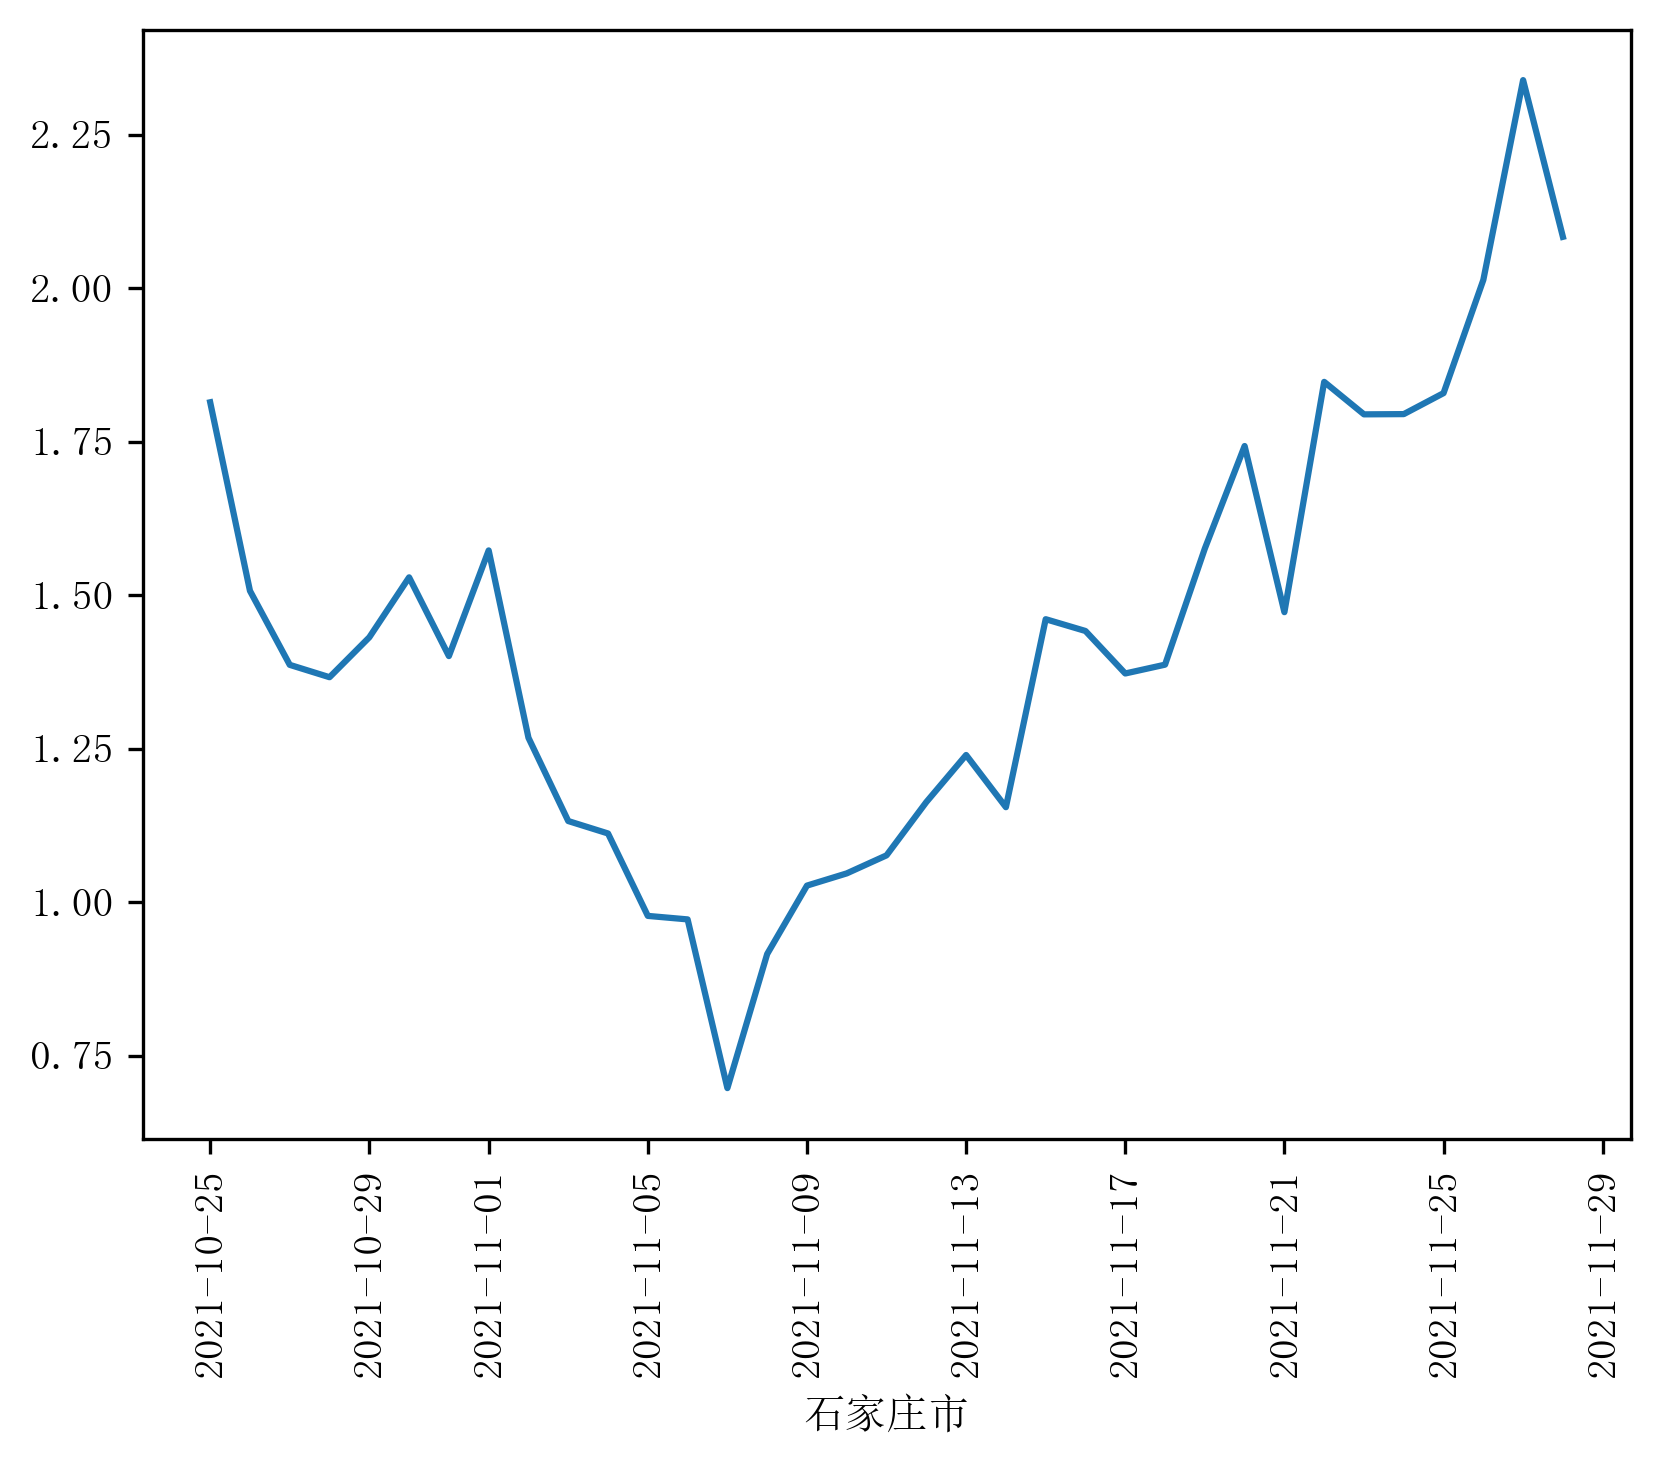

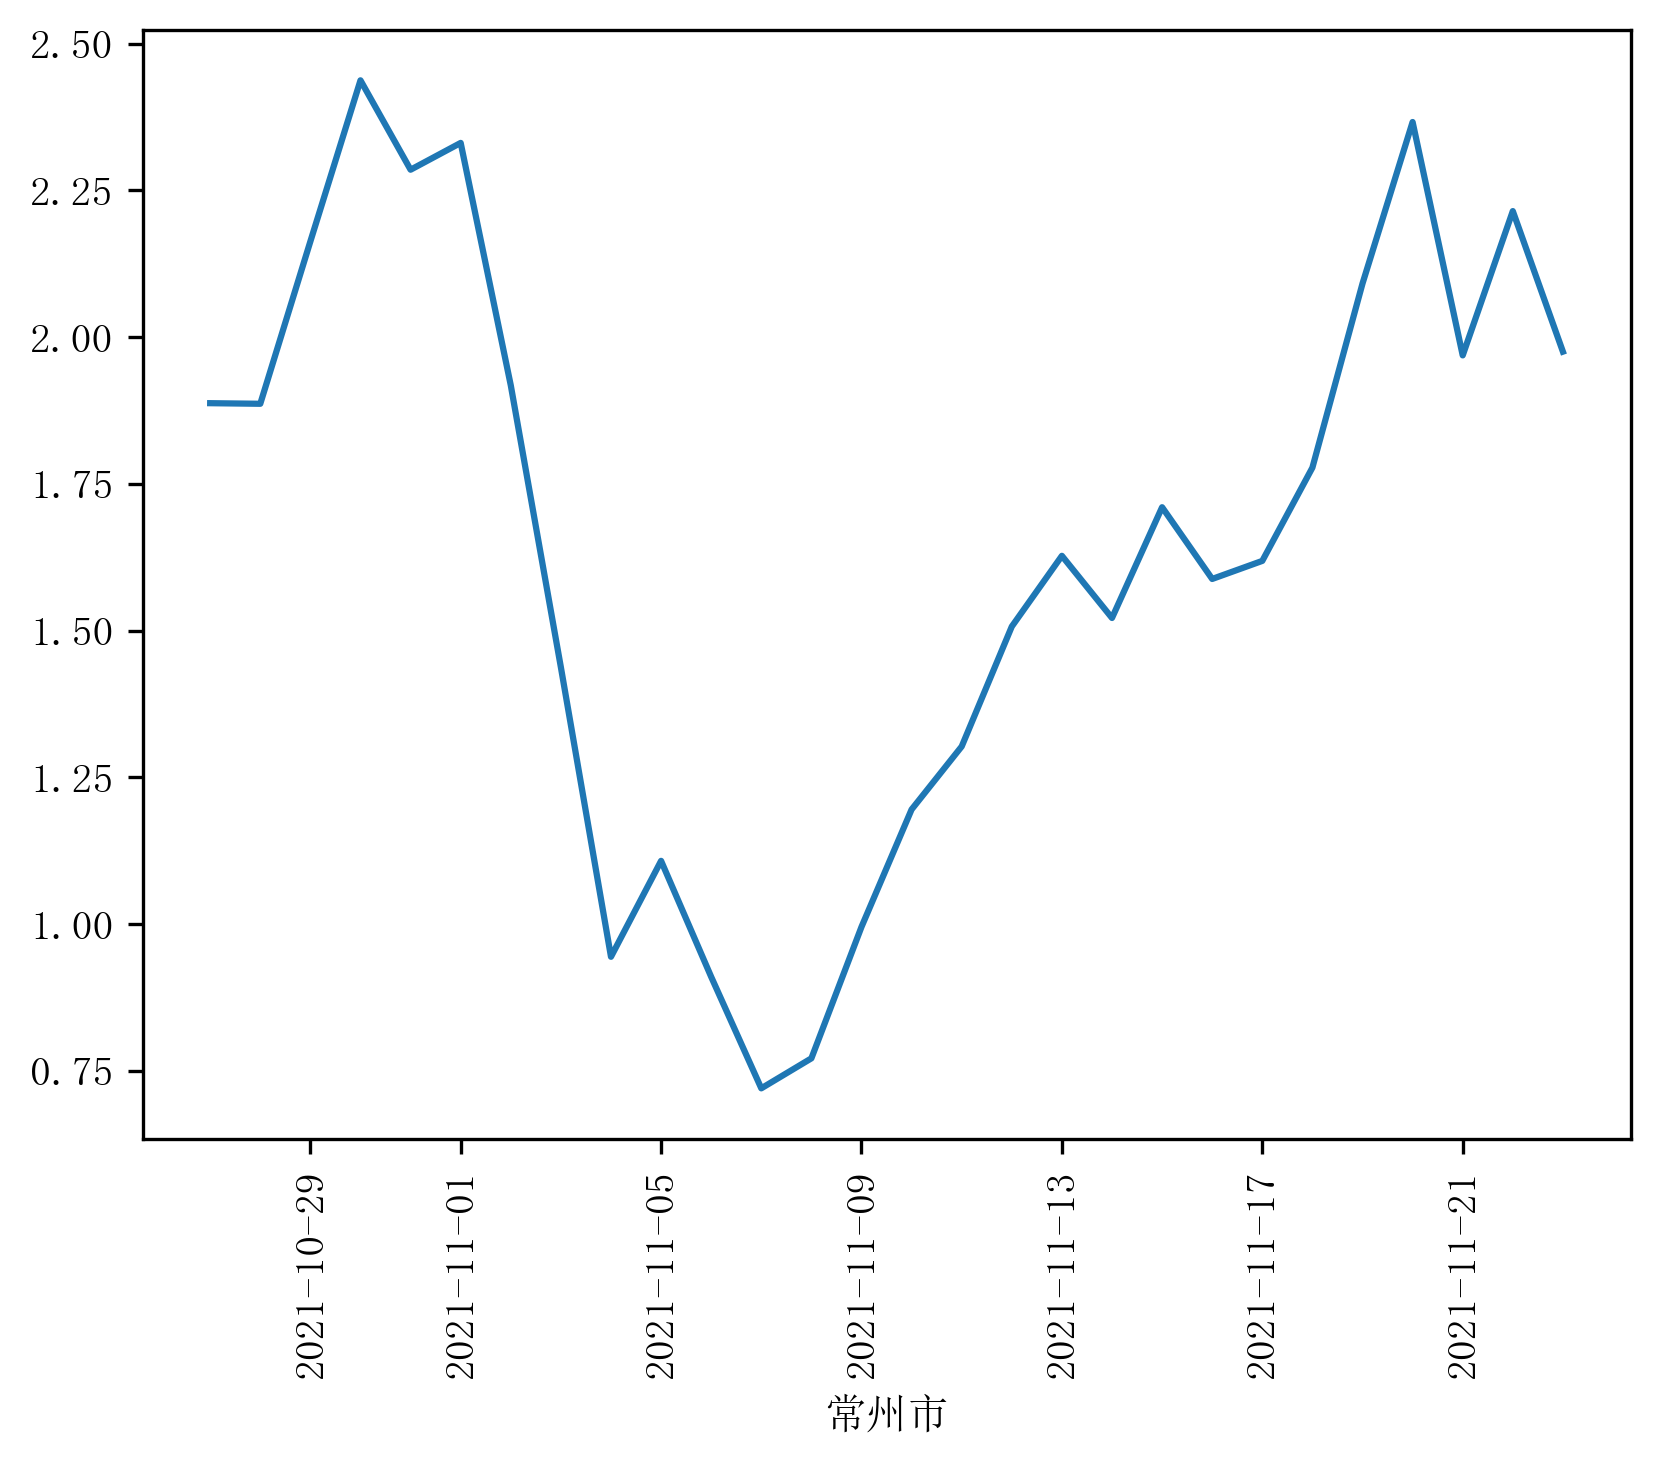

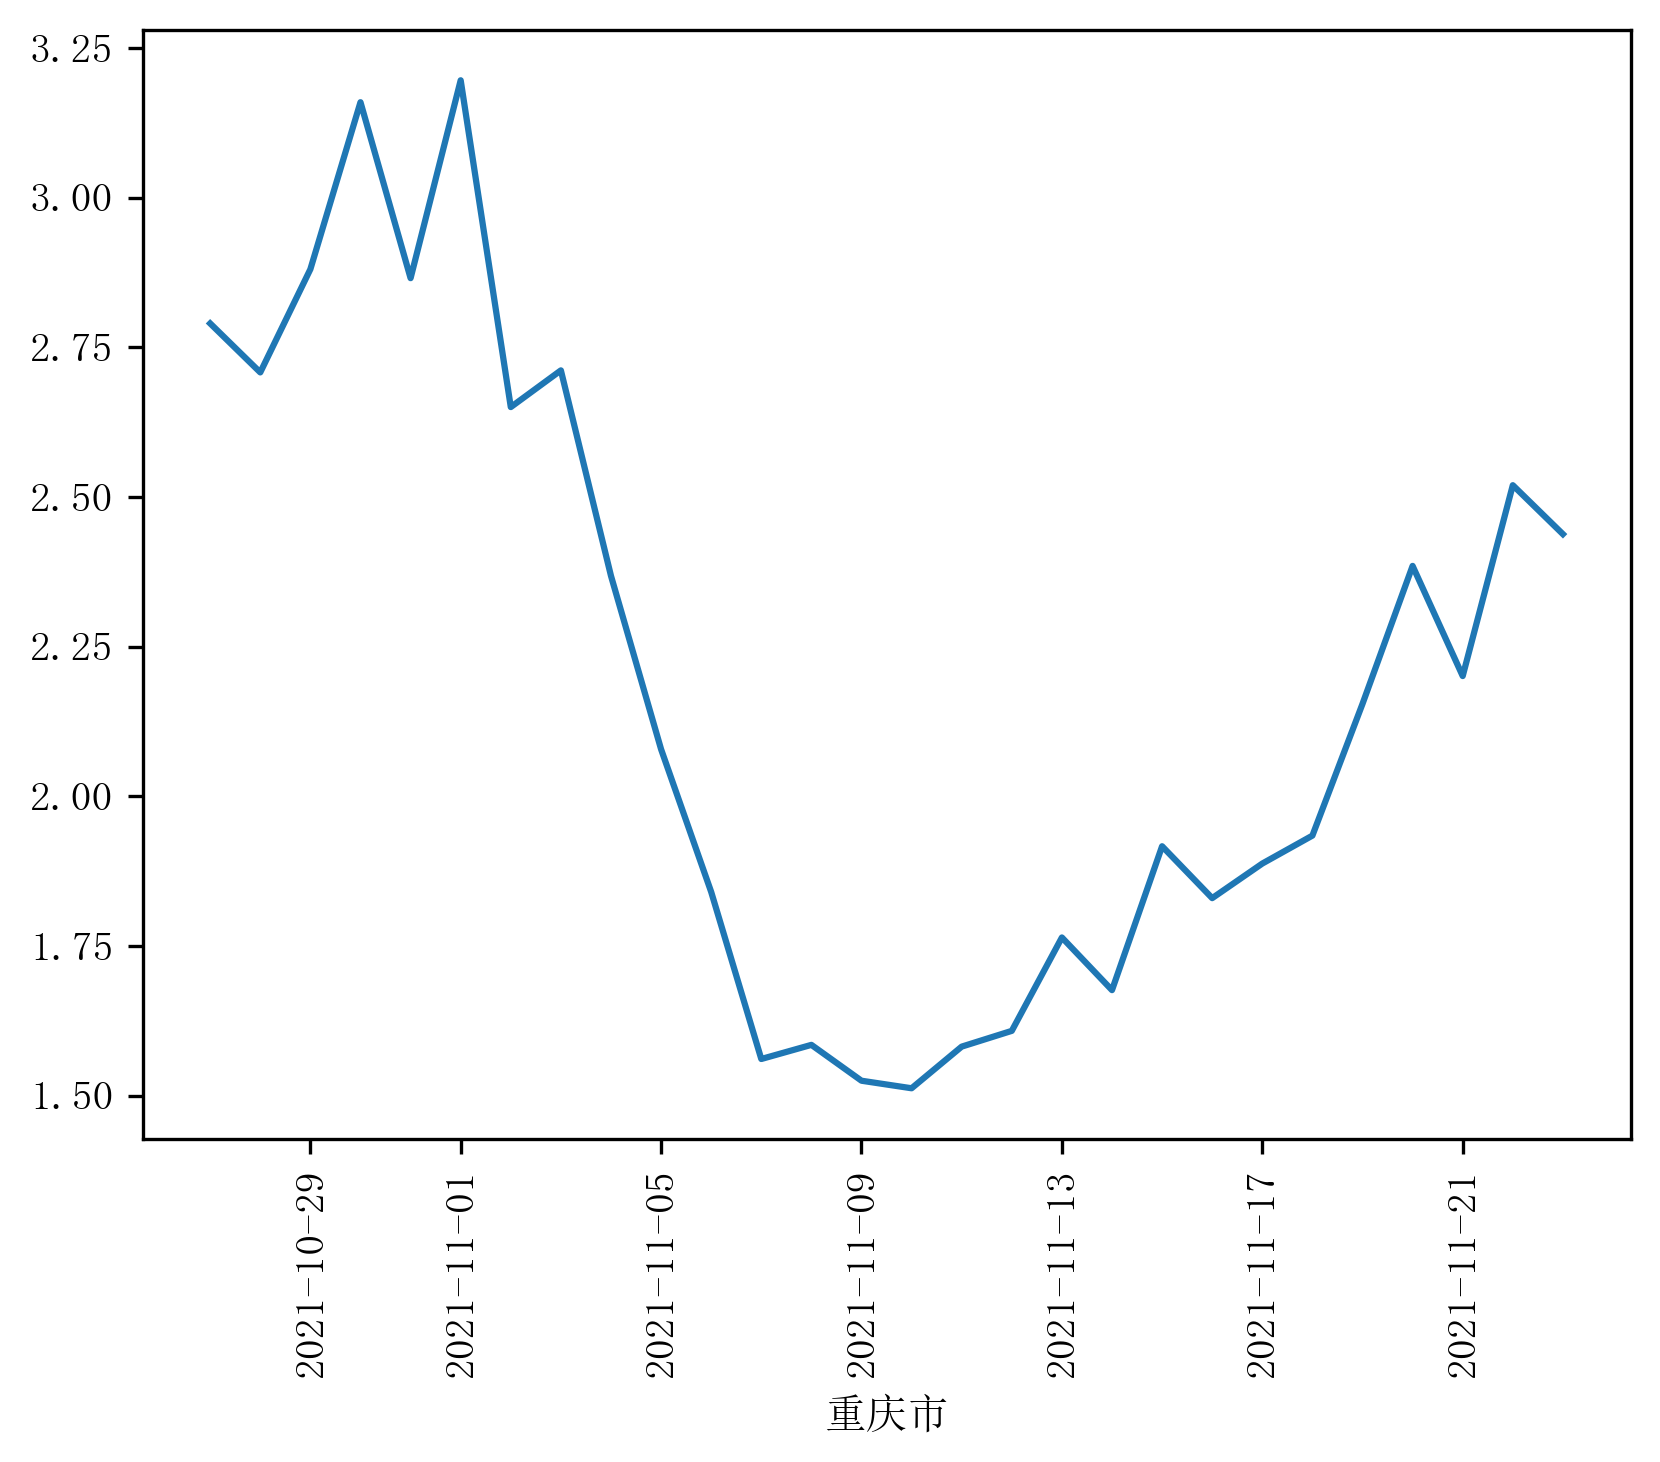

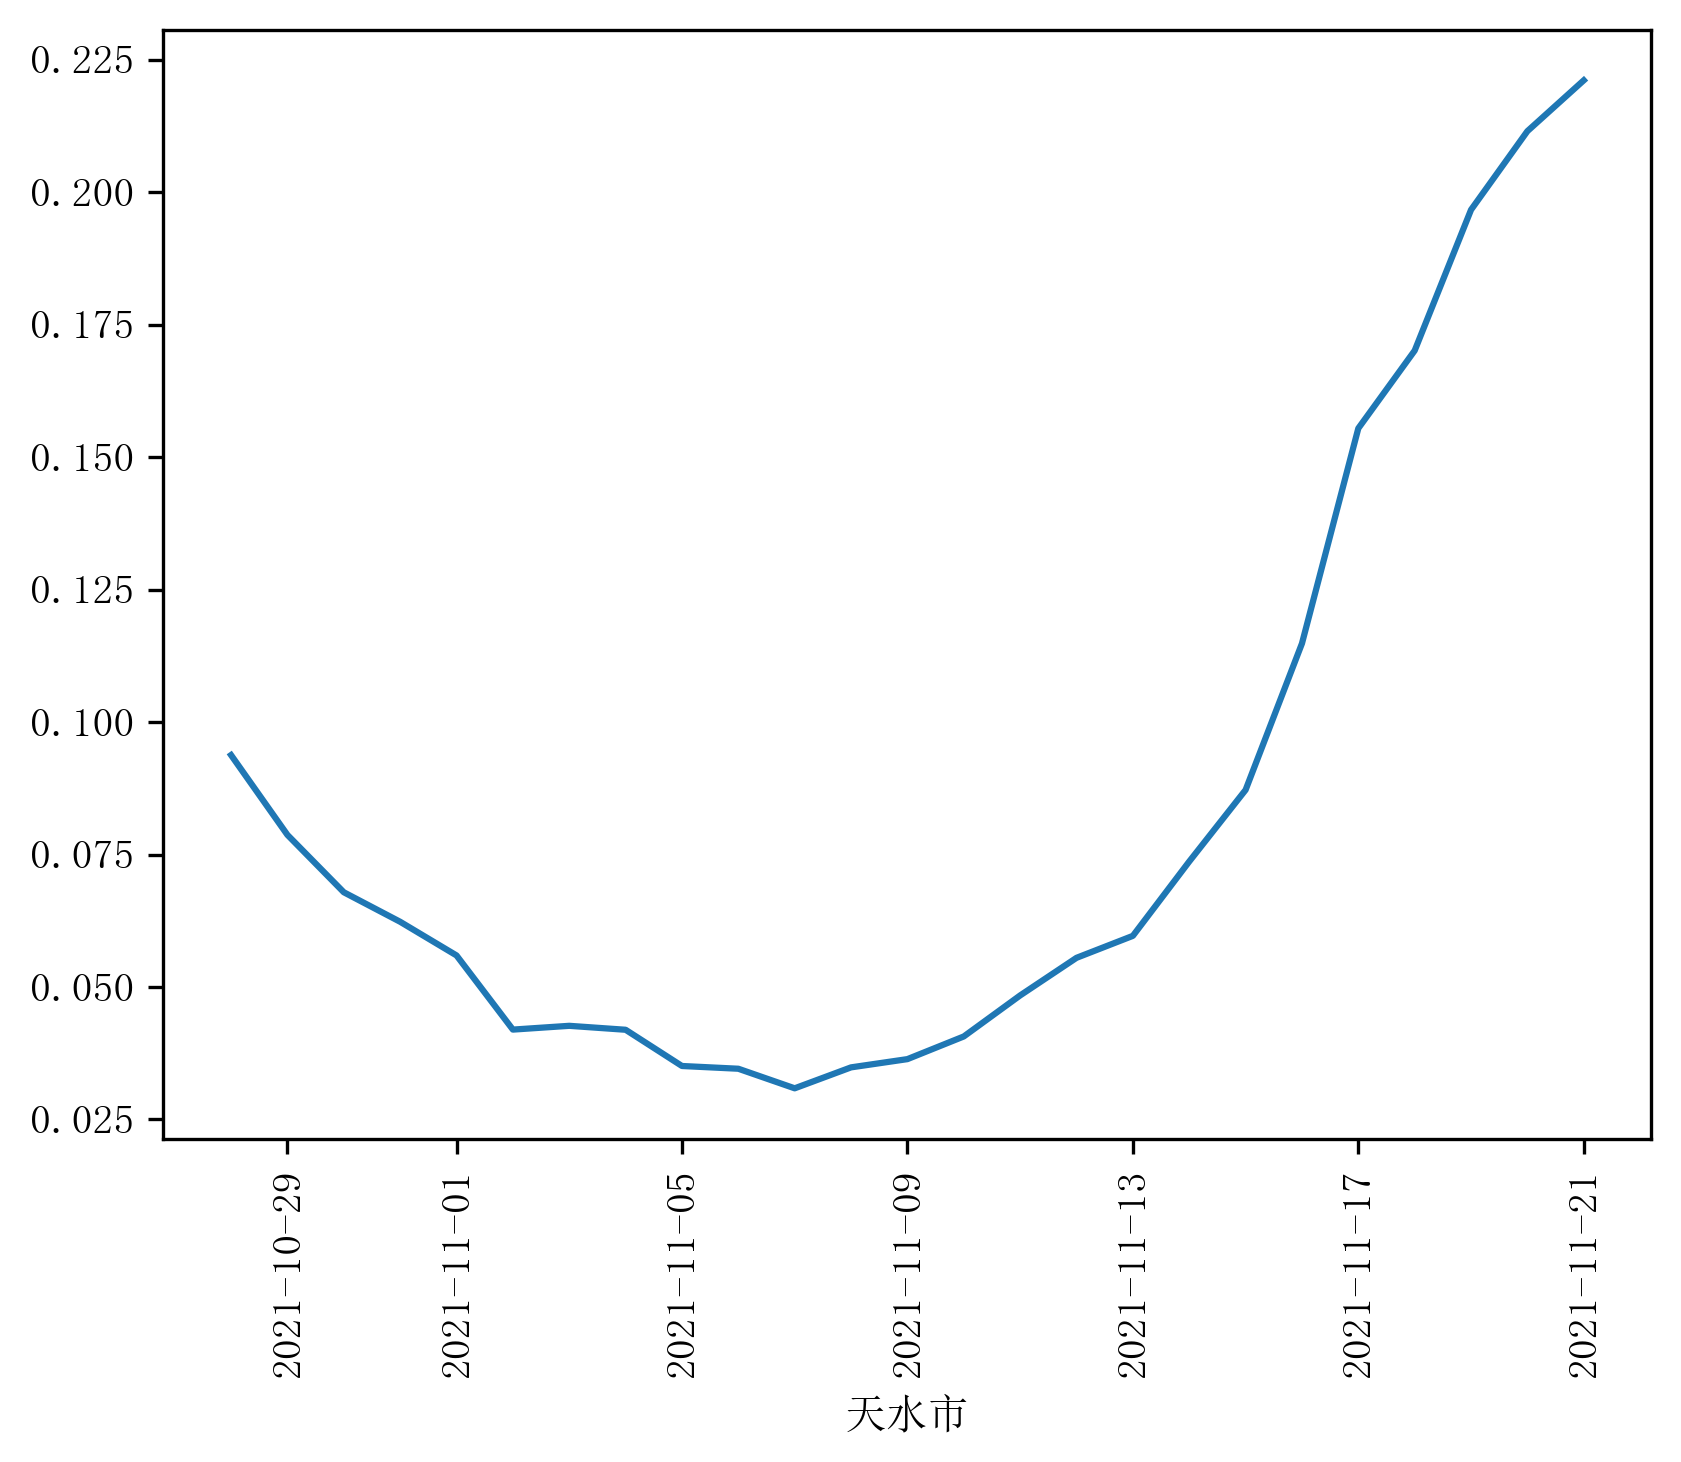

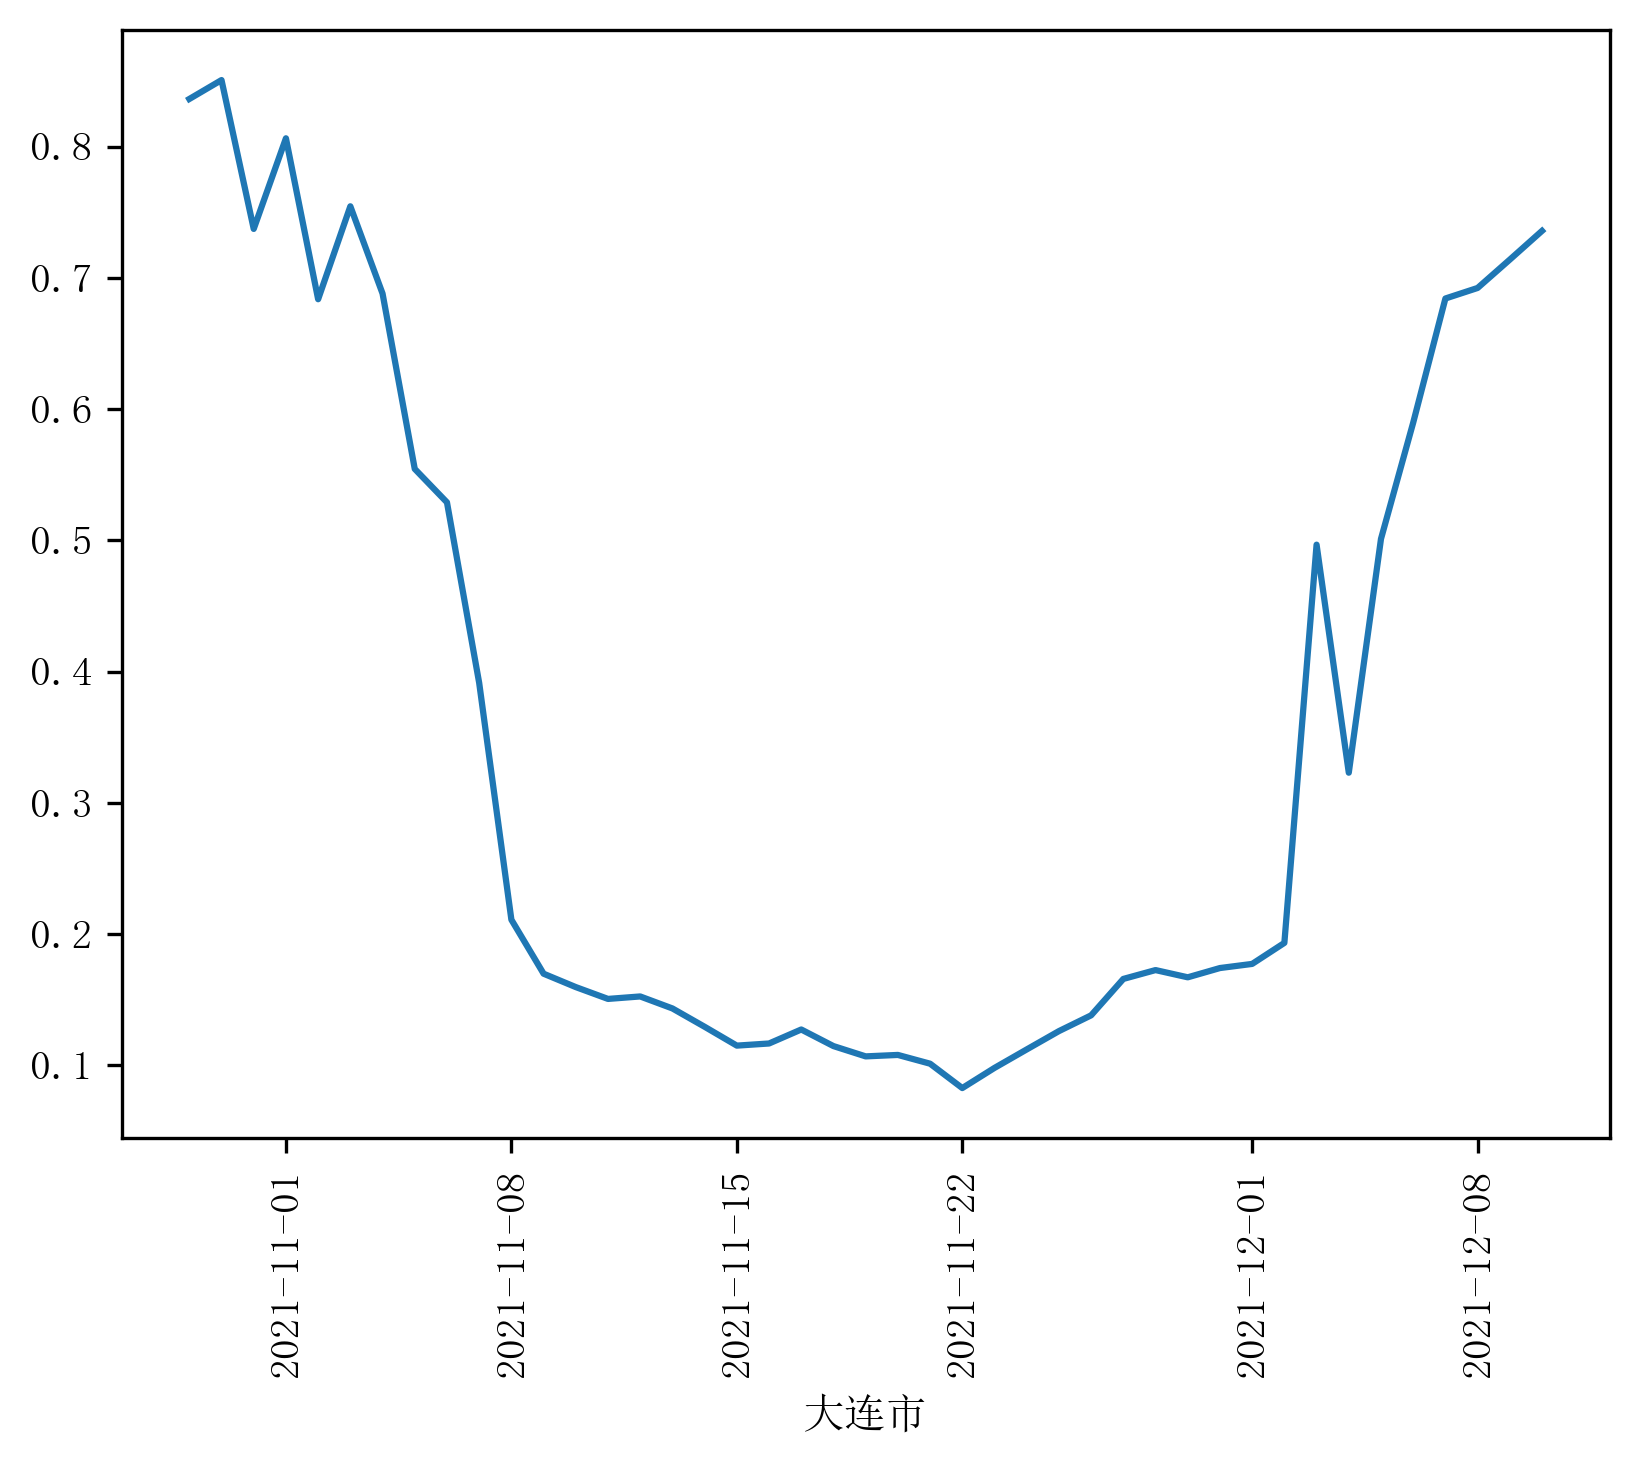

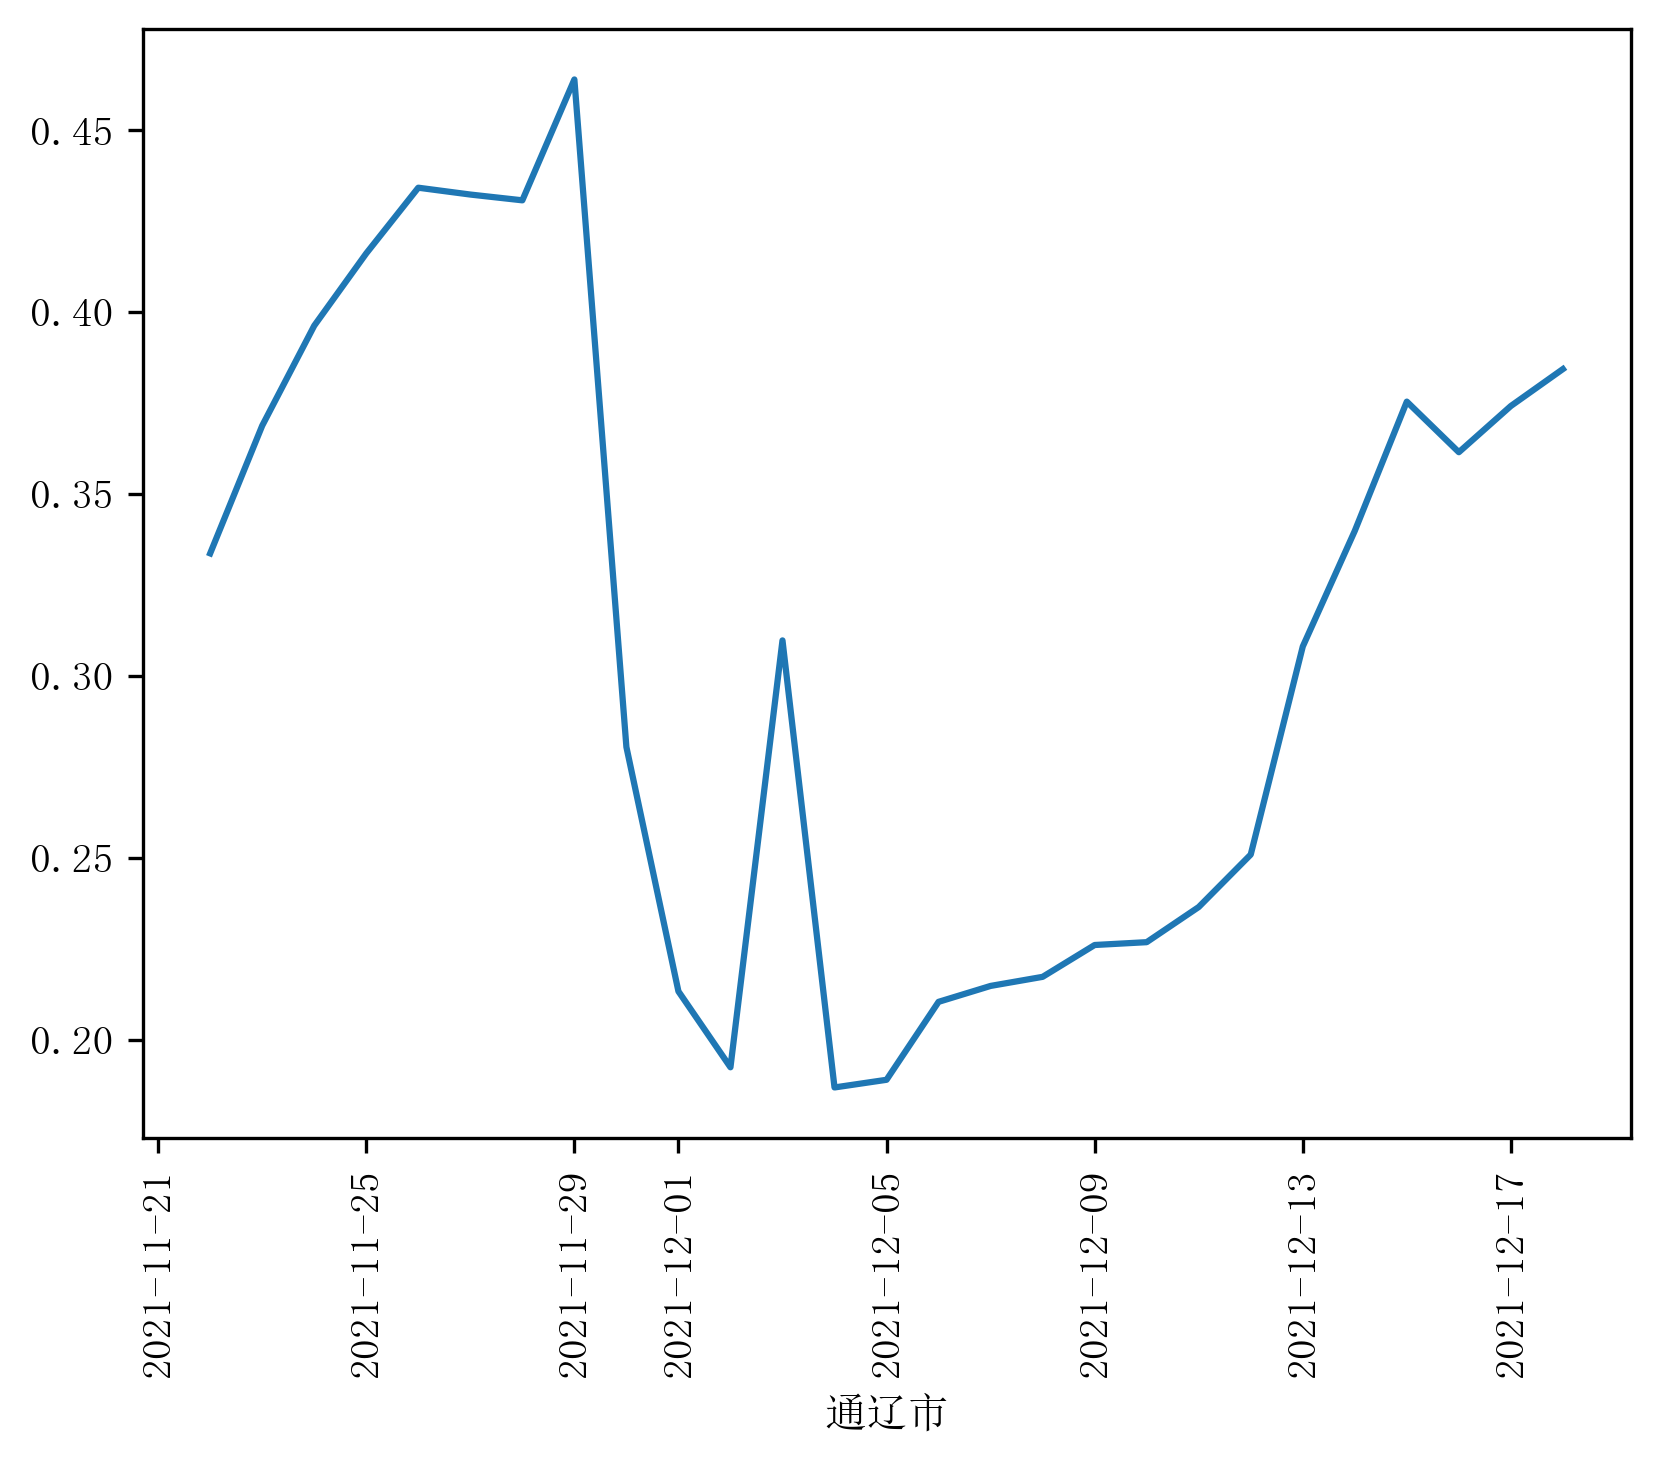

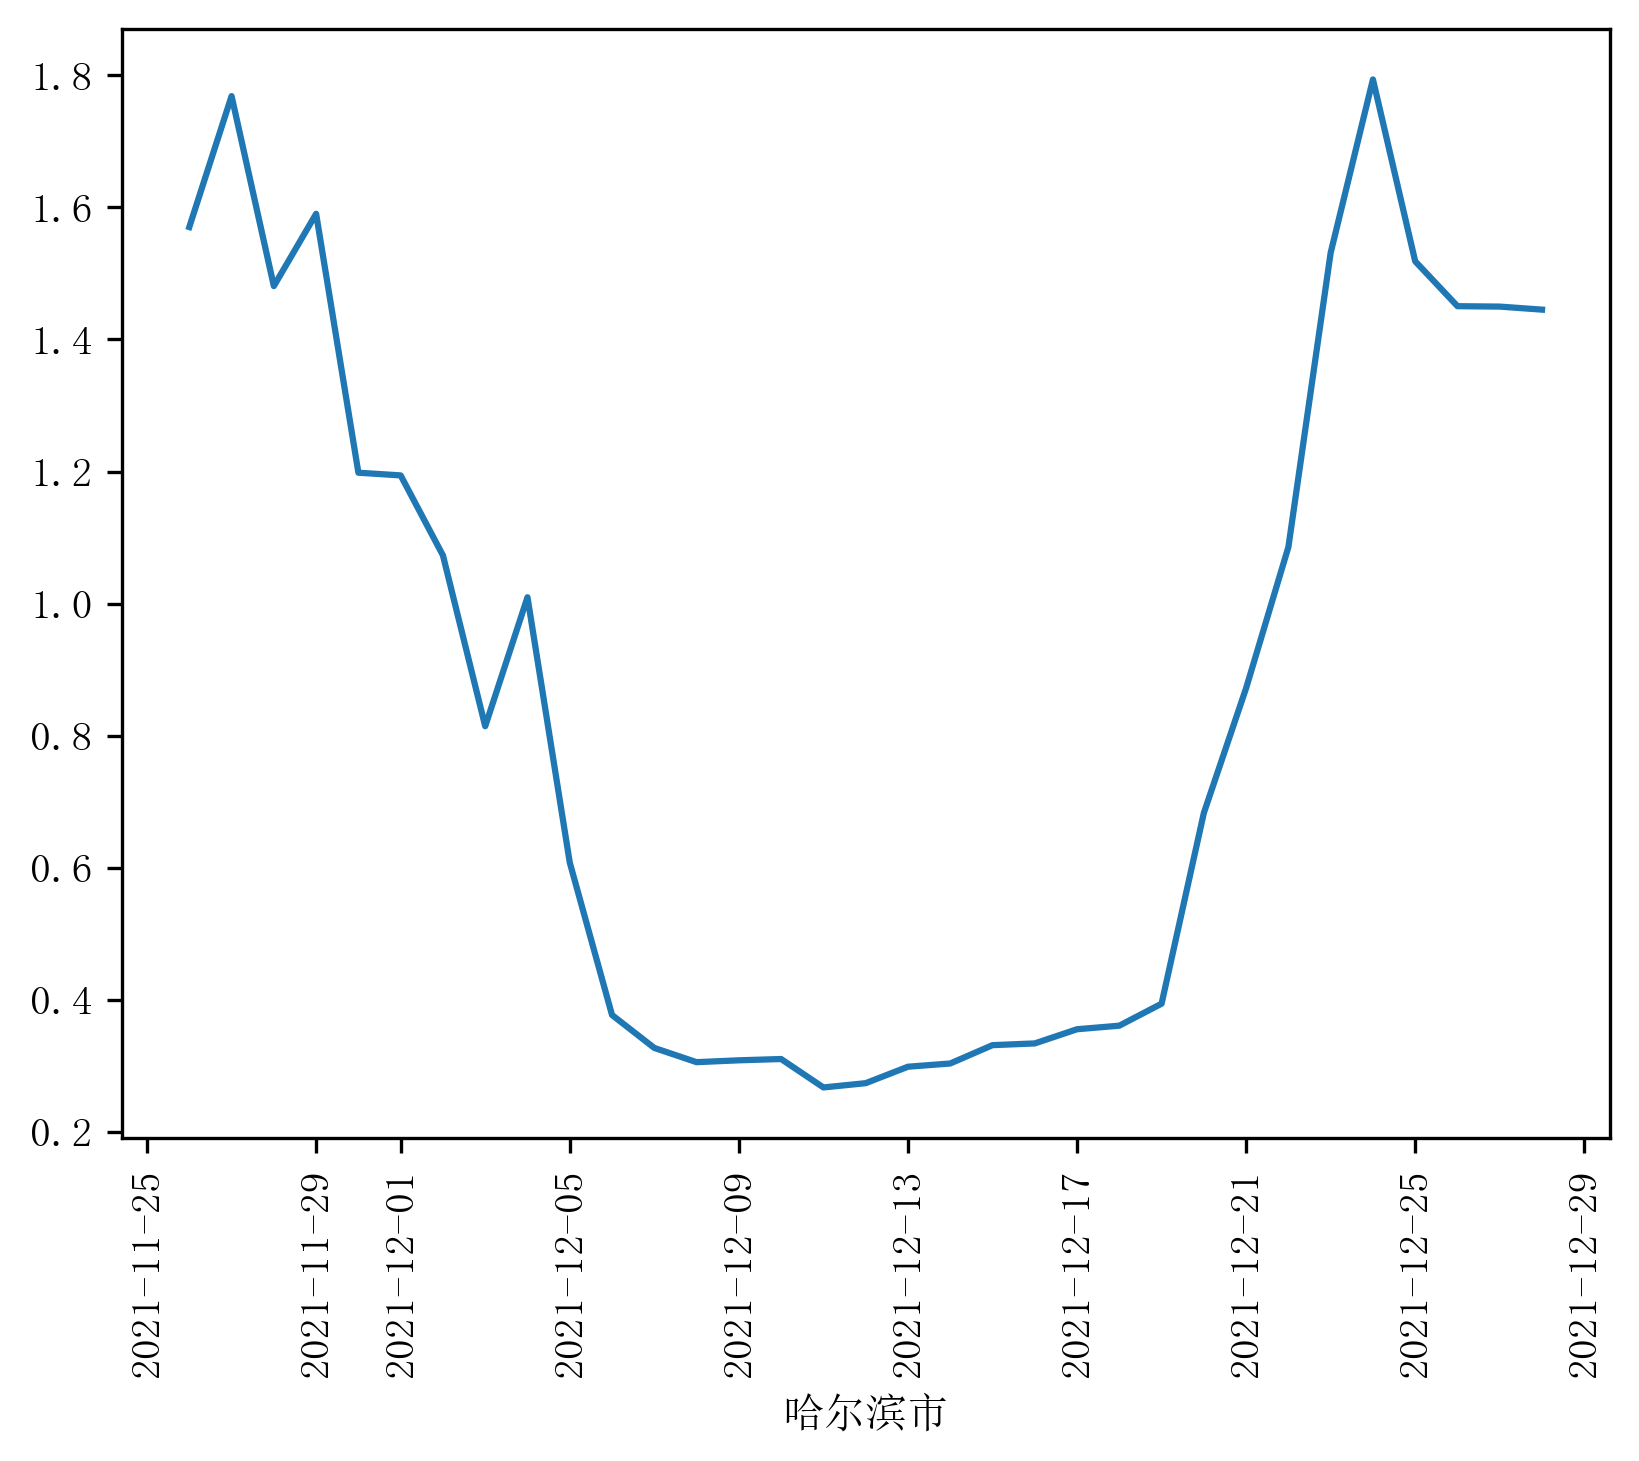

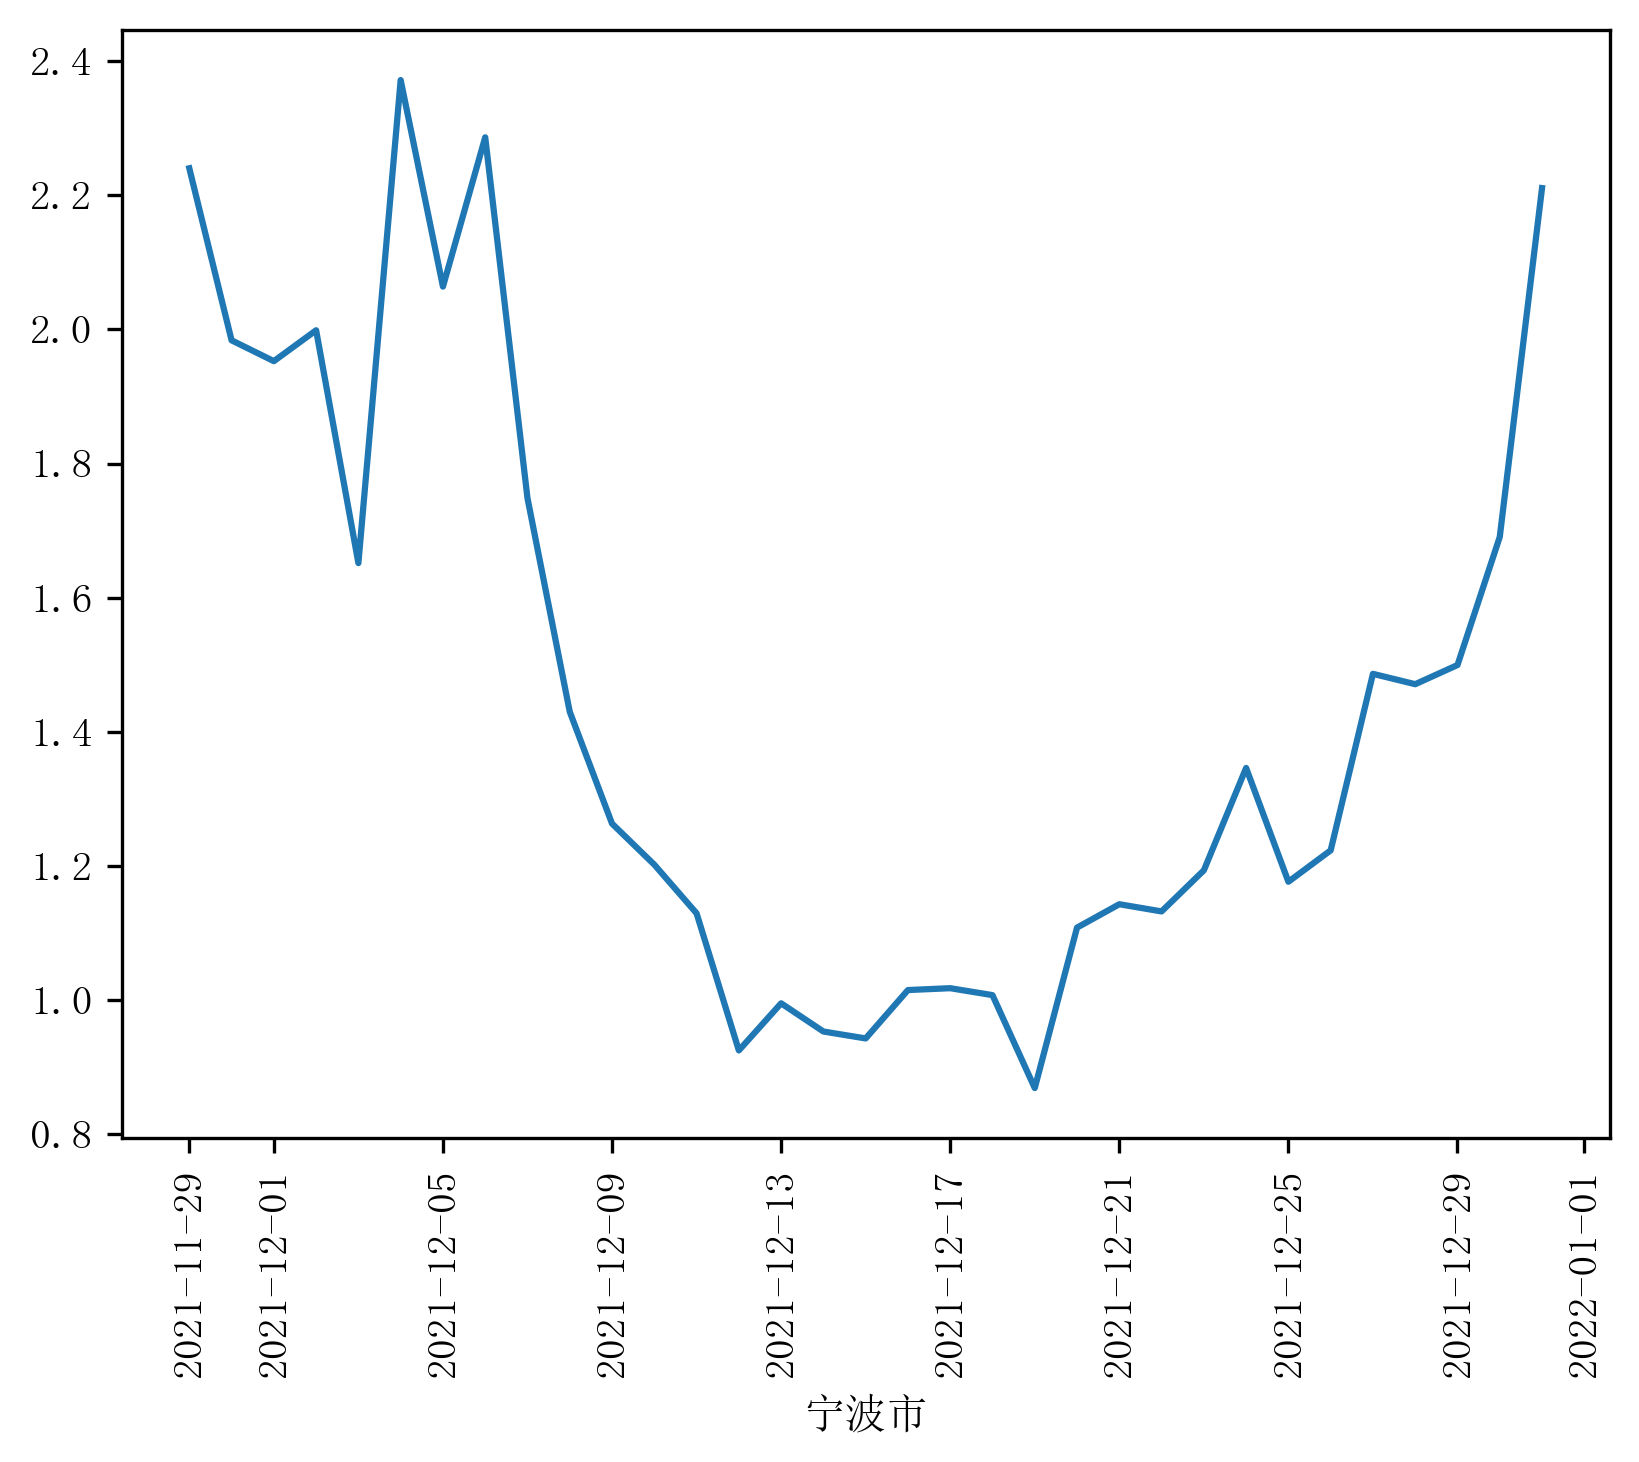

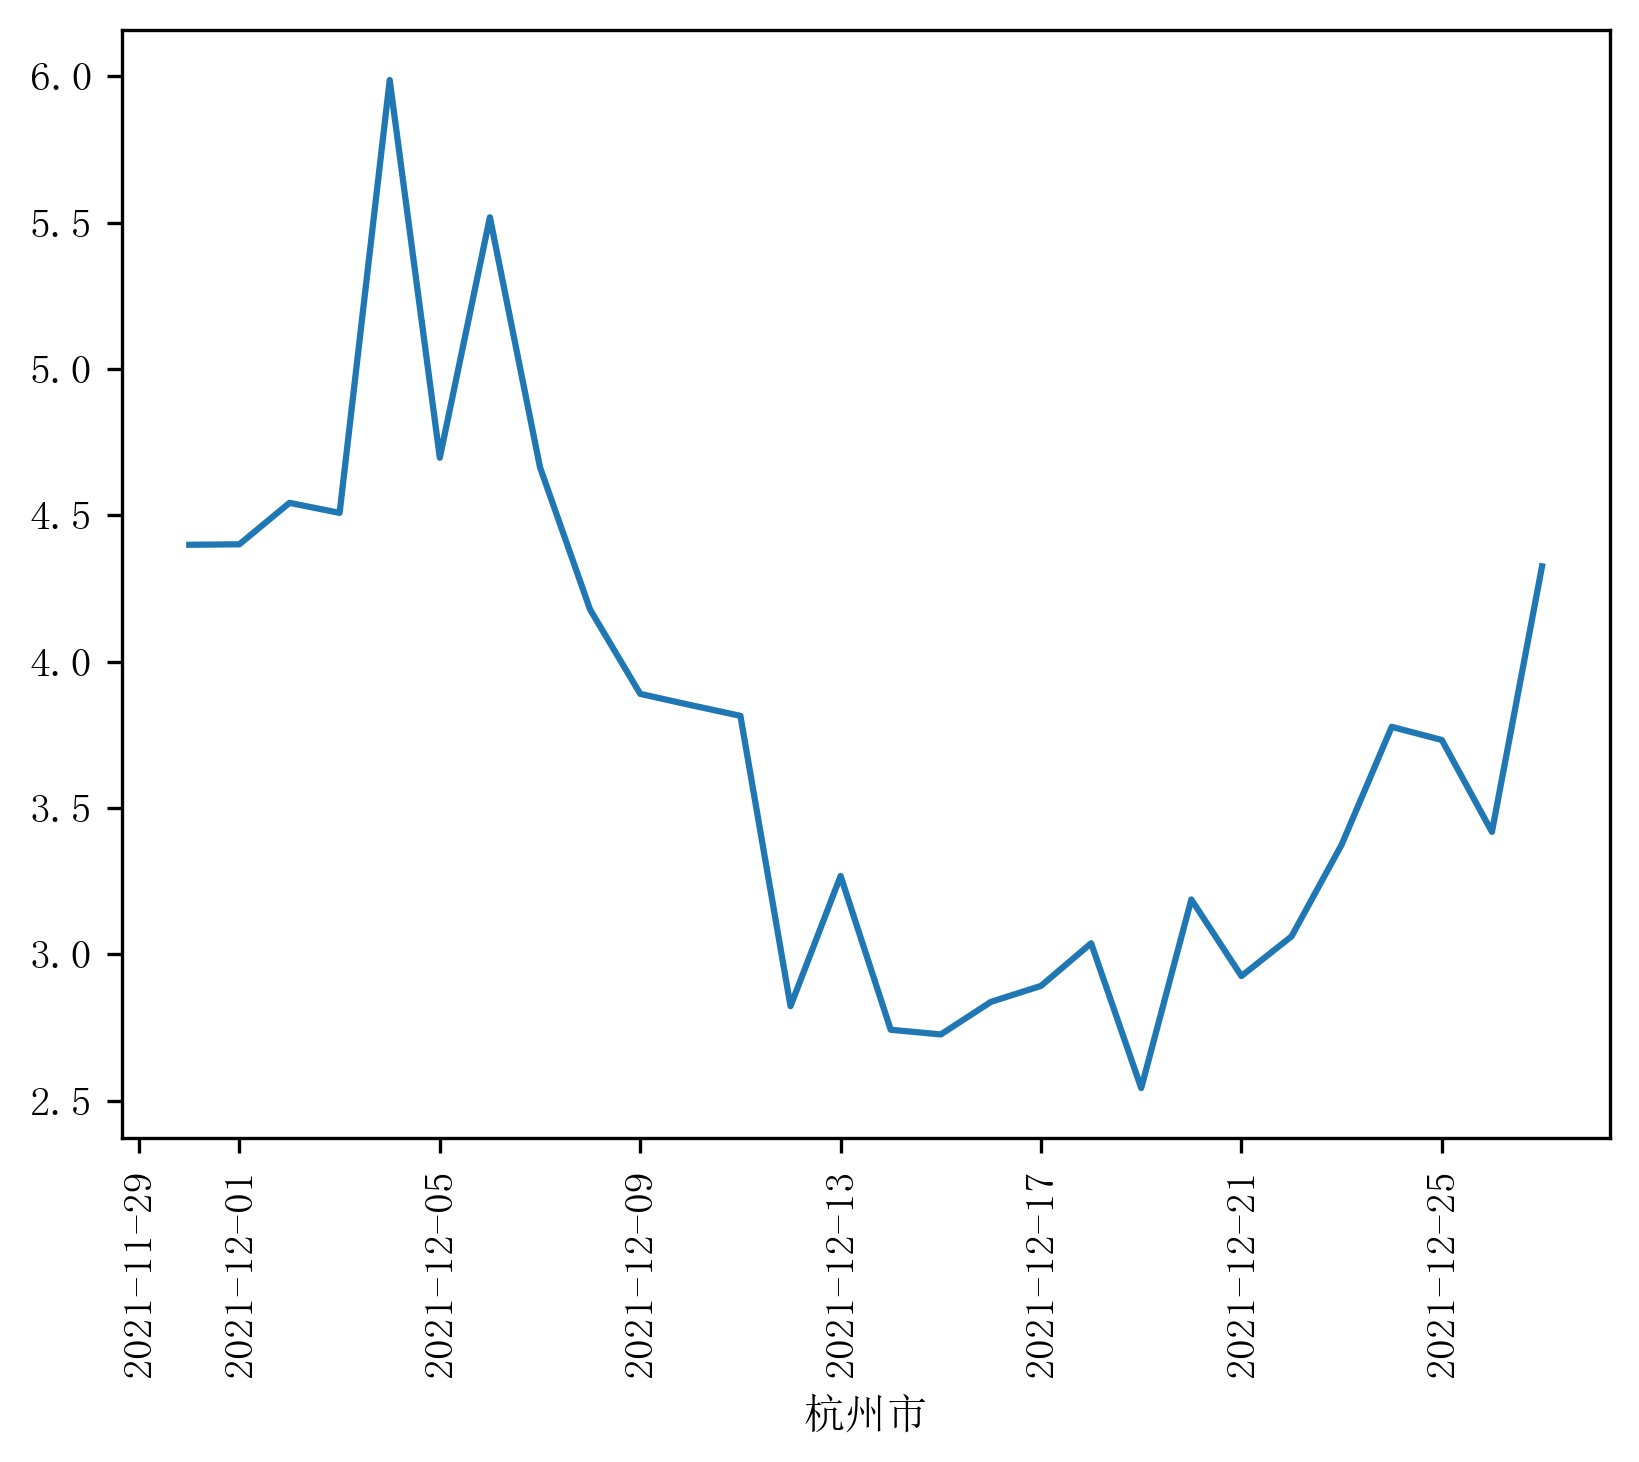

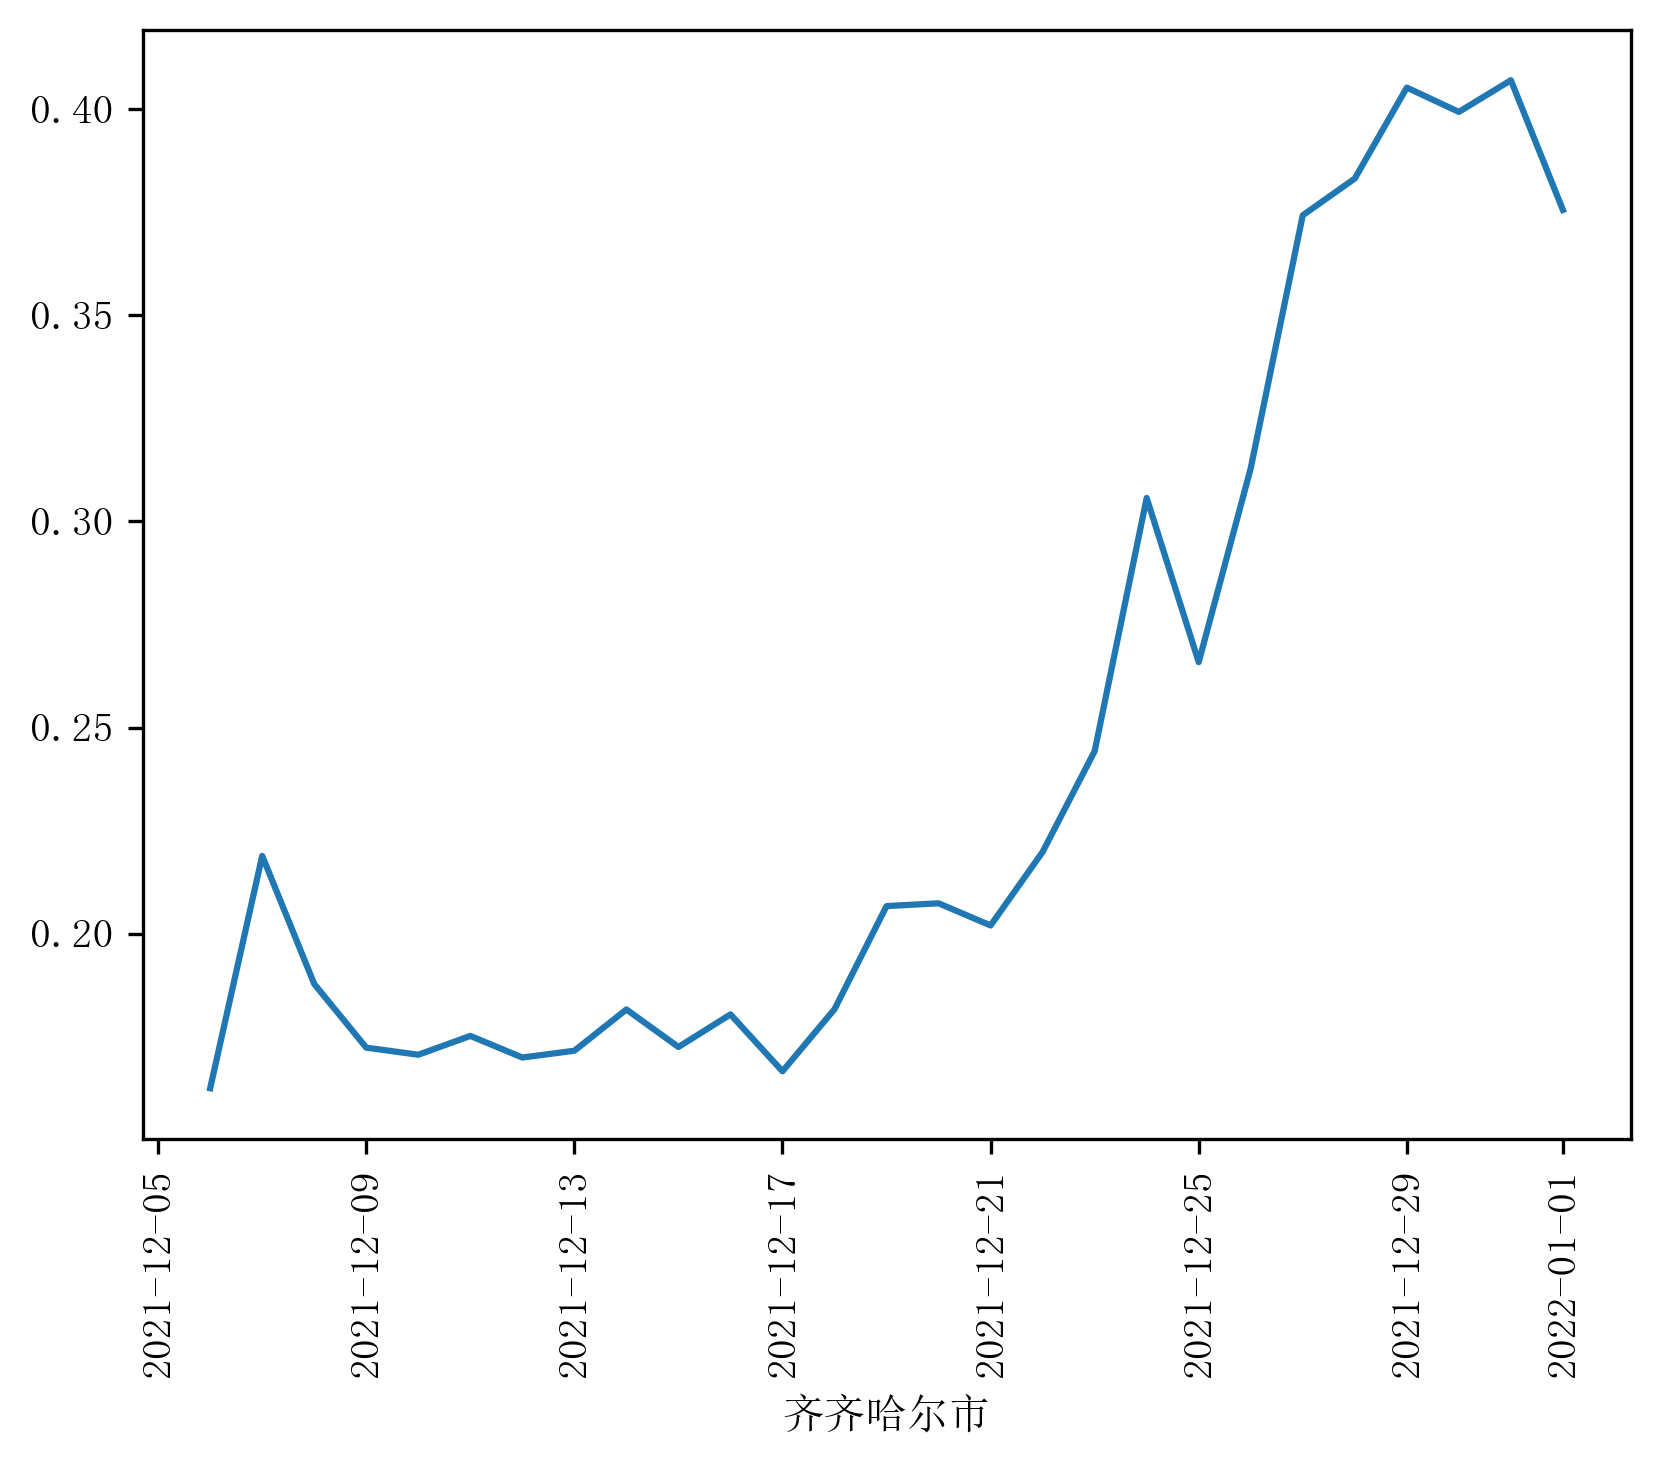

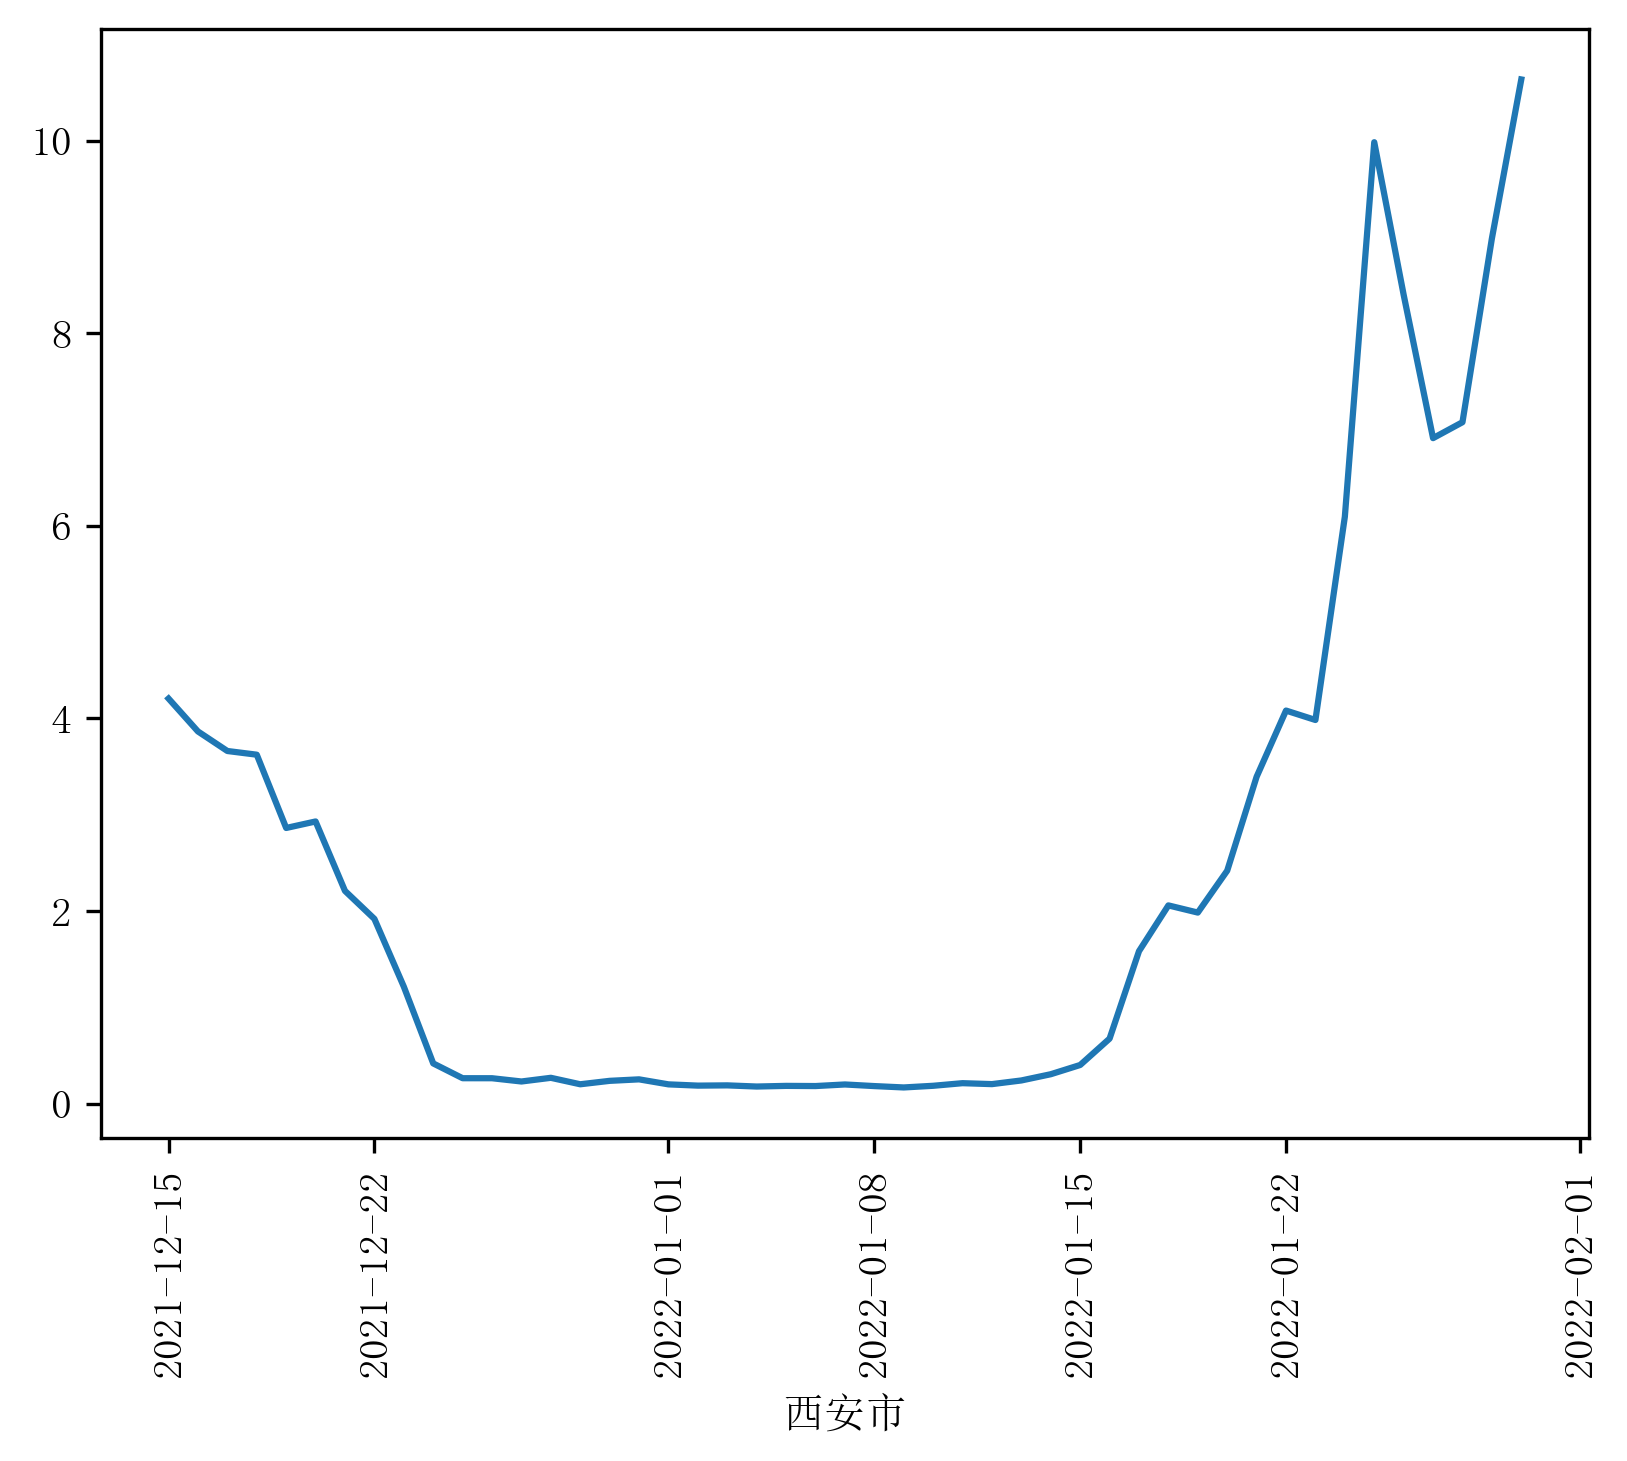

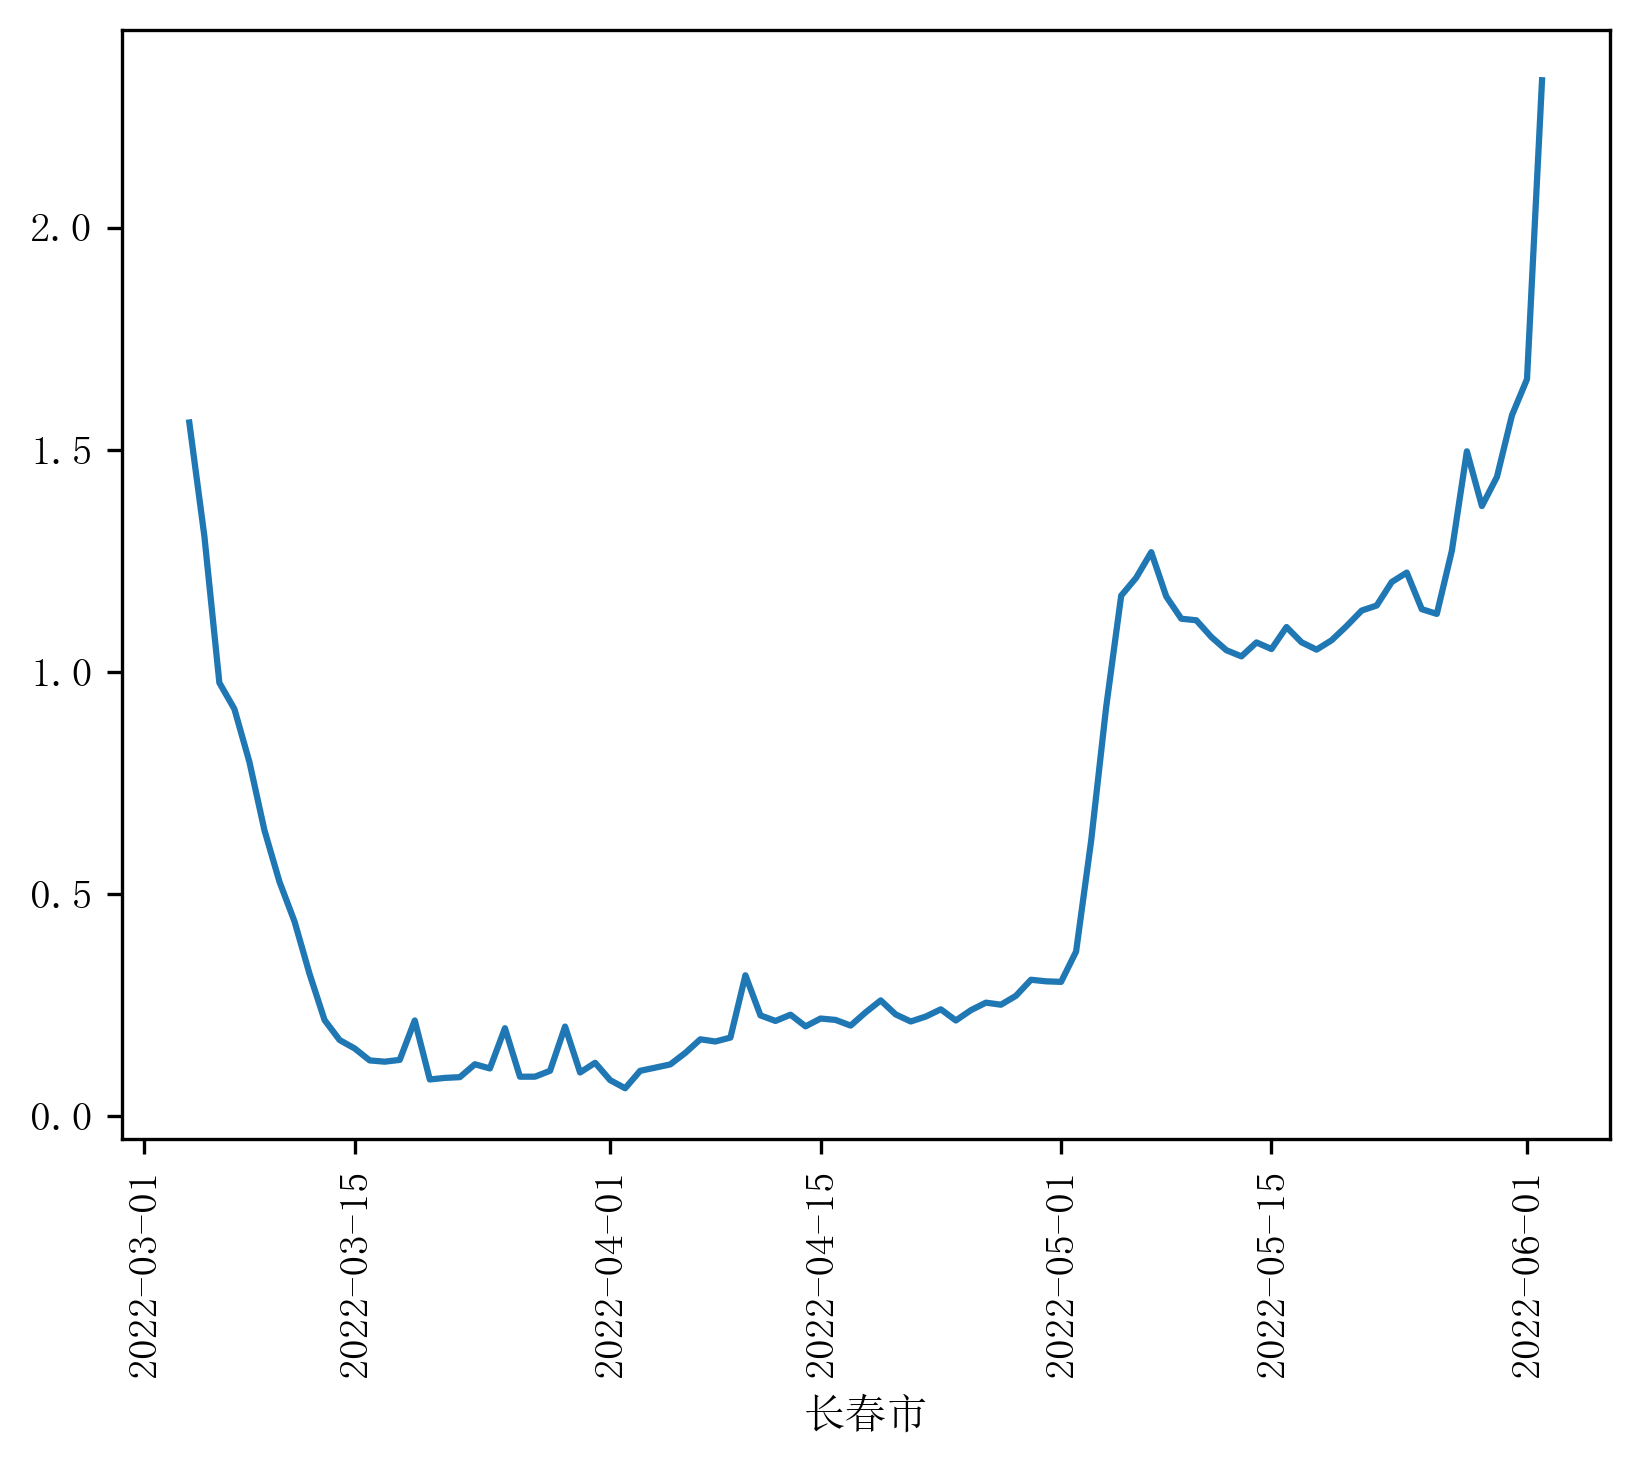

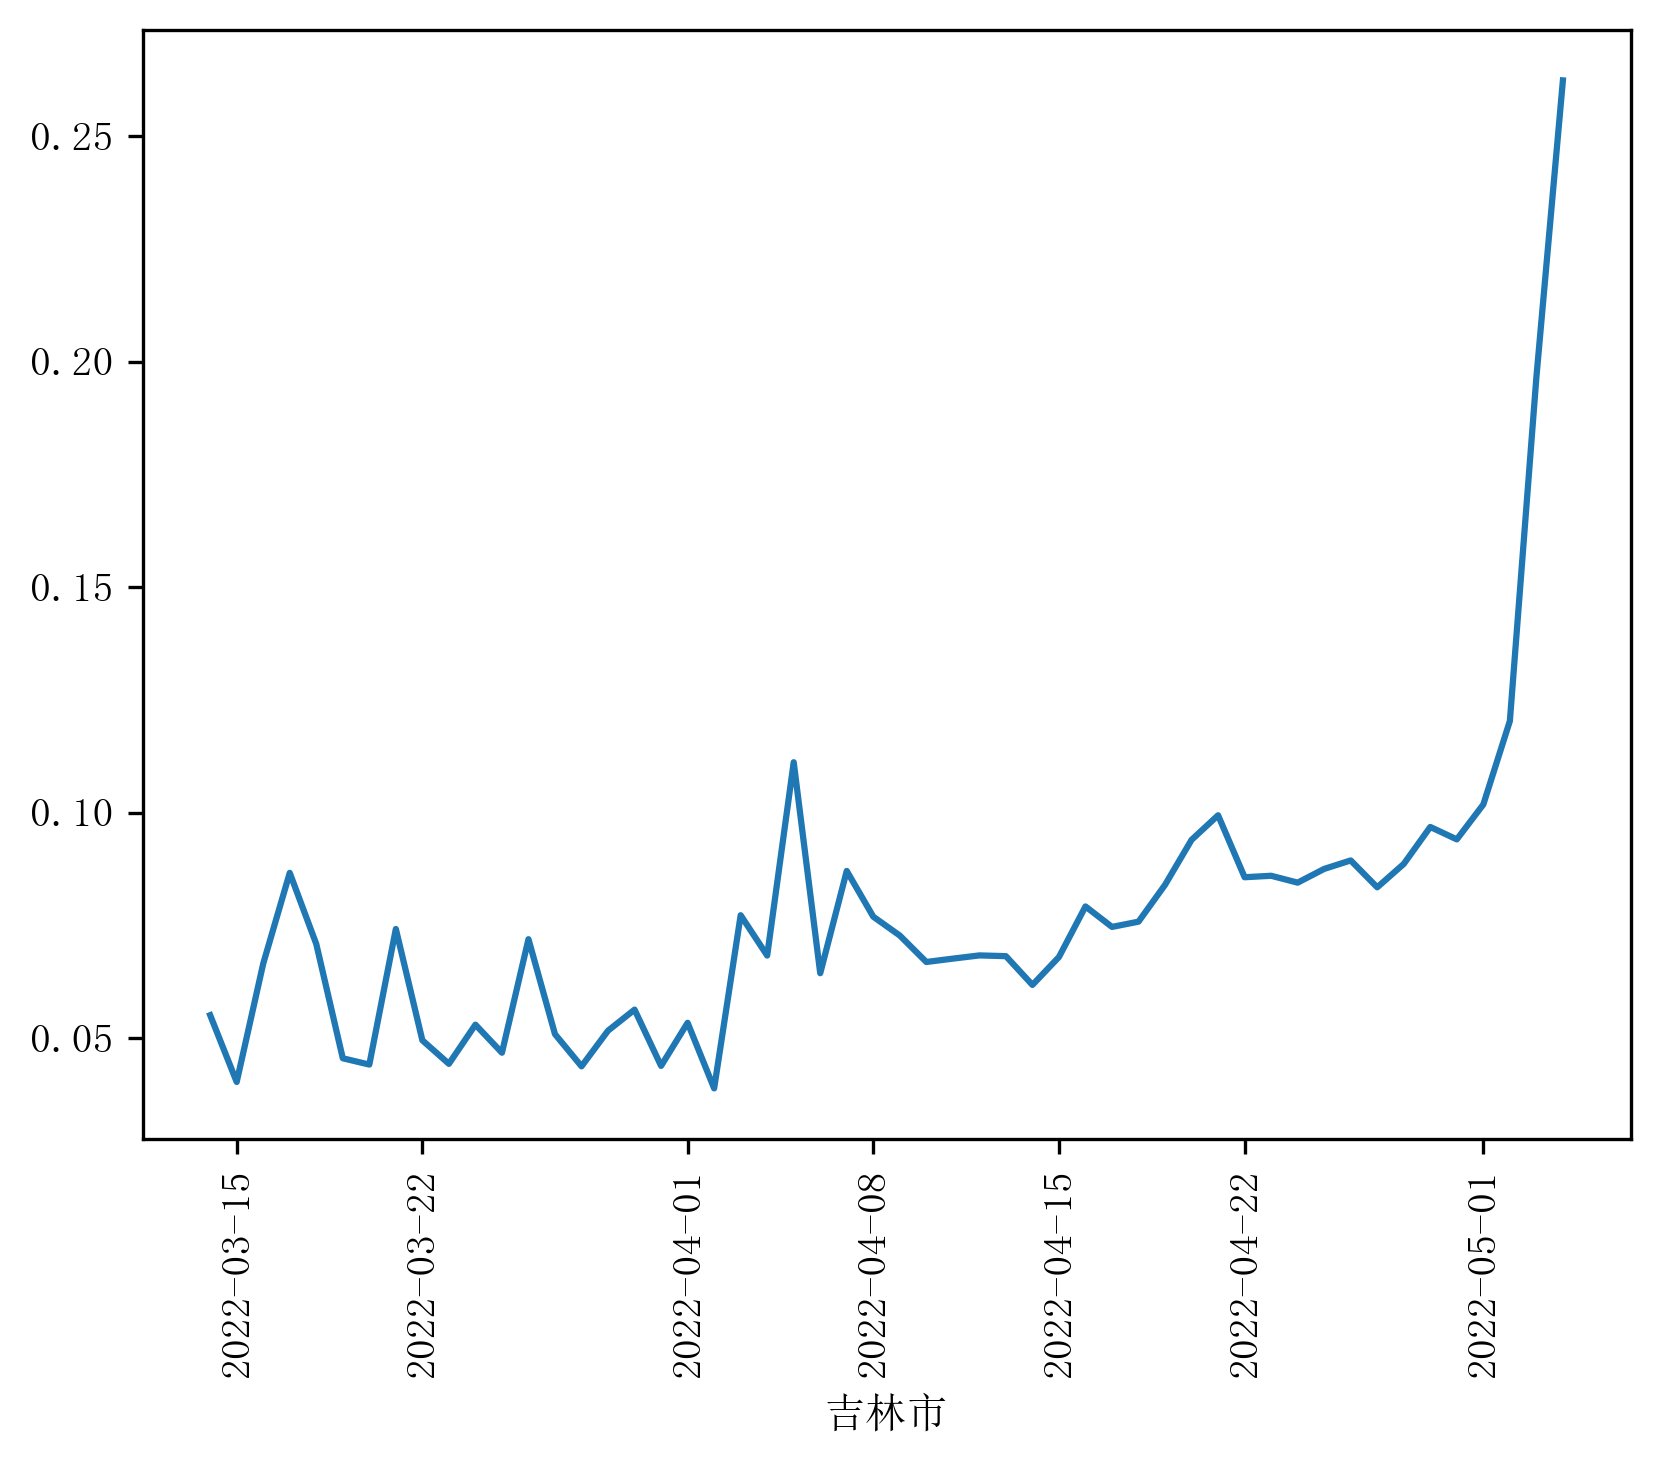

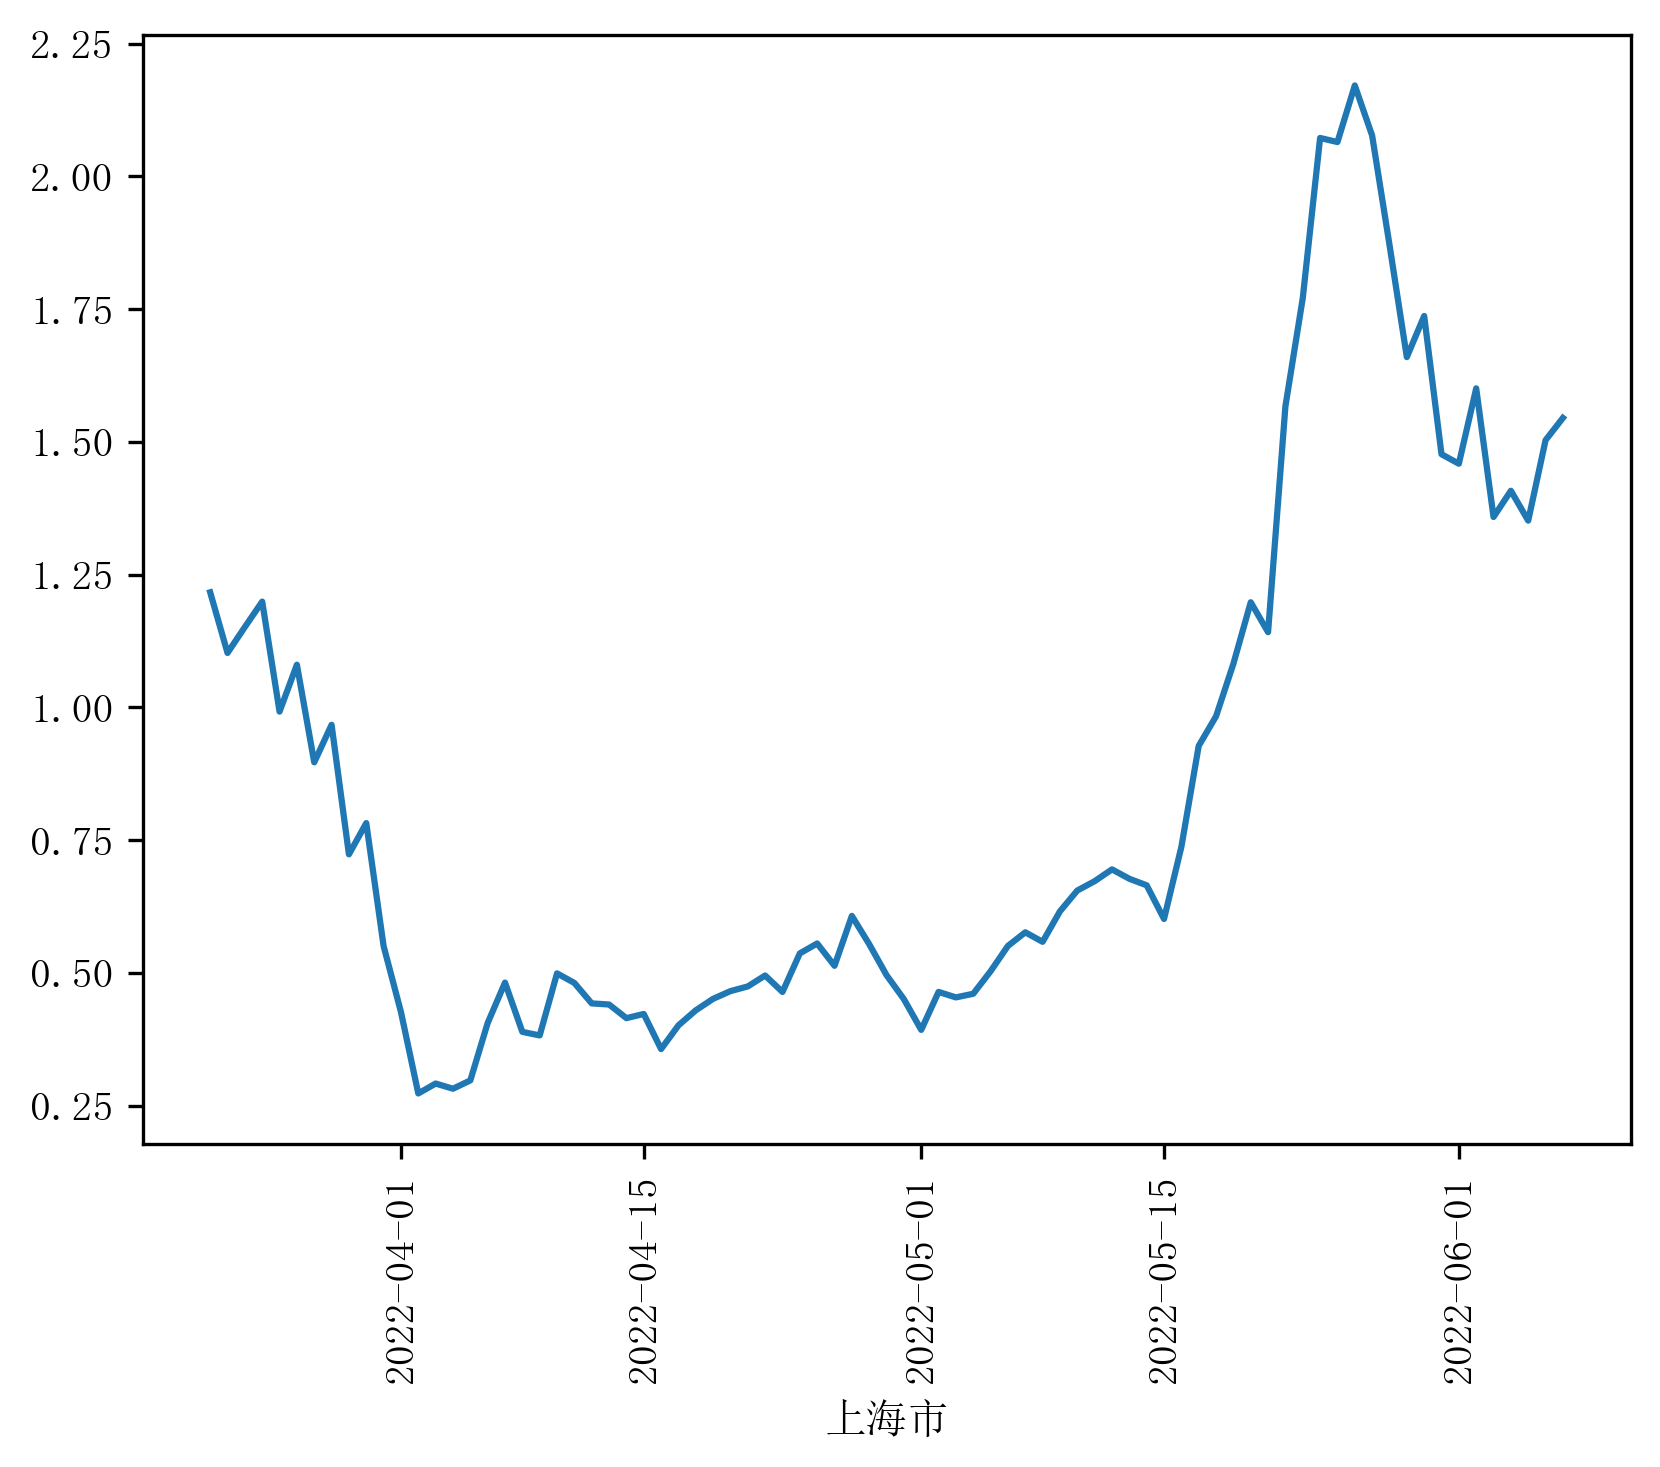

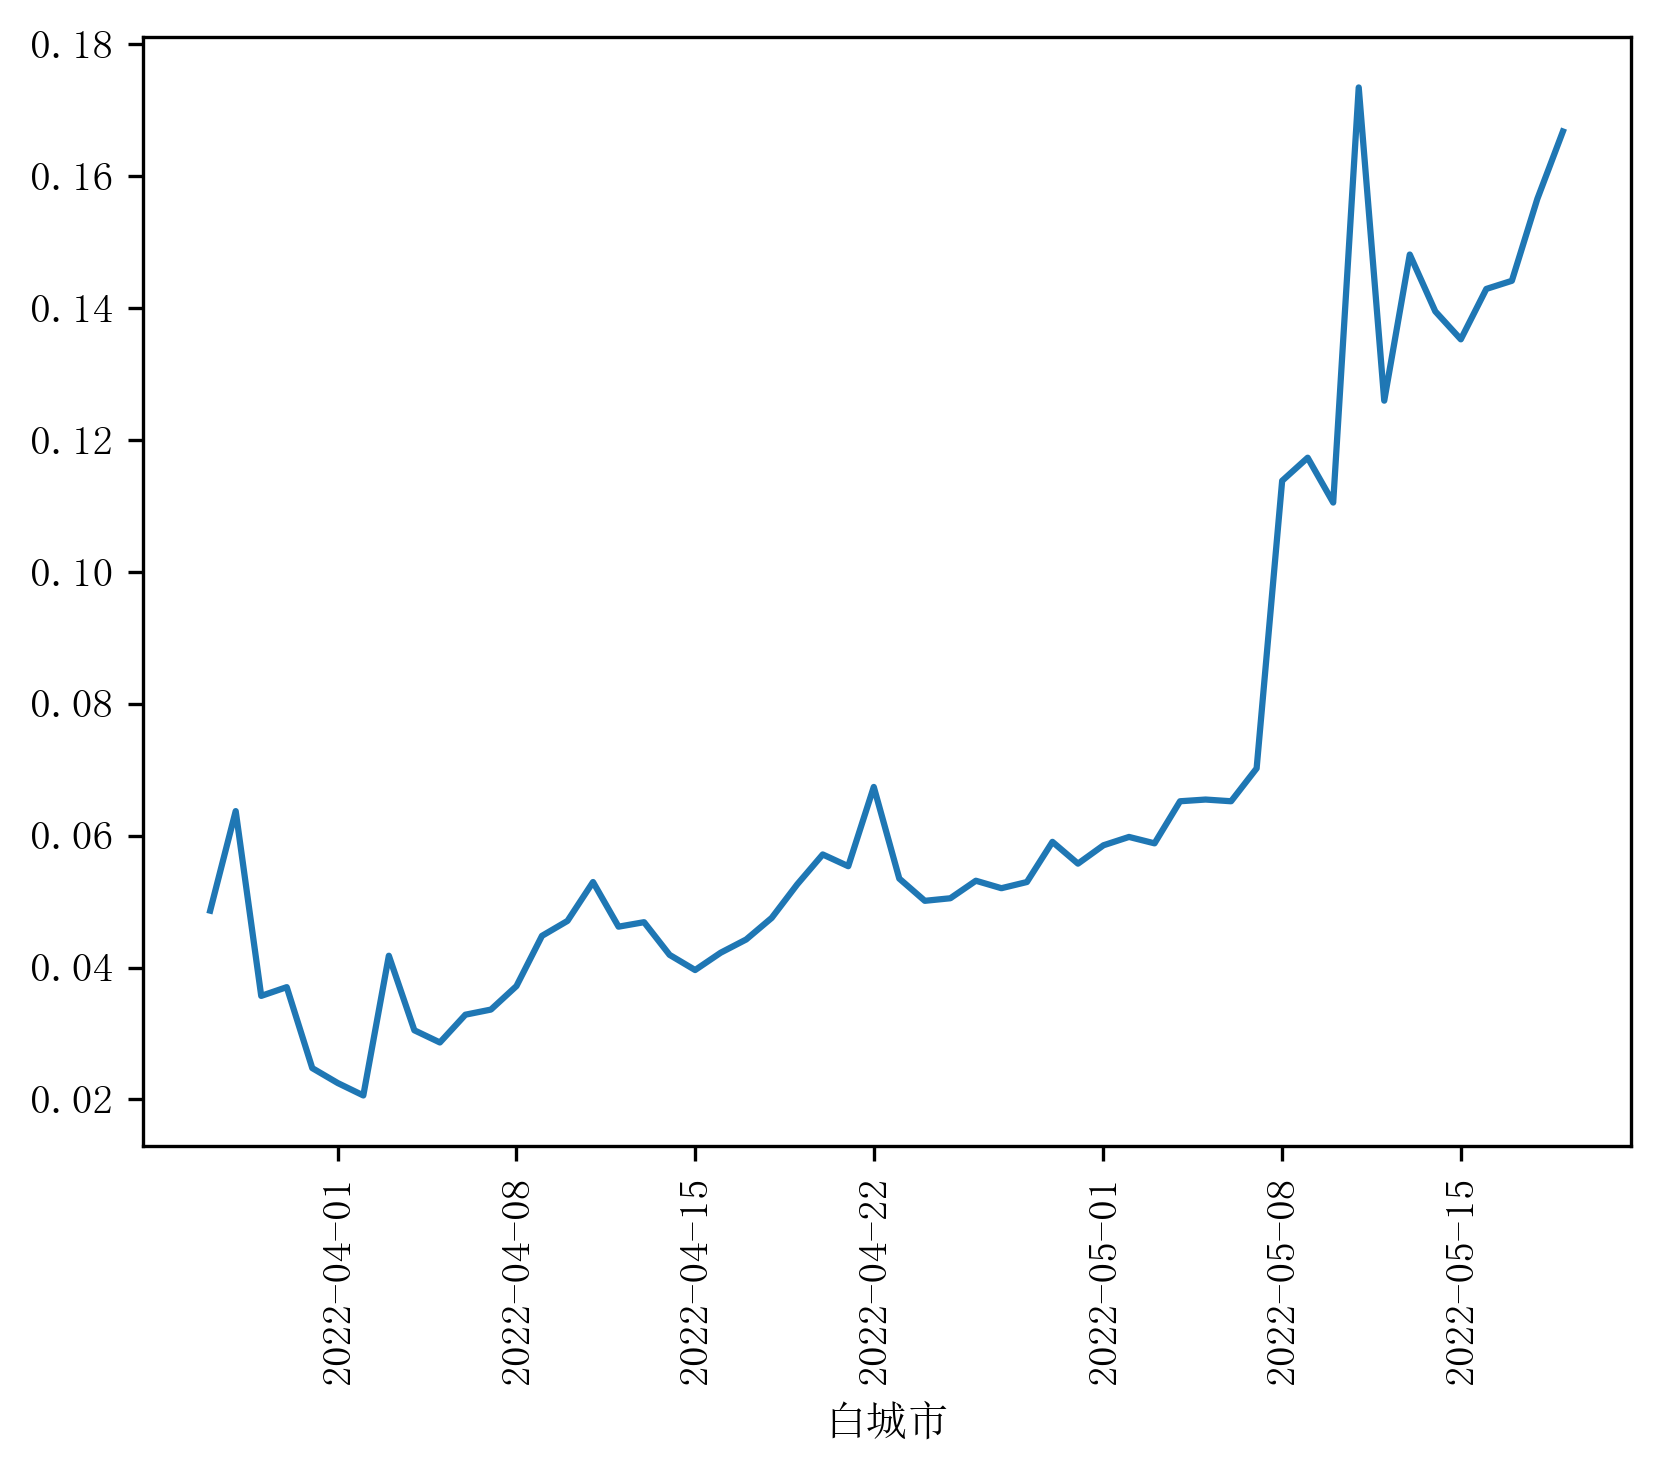

In [59]:
for item in list(dic.keys()):
    df0 = pd.DataFrame(dic[item],index=[item])
    df0 = df0.T.reset_index()
    df0.columns = ['time',item]
    df0['time'] = df0['time'].apply(lambda x : pd.to_datetime(str(x)))
    df0.to_excel(r'/{}_urbanmobility.xlsx'.format(item))
    fig,ax = plt.subplots(dpi=300)
    ax.plot(df0['time'],df0[item])
    ax.set_xlabel(item)
    ax.tick_params(axis='x', labelrotation= 90)
    fig.savefig(r'/{}_urbanmobility.jpg'.format(item))

In [60]:
index = pd.read_excel('index.xlsx')
index

Unnamed: 0  city      mean     start       end      end_7       min  \
0            0  防城港市  0.230114  0.138510  0.062856   0.065448  0.060880   
1            1   温州市  0.659733  0.555336  0.052877   0.086152  0.067748   
2            2   玉林市  0.958244  0.792698  0.823576   0.444690  0.353160   
3            3   滨州市  0.401205  0.230429  0.361487   0.185166  0.173858   
4            4  景德镇市  0.166254  0.070600  0.052099   0.054173  0.057866   
..         ...   ...       ...       ...       ...        ...       ...   
60          60   西安市  3.336862  1.918696  6.093533  10.634004  0.168577   
61          61   长春市  0.961331  0.438372  1.272866   2.331990  0.062986   
62          62   吉林市  0.058463  0.074228  0.088646   0.262375  0.038880   
63          63   上海市  1.091237  0.967205  1.458810   1.545026  0.273067   
64          64   白城市  0.036135  0.041796  0.148133   0.166795  0.028642   

         CRI        FR        RR       CRE  
0   0.273152  0.560468  0.031443  0.056102  
1   0.080149  0.878005 -0.281250 -0.320329  
2   0.859463  0.554484  0.571187  1.030124  
3   0.901004  0.245501  0.519046  2.114237  
4   0.313372  0.180358 -0.110697 -0.613760  
..       ...       ...       ...       ...  
60  1.826127  0.912140  0.972335  1.065994  
61  1.324067  0.856319  0.950517  1.110003  
62  1.516269  0.476211  0.561404  1.178896  
63  1.336841  0.717674  0.812815  1.132569  
64  4.099398  0.314729  0.806649  2.562999  

[65 rows x 11 columns]

In [61]:
import geopandas as gpd

# Load the shapefiles
city_shapefile = gpd.read_file('E:/baidu/0582 中国地图/有图审号的中国地图/中国地图-审图号GS(2020)4619号-shp格式/中国标准地图-审图号GS(2020)4619号-shp格式/地级城市驻地.shp')
province_shapefile = gpd.read_file('E:/baidu/0582 中国地图/有图审号的中国地图/中国地图-审图号GS(2020)4619号-shp格式/中国标准地图-审图号GS(2020)4619号-shp格式//省级行政区.shp')
# ... load other shapefiles as needed


In [62]:
city_shapefile.head()

AREA  PERIMETER name                         geometry
0   0.0        0.0  三亚市   POINT (512561.922 2375538.443)
1   0.0        0.0   临沧  POINT (-516659.254 3034819.983)
2   0.0        0.0  思茅市  POINT (-429817.410 2904882.658)
3   0.0        0.0  景洪市  POINT (-453994.275 2815861.736)
4   0.0        0.0  个旧市  POINT (-195530.918 2961015.974)

In [63]:
province_shapefile.head()

Z120401  Z121301  Z120402  Z120602   Z121102  Z121302  Z120403  Z120603  \
0    745.9     9.16     38.1    487.5   6970.03     0.17     30.6     16.2   
1    326.0     3.54      9.5    362.8   7649.96     0.16      6.4     11.1   
2    658.4     2.33    119.9    227.1   2245.66     0.07     54.4     24.9   
3    150.5     4.12     10.1     52.9   6983.16     0.16     15.5      5.1   
4     88.8     2.33      1.7     29.1  15887.00     0.67      3.0      1.2   

   Z120703  Z120803  ...  Rural_to_T  Sci_Eng_Co  Sec_Indust  Teri_Indus  \
0    330.3     52.7  ...       48.46         7.0        57.4        31.6   
1    274.3     43.1  ...       66.18         2.0        43.0        35.9   
2     84.4     40.8  ...       65.09         4.0        50.3        38.7   
3     18.7     14.5  ...       67.57         0.0        45.2        37.5   
4     10.7      1.4  ...       81.07         0.0        23.2        45.9   

   Total_Coll  Urban_to_T  Vocation     DZM  NAME  \
0        35.0       51.54       5.0  230000   黑龙江   
1        16.0       33.82       1.0  650000    新疆   
2        24.0       34.91       3.0  140000    山西   
3         6.0       32.43       1.0  640000    宁夏   
4         4.0       18.93       0.0  540000    西藏   

                                            geometry  
0  POLYGON ((1329152.341 5619034.278, 1323327.591...  
1  POLYGON ((-2189253.375 4611401.367, -2202922.3...  
2  POLYGON ((761692.092 4443124.843, 760999.873 4...  
3  POLYGON ((-34477.046 4516813.963, -41105.128 4...  
4  POLYGON ((-2189253.375 4611401.367, -2187861.9...  

[5 rows x 121 columns]

In [64]:
import matplotlib.pyplot as plt


# Merge your data with the city shapefile
merged = city_shapefile.merge(index, left_on='name', right_on='city')


In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for provincial-level administrative divisions and national boundaries
province_boundaries = gpd.read_file('E:/baidu/0582 中国地图/有图审号的中国地图/中国地图-审图号GS(2020)4619号-shp格式/中国标准地图-审图号GS(2020)4619号-shp格式//省级行政区.shp')
country_boundaries = gpd.read_file('E:/baidu/0259 全国最新城市道路集/2020年城市道路数据集​-数据皮皮侠/国界线.shp')

# Load the city data, assuming your DataFrame 'df' contains city names 'city' and corresponding data
city_data = gpd.read_file('E:/baidu/0582 中国地图/有图审号的中国地图/中国地图-审图号GS(2020)4619号-shp格式/中国标准地图-审图号GS(2020)4619号-shp格式//地级城市驻地.shp')
city_data = city_data.merge(index, left_on='name', right_on='city')

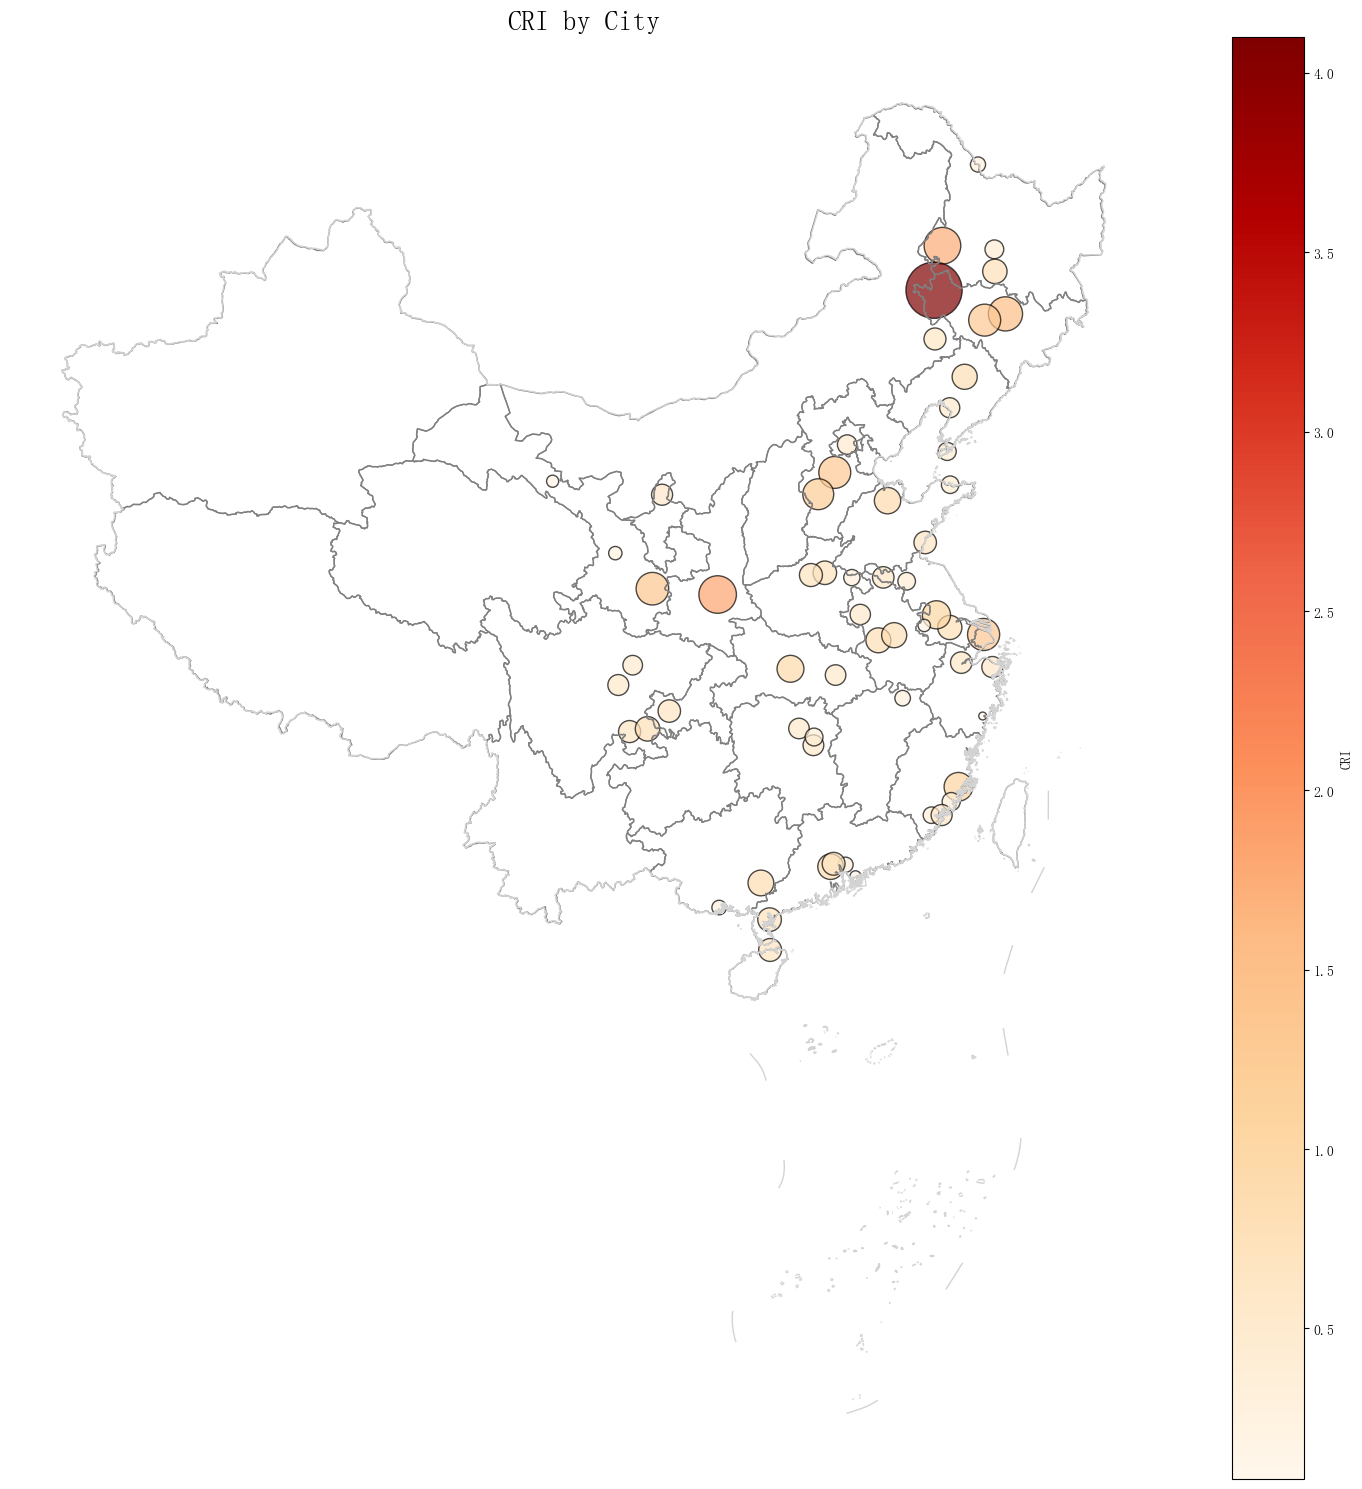

In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


# Create custom color mapping
cmap = plt.get_cmap('OrRd')  # Using the "OrRd" color scheme
norm = colors.Normalize(vmin=city_data['CRI'].min(), vmax=city_data['CRI'].max())

# Create a map canvas
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the province boundaries
province_boundaries.boundary.plot(ax=ax, linewidth=1, edgecolor='gray')

# Plot the country boundaries with a light color line
country_boundaries.plot(ax=ax, color='lightgrey', linestyle='-', linewidth=1)

# Plot the city data on the map, adjusting the circle size based on CRI values
# Add a white border to the circles with 'edgecolor'
city_data.plot(ax=ax, column='CRI', cmap='OrRd', markersize=city_data['CRI'] * 400, linewidth=1, edgecolor='black', alpha=0.7)

# Add a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('CRI')

# Set the title and turn off the axis
ax.set_title('CRI by City', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.set_axis_off()

plt.tight_layout()

# Save the figure
plt.savefig('/cri_by_city_map.png', dpi=300, bbox_inches='tight')

plt.show()


## 4.Spatial Regression

In [67]:
index = pd.read_excel('index.xlsx')
dfcity = pd.read_excel('urbanstats.xlsx')
index.head()

Unnamed: 0  city      mean     start       end     end_7       min  \
0           0  防城港市  0.230114  0.138510  0.062856  0.065448  0.060880   
1           1   温州市  0.659733  0.555336  0.052877  0.086152  0.067748   
2           2   玉林市  0.958244  0.792698  0.823576  0.444690  0.353160   
3           3   滨州市  0.401205  0.230429  0.361487  0.185166  0.173858   
4           4  景德镇市  0.166254  0.070600  0.052099  0.054173  0.057866   

        CRI        FR        RR       CRE  
0  0.273152  0.560468  0.031443  0.056102  
1  0.080149  0.878005 -0.281250 -0.320329  
2  0.859463  0.554484  0.571187  1.030124  
3  0.901004  0.245501  0.519046  2.114237  
4  0.313372  0.180358 -0.110697 -0.613760

In [68]:
# Filter the DataFrame to only include rows where the 'Year' column is 2019
dfcity = dfcity[dfcity['年份'] == 2019]
dfcity.head()

行政区划代码    年份   省份    城市          经度         纬度  人均地区生产总值       地区生产总值  \
29   110000  2019  北京市   北京市  116.407526  39.904030  164220.0  353710000.0   
59   120000  2019  天津市   天津市  117.200983  39.084158   90371.0  141040000.0   
89   130100  2019  河北省  石家庄市  114.514859  38.042306   52859.0   58100000.0   
119  130200  2019  河北省   唐山市  118.180193  39.630867   86667.0   68900000.0   
149  130300  2019  河北省  秦皇岛市  119.600492  39.935385   51334.0   16120000.0   

     地区生产总值增长率    第一产业增加值  ...        货物进口额     货运总量   邮政业务总量   铁路旅客运量  \
29         6.1  1131872.0  ...  235047999.0  23522.0  3982057  12116.0   
59         4.8  1847624.0  ...    6285159.0  49572.0  1159100   4725.0   
89         6.7  4496940.0  ...    5236240.0  34825.0   894943   1100.0   
119        7.3  5312190.0  ...    4398705.0  46062.0   219700    837.0   
149        6.7  2063360.0  ...    1310359.0   7247.0    94893    866.0   

     铁路货物运量  限额以上批发零售贸易业商品销售总额  限额以上批发零售贸易企业数  高中阶段在校学生数  城乡居民储蓄年末余额  \
29   1156.0        738919894.0         9740.0   314583.0   373096750   
59   9293.0        307000997.0         6444.0   219509.0   126396371   
89   1401.0         48403638.0          939.0   151874.0    76300235   
119  3551.0         21794716.0          656.0   241171.0    67027713   
149  1403.0         13302731.0          280.0    69095.0    25918648   

     年末金融机构各项贷款余额  
29      735759400  
59      348740384  
89      113418631  
119      60848002  
149      22059692  

[5 rows x 182 columns]

In [38]:
dfcity.columns

Index(['行政区划代码', '年份', '省份', '城市', '经度', '纬度', '人均地区生产总值', '地区生产总值',
       '地区生产总值增长率', '第一产业增加值',
       ...
       '货物进口额', '货运总量', '邮政业务总量', '铁路旅客运量', '铁路货物运量', '限额以上批发零售贸易业商品销售总额',
       '限额以上批发零售贸易企业数', '高中阶段在校学生数', '城乡居民储蓄年末余额', '年末金融机构各项贷款余额'],
      dtype='object', length=182)

In [39]:
data = pd.merge(index,dfcity, left_on= 'city', right_on = '城市', how= 'left')

In [40]:

data.to_excel('regressiondata.xlsx')